In [ ]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Mounted at /content/gdrive
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!uname -a
! host

Linux e5e1affc41ae 5.4.144+ #1 SMP Tue Dec 7 09:58:10 PST 2021 x86_64 x86_64 x86_64 GNU/Linux
/bin/bash: host: command not found


In [ ]:
! ls -al /content/gdrive/MyDrive/devwav | wc

  40940  368454 2281535


In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import time
devf = '/content/gdrive/My Drive/dev.csv'
devcsv = pd.read_csv(devf)
dfdev = pd.DataFrame(devcsv)
dftrain = dfdev[dfdev['split'] == 'train'].copy()
print(dftrain.info())
print(dftrain.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36796 entries, 0 to 40965
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fname   36796 non-null  int64 
 1   labels  36796 non-null  object
 2   mids    36796 non-null  object
 3   split   36796 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None
   fname                                             labels  \
0  64760  Electric_guitar,Guitar,Plucked_string_instrume...   
1  16399  Electric_guitar,Guitar,Plucked_string_instrume...   
2  16401  Electric_guitar,Guitar,Plucked_string_instrume...   
3  16402  Electric_guitar,Guitar,Plucked_string_instrume...   
4  16404  Electric_guitar,Guitar,Plucked_string_instrume...   

                                            mids  split  
0  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  train  
1  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  train  
2  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  train  
3  /m/02sg

In [ ]:
dev_audio_dir = '/content/gdrive/MyDrive/devwav/'
dev_png_dir = '/content/gdrive/MyDrive/trainpng/'
dftrain["wavfiles"] = dftrain.apply(lambda row: dev_audio_dir+str(row.fname)+'.wav', axis=1)
dftrain["figfiles"] = dftrain.apply(lambda row: dev_png_dir+str(row.fname)+'.png', axis=1)

dftrain.info()
dftrain.head()
startime = time.ctime()
print(time.ctime())
srhz=44100
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36796 entries, 0 to 40965
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     36796 non-null  int64 
 1   labels    36796 non-null  object
 2   mids      36796 non-null  object
 3   split     36796 non-null  object
 4   wavfiles  36796 non-null  object
 5   figfiles  36796 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.0+ MB
Mon Apr 25 20:48:29 2022


In [ ]:
rowcount=dftrain.shape[0]
print(rowcount)
df_1 = dftrain.iloc[:5000,:]
df_2 = dftrain.iloc[5001:10000,:]
df_3 = dftrain.iloc[10001:15000,:]
df_4 = dftrain.iloc[15001:20000,:]
df_5 = dftrain.iloc[20001:25000,:]
df_6 = dftrain.iloc[25001:30000,:]
df_7 = dftrain.iloc[30001:35000,:]
df_8 = dftrain.iloc[35001:,:]

36796


In [ ]:
filect = 0 
print('Working on second subset from 1 to 5000')
for i in df_1.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
filect = 0 
print('Working on second subset from 5001 to 10000')
for i in df_2.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
filect = 0 
print('Working on 3rd subset from 10,001 to 15,000')
for i in df_3.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
filect = 0 
print('Working on 4th subset from 15,001 to 20,000')
for i in df_4.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
filect = 0 
print('Working on 5th subset from 20,001 to 25,000')
for i in df_5.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
filect = 0 
print('Working on 6th subset from 25,001 to 30,000')
for i in df_6.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+pngfile)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

Working on 6th subset from 25,001 to 30,000
FileCount = 1: Working on /content/gdrive/MyDrive/trainpng/180780.png
FileCount = 2: Working on /content/gdrive/MyDrive/trainpng/180781.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31549
  n_fft, y.shape[-1]


FileCount = 3: Working on /content/gdrive/MyDrive/trainpng/377390.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 4: Working on /content/gdrive/MyDrive/trainpng/187954.png
FileCount = 5: Working on /content/gdrive/MyDrive/trainpng/180783.png
FileCount = 6: Working on /content/gdrive/MyDrive/trainpng/255540.png
FileCount = 7: Working on /content/gdrive/MyDrive/trainpng/187956.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29299
  n_fft, y.shape[-1]


FileCount = 8: Working on /content/gdrive/MyDrive/trainpng/180790.png
FileCount = 9: Working on /content/gdrive/MyDrive/trainpng/187958.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33422
  n_fft, y.shape[-1]


FileCount = 10: Working on /content/gdrive/MyDrive/trainpng/187959.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40790
  n_fft, y.shape[-1]


FileCount = 11: Working on /content/gdrive/MyDrive/trainpng/187960.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40657
  n_fft, y.shape[-1]


FileCount = 12: Working on /content/gdrive/MyDrive/trainpng/180785.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26009
  n_fft, y.shape[-1]


FileCount = 13: Working on /content/gdrive/MyDrive/trainpng/180786.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28624
  n_fft, y.shape[-1]


FileCount = 14: Working on /content/gdrive/MyDrive/trainpng/180787.png
FileCount = 15: Working on /content/gdrive/MyDrive/trainpng/180788.png
FileCount = 16: Working on /content/gdrive/MyDrive/trainpng/180789.png
FileCount = 17: Working on /content/gdrive/MyDrive/trainpng/180791.png
FileCount = 18: Working on /content/gdrive/MyDrive/trainpng/180792.png
FileCount = 19: Working on /content/gdrive/MyDrive/trainpng/180793.png
FileCount = 20: Working on /content/gdrive/MyDrive/trainpng/180794.png
FileCount = 21: Working on /content/gdrive/MyDrive/trainpng/180795.png
FileCount = 22: Working on /content/gdrive/MyDrive/trainpng/180796.png
FileCount = 23: Working on /content/gdrive/MyDrive/trainpng/187966.png
FileCount = 24: Working on /content/gdrive/MyDrive/trainpng/187968.png
FileCount = 25: Working on /content/gdrive/MyDrive/trainpng/187969.png
FileCount = 26: Working on /content/gdrive/MyDrive/trainpng/187967.png
FileCount = 27: Working on /content/gdrive/MyDrive/trainpng/28224.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24926
  n_fft, y.shape[-1]


FileCount = 28: Working on /content/gdrive/MyDrive/trainpng/28225.png
FileCount = 29: Working on /content/gdrive/MyDrive/trainpng/187971.png
FileCount = 30: Working on /content/gdrive/MyDrive/trainpng/28230.png
FileCount = 31: Working on /content/gdrive/MyDrive/trainpng/28232.png
FileCount = 32: Working on /content/gdrive/MyDrive/trainpng/28233.png
FileCount = 33: Working on /content/gdrive/MyDrive/trainpng/187972.png
FileCount = 34: Working on /content/gdrive/MyDrive/trainpng/164435.png
FileCount = 35: Working on /content/gdrive/MyDrive/trainpng/7765.png
FileCount = 36: Working on /content/gdrive/MyDrive/trainpng/341593.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33792
  n_fft, y.shape[-1]


FileCount = 37: Working on /content/gdrive/MyDrive/trainpng/75374.png
FileCount = 38: Working on /content/gdrive/MyDrive/trainpng/430716.png
FileCount = 39: Working on /content/gdrive/MyDrive/trainpng/394768.png
FileCount = 40: Working on /content/gdrive/MyDrive/trainpng/88707.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27662
  n_fft, y.shape[-1]


FileCount = 41: Working on /content/gdrive/MyDrive/trainpng/88708.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28014
  n_fft, y.shape[-1]


FileCount = 42: Working on /content/gdrive/MyDrive/trainpng/88709.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32277
  n_fft, y.shape[-1]


FileCount = 43: Working on /content/gdrive/MyDrive/trainpng/88710.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29699
  n_fft, y.shape[-1]


FileCount = 44: Working on /content/gdrive/MyDrive/trainpng/88711.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32575
  n_fft, y.shape[-1]


FileCount = 45: Working on /content/gdrive/MyDrive/trainpng/88712.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30189
  n_fft, y.shape[-1]


FileCount = 46: Working on /content/gdrive/MyDrive/trainpng/88713.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20357
  n_fft, y.shape[-1]


FileCount = 47: Working on /content/gdrive/MyDrive/trainpng/112268.png
FileCount = 48: Working on /content/gdrive/MyDrive/trainpng/112281.png
FileCount = 49: Working on /content/gdrive/MyDrive/trainpng/267930.png
FileCount = 50: Working on /content/gdrive/MyDrive/trainpng/387749.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42069
  n_fft, y.shape[-1]


FileCount = 51: Working on /content/gdrive/MyDrive/trainpng/28222.png
FileCount = 52: Working on /content/gdrive/MyDrive/trainpng/387753.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15218
  n_fft, y.shape[-1]


FileCount = 53: Working on /content/gdrive/MyDrive/trainpng/387756.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19581
  n_fft, y.shape[-1]


FileCount = 54: Working on /content/gdrive/MyDrive/trainpng/34330.png
FileCount = 55: Working on /content/gdrive/MyDrive/trainpng/151219.png
FileCount = 56: Working on /content/gdrive/MyDrive/trainpng/21179.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38792
  n_fft, y.shape[-1]


FileCount = 57: Working on /content/gdrive/MyDrive/trainpng/21180.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28506
  n_fft, y.shape[-1]


FileCount = 58: Working on /content/gdrive/MyDrive/trainpng/21181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24427
  n_fft, y.shape[-1]


FileCount = 59: Working on /content/gdrive/MyDrive/trainpng/21182.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29771
  n_fft, y.shape[-1]


FileCount = 60: Working on /content/gdrive/MyDrive/trainpng/28226.png
FileCount = 61: Working on /content/gdrive/MyDrive/trainpng/28227.png
FileCount = 62: Working on /content/gdrive/MyDrive/trainpng/131779.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16340
  n_fft, y.shape[-1]


FileCount = 63: Working on /content/gdrive/MyDrive/trainpng/28228.png
FileCount = 64: Working on /content/gdrive/MyDrive/trainpng/28229.png
FileCount = 65: Working on /content/gdrive/MyDrive/trainpng/194260.png
FileCount = 66: Working on /content/gdrive/MyDrive/trainpng/194261.png
FileCount = 67: Working on /content/gdrive/MyDrive/trainpng/194262.png
FileCount = 68: Working on /content/gdrive/MyDrive/trainpng/194263.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42191
  n_fft, y.shape[-1]


FileCount = 69: Working on /content/gdrive/MyDrive/trainpng/194264.png
FileCount = 70: Working on /content/gdrive/MyDrive/trainpng/194265.png
FileCount = 71: Working on /content/gdrive/MyDrive/trainpng/194266.png
FileCount = 72: Working on /content/gdrive/MyDrive/trainpng/194267.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16728
  n_fft, y.shape[-1]


FileCount = 73: Working on /content/gdrive/MyDrive/trainpng/194268.png
FileCount = 74: Working on /content/gdrive/MyDrive/trainpng/194269.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14923
  n_fft, y.shape[-1]


FileCount = 75: Working on /content/gdrive/MyDrive/trainpng/194270.png
FileCount = 76: Working on /content/gdrive/MyDrive/trainpng/194271.png
FileCount = 77: Working on /content/gdrive/MyDrive/trainpng/192229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37578
  n_fft, y.shape[-1]


FileCount = 78: Working on /content/gdrive/MyDrive/trainpng/351993.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13400
  n_fft, y.shape[-1]


FileCount = 79: Working on /content/gdrive/MyDrive/trainpng/351994.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17765
  n_fft, y.shape[-1]


FileCount = 80: Working on /content/gdrive/MyDrive/trainpng/351995.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28089
  n_fft, y.shape[-1]


FileCount = 81: Working on /content/gdrive/MyDrive/trainpng/351996.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31851
  n_fft, y.shape[-1]


FileCount = 82: Working on /content/gdrive/MyDrive/trainpng/257793.png
FileCount = 83: Working on /content/gdrive/MyDrive/trainpng/187961.png
FileCount = 84: Working on /content/gdrive/MyDrive/trainpng/432910.png
FileCount = 85: Working on /content/gdrive/MyDrive/trainpng/161586.png
FileCount = 86: Working on /content/gdrive/MyDrive/trainpng/161587.png
FileCount = 87: Working on /content/gdrive/MyDrive/trainpng/161588.png
FileCount = 88: Working on /content/gdrive/MyDrive/trainpng/187963.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36166
  n_fft, y.shape[-1]


FileCount = 89: Working on /content/gdrive/MyDrive/trainpng/417594.png
FileCount = 90: Working on /content/gdrive/MyDrive/trainpng/404286.png
FileCount = 91: Working on /content/gdrive/MyDrive/trainpng/404288.png
FileCount = 92: Working on /content/gdrive/MyDrive/trainpng/192336.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38130
  n_fft, y.shape[-1]


FileCount = 93: Working on /content/gdrive/MyDrive/trainpng/192337.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38020
  n_fft, y.shape[-1]


FileCount = 94: Working on /content/gdrive/MyDrive/trainpng/428892.png
FileCount = 95: Working on /content/gdrive/MyDrive/trainpng/266081.png
FileCount = 96: Working on /content/gdrive/MyDrive/trainpng/330296.png
FileCount = 97: Working on /content/gdrive/MyDrive/trainpng/403356.png
FileCount = 98: Working on /content/gdrive/MyDrive/trainpng/123805.png
FileCount = 99: Working on /content/gdrive/MyDrive/trainpng/194464.png
FileCount = 100: Working on /content/gdrive/MyDrive/trainpng/277411.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40603
  n_fft, y.shape[-1]


FileCount = 101: Working on /content/gdrive/MyDrive/trainpng/371625.png
FileCount = 102: Working on /content/gdrive/MyDrive/trainpng/371633.png
FileCount = 103: Working on /content/gdrive/MyDrive/trainpng/146353.png
FileCount = 104: Working on /content/gdrive/MyDrive/trainpng/377779.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38537
  n_fft, y.shape[-1]


FileCount = 105: Working on /content/gdrive/MyDrive/trainpng/377780.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37342
  n_fft, y.shape[-1]


FileCount = 106: Working on /content/gdrive/MyDrive/trainpng/377781.png
FileCount = 107: Working on /content/gdrive/MyDrive/trainpng/377782.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36380
  n_fft, y.shape[-1]


FileCount = 108: Working on /content/gdrive/MyDrive/trainpng/201655.png
FileCount = 109: Working on /content/gdrive/MyDrive/trainpng/377784.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40094
  n_fft, y.shape[-1]


FileCount = 110: Working on /content/gdrive/MyDrive/trainpng/377783.png
FileCount = 111: Working on /content/gdrive/MyDrive/trainpng/26552.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20000
  n_fft, y.shape[-1]


FileCount = 112: Working on /content/gdrive/MyDrive/trainpng/26554.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22224
  n_fft, y.shape[-1]


FileCount = 113: Working on /content/gdrive/MyDrive/trainpng/26557.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22637
  n_fft, y.shape[-1]


FileCount = 114: Working on /content/gdrive/MyDrive/trainpng/175041.png
FileCount = 115: Working on /content/gdrive/MyDrive/trainpng/175042.png
FileCount = 116: Working on /content/gdrive/MyDrive/trainpng/175043.png
FileCount = 117: Working on /content/gdrive/MyDrive/trainpng/175044.png
FileCount = 118: Working on /content/gdrive/MyDrive/trainpng/175045.png
FileCount = 119: Working on /content/gdrive/MyDrive/trainpng/175046.png
FileCount = 120: Working on /content/gdrive/MyDrive/trainpng/175047.png
FileCount = 121: Working on /content/gdrive/MyDrive/trainpng/175048.png
FileCount = 122: Working on /content/gdrive/MyDrive/trainpng/175049.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39006
  n_fft, y.shape[-1]


FileCount = 123: Working on /content/gdrive/MyDrive/trainpng/371657.png
FileCount = 124: Working on /content/gdrive/MyDrive/trainpng/175051.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23682
  n_fft, y.shape[-1]


FileCount = 125: Working on /content/gdrive/MyDrive/trainpng/175050.png
FileCount = 126: Working on /content/gdrive/MyDrive/trainpng/175053.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29966
  n_fft, y.shape[-1]


FileCount = 127: Working on /content/gdrive/MyDrive/trainpng/175054.png
FileCount = 128: Working on /content/gdrive/MyDrive/trainpng/175055.png
FileCount = 129: Working on /content/gdrive/MyDrive/trainpng/175056.png
FileCount = 130: Working on /content/gdrive/MyDrive/trainpng/175052.png
FileCount = 131: Working on /content/gdrive/MyDrive/trainpng/187970.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32516
  n_fft, y.shape[-1]


FileCount = 132: Working on /content/gdrive/MyDrive/trainpng/76779.png
FileCount = 133: Working on /content/gdrive/MyDrive/trainpng/32764.png
FileCount = 134: Working on /content/gdrive/MyDrive/trainpng/46077.png
FileCount = 135: Working on /content/gdrive/MyDrive/trainpng/374495.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30706
  n_fft, y.shape[-1]


FileCount = 136: Working on /content/gdrive/MyDrive/trainpng/374497.png
FileCount = 137: Working on /content/gdrive/MyDrive/trainpng/374498.png
FileCount = 138: Working on /content/gdrive/MyDrive/trainpng/374499.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37180
  n_fft, y.shape[-1]


FileCount = 139: Working on /content/gdrive/MyDrive/trainpng/374502.png
FileCount = 140: Working on /content/gdrive/MyDrive/trainpng/374503.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26579
  n_fft, y.shape[-1]


FileCount = 141: Working on /content/gdrive/MyDrive/trainpng/374506.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28310
  n_fft, y.shape[-1]


FileCount = 142: Working on /content/gdrive/MyDrive/trainpng/374507.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36674
  n_fft, y.shape[-1]


FileCount = 143: Working on /content/gdrive/MyDrive/trainpng/374508.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39255
  n_fft, y.shape[-1]


FileCount = 144: Working on /content/gdrive/MyDrive/trainpng/374509.png
FileCount = 145: Working on /content/gdrive/MyDrive/trainpng/374511.png
FileCount = 146: Working on /content/gdrive/MyDrive/trainpng/374516.png
FileCount = 147: Working on /content/gdrive/MyDrive/trainpng/374518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37570
  n_fft, y.shape[-1]


FileCount = 148: Working on /content/gdrive/MyDrive/trainpng/374519.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33879
  n_fft, y.shape[-1]


FileCount = 149: Working on /content/gdrive/MyDrive/trainpng/374520.png
FileCount = 150: Working on /content/gdrive/MyDrive/trainpng/374522.png
FileCount = 151: Working on /content/gdrive/MyDrive/trainpng/374523.png
FileCount = 152: Working on /content/gdrive/MyDrive/trainpng/374524.png
FileCount = 153: Working on /content/gdrive/MyDrive/trainpng/374525.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31564
  n_fft, y.shape[-1]


FileCount = 154: Working on /content/gdrive/MyDrive/trainpng/374531.png
FileCount = 155: Working on /content/gdrive/MyDrive/trainpng/374539.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26902
  n_fft, y.shape[-1]


FileCount = 156: Working on /content/gdrive/MyDrive/trainpng/374544.png
FileCount = 157: Working on /content/gdrive/MyDrive/trainpng/246715.png
FileCount = 158: Working on /content/gdrive/MyDrive/trainpng/246719.png
FileCount = 159: Working on /content/gdrive/MyDrive/trainpng/246720.png
FileCount = 160: Working on /content/gdrive/MyDrive/trainpng/246721.png
FileCount = 161: Working on /content/gdrive/MyDrive/trainpng/246723.png
FileCount = 162: Working on /content/gdrive/MyDrive/trainpng/246724.png
FileCount = 163: Working on /content/gdrive/MyDrive/trainpng/246725.png
FileCount = 164: Working on /content/gdrive/MyDrive/trainpng/246726.png
FileCount = 165: Working on /content/gdrive/MyDrive/trainpng/246727.png
FileCount = 166: Working on /content/gdrive/MyDrive/trainpng/246728.png
FileCount = 167: Working on /content/gdrive/MyDrive/trainpng/246729.png
FileCount = 168: Working on /content/gdrive/MyDrive/trainpng/246731.png
FileCount = 169: Working on /content/gdrive/MyDrive/trainpng/246

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38499
  n_fft, y.shape[-1]


FileCount = 888: Working on /content/gdrive/MyDrive/trainpng/356336.png
FileCount = 889: Working on /content/gdrive/MyDrive/trainpng/372722.png
FileCount = 890: Working on /content/gdrive/MyDrive/trainpng/356339.png
FileCount = 891: Working on /content/gdrive/MyDrive/trainpng/372726.png
FileCount = 892: Working on /content/gdrive/MyDrive/trainpng/372728.png
FileCount = 893: Working on /content/gdrive/MyDrive/trainpng/372730.png
FileCount = 894: Working on /content/gdrive/MyDrive/trainpng/372731.png
FileCount = 895: Working on /content/gdrive/MyDrive/trainpng/372733.png
FileCount = 896: Working on /content/gdrive/MyDrive/trainpng/372734.png
FileCount = 897: Working on /content/gdrive/MyDrive/trainpng/372735.png
FileCount = 898: Working on /content/gdrive/MyDrive/trainpng/372736.png
FileCount = 899: Working on /content/gdrive/MyDrive/trainpng/356350.png
FileCount = 900: Working on /content/gdrive/MyDrive/trainpng/372739.png
FileCount = 901: Working on /content/gdrive/MyDrive/trainpng/372

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40266
  n_fft, y.shape[-1]


FileCount = 907: Working on /content/gdrive/MyDrive/trainpng/372747.png
FileCount = 908: Working on /content/gdrive/MyDrive/trainpng/372748.png
FileCount = 909: Working on /content/gdrive/MyDrive/trainpng/372749.png
FileCount = 910: Working on /content/gdrive/MyDrive/trainpng/356360.png
FileCount = 911: Working on /content/gdrive/MyDrive/trainpng/356368.png
FileCount = 912: Working on /content/gdrive/MyDrive/trainpng/372754.png
FileCount = 913: Working on /content/gdrive/MyDrive/trainpng/372755.png
FileCount = 914: Working on /content/gdrive/MyDrive/trainpng/372756.png
FileCount = 915: Working on /content/gdrive/MyDrive/trainpng/372757.png
FileCount = 916: Working on /content/gdrive/MyDrive/trainpng/372760.png
FileCount = 917: Working on /content/gdrive/MyDrive/trainpng/372761.png
FileCount = 918: Working on /content/gdrive/MyDrive/trainpng/372762.png
FileCount = 919: Working on /content/gdrive/MyDrive/trainpng/356380.png
FileCount = 920: Working on /content/gdrive/MyDrive/trainpng/356

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34605
  n_fft, y.shape[-1]


FileCount = 928: Working on /content/gdrive/MyDrive/trainpng/372773.png
FileCount = 929: Working on /content/gdrive/MyDrive/trainpng/356390.png
FileCount = 930: Working on /content/gdrive/MyDrive/trainpng/372775.png
FileCount = 931: Working on /content/gdrive/MyDrive/trainpng/356391.png
FileCount = 932: Working on /content/gdrive/MyDrive/trainpng/372776.png
FileCount = 933: Working on /content/gdrive/MyDrive/trainpng/372778.png
FileCount = 934: Working on /content/gdrive/MyDrive/trainpng/372777.png
FileCount = 935: Working on /content/gdrive/MyDrive/trainpng/372782.png
FileCount = 936: Working on /content/gdrive/MyDrive/trainpng/372783.png
FileCount = 937: Working on /content/gdrive/MyDrive/trainpng/372785.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34074
  n_fft, y.shape[-1]


FileCount = 938: Working on /content/gdrive/MyDrive/trainpng/372788.png
FileCount = 939: Working on /content/gdrive/MyDrive/trainpng/372791.png
FileCount = 940: Working on /content/gdrive/MyDrive/trainpng/372793.png
FileCount = 941: Working on /content/gdrive/MyDrive/trainpng/372794.png
FileCount = 942: Working on /content/gdrive/MyDrive/trainpng/372796.png
FileCount = 943: Working on /content/gdrive/MyDrive/trainpng/372798.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38985
  n_fft, y.shape[-1]


FileCount = 944: Working on /content/gdrive/MyDrive/trainpng/372799.png
FileCount = 945: Working on /content/gdrive/MyDrive/trainpng/356417.png
FileCount = 946: Working on /content/gdrive/MyDrive/trainpng/372801.png
FileCount = 947: Working on /content/gdrive/MyDrive/trainpng/372802.png
FileCount = 948: Working on /content/gdrive/MyDrive/trainpng/372805.png
FileCount = 949: Working on /content/gdrive/MyDrive/trainpng/372806.png
FileCount = 950: Working on /content/gdrive/MyDrive/trainpng/372808.png
FileCount = 951: Working on /content/gdrive/MyDrive/trainpng/356429.png
FileCount = 952: Working on /content/gdrive/MyDrive/trainpng/356430.png
FileCount = 953: Working on /content/gdrive/MyDrive/trainpng/372815.png
FileCount = 954: Working on /content/gdrive/MyDrive/trainpng/372817.png
FileCount = 955: Working on /content/gdrive/MyDrive/trainpng/372819.png
FileCount = 956: Working on /content/gdrive/MyDrive/trainpng/372820.png
FileCount = 957: Working on /content/gdrive/MyDrive/trainpng/372

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40788
  n_fft, y.shape[-1]


FileCount = 1029: Working on /content/gdrive/MyDrive/trainpng/354297.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21205
  n_fft, y.shape[-1]


FileCount = 1030: Working on /content/gdrive/MyDrive/trainpng/354298.png
FileCount = 1031: Working on /content/gdrive/MyDrive/trainpng/354299.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38170
  n_fft, y.shape[-1]


FileCount = 1032: Working on /content/gdrive/MyDrive/trainpng/354300.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37879
  n_fft, y.shape[-1]


FileCount = 1033: Working on /content/gdrive/MyDrive/trainpng/354301.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29923
  n_fft, y.shape[-1]


FileCount = 1034: Working on /content/gdrive/MyDrive/trainpng/354302.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31230
  n_fft, y.shape[-1]


FileCount = 1035: Working on /content/gdrive/MyDrive/trainpng/354303.png
FileCount = 1036: Working on /content/gdrive/MyDrive/trainpng/354316.png
FileCount = 1037: Working on /content/gdrive/MyDrive/trainpng/354318.png
FileCount = 1038: Working on /content/gdrive/MyDrive/trainpng/354320.png
FileCount = 1039: Working on /content/gdrive/MyDrive/trainpng/354321.png
FileCount = 1040: Working on /content/gdrive/MyDrive/trainpng/354324.png
FileCount = 1041: Working on /content/gdrive/MyDrive/trainpng/383635.png
FileCount = 1042: Working on /content/gdrive/MyDrive/trainpng/383636.png
FileCount = 1043: Working on /content/gdrive/MyDrive/trainpng/354329.png
FileCount = 1044: Working on /content/gdrive/MyDrive/trainpng/383637.png
FileCount = 1045: Working on /content/gdrive/MyDrive/trainpng/354330.png
FileCount = 1046: Working on /content/gdrive/MyDrive/trainpng/383638.png
FileCount = 1047: Working on /content/gdrive/MyDrive/trainpng/354331.png
FileCount = 1048: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37033
  n_fft, y.shape[-1]


FileCount = 1069: Working on /content/gdrive/MyDrive/trainpng/383650.png
FileCount = 1070: Working on /content/gdrive/MyDrive/trainpng/383651.png
FileCount = 1071: Working on /content/gdrive/MyDrive/trainpng/373769.png
FileCount = 1072: Working on /content/gdrive/MyDrive/trainpng/373778.png
FileCount = 1073: Working on /content/gdrive/MyDrive/trainpng/373783.png
FileCount = 1074: Working on /content/gdrive/MyDrive/trainpng/373784.png
FileCount = 1075: Working on /content/gdrive/MyDrive/trainpng/373785.png
FileCount = 1076: Working on /content/gdrive/MyDrive/trainpng/373790.png
FileCount = 1077: Working on /content/gdrive/MyDrive/trainpng/373792.png
FileCount = 1078: Working on /content/gdrive/MyDrive/trainpng/373796.png
FileCount = 1079: Working on /content/gdrive/MyDrive/trainpng/373798.png
FileCount = 1080: Working on /content/gdrive/MyDrive/trainpng/373889.png
FileCount = 1081: Working on /content/gdrive/MyDrive/trainpng/373803.png
FileCount = 1082: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33128
  n_fft, y.shape[-1]


FileCount = 1088: Working on /content/gdrive/MyDrive/trainpng/373817.png
FileCount = 1089: Working on /content/gdrive/MyDrive/trainpng/373892.png
FileCount = 1090: Working on /content/gdrive/MyDrive/trainpng/373818.png
FileCount = 1091: Working on /content/gdrive/MyDrive/trainpng/373820.png
FileCount = 1092: Working on /content/gdrive/MyDrive/trainpng/383662.png
FileCount = 1093: Working on /content/gdrive/MyDrive/trainpng/373825.png
FileCount = 1094: Working on /content/gdrive/MyDrive/trainpng/373826.png
FileCount = 1095: Working on /content/gdrive/MyDrive/trainpng/373827.png
FileCount = 1096: Working on /content/gdrive/MyDrive/trainpng/383663.png
FileCount = 1097: Working on /content/gdrive/MyDrive/trainpng/383664.png
FileCount = 1098: Working on /content/gdrive/MyDrive/trainpng/373834.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40977
  n_fft, y.shape[-1]


FileCount = 1099: Working on /content/gdrive/MyDrive/trainpng/373835.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36956
  n_fft, y.shape[-1]


FileCount = 1100: Working on /content/gdrive/MyDrive/trainpng/383665.png
FileCount = 1101: Working on /content/gdrive/MyDrive/trainpng/373838.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39919
  n_fft, y.shape[-1]


FileCount = 1102: Working on /content/gdrive/MyDrive/trainpng/373839.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35743
  n_fft, y.shape[-1]


FileCount = 1103: Working on /content/gdrive/MyDrive/trainpng/373840.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39720
  n_fft, y.shape[-1]


FileCount = 1104: Working on /content/gdrive/MyDrive/trainpng/383666.png
FileCount = 1105: Working on /content/gdrive/MyDrive/trainpng/373844.png
FileCount = 1106: Working on /content/gdrive/MyDrive/trainpng/383667.png
FileCount = 1107: Working on /content/gdrive/MyDrive/trainpng/373849.png
FileCount = 1108: Working on /content/gdrive/MyDrive/trainpng/383668.png
FileCount = 1109: Working on /content/gdrive/MyDrive/trainpng/373854.png
FileCount = 1110: Working on /content/gdrive/MyDrive/trainpng/383669.png
FileCount = 1111: Working on /content/gdrive/MyDrive/trainpng/373860.png
FileCount = 1112: Working on /content/gdrive/MyDrive/trainpng/383670.png
FileCount = 1113: Working on /content/gdrive/MyDrive/trainpng/373865.png
FileCount = 1114: Working on /content/gdrive/MyDrive/trainpng/373866.png
FileCount = 1115: Working on /content/gdrive/MyDrive/trainpng/373867.png
FileCount = 1116: Working on /content/gdrive/MyDrive/trainpng/373868.png
FileCount = 1117: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36575
  n_fft, y.shape[-1]


FileCount = 1118: Working on /content/gdrive/MyDrive/trainpng/373870.png
FileCount = 1119: Working on /content/gdrive/MyDrive/trainpng/373871.png
FileCount = 1120: Working on /content/gdrive/MyDrive/trainpng/373872.png
FileCount = 1121: Working on /content/gdrive/MyDrive/trainpng/373873.png
FileCount = 1122: Working on /content/gdrive/MyDrive/trainpng/373874.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40050
  n_fft, y.shape[-1]


FileCount = 1123: Working on /content/gdrive/MyDrive/trainpng/373875.png
FileCount = 1124: Working on /content/gdrive/MyDrive/trainpng/373876.png
FileCount = 1125: Working on /content/gdrive/MyDrive/trainpng/373877.png
FileCount = 1126: Working on /content/gdrive/MyDrive/trainpng/373878.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39707
  n_fft, y.shape[-1]


FileCount = 1127: Working on /content/gdrive/MyDrive/trainpng/373879.png
FileCount = 1128: Working on /content/gdrive/MyDrive/trainpng/373880.png
FileCount = 1129: Working on /content/gdrive/MyDrive/trainpng/373881.png
FileCount = 1130: Working on /content/gdrive/MyDrive/trainpng/373883.png
FileCount = 1131: Working on /content/gdrive/MyDrive/trainpng/373884.png
FileCount = 1132: Working on /content/gdrive/MyDrive/trainpng/373882.png
FileCount = 1133: Working on /content/gdrive/MyDrive/trainpng/373885.png
FileCount = 1134: Working on /content/gdrive/MyDrive/trainpng/373887.png
FileCount = 1135: Working on /content/gdrive/MyDrive/trainpng/373890.png
FileCount = 1136: Working on /content/gdrive/MyDrive/trainpng/373886.png
FileCount = 1137: Working on /content/gdrive/MyDrive/trainpng/373888.png
FileCount = 1138: Working on /content/gdrive/MyDrive/trainpng/373894.png
FileCount = 1139: Working on /content/gdrive/MyDrive/trainpng/373895.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41193
  n_fft, y.shape[-1]


FileCount = 1140: Working on /content/gdrive/MyDrive/trainpng/373896.png
FileCount = 1141: Working on /content/gdrive/MyDrive/trainpng/373897.png
FileCount = 1142: Working on /content/gdrive/MyDrive/trainpng/373898.png
FileCount = 1143: Working on /content/gdrive/MyDrive/trainpng/373899.png
FileCount = 1144: Working on /content/gdrive/MyDrive/trainpng/373900.png
FileCount = 1145: Working on /content/gdrive/MyDrive/trainpng/373901.png
FileCount = 1146: Working on /content/gdrive/MyDrive/trainpng/373893.png
FileCount = 1147: Working on /content/gdrive/MyDrive/trainpng/373902.png
FileCount = 1148: Working on /content/gdrive/MyDrive/trainpng/373904.png
FileCount = 1149: Working on /content/gdrive/MyDrive/trainpng/373905.png
FileCount = 1150: Working on /content/gdrive/MyDrive/trainpng/373906.png
FileCount = 1151: Working on /content/gdrive/MyDrive/trainpng/373907.png
FileCount = 1152: Working on /content/gdrive/MyDrive/trainpng/373908.png
FileCount = 1153: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17656
  n_fft, y.shape[-1]


FileCount = 1216: Working on /content/gdrive/MyDrive/trainpng/357968.png
FileCount = 1217: Working on /content/gdrive/MyDrive/trainpng/357970.png
FileCount = 1218: Working on /content/gdrive/MyDrive/trainpng/357972.png
FileCount = 1219: Working on /content/gdrive/MyDrive/trainpng/374357.png
FileCount = 1220: Working on /content/gdrive/MyDrive/trainpng/357973.png
FileCount = 1221: Working on /content/gdrive/MyDrive/trainpng/357975.png
FileCount = 1222: Working on /content/gdrive/MyDrive/trainpng/357977.png
FileCount = 1223: Working on /content/gdrive/MyDrive/trainpng/357979.png
FileCount = 1224: Working on /content/gdrive/MyDrive/trainpng/357983.png
FileCount = 1225: Working on /content/gdrive/MyDrive/trainpng/357985.png
FileCount = 1226: Working on /content/gdrive/MyDrive/trainpng/374370.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15075
  n_fft, y.shape[-1]


FileCount = 1227: Working on /content/gdrive/MyDrive/trainpng/357988.png
FileCount = 1228: Working on /content/gdrive/MyDrive/trainpng/374373.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32832
  n_fft, y.shape[-1]


FileCount = 1229: Working on /content/gdrive/MyDrive/trainpng/357990.png
FileCount = 1230: Working on /content/gdrive/MyDrive/trainpng/357991.png
FileCount = 1231: Working on /content/gdrive/MyDrive/trainpng/357992.png
FileCount = 1232: Working on /content/gdrive/MyDrive/trainpng/357993.png
FileCount = 1233: Working on /content/gdrive/MyDrive/trainpng/374378.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38913
  n_fft, y.shape[-1]


FileCount = 1234: Working on /content/gdrive/MyDrive/trainpng/357995.png
FileCount = 1235: Working on /content/gdrive/MyDrive/trainpng/357996.png
FileCount = 1236: Working on /content/gdrive/MyDrive/trainpng/357998.png
FileCount = 1237: Working on /content/gdrive/MyDrive/trainpng/374384.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40738
  n_fft, y.shape[-1]


FileCount = 1238: Working on /content/gdrive/MyDrive/trainpng/358001.png
FileCount = 1239: Working on /content/gdrive/MyDrive/trainpng/374386.png
FileCount = 1240: Working on /content/gdrive/MyDrive/trainpng/358003.png
FileCount = 1241: Working on /content/gdrive/MyDrive/trainpng/358005.png
FileCount = 1242: Working on /content/gdrive/MyDrive/trainpng/358007.png
FileCount = 1243: Working on /content/gdrive/MyDrive/trainpng/374392.png
FileCount = 1244: Working on /content/gdrive/MyDrive/trainpng/374393.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34702
  n_fft, y.shape[-1]


FileCount = 1245: Working on /content/gdrive/MyDrive/trainpng/358009.png
FileCount = 1246: Working on /content/gdrive/MyDrive/trainpng/358011.png
FileCount = 1247: Working on /content/gdrive/MyDrive/trainpng/358013.png
FileCount = 1248: Working on /content/gdrive/MyDrive/trainpng/358014.png
FileCount = 1249: Working on /content/gdrive/MyDrive/trainpng/374399.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37188
  n_fft, y.shape[-1]


FileCount = 1250: Working on /content/gdrive/MyDrive/trainpng/358015.png
FileCount = 1251: Working on /content/gdrive/MyDrive/trainpng/358016.png
FileCount = 1252: Working on /content/gdrive/MyDrive/trainpng/374402.png
FileCount = 1253: Working on /content/gdrive/MyDrive/trainpng/358019.png
FileCount = 1254: Working on /content/gdrive/MyDrive/trainpng/374404.png
FileCount = 1255: Working on /content/gdrive/MyDrive/trainpng/358020.png
FileCount = 1256: Working on /content/gdrive/MyDrive/trainpng/358021.png
FileCount = 1257: Working on /content/gdrive/MyDrive/trainpng/358022.png
FileCount = 1258: Working on /content/gdrive/MyDrive/trainpng/358023.png
FileCount = 1259: Working on /content/gdrive/MyDrive/trainpng/374409.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27926
  n_fft, y.shape[-1]


FileCount = 1260: Working on /content/gdrive/MyDrive/trainpng/374410.png
FileCount = 1261: Working on /content/gdrive/MyDrive/trainpng/358024.png
FileCount = 1262: Working on /content/gdrive/MyDrive/trainpng/358025.png
FileCount = 1263: Working on /content/gdrive/MyDrive/trainpng/358027.png
FileCount = 1264: Working on /content/gdrive/MyDrive/trainpng/358028.png
FileCount = 1265: Working on /content/gdrive/MyDrive/trainpng/358029.png
FileCount = 1266: Working on /content/gdrive/MyDrive/trainpng/374417.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40364
  n_fft, y.shape[-1]


FileCount = 1267: Working on /content/gdrive/MyDrive/trainpng/358034.png
FileCount = 1268: Working on /content/gdrive/MyDrive/trainpng/374419.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34005
  n_fft, y.shape[-1]


FileCount = 1269: Working on /content/gdrive/MyDrive/trainpng/358036.png
FileCount = 1270: Working on /content/gdrive/MyDrive/trainpng/374421.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24716
  n_fft, y.shape[-1]


FileCount = 1271: Working on /content/gdrive/MyDrive/trainpng/358041.png
FileCount = 1272: Working on /content/gdrive/MyDrive/trainpng/358042.png
FileCount = 1273: Working on /content/gdrive/MyDrive/trainpng/358043.png
FileCount = 1274: Working on /content/gdrive/MyDrive/trainpng/358045.png
FileCount = 1275: Working on /content/gdrive/MyDrive/trainpng/358046.png
FileCount = 1276: Working on /content/gdrive/MyDrive/trainpng/358047.png
FileCount = 1277: Working on /content/gdrive/MyDrive/trainpng/358048.png
FileCount = 1278: Working on /content/gdrive/MyDrive/trainpng/358049.png
FileCount = 1279: Working on /content/gdrive/MyDrive/trainpng/358052.png
FileCount = 1280: Working on /content/gdrive/MyDrive/trainpng/358054.png
FileCount = 1281: Working on /content/gdrive/MyDrive/trainpng/358056.png
FileCount = 1282: Working on /content/gdrive/MyDrive/trainpng/358057.png
FileCount = 1283: Working on /content/gdrive/MyDrive/trainpng/358058.png
FileCount = 1284: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31210
  n_fft, y.shape[-1]


FileCount = 1319: Working on /content/gdrive/MyDrive/trainpng/358107.png
FileCount = 1320: Working on /content/gdrive/MyDrive/trainpng/358108.png
FileCount = 1321: Working on /content/gdrive/MyDrive/trainpng/374490.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40861
  n_fft, y.shape[-1]


FileCount = 1322: Working on /content/gdrive/MyDrive/trainpng/358111.png
FileCount = 1323: Working on /content/gdrive/MyDrive/trainpng/358112.png
FileCount = 1324: Working on /content/gdrive/MyDrive/trainpng/374492.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22002
  n_fft, y.shape[-1]


FileCount = 1325: Working on /content/gdrive/MyDrive/trainpng/358114.png
FileCount = 1326: Working on /content/gdrive/MyDrive/trainpng/358115.png
FileCount = 1327: Working on /content/gdrive/MyDrive/trainpng/358116.png
FileCount = 1328: Working on /content/gdrive/MyDrive/trainpng/374493.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26467
  n_fft, y.shape[-1]


FileCount = 1329: Working on /content/gdrive/MyDrive/trainpng/374494.png
FileCount = 1330: Working on /content/gdrive/MyDrive/trainpng/374496.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27318
  n_fft, y.shape[-1]


FileCount = 1331: Working on /content/gdrive/MyDrive/trainpng/374504.png
FileCount = 1332: Working on /content/gdrive/MyDrive/trainpng/374505.png
FileCount = 1333: Working on /content/gdrive/MyDrive/trainpng/358122.png
FileCount = 1334: Working on /content/gdrive/MyDrive/trainpng/358123.png
FileCount = 1335: Working on /content/gdrive/MyDrive/trainpng/358124.png
FileCount = 1336: Working on /content/gdrive/MyDrive/trainpng/374500.png
FileCount = 1337: Working on /content/gdrive/MyDrive/trainpng/374501.png
FileCount = 1338: Working on /content/gdrive/MyDrive/trainpng/358127.png
FileCount = 1339: Working on /content/gdrive/MyDrive/trainpng/358128.png
FileCount = 1340: Working on /content/gdrive/MyDrive/trainpng/374513.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29013
  n_fft, y.shape[-1]


FileCount = 1341: Working on /content/gdrive/MyDrive/trainpng/374514.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23005
  n_fft, y.shape[-1]


FileCount = 1342: Working on /content/gdrive/MyDrive/trainpng/374515.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30719
  n_fft, y.shape[-1]


FileCount = 1343: Working on /content/gdrive/MyDrive/trainpng/358129.png
FileCount = 1344: Working on /content/gdrive/MyDrive/trainpng/374517.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19397
  n_fft, y.shape[-1]


FileCount = 1345: Working on /content/gdrive/MyDrive/trainpng/358133.png
FileCount = 1346: Working on /content/gdrive/MyDrive/trainpng/374510.png
FileCount = 1347: Working on /content/gdrive/MyDrive/trainpng/374512.png
FileCount = 1348: Working on /content/gdrive/MyDrive/trainpng/358138.png
FileCount = 1349: Working on /content/gdrive/MyDrive/trainpng/358139.png
FileCount = 1350: Working on /content/gdrive/MyDrive/trainpng/358140.png
FileCount = 1351: Working on /content/gdrive/MyDrive/trainpng/358141.png
FileCount = 1352: Working on /content/gdrive/MyDrive/trainpng/374526.png
FileCount = 1353: Working on /content/gdrive/MyDrive/trainpng/374521.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20643
  n_fft, y.shape[-1]


FileCount = 1354: Working on /content/gdrive/MyDrive/trainpng/374528.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31440
  n_fft, y.shape[-1]


FileCount = 1355: Working on /content/gdrive/MyDrive/trainpng/374529.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41959
  n_fft, y.shape[-1]


FileCount = 1356: Working on /content/gdrive/MyDrive/trainpng/374530.png
FileCount = 1357: Working on /content/gdrive/MyDrive/trainpng/358145.png
FileCount = 1358: Working on /content/gdrive/MyDrive/trainpng/374532.png
FileCount = 1359: Working on /content/gdrive/MyDrive/trainpng/358148.png
FileCount = 1360: Working on /content/gdrive/MyDrive/trainpng/358147.png
FileCount = 1361: Working on /content/gdrive/MyDrive/trainpng/374527.png
FileCount = 1362: Working on /content/gdrive/MyDrive/trainpng/374534.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41884
  n_fft, y.shape[-1]


FileCount = 1363: Working on /content/gdrive/MyDrive/trainpng/358153.png
FileCount = 1364: Working on /content/gdrive/MyDrive/trainpng/358154.png
FileCount = 1365: Working on /content/gdrive/MyDrive/trainpng/358155.png
FileCount = 1366: Working on /content/gdrive/MyDrive/trainpng/358156.png
FileCount = 1367: Working on /content/gdrive/MyDrive/trainpng/358157.png
FileCount = 1368: Working on /content/gdrive/MyDrive/trainpng/358158.png
FileCount = 1369: Working on /content/gdrive/MyDrive/trainpng/358159.png
FileCount = 1370: Working on /content/gdrive/MyDrive/trainpng/374536.png
FileCount = 1371: Working on /content/gdrive/MyDrive/trainpng/374537.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32586
  n_fft, y.shape[-1]


FileCount = 1372: Working on /content/gdrive/MyDrive/trainpng/374538.png
FileCount = 1373: Working on /content/gdrive/MyDrive/trainpng/358163.png
FileCount = 1374: Working on /content/gdrive/MyDrive/trainpng/358164.png
FileCount = 1375: Working on /content/gdrive/MyDrive/trainpng/358165.png
FileCount = 1376: Working on /content/gdrive/MyDrive/trainpng/374541.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31562
  n_fft, y.shape[-1]


FileCount = 1377: Working on /content/gdrive/MyDrive/trainpng/358167.png
FileCount = 1378: Working on /content/gdrive/MyDrive/trainpng/358168.png
FileCount = 1379: Working on /content/gdrive/MyDrive/trainpng/358169.png
FileCount = 1380: Working on /content/gdrive/MyDrive/trainpng/374548.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41852
  n_fft, y.shape[-1]


FileCount = 1381: Working on /content/gdrive/MyDrive/trainpng/358171.png
FileCount = 1382: Working on /content/gdrive/MyDrive/trainpng/374550.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34172
  n_fft, y.shape[-1]


FileCount = 1383: Working on /content/gdrive/MyDrive/trainpng/374558.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38409
  n_fft, y.shape[-1]


FileCount = 1384: Working on /content/gdrive/MyDrive/trainpng/358176.png
FileCount = 1385: Working on /content/gdrive/MyDrive/trainpng/358180.png
FileCount = 1386: Working on /content/gdrive/MyDrive/trainpng/358181.png
FileCount = 1387: Working on /content/gdrive/MyDrive/trainpng/358182.png
FileCount = 1388: Working on /content/gdrive/MyDrive/trainpng/374563.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28052
  n_fft, y.shape[-1]


FileCount = 1389: Working on /content/gdrive/MyDrive/trainpng/374571.png
FileCount = 1390: Working on /content/gdrive/MyDrive/trainpng/374572.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31160
  n_fft, y.shape[-1]


FileCount = 1391: Working on /content/gdrive/MyDrive/trainpng/358189.png
FileCount = 1392: Working on /content/gdrive/MyDrive/trainpng/358190.png
FileCount = 1393: Working on /content/gdrive/MyDrive/trainpng/374575.png
FileCount = 1394: Working on /content/gdrive/MyDrive/trainpng/358192.png
FileCount = 1395: Working on /content/gdrive/MyDrive/trainpng/374576.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38508
  n_fft, y.shape[-1]


FileCount = 1396: Working on /content/gdrive/MyDrive/trainpng/358194.png
FileCount = 1397: Working on /content/gdrive/MyDrive/trainpng/358195.png
FileCount = 1398: Working on /content/gdrive/MyDrive/trainpng/358196.png
FileCount = 1399: Working on /content/gdrive/MyDrive/trainpng/358197.png
FileCount = 1400: Working on /content/gdrive/MyDrive/trainpng/358198.png
FileCount = 1401: Working on /content/gdrive/MyDrive/trainpng/358204.png
FileCount = 1402: Working on /content/gdrive/MyDrive/trainpng/358206.png
FileCount = 1403: Working on /content/gdrive/MyDrive/trainpng/358207.png
FileCount = 1404: Working on /content/gdrive/MyDrive/trainpng/358209.png
FileCount = 1405: Working on /content/gdrive/MyDrive/trainpng/358211.png
FileCount = 1406: Working on /content/gdrive/MyDrive/trainpng/358212.png
FileCount = 1407: Working on /content/gdrive/MyDrive/trainpng/358213.png
FileCount = 1408: Working on /content/gdrive/MyDrive/trainpng/358214.png
FileCount = 1409: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24235
  n_fft, y.shape[-1]


FileCount = 1535: Working on /content/gdrive/MyDrive/trainpng/153653.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31043
  n_fft, y.shape[-1]


FileCount = 1536: Working on /content/gdrive/MyDrive/trainpng/153655.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20326
  n_fft, y.shape[-1]


FileCount = 1537: Working on /content/gdrive/MyDrive/trainpng/153663.png
FileCount = 1538: Working on /content/gdrive/MyDrive/trainpng/153664.png
FileCount = 1539: Working on /content/gdrive/MyDrive/trainpng/153665.png
FileCount = 1540: Working on /content/gdrive/MyDrive/trainpng/153666.png
FileCount = 1541: Working on /content/gdrive/MyDrive/trainpng/153667.png
FileCount = 1542: Working on /content/gdrive/MyDrive/trainpng/153668.png
FileCount = 1543: Working on /content/gdrive/MyDrive/trainpng/153669.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26077
  n_fft, y.shape[-1]


FileCount = 1544: Working on /content/gdrive/MyDrive/trainpng/153670.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21968
  n_fft, y.shape[-1]


FileCount = 1545: Working on /content/gdrive/MyDrive/trainpng/153671.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25391
  n_fft, y.shape[-1]


FileCount = 1546: Working on /content/gdrive/MyDrive/trainpng/153672.png
FileCount = 1547: Working on /content/gdrive/MyDrive/trainpng/153673.png
FileCount = 1548: Working on /content/gdrive/MyDrive/trainpng/153674.png
FileCount = 1549: Working on /content/gdrive/MyDrive/trainpng/153675.png
FileCount = 1550: Working on /content/gdrive/MyDrive/trainpng/153676.png
FileCount = 1551: Working on /content/gdrive/MyDrive/trainpng/153677.png
FileCount = 1552: Working on /content/gdrive/MyDrive/trainpng/153678.png
FileCount = 1553: Working on /content/gdrive/MyDrive/trainpng/153679.png
FileCount = 1554: Working on /content/gdrive/MyDrive/trainpng/153680.png
FileCount = 1555: Working on /content/gdrive/MyDrive/trainpng/153681.png
FileCount = 1556: Working on /content/gdrive/MyDrive/trainpng/153682.png
FileCount = 1557: Working on /content/gdrive/MyDrive/trainpng/153683.png
FileCount = 1558: Working on /content/gdrive/MyDrive/trainpng/153684.png
FileCount = 1559: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40673
  n_fft, y.shape[-1]


FileCount = 1588: Working on /content/gdrive/MyDrive/trainpng/153770.png
FileCount = 1589: Working on /content/gdrive/MyDrive/trainpng/153771.png
FileCount = 1590: Working on /content/gdrive/MyDrive/trainpng/153772.png
FileCount = 1591: Working on /content/gdrive/MyDrive/trainpng/153773.png
FileCount = 1592: Working on /content/gdrive/MyDrive/trainpng/153774.png
FileCount = 1593: Working on /content/gdrive/MyDrive/trainpng/153775.png
FileCount = 1594: Working on /content/gdrive/MyDrive/trainpng/153776.png
FileCount = 1595: Working on /content/gdrive/MyDrive/trainpng/153777.png
FileCount = 1596: Working on /content/gdrive/MyDrive/trainpng/153778.png
FileCount = 1597: Working on /content/gdrive/MyDrive/trainpng/153779.png
FileCount = 1598: Working on /content/gdrive/MyDrive/trainpng/153780.png
FileCount = 1599: Working on /content/gdrive/MyDrive/trainpng/153781.png
FileCount = 1600: Working on /content/gdrive/MyDrive/trainpng/153782.png
FileCount = 1601: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40819
  n_fft, y.shape[-1]


FileCount = 1768: Working on /content/gdrive/MyDrive/trainpng/383561.png
FileCount = 1769: Working on /content/gdrive/MyDrive/trainpng/55885.png
FileCount = 1770: Working on /content/gdrive/MyDrive/trainpng/383562.png
FileCount = 1771: Working on /content/gdrive/MyDrive/trainpng/195151.png
FileCount = 1772: Working on /content/gdrive/MyDrive/trainpng/195152.png
FileCount = 1773: Working on /content/gdrive/MyDrive/trainpng/55889.png
FileCount = 1774: Working on /content/gdrive/MyDrive/trainpng/55890.png
FileCount = 1775: Working on /content/gdrive/MyDrive/trainpng/55891.png
FileCount = 1776: Working on /content/gdrive/MyDrive/trainpng/55892.png
FileCount = 1777: Working on /content/gdrive/MyDrive/trainpng/55893.png
FileCount = 1778: Working on /content/gdrive/MyDrive/trainpng/383566.png
FileCount = 1779: Working on /content/gdrive/MyDrive/trainpng/55896.png
FileCount = 1780: Working on /content/gdrive/MyDrive/trainpng/383568.png
FileCount = 1781: Working on /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21519
  n_fft, y.shape[-1]


FileCount = 1972: Working on /content/gdrive/MyDrive/trainpng/179878.png
FileCount = 1973: Working on /content/gdrive/MyDrive/trainpng/179879.png
FileCount = 1974: Working on /content/gdrive/MyDrive/trainpng/179884.png
FileCount = 1975: Working on /content/gdrive/MyDrive/trainpng/333732.png
FileCount = 1976: Working on /content/gdrive/MyDrive/trainpng/195072.png
FileCount = 1977: Working on /content/gdrive/MyDrive/trainpng/114188.png
FileCount = 1978: Working on /content/gdrive/MyDrive/trainpng/9231.png
FileCount = 1979: Working on /content/gdrive/MyDrive/trainpng/156178.png
FileCount = 1980: Working on /content/gdrive/MyDrive/trainpng/156180.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29393
  n_fft, y.shape[-1]


FileCount = 1981: Working on /content/gdrive/MyDrive/trainpng/156181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19388
  n_fft, y.shape[-1]


FileCount = 1982: Working on /content/gdrive/MyDrive/trainpng/156183.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19802
  n_fft, y.shape[-1]


FileCount = 1983: Working on /content/gdrive/MyDrive/trainpng/156184.png
FileCount = 1984: Working on /content/gdrive/MyDrive/trainpng/156185.png
FileCount = 1985: Working on /content/gdrive/MyDrive/trainpng/156186.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17959
  n_fft, y.shape[-1]


FileCount = 1986: Working on /content/gdrive/MyDrive/trainpng/156187.png
FileCount = 1987: Working on /content/gdrive/MyDrive/trainpng/156188.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15631
  n_fft, y.shape[-1]


FileCount = 1988: Working on /content/gdrive/MyDrive/trainpng/416286.png
FileCount = 1989: Working on /content/gdrive/MyDrive/trainpng/137252.png
FileCount = 1990: Working on /content/gdrive/MyDrive/trainpng/83494.png
FileCount = 1991: Working on /content/gdrive/MyDrive/trainpng/68139.png
FileCount = 1992: Working on /content/gdrive/MyDrive/trainpng/411179.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19294
  n_fft, y.shape[-1]


FileCount = 1993: Working on /content/gdrive/MyDrive/trainpng/240687.png
FileCount = 1994: Working on /content/gdrive/MyDrive/trainpng/102960.png
FileCount = 1995: Working on /content/gdrive/MyDrive/trainpng/175667.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40092
  n_fft, y.shape[-1]


FileCount = 1996: Working on /content/gdrive/MyDrive/trainpng/199731.png
FileCount = 1997: Working on /content/gdrive/MyDrive/trainpng/192057.png
FileCount = 1998: Working on /content/gdrive/MyDrive/trainpng/216129.png
FileCount = 1999: Working on /content/gdrive/MyDrive/trainpng/351297.png
FileCount = 2000: Working on /content/gdrive/MyDrive/trainpng/216130.png
FileCount = 2001: Working on /content/gdrive/MyDrive/trainpng/360516.png
FileCount = 2002: Working on /content/gdrive/MyDrive/trainpng/68699.png
FileCount = 2003: Working on /content/gdrive/MyDrive/trainpng/125535.png
FileCount = 2004: Working on /content/gdrive/MyDrive/trainpng/326241.png
FileCount = 2005: Working on /content/gdrive/MyDrive/trainpng/194660.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31447
  n_fft, y.shape[-1]


FileCount = 2006: Working on /content/gdrive/MyDrive/trainpng/389220.png
FileCount = 2007: Working on /content/gdrive/MyDrive/trainpng/194661.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39163
  n_fft, y.shape[-1]


FileCount = 2008: Working on /content/gdrive/MyDrive/trainpng/80999.png
FileCount = 2009: Working on /content/gdrive/MyDrive/trainpng/81000.png
FileCount = 2010: Working on /content/gdrive/MyDrive/trainpng/194665.png
FileCount = 2011: Working on /content/gdrive/MyDrive/trainpng/194666.png
FileCount = 2012: Working on /content/gdrive/MyDrive/trainpng/366186.png
FileCount = 2013: Working on /content/gdrive/MyDrive/trainpng/194668.png
FileCount = 2014: Working on /content/gdrive/MyDrive/trainpng/366185.png
FileCount = 2015: Working on /content/gdrive/MyDrive/trainpng/194663.png
FileCount = 2016: Working on /content/gdrive/MyDrive/trainpng/194664.png
FileCount = 2017: Working on /content/gdrive/MyDrive/trainpng/194667.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39454
  n_fft, y.shape[-1]


FileCount = 2018: Working on /content/gdrive/MyDrive/trainpng/34933.png
FileCount = 2019: Working on /content/gdrive/MyDrive/trainpng/387714.png
FileCount = 2020: Working on /content/gdrive/MyDrive/trainpng/177288.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29326
  n_fft, y.shape[-1]


FileCount = 2021: Working on /content/gdrive/MyDrive/trainpng/408202.png
FileCount = 2022: Working on /content/gdrive/MyDrive/trainpng/408224.png
FileCount = 2023: Working on /content/gdrive/MyDrive/trainpng/408228.png
FileCount = 2024: Working on /content/gdrive/MyDrive/trainpng/32940.png
FileCount = 2025: Working on /content/gdrive/MyDrive/trainpng/336560.png
FileCount = 2026: Working on /content/gdrive/MyDrive/trainpng/336561.png
FileCount = 2027: Working on /content/gdrive/MyDrive/trainpng/336562.png
FileCount = 2028: Working on /content/gdrive/MyDrive/trainpng/336563.png
FileCount = 2029: Working on /content/gdrive/MyDrive/trainpng/336564.png
FileCount = 2030: Working on /content/gdrive/MyDrive/trainpng/43707.png
FileCount = 2031: Working on /content/gdrive/MyDrive/trainpng/367297.png
FileCount = 2032: Working on /content/gdrive/MyDrive/trainpng/405698.png
FileCount = 2033: Working on /content/gdrive/MyDrive/trainpng/405699.png
FileCount = 2034: Working on /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35165
  n_fft, y.shape[-1]


FileCount = 2035: Working on /content/gdrive/MyDrive/trainpng/367302.png
FileCount = 2036: Working on /content/gdrive/MyDrive/trainpng/266441.png
FileCount = 2037: Working on /content/gdrive/MyDrive/trainpng/15565.png
FileCount = 2038: Working on /content/gdrive/MyDrive/trainpng/257746.png
FileCount = 2039: Working on /content/gdrive/MyDrive/trainpng/156892.png
FileCount = 2040: Working on /content/gdrive/MyDrive/trainpng/50912.png
FileCount = 2041: Working on /content/gdrive/MyDrive/trainpng/408294.png
FileCount = 2042: Working on /content/gdrive/MyDrive/trainpng/432361.png
FileCount = 2043: Working on /content/gdrive/MyDrive/trainpng/51437.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17389
  n_fft, y.shape[-1]


FileCount = 2044: Working on /content/gdrive/MyDrive/trainpng/51438.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32302
  n_fft, y.shape[-1]


FileCount = 2045: Working on /content/gdrive/MyDrive/trainpng/51439.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36966
  n_fft, y.shape[-1]


FileCount = 2046: Working on /content/gdrive/MyDrive/trainpng/51440.png
FileCount = 2047: Working on /content/gdrive/MyDrive/trainpng/51442.png
FileCount = 2048: Working on /content/gdrive/MyDrive/trainpng/51444.png
FileCount = 2049: Working on /content/gdrive/MyDrive/trainpng/53498.png
FileCount = 2050: Working on /content/gdrive/MyDrive/trainpng/237311.png
FileCount = 2051: Working on /content/gdrive/MyDrive/trainpng/79618.png
FileCount = 2052: Working on /content/gdrive/MyDrive/trainpng/79619.png
FileCount = 2053: Working on /content/gdrive/MyDrive/trainpng/236810.png
FileCount = 2054: Working on /content/gdrive/MyDrive/trainpng/432913.png
FileCount = 2055: Working on /content/gdrive/MyDrive/trainpng/336659.png
FileCount = 2056: Working on /content/gdrive/MyDrive/trainpng/95005.png
FileCount = 2057: Working on /content/gdrive/MyDrive/trainpng/325926.png
FileCount = 2058: Working on /content/gdrive/MyDrive/trainpng/276276.png
FileCount = 2059: Working on /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26457
  n_fft, y.shape[-1]


FileCount = 2063: Working on /content/gdrive/MyDrive/trainpng/336196.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21945
  n_fft, y.shape[-1]


FileCount = 2064: Working on /content/gdrive/MyDrive/trainpng/336197.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22057
  n_fft, y.shape[-1]


FileCount = 2065: Working on /content/gdrive/MyDrive/trainpng/336198.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22054
  n_fft, y.shape[-1]


FileCount = 2066: Working on /content/gdrive/MyDrive/trainpng/336199.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26423
  n_fft, y.shape[-1]


FileCount = 2067: Working on /content/gdrive/MyDrive/trainpng/336201.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26504
  n_fft, y.shape[-1]


FileCount = 2068: Working on /content/gdrive/MyDrive/trainpng/336202.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26380
  n_fft, y.shape[-1]


FileCount = 2069: Working on /content/gdrive/MyDrive/trainpng/336203.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26414
  n_fft, y.shape[-1]


FileCount = 2070: Working on /content/gdrive/MyDrive/trainpng/336200.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16758
  n_fft, y.shape[-1]


FileCount = 2071: Working on /content/gdrive/MyDrive/trainpng/336204.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26451
  n_fft, y.shape[-1]


FileCount = 2072: Working on /content/gdrive/MyDrive/trainpng/334.png
FileCount = 2073: Working on /content/gdrive/MyDrive/trainpng/329049.png
FileCount = 2074: Working on /content/gdrive/MyDrive/trainpng/261466.png
FileCount = 2075: Working on /content/gdrive/MyDrive/trainpng/369000.png
FileCount = 2076: Working on /content/gdrive/MyDrive/trainpng/369001.png
FileCount = 2077: Working on /content/gdrive/MyDrive/trainpng/274817.png
FileCount = 2078: Working on /content/gdrive/MyDrive/trainpng/73090.png
FileCount = 2079: Working on /content/gdrive/MyDrive/trainpng/274819.png
FileCount = 2080: Working on /content/gdrive/MyDrive/trainpng/73092.png
FileCount = 2081: Working on /content/gdrive/MyDrive/trainpng/187269.png
FileCount = 2082: Working on /content/gdrive/MyDrive/trainpng/73093.png
FileCount = 2083: Working on /content/gdrive/MyDrive/trainpng/423823.png
FileCount = 2084: Working on /content/gdrive/MyDrive/trainpng/256410.png
FileCount = 2085: Working on /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37577
  n_fft, y.shape[-1]


FileCount = 2099: Working on /content/gdrive/MyDrive/trainpng/17874.png
FileCount = 2100: Working on /content/gdrive/MyDrive/trainpng/135636.png
FileCount = 2101: Working on /content/gdrive/MyDrive/trainpng/232918.png
FileCount = 2102: Working on /content/gdrive/MyDrive/trainpng/9181.png
FileCount = 2103: Working on /content/gdrive/MyDrive/trainpng/9182.png
FileCount = 2104: Working on /content/gdrive/MyDrive/trainpng/9185.png
FileCount = 2105: Working on /content/gdrive/MyDrive/trainpng/9187.png
FileCount = 2106: Working on /content/gdrive/MyDrive/trainpng/216571.png
FileCount = 2107: Working on /content/gdrive/MyDrive/trainpng/368916.png
FileCount = 2108: Working on /content/gdrive/MyDrive/trainpng/368917.png
FileCount = 2109: Working on /content/gdrive/MyDrive/trainpng/57878.png
FileCount = 2110: Working on /content/gdrive/MyDrive/trainpng/368918.png
FileCount = 2111: Working on /content/gdrive/MyDrive/trainpng/368919.png
FileCount = 2112: Working on /content/gdrive/MyDrive/trainpng

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41087
  n_fft, y.shape[-1]


FileCount = 2154: Working on /content/gdrive/MyDrive/trainpng/81869.png
FileCount = 2155: Working on /content/gdrive/MyDrive/trainpng/394962.png
FileCount = 2156: Working on /content/gdrive/MyDrive/trainpng/405459.png
FileCount = 2157: Working on /content/gdrive/MyDrive/trainpng/176600.png
FileCount = 2158: Working on /content/gdrive/MyDrive/trainpng/176601.png
FileCount = 2159: Working on /content/gdrive/MyDrive/trainpng/176602.png
FileCount = 2160: Working on /content/gdrive/MyDrive/trainpng/75996.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26819
  n_fft, y.shape[-1]


FileCount = 2161: Working on /content/gdrive/MyDrive/trainpng/405468.png
FileCount = 2162: Working on /content/gdrive/MyDrive/trainpng/405469.png
FileCount = 2163: Working on /content/gdrive/MyDrive/trainpng/156128.png
FileCount = 2164: Working on /content/gdrive/MyDrive/trainpng/231908.png
FileCount = 2165: Working on /content/gdrive/MyDrive/trainpng/423399.png
FileCount = 2166: Working on /content/gdrive/MyDrive/trainpng/231912.png
FileCount = 2167: Working on /content/gdrive/MyDrive/trainpng/147182.png
FileCount = 2168: Working on /content/gdrive/MyDrive/trainpng/231917.png
FileCount = 2169: Working on /content/gdrive/MyDrive/trainpng/174579.png
FileCount = 2170: Working on /content/gdrive/MyDrive/trainpng/405492.png
FileCount = 2171: Working on /content/gdrive/MyDrive/trainpng/399351.png
FileCount = 2172: Working on /content/gdrive/MyDrive/trainpng/194557.png
FileCount = 2173: Working on /content/gdrive/MyDrive/trainpng/194558.png
FileCount = 2174: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31102
  n_fft, y.shape[-1]


FileCount = 2235: Working on /content/gdrive/MyDrive/trainpng/420877.png
FileCount = 2236: Working on /content/gdrive/MyDrive/trainpng/342542.png
FileCount = 2237: Working on /content/gdrive/MyDrive/trainpng/420878.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33684
  n_fft, y.shape[-1]


FileCount = 2238: Working on /content/gdrive/MyDrive/trainpng/406048.png
FileCount = 2239: Working on /content/gdrive/MyDrive/trainpng/182821.png
FileCount = 2240: Working on /content/gdrive/MyDrive/trainpng/319529.png
FileCount = 2241: Working on /content/gdrive/MyDrive/trainpng/251434.png
FileCount = 2242: Working on /content/gdrive/MyDrive/trainpng/166448.png
FileCount = 2243: Working on /content/gdrive/MyDrive/trainpng/273975.png
FileCount = 2244: Working on /content/gdrive/MyDrive/trainpng/68695.png
FileCount = 2245: Working on /content/gdrive/MyDrive/trainpng/419927.png
FileCount = 2246: Working on /content/gdrive/MyDrive/trainpng/68696.png
FileCount = 2247: Working on /content/gdrive/MyDrive/trainpng/68697.png
FileCount = 2248: Working on /content/gdrive/MyDrive/trainpng/125531.png
FileCount = 2249: Working on /content/gdrive/MyDrive/trainpng/176227.png
FileCount = 2250: Working on /content/gdrive/MyDrive/trainpng/347752.png
FileCount = 2251: Working on /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15993
  n_fft, y.shape[-1]


FileCount = 2252: Working on /content/gdrive/MyDrive/trainpng/416889.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13407
  n_fft, y.shape[-1]


FileCount = 2253: Working on /content/gdrive/MyDrive/trainpng/416890.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17052
  n_fft, y.shape[-1]


FileCount = 2254: Working on /content/gdrive/MyDrive/trainpng/99964.png
FileCount = 2255: Working on /content/gdrive/MyDrive/trainpng/67709.png
FileCount = 2256: Working on /content/gdrive/MyDrive/trainpng/67710.png
FileCount = 2257: Working on /content/gdrive/MyDrive/trainpng/67711.png
FileCount = 2258: Working on /content/gdrive/MyDrive/trainpng/379007.png
FileCount = 2259: Working on /content/gdrive/MyDrive/trainpng/379013.png
FileCount = 2260: Working on /content/gdrive/MyDrive/trainpng/365193.png
FileCount = 2261: Working on /content/gdrive/MyDrive/trainpng/365194.png
FileCount = 2262: Working on /content/gdrive/MyDrive/trainpng/402575.png
FileCount = 2263: Working on /content/gdrive/MyDrive/trainpng/402576.png
FileCount = 2264: Working on /content/gdrive/MyDrive/trainpng/150162.png
FileCount = 2265: Working on /content/gdrive/MyDrive/trainpng/218773.png
FileCount = 2266: Working on /content/gdrive/MyDrive/trainpng/218774.png
FileCount = 2267: Working on /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23285
  n_fft, y.shape[-1]


FileCount = 2269: Working on /content/gdrive/MyDrive/trainpng/70312.png
FileCount = 2270: Working on /content/gdrive/MyDrive/trainpng/70313.png
FileCount = 2271: Working on /content/gdrive/MyDrive/trainpng/70314.png
FileCount = 2272: Working on /content/gdrive/MyDrive/trainpng/187565.png
FileCount = 2273: Working on /content/gdrive/MyDrive/trainpng/249518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40237
  n_fft, y.shape[-1]


FileCount = 2274: Working on /content/gdrive/MyDrive/trainpng/249521.png
FileCount = 2275: Working on /content/gdrive/MyDrive/trainpng/408762.png
FileCount = 2276: Working on /content/gdrive/MyDrive/trainpng/408763.png
FileCount = 2277: Working on /content/gdrive/MyDrive/trainpng/323783.png
FileCount = 2278: Working on /content/gdrive/MyDrive/trainpng/337097.png
FileCount = 2279: Working on /content/gdrive/MyDrive/trainpng/103628.png
FileCount = 2280: Working on /content/gdrive/MyDrive/trainpng/103629.png
FileCount = 2281: Working on /content/gdrive/MyDrive/trainpng/103630.png
FileCount = 2282: Working on /content/gdrive/MyDrive/trainpng/103631.png
FileCount = 2283: Working on /content/gdrive/MyDrive/trainpng/103632.png
FileCount = 2284: Working on /content/gdrive/MyDrive/trainpng/84696.png
FileCount = 2285: Working on /content/gdrive/MyDrive/trainpng/125659.png
FileCount = 2286: Working on /content/gdrive/MyDrive/trainpng/378590.png
FileCount = 2287: Working on /content/gdrive/MyDrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16269
  n_fft, y.shape[-1]


FileCount = 2288: Working on /content/gdrive/MyDrive/trainpng/143590.png
FileCount = 2289: Working on /content/gdrive/MyDrive/trainpng/83687.png
FileCount = 2290: Working on /content/gdrive/MyDrive/trainpng/143589.png
FileCount = 2291: Working on /content/gdrive/MyDrive/trainpng/21750.png
FileCount = 2292: Working on /content/gdrive/MyDrive/trainpng/21751.png
FileCount = 2293: Working on /content/gdrive/MyDrive/trainpng/104193.png
FileCount = 2294: Working on /content/gdrive/MyDrive/trainpng/184580.png
FileCount = 2295: Working on /content/gdrive/MyDrive/trainpng/340239.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23373
  n_fft, y.shape[-1]


FileCount = 2296: Working on /content/gdrive/MyDrive/trainpng/340240.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21609
  n_fft, y.shape[-1]


FileCount = 2297: Working on /content/gdrive/MyDrive/trainpng/340244.png
FileCount = 2298: Working on /content/gdrive/MyDrive/trainpng/340245.png
FileCount = 2299: Working on /content/gdrive/MyDrive/trainpng/340246.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17640
  n_fft, y.shape[-1]


FileCount = 2300: Working on /content/gdrive/MyDrive/trainpng/382235.png
FileCount = 2301: Working on /content/gdrive/MyDrive/trainpng/340252.png
FileCount = 2302: Working on /content/gdrive/MyDrive/trainpng/210210.png
FileCount = 2303: Working on /content/gdrive/MyDrive/trainpng/89893.png
FileCount = 2304: Working on /content/gdrive/MyDrive/trainpng/89898.png
FileCount = 2305: Working on /content/gdrive/MyDrive/trainpng/83242.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33869
  n_fft, y.shape[-1]


FileCount = 2306: Working on /content/gdrive/MyDrive/trainpng/378680.png
FileCount = 2307: Working on /content/gdrive/MyDrive/trainpng/378683.png
FileCount = 2308: Working on /content/gdrive/MyDrive/trainpng/378684.png
FileCount = 2309: Working on /content/gdrive/MyDrive/trainpng/378698.png
FileCount = 2310: Working on /content/gdrive/MyDrive/trainpng/146257.png
FileCount = 2311: Working on /content/gdrive/MyDrive/trainpng/168797.png
FileCount = 2312: Working on /content/gdrive/MyDrive/trainpng/239460.png
FileCount = 2313: Working on /content/gdrive/MyDrive/trainpng/106861.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15944
  n_fft, y.shape[-1]


FileCount = 2314: Working on /content/gdrive/MyDrive/trainpng/106862.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31517
  n_fft, y.shape[-1]


FileCount = 2315: Working on /content/gdrive/MyDrive/trainpng/157041.png
FileCount = 2316: Working on /content/gdrive/MyDrive/trainpng/61302.png
FileCount = 2317: Working on /content/gdrive/MyDrive/trainpng/104324.png
FileCount = 2318: Working on /content/gdrive/MyDrive/trainpng/320393.png
FileCount = 2319: Working on /content/gdrive/MyDrive/trainpng/207758.png
FileCount = 2320: Working on /content/gdrive/MyDrive/trainpng/250257.png
FileCount = 2321: Working on /content/gdrive/MyDrive/trainpng/274846.png
FileCount = 2322: Working on /content/gdrive/MyDrive/trainpng/212390.png
FileCount = 2323: Working on /content/gdrive/MyDrive/trainpng/212391.png
FileCount = 2324: Working on /content/gdrive/MyDrive/trainpng/212392.png
FileCount = 2325: Working on /content/gdrive/MyDrive/trainpng/180137.png
FileCount = 2326: Working on /content/gdrive/MyDrive/trainpng/180136.png
FileCount = 2327: Working on /content/gdrive/MyDrive/trainpng/180135.png
FileCount = 2328: Working on /content/gdrive/MyDrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13232
  n_fft, y.shape[-1]


FileCount = 2347: Working on /content/gdrive/MyDrive/trainpng/99843.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30827
  n_fft, y.shape[-1]


FileCount = 2348: Working on /content/gdrive/MyDrive/trainpng/99845.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19669
  n_fft, y.shape[-1]


FileCount = 2349: Working on /content/gdrive/MyDrive/trainpng/99846.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32193
  n_fft, y.shape[-1]


FileCount = 2350: Working on /content/gdrive/MyDrive/trainpng/99848.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26587
  n_fft, y.shape[-1]


FileCount = 2351: Working on /content/gdrive/MyDrive/trainpng/89606.png
FileCount = 2352: Working on /content/gdrive/MyDrive/trainpng/260623.png
FileCount = 2353: Working on /content/gdrive/MyDrive/trainpng/377363.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13230
  n_fft, y.shape[-1]


FileCount = 2354: Working on /content/gdrive/MyDrive/trainpng/377367.png
FileCount = 2355: Working on /content/gdrive/MyDrive/trainpng/377368.png
FileCount = 2356: Working on /content/gdrive/MyDrive/trainpng/398880.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23936
  n_fft, y.shape[-1]


FileCount = 2357: Working on /content/gdrive/MyDrive/trainpng/399907.png
FileCount = 2358: Working on /content/gdrive/MyDrive/trainpng/399908.png
FileCount = 2359: Working on /content/gdrive/MyDrive/trainpng/399909.png
FileCount = 2360: Working on /content/gdrive/MyDrive/trainpng/399910.png
FileCount = 2361: Working on /content/gdrive/MyDrive/trainpng/399911.png
FileCount = 2362: Working on /content/gdrive/MyDrive/trainpng/399912.png
FileCount = 2363: Working on /content/gdrive/MyDrive/trainpng/388650.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13274
  n_fft, y.shape[-1]


FileCount = 2364: Working on /content/gdrive/MyDrive/trainpng/388653.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21740
  n_fft, y.shape[-1]


FileCount = 2365: Working on /content/gdrive/MyDrive/trainpng/63614.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22029
  n_fft, y.shape[-1]


FileCount = 2366: Working on /content/gdrive/MyDrive/trainpng/388668.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18000
  n_fft, y.shape[-1]


FileCount = 2367: Working on /content/gdrive/MyDrive/trainpng/63615.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19361
  n_fft, y.shape[-1]


FileCount = 2368: Working on /content/gdrive/MyDrive/trainpng/173636.png
FileCount = 2369: Working on /content/gdrive/MyDrive/trainpng/377413.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15435
  n_fft, y.shape[-1]


FileCount = 2370: Working on /content/gdrive/MyDrive/trainpng/173637.png
FileCount = 2371: Working on /content/gdrive/MyDrive/trainpng/63616.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26232
  n_fft, y.shape[-1]


FileCount = 2372: Working on /content/gdrive/MyDrive/trainpng/173640.png
FileCount = 2373: Working on /content/gdrive/MyDrive/trainpng/173641.png
FileCount = 2374: Working on /content/gdrive/MyDrive/trainpng/173642.png
FileCount = 2375: Working on /content/gdrive/MyDrive/trainpng/173643.png
FileCount = 2376: Working on /content/gdrive/MyDrive/trainpng/388684.png
FileCount = 2377: Working on /content/gdrive/MyDrive/trainpng/388686.png
FileCount = 2378: Working on /content/gdrive/MyDrive/trainpng/388687.png
FileCount = 2379: Working on /content/gdrive/MyDrive/trainpng/388688.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40807
  n_fft, y.shape[-1]


FileCount = 2380: Working on /content/gdrive/MyDrive/trainpng/388689.png
FileCount = 2381: Working on /content/gdrive/MyDrive/trainpng/276563.png
FileCount = 2382: Working on /content/gdrive/MyDrive/trainpng/276564.png
FileCount = 2383: Working on /content/gdrive/MyDrive/trainpng/388691.png
FileCount = 2384: Working on /content/gdrive/MyDrive/trainpng/388692.png
FileCount = 2385: Working on /content/gdrive/MyDrive/trainpng/388693.png
FileCount = 2386: Working on /content/gdrive/MyDrive/trainpng/173662.png
FileCount = 2387: Working on /content/gdrive/MyDrive/trainpng/11872.png
FileCount = 2388: Working on /content/gdrive/MyDrive/trainpng/11874.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16151
  n_fft, y.shape[-1]


FileCount = 2389: Working on /content/gdrive/MyDrive/trainpng/156270.png
FileCount = 2390: Working on /content/gdrive/MyDrive/trainpng/156273.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14064
  n_fft, y.shape[-1]


FileCount = 2391: Working on /content/gdrive/MyDrive/trainpng/156274.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13696
  n_fft, y.shape[-1]


FileCount = 2392: Working on /content/gdrive/MyDrive/trainpng/372340.png
FileCount = 2393: Working on /content/gdrive/MyDrive/trainpng/63612.png
FileCount = 2394: Working on /content/gdrive/MyDrive/trainpng/640.png
FileCount = 2395: Working on /content/gdrive/MyDrive/trainpng/86657.png
FileCount = 2396: Working on /content/gdrive/MyDrive/trainpng/641.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40586
  n_fft, y.shape[-1]


FileCount = 2397: Working on /content/gdrive/MyDrive/trainpng/86659.png
FileCount = 2398: Working on /content/gdrive/MyDrive/trainpng/642.png
FileCount = 2399: Working on /content/gdrive/MyDrive/trainpng/86662.png
FileCount = 2400: Working on /content/gdrive/MyDrive/trainpng/645.png
FileCount = 2401: Working on /content/gdrive/MyDrive/trainpng/86658.png
FileCount = 2402: Working on /content/gdrive/MyDrive/trainpng/272009.png
FileCount = 2403: Working on /content/gdrive/MyDrive/trainpng/272010.png
FileCount = 2404: Working on /content/gdrive/MyDrive/trainpng/199820.png
FileCount = 2405: Working on /content/gdrive/MyDrive/trainpng/199822.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28224
  n_fft, y.shape[-1]


FileCount = 2406: Working on /content/gdrive/MyDrive/trainpng/199824.png
FileCount = 2407: Working on /content/gdrive/MyDrive/trainpng/199825.png
FileCount = 2408: Working on /content/gdrive/MyDrive/trainpng/199826.png
FileCount = 2409: Working on /content/gdrive/MyDrive/trainpng/199823.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19404
  n_fft, y.shape[-1]


FileCount = 2410: Working on /content/gdrive/MyDrive/trainpng/387731.png
FileCount = 2411: Working on /content/gdrive/MyDrive/trainpng/387732.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19202
  n_fft, y.shape[-1]


FileCount = 2412: Working on /content/gdrive/MyDrive/trainpng/387733.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23580
  n_fft, y.shape[-1]


FileCount = 2413: Working on /content/gdrive/MyDrive/trainpng/387227.png
FileCount = 2414: Working on /content/gdrive/MyDrive/trainpng/387228.png
FileCount = 2415: Working on /content/gdrive/MyDrive/trainpng/387740.png
FileCount = 2416: Working on /content/gdrive/MyDrive/trainpng/387742.png
FileCount = 2417: Working on /content/gdrive/MyDrive/trainpng/125597.png
FileCount = 2418: Working on /content/gdrive/MyDrive/trainpng/387744.png
FileCount = 2419: Working on /content/gdrive/MyDrive/trainpng/125598.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16351
  n_fft, y.shape[-1]


FileCount = 2420: Working on /content/gdrive/MyDrive/trainpng/387743.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23559
  n_fft, y.shape[-1]


FileCount = 2421: Working on /content/gdrive/MyDrive/trainpng/100005.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17608
  n_fft, y.shape[-1]


FileCount = 2422: Working on /content/gdrive/MyDrive/trainpng/100006.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36260
  n_fft, y.shape[-1]


FileCount = 2423: Working on /content/gdrive/MyDrive/trainpng/100007.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


FileCount = 2424: Working on /content/gdrive/MyDrive/trainpng/644.png
FileCount = 2425: Working on /content/gdrive/MyDrive/trainpng/173738.png
FileCount = 2426: Working on /content/gdrive/MyDrive/trainpng/173741.png
FileCount = 2427: Working on /content/gdrive/MyDrive/trainpng/173753.png
FileCount = 2428: Working on /content/gdrive/MyDrive/trainpng/372426.png
FileCount = 2429: Working on /content/gdrive/MyDrive/trainpng/248013.png
FileCount = 2430: Working on /content/gdrive/MyDrive/trainpng/372440.png
FileCount = 2431: Working on /content/gdrive/MyDrive/trainpng/173795.png
FileCount = 2432: Working on /content/gdrive/MyDrive/trainpng/257781.png
FileCount = 2433: Working on /content/gdrive/MyDrive/trainpng/111355.png
FileCount = 2434: Working on /content/gdrive/MyDrive/trainpng/111357.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19904
  n_fft, y.shape[-1]


FileCount = 2435: Working on /content/gdrive/MyDrive/trainpng/173823.png
FileCount = 2436: Working on /content/gdrive/MyDrive/trainpng/111358.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20033
  n_fft, y.shape[-1]


FileCount = 2437: Working on /content/gdrive/MyDrive/trainpng/173822.png
FileCount = 2438: Working on /content/gdrive/MyDrive/trainpng/111359.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20161
  n_fft, y.shape[-1]


FileCount = 2439: Working on /content/gdrive/MyDrive/trainpng/246535.png
FileCount = 2440: Working on /content/gdrive/MyDrive/trainpng/404235.png
FileCount = 2441: Working on /content/gdrive/MyDrive/trainpng/404240.png
FileCount = 2442: Working on /content/gdrive/MyDrive/trainpng/199445.png
FileCount = 2443: Working on /content/gdrive/MyDrive/trainpng/199447.png
FileCount = 2444: Working on /content/gdrive/MyDrive/trainpng/382744.png
FileCount = 2445: Working on /content/gdrive/MyDrive/trainpng/382743.png
FileCount = 2446: Working on /content/gdrive/MyDrive/trainpng/382745.png
FileCount = 2447: Working on /content/gdrive/MyDrive/trainpng/382746.png
FileCount = 2448: Working on /content/gdrive/MyDrive/trainpng/41758.png
FileCount = 2449: Working on /content/gdrive/MyDrive/trainpng/169270.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28929
  n_fft, y.shape[-1]


FileCount = 2450: Working on /content/gdrive/MyDrive/trainpng/169271.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13332
  n_fft, y.shape[-1]


FileCount = 2451: Working on /content/gdrive/MyDrive/trainpng/169272.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18812
  n_fft, y.shape[-1]


FileCount = 2452: Working on /content/gdrive/MyDrive/trainpng/169273.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15909
  n_fft, y.shape[-1]


FileCount = 2453: Working on /content/gdrive/MyDrive/trainpng/71479.png
FileCount = 2454: Working on /content/gdrive/MyDrive/trainpng/86348.png
FileCount = 2455: Working on /content/gdrive/MyDrive/trainpng/86349.png
FileCount = 2456: Working on /content/gdrive/MyDrive/trainpng/86350.png
FileCount = 2457: Working on /content/gdrive/MyDrive/trainpng/86352.png
FileCount = 2458: Working on /content/gdrive/MyDrive/trainpng/86353.png
FileCount = 2459: Working on /content/gdrive/MyDrive/trainpng/86354.png
FileCount = 2460: Working on /content/gdrive/MyDrive/trainpng/86358.png
FileCount = 2461: Working on /content/gdrive/MyDrive/trainpng/86361.png
FileCount = 2462: Working on /content/gdrive/MyDrive/trainpng/86362.png
FileCount = 2463: Working on /content/gdrive/MyDrive/trainpng/86363.png
FileCount = 2464: Working on /content/gdrive/MyDrive/trainpng/86365.png
FileCount = 2465: Working on /content/gdrive/MyDrive/trainpng/86366.png
FileCount = 2466: Working on /content/gdrive/MyDrive/trainpng/20

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13669
  n_fft, y.shape[-1]


FileCount = 2467: Working on /content/gdrive/MyDrive/trainpng/204653.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39148
  n_fft, y.shape[-1]


FileCount = 2468: Working on /content/gdrive/MyDrive/trainpng/204658.png
FileCount = 2469: Working on /content/gdrive/MyDrive/trainpng/105332.png
FileCount = 2470: Working on /content/gdrive/MyDrive/trainpng/105333.png
FileCount = 2471: Working on /content/gdrive/MyDrive/trainpng/105334.png
FileCount = 2472: Working on /content/gdrive/MyDrive/trainpng/105335.png
FileCount = 2473: Working on /content/gdrive/MyDrive/trainpng/105336.png
FileCount = 2474: Working on /content/gdrive/MyDrive/trainpng/346498.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24478
  n_fft, y.shape[-1]


FileCount = 2475: Working on /content/gdrive/MyDrive/trainpng/346499.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17910
  n_fft, y.shape[-1]


FileCount = 2476: Working on /content/gdrive/MyDrive/trainpng/99719.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14155
  n_fft, y.shape[-1]


FileCount = 2477: Working on /content/gdrive/MyDrive/trainpng/99720.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23342
  n_fft, y.shape[-1]


FileCount = 2478: Working on /content/gdrive/MyDrive/trainpng/346505.png
FileCount = 2479: Working on /content/gdrive/MyDrive/trainpng/99722.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20829
  n_fft, y.shape[-1]


FileCount = 2480: Working on /content/gdrive/MyDrive/trainpng/99723.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17339
  n_fft, y.shape[-1]


FileCount = 2481: Working on /content/gdrive/MyDrive/trainpng/99724.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17732
  n_fft, y.shape[-1]


FileCount = 2482: Working on /content/gdrive/MyDrive/trainpng/99725.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26446
  n_fft, y.shape[-1]


FileCount = 2483: Working on /content/gdrive/MyDrive/trainpng/99726.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21558
  n_fft, y.shape[-1]


FileCount = 2484: Working on /content/gdrive/MyDrive/trainpng/99727.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23020
  n_fft, y.shape[-1]


FileCount = 2485: Working on /content/gdrive/MyDrive/trainpng/414609.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23215
  n_fft, y.shape[-1]


FileCount = 2486: Working on /content/gdrive/MyDrive/trainpng/414610.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14174
  n_fft, y.shape[-1]


FileCount = 2487: Working on /content/gdrive/MyDrive/trainpng/414611.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16682
  n_fft, y.shape[-1]


FileCount = 2488: Working on /content/gdrive/MyDrive/trainpng/414612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18229
  n_fft, y.shape[-1]


FileCount = 2489: Working on /content/gdrive/MyDrive/trainpng/346518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31343
  n_fft, y.shape[-1]


FileCount = 2490: Working on /content/gdrive/MyDrive/trainpng/346519.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20299
  n_fft, y.shape[-1]


FileCount = 2491: Working on /content/gdrive/MyDrive/trainpng/414614.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18459
  n_fft, y.shape[-1]


FileCount = 2492: Working on /content/gdrive/MyDrive/trainpng/346521.png
FileCount = 2493: Working on /content/gdrive/MyDrive/trainpng/414615.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14827
  n_fft, y.shape[-1]


FileCount = 2494: Working on /content/gdrive/MyDrive/trainpng/414616.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21356
  n_fft, y.shape[-1]


FileCount = 2495: Working on /content/gdrive/MyDrive/trainpng/414617.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13889
  n_fft, y.shape[-1]


FileCount = 2496: Working on /content/gdrive/MyDrive/trainpng/375702.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23354
  n_fft, y.shape[-1]


FileCount = 2497: Working on /content/gdrive/MyDrive/trainpng/375703.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16485
  n_fft, y.shape[-1]


FileCount = 2498: Working on /content/gdrive/MyDrive/trainpng/375704.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14196
  n_fft, y.shape[-1]


FileCount = 2499: Working on /content/gdrive/MyDrive/trainpng/375707.png
FileCount = 2500: Working on /content/gdrive/MyDrive/trainpng/171935.png
FileCount = 2501: Working on /content/gdrive/MyDrive/trainpng/414629.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19803
  n_fft, y.shape[-1]


FileCount = 2502: Working on /content/gdrive/MyDrive/trainpng/414630.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20956
  n_fft, y.shape[-1]


FileCount = 2503: Working on /content/gdrive/MyDrive/trainpng/414632.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20635
  n_fft, y.shape[-1]


FileCount = 2504: Working on /content/gdrive/MyDrive/trainpng/414633.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20751
  n_fft, y.shape[-1]


FileCount = 2505: Working on /content/gdrive/MyDrive/trainpng/107438.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14369
  n_fft, y.shape[-1]


FileCount = 2506: Working on /content/gdrive/MyDrive/trainpng/107439.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19521
  n_fft, y.shape[-1]


FileCount = 2507: Working on /content/gdrive/MyDrive/trainpng/107440.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34945
  n_fft, y.shape[-1]


FileCount = 2508: Working on /content/gdrive/MyDrive/trainpng/107441.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26049
  n_fft, y.shape[-1]


FileCount = 2509: Working on /content/gdrive/MyDrive/trainpng/107442.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28033
  n_fft, y.shape[-1]


FileCount = 2510: Working on /content/gdrive/MyDrive/trainpng/107443.png
FileCount = 2511: Working on /content/gdrive/MyDrive/trainpng/414644.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14852
  n_fft, y.shape[-1]


FileCount = 2512: Working on /content/gdrive/MyDrive/trainpng/414645.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15249
  n_fft, y.shape[-1]


FileCount = 2513: Working on /content/gdrive/MyDrive/trainpng/414643.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13538
  n_fft, y.shape[-1]


FileCount = 2514: Working on /content/gdrive/MyDrive/trainpng/414647.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13426
  n_fft, y.shape[-1]


FileCount = 2515: Working on /content/gdrive/MyDrive/trainpng/107444.png
FileCount = 2516: Working on /content/gdrive/MyDrive/trainpng/414646.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14344
  n_fft, y.shape[-1]


FileCount = 2517: Working on /content/gdrive/MyDrive/trainpng/107452.png
FileCount = 2518: Working on /content/gdrive/MyDrive/trainpng/414652.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15522
  n_fft, y.shape[-1]


FileCount = 2519: Working on /content/gdrive/MyDrive/trainpng/427458.png
FileCount = 2520: Working on /content/gdrive/MyDrive/trainpng/46536.png
FileCount = 2521: Working on /content/gdrive/MyDrive/trainpng/46537.png
FileCount = 2522: Working on /content/gdrive/MyDrive/trainpng/257483.png
FileCount = 2523: Working on /content/gdrive/MyDrive/trainpng/61399.png
FileCount = 2524: Working on /content/gdrive/MyDrive/trainpng/272008.png
FileCount = 2525: Working on /content/gdrive/MyDrive/trainpng/422371.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23440
  n_fft, y.shape[-1]


FileCount = 2526: Working on /content/gdrive/MyDrive/trainpng/422372.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30923
  n_fft, y.shape[-1]


FileCount = 2527: Working on /content/gdrive/MyDrive/trainpng/344553.png
FileCount = 2528: Working on /content/gdrive/MyDrive/trainpng/422317.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13779
  n_fft, y.shape[-1]


FileCount = 2529: Working on /content/gdrive/MyDrive/trainpng/388594.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32741
  n_fft, y.shape[-1]


FileCount = 2530: Working on /content/gdrive/MyDrive/trainpng/422318.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26486
  n_fft, y.shape[-1]


FileCount = 2531: Working on /content/gdrive/MyDrive/trainpng/171904.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14692
  n_fft, y.shape[-1]


FileCount = 2532: Working on /content/gdrive/MyDrive/trainpng/23684.png
FileCount = 2533: Working on /content/gdrive/MyDrive/trainpng/23686.png
FileCount = 2534: Working on /content/gdrive/MyDrive/trainpng/171911.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14057
  n_fft, y.shape[-1]


FileCount = 2535: Working on /content/gdrive/MyDrive/trainpng/130419.png
FileCount = 2536: Working on /content/gdrive/MyDrive/trainpng/130421.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31744
  n_fft, y.shape[-1]


FileCount = 2537: Working on /content/gdrive/MyDrive/trainpng/130422.png
FileCount = 2538: Working on /content/gdrive/MyDrive/trainpng/130425.png
FileCount = 2539: Working on /content/gdrive/MyDrive/trainpng/130426.png
FileCount = 2540: Working on /content/gdrive/MyDrive/trainpng/130409.png
FileCount = 2541: Working on /content/gdrive/MyDrive/trainpng/23645.png
FileCount = 2542: Working on /content/gdrive/MyDrive/trainpng/23646.png
FileCount = 2543: Working on /content/gdrive/MyDrive/trainpng/23647.png
FileCount = 2544: Working on /content/gdrive/MyDrive/trainpng/23648.png
FileCount = 2545: Working on /content/gdrive/MyDrive/trainpng/23649.png
FileCount = 2546: Working on /content/gdrive/MyDrive/trainpng/23650.png
FileCount = 2547: Working on /content/gdrive/MyDrive/trainpng/23651.png
FileCount = 2548: Working on /content/gdrive/MyDrive/trainpng/23652.png
FileCount = 2549: Working on /content/gdrive/MyDrive/trainpng/23653.png
FileCount = 2550: Working on /content/gdrive/MyDrive/trainpn

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13645
  n_fft, y.shape[-1]


FileCount = 2554: Working on /content/gdrive/MyDrive/trainpng/23658.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36841
  n_fft, y.shape[-1]


FileCount = 2555: Working on /content/gdrive/MyDrive/trainpng/23659.png
FileCount = 2556: Working on /content/gdrive/MyDrive/trainpng/23660.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15656
  n_fft, y.shape[-1]


FileCount = 2557: Working on /content/gdrive/MyDrive/trainpng/23661.png
FileCount = 2558: Working on /content/gdrive/MyDrive/trainpng/23662.png
FileCount = 2559: Working on /content/gdrive/MyDrive/trainpng/23663.png
FileCount = 2560: Working on /content/gdrive/MyDrive/trainpng/23664.png
FileCount = 2561: Working on /content/gdrive/MyDrive/trainpng/23665.png
FileCount = 2562: Working on /content/gdrive/MyDrive/trainpng/23666.png
FileCount = 2563: Working on /content/gdrive/MyDrive/trainpng/23667.png
FileCount = 2564: Working on /content/gdrive/MyDrive/trainpng/23668.png
FileCount = 2565: Working on /content/gdrive/MyDrive/trainpng/23670.png
FileCount = 2566: Working on /content/gdrive/MyDrive/trainpng/23671.png
FileCount = 2567: Working on /content/gdrive/MyDrive/trainpng/23672.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36442
  n_fft, y.shape[-1]


FileCount = 2568: Working on /content/gdrive/MyDrive/trainpng/23673.png
FileCount = 2569: Working on /content/gdrive/MyDrive/trainpng/130404.png
FileCount = 2570: Working on /content/gdrive/MyDrive/trainpng/130408.png
FileCount = 2571: Working on /content/gdrive/MyDrive/trainpng/23676.png
FileCount = 2572: Working on /content/gdrive/MyDrive/trainpng/130420.png
FileCount = 2573: Working on /content/gdrive/MyDrive/trainpng/130410.png
FileCount = 2574: Working on /content/gdrive/MyDrive/trainpng/130405.png
FileCount = 2575: Working on /content/gdrive/MyDrive/trainpng/274049.png
FileCount = 2576: Working on /content/gdrive/MyDrive/trainpng/274050.png
FileCount = 2577: Working on /content/gdrive/MyDrive/trainpng/274051.png
FileCount = 2578: Working on /content/gdrive/MyDrive/trainpng/274052.png
FileCount = 2579: Working on /content/gdrive/MyDrive/trainpng/274053.png
FileCount = 2580: Working on /content/gdrive/MyDrive/trainpng/274054.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40946
  n_fft, y.shape[-1]


FileCount = 2581: Working on /content/gdrive/MyDrive/trainpng/274055.png
FileCount = 2582: Working on /content/gdrive/MyDrive/trainpng/30339.png
FileCount = 2583: Working on /content/gdrive/MyDrive/trainpng/274059.png
FileCount = 2584: Working on /content/gdrive/MyDrive/trainpng/274072.png
FileCount = 2585: Working on /content/gdrive/MyDrive/trainpng/274076.png
FileCount = 2586: Working on /content/gdrive/MyDrive/trainpng/219473.png
FileCount = 2587: Working on /content/gdrive/MyDrive/trainpng/219475.png
FileCount = 2588: Working on /content/gdrive/MyDrive/trainpng/274032.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33280
  n_fft, y.shape[-1]


FileCount = 2589: Working on /content/gdrive/MyDrive/trainpng/219508.png
FileCount = 2590: Working on /content/gdrive/MyDrive/trainpng/274039.png
FileCount = 2591: Working on /content/gdrive/MyDrive/trainpng/274040.png
FileCount = 2592: Working on /content/gdrive/MyDrive/trainpng/274041.png
FileCount = 2593: Working on /content/gdrive/MyDrive/trainpng/254332.png
FileCount = 2594: Working on /content/gdrive/MyDrive/trainpng/254335.png
FileCount = 2595: Working on /content/gdrive/MyDrive/trainpng/83779.png
FileCount = 2596: Working on /content/gdrive/MyDrive/trainpng/426965.png
FileCount = 2597: Working on /content/gdrive/MyDrive/trainpng/232474.png
FileCount = 2598: Working on /content/gdrive/MyDrive/trainpng/67417.png
FileCount = 2599: Working on /content/gdrive/MyDrive/trainpng/250785.png
FileCount = 2600: Working on /content/gdrive/MyDrive/trainpng/420942.png
FileCount = 2601: Working on /content/gdrive/MyDrive/trainpng/249546.png
FileCount = 2602: Working on /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41389
  n_fft, y.shape[-1]


FileCount = 2648: Working on /content/gdrive/MyDrive/trainpng/76653.png
FileCount = 2649: Working on /content/gdrive/MyDrive/trainpng/76654.png
FileCount = 2650: Working on /content/gdrive/MyDrive/trainpng/175470.png
FileCount = 2651: Working on /content/gdrive/MyDrive/trainpng/175473.png
FileCount = 2652: Working on /content/gdrive/MyDrive/trainpng/175474.png
FileCount = 2653: Working on /content/gdrive/MyDrive/trainpng/175469.png
FileCount = 2654: Working on /content/gdrive/MyDrive/trainpng/175472.png
FileCount = 2655: Working on /content/gdrive/MyDrive/trainpng/175477.png
FileCount = 2656: Working on /content/gdrive/MyDrive/trainpng/175478.png
FileCount = 2657: Working on /content/gdrive/MyDrive/trainpng/66418.png
FileCount = 2658: Working on /content/gdrive/MyDrive/trainpng/75129.png
FileCount = 2659: Working on /content/gdrive/MyDrive/trainpng/175483.png
FileCount = 2660: Working on /content/gdrive/MyDrive/trainpng/76669.png
FileCount = 2661: Working on /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38284
  n_fft, y.shape[-1]


FileCount = 2667: Working on /content/gdrive/MyDrive/trainpng/44927.png
FileCount = 2668: Working on /content/gdrive/MyDrive/trainpng/175495.png
FileCount = 2669: Working on /content/gdrive/MyDrive/trainpng/44932.png
FileCount = 2670: Working on /content/gdrive/MyDrive/trainpng/175493.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40651
  n_fft, y.shape[-1]


FileCount = 2671: Working on /content/gdrive/MyDrive/trainpng/44934.png
FileCount = 2672: Working on /content/gdrive/MyDrive/trainpng/44936.png
FileCount = 2673: Working on /content/gdrive/MyDrive/trainpng/175494.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37414
  n_fft, y.shape[-1]


FileCount = 2674: Working on /content/gdrive/MyDrive/trainpng/44933.png
FileCount = 2675: Working on /content/gdrive/MyDrive/trainpng/175496.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40589
  n_fft, y.shape[-1]


FileCount = 2676: Working on /content/gdrive/MyDrive/trainpng/175497.png
FileCount = 2677: Working on /content/gdrive/MyDrive/trainpng/175503.png
FileCount = 2678: Working on /content/gdrive/MyDrive/trainpng/175504.png
FileCount = 2679: Working on /content/gdrive/MyDrive/trainpng/175505.png
FileCount = 2680: Working on /content/gdrive/MyDrive/trainpng/175506.png
FileCount = 2681: Working on /content/gdrive/MyDrive/trainpng/39912.png
FileCount = 2682: Working on /content/gdrive/MyDrive/trainpng/39914.png
FileCount = 2683: Working on /content/gdrive/MyDrive/trainpng/324376.png
FileCount = 2684: Working on /content/gdrive/MyDrive/trainpng/76594.png
FileCount = 2685: Working on /content/gdrive/MyDrive/trainpng/76595.png
FileCount = 2686: Working on /content/gdrive/MyDrive/trainpng/76597.png
FileCount = 2687: Working on /content/gdrive/MyDrive/trainpng/76598.png
FileCount = 2688: Working on /content/gdrive/MyDrive/trainpng/76603.png
FileCount = 2689: Working on /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29888
  n_fft, y.shape[-1]


FileCount = 2729: Working on /content/gdrive/MyDrive/trainpng/175508.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40203
  n_fft, y.shape[-1]


FileCount = 2730: Working on /content/gdrive/MyDrive/trainpng/175509.png
FileCount = 2731: Working on /content/gdrive/MyDrive/trainpng/175510.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40990
  n_fft, y.shape[-1]


FileCount = 2732: Working on /content/gdrive/MyDrive/trainpng/175511.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41411
  n_fft, y.shape[-1]


FileCount = 2733: Working on /content/gdrive/MyDrive/trainpng/175512.png
FileCount = 2734: Working on /content/gdrive/MyDrive/trainpng/112647.png
FileCount = 2735: Working on /content/gdrive/MyDrive/trainpng/390152.png
FileCount = 2736: Working on /content/gdrive/MyDrive/trainpng/63515.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24310
  n_fft, y.shape[-1]


FileCount = 2737: Working on /content/gdrive/MyDrive/trainpng/63516.png
FileCount = 2738: Working on /content/gdrive/MyDrive/trainpng/63517.png
FileCount = 2739: Working on /content/gdrive/MyDrive/trainpng/63518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31035
  n_fft, y.shape[-1]


FileCount = 2740: Working on /content/gdrive/MyDrive/trainpng/63519.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19836
  n_fft, y.shape[-1]


FileCount = 2741: Working on /content/gdrive/MyDrive/trainpng/404510.png
FileCount = 2742: Working on /content/gdrive/MyDrive/trainpng/176176.png
FileCount = 2743: Working on /content/gdrive/MyDrive/trainpng/176177.png
FileCount = 2744: Working on /content/gdrive/MyDrive/trainpng/365619.png
FileCount = 2745: Working on /content/gdrive/MyDrive/trainpng/15414.png
FileCount = 2746: Working on /content/gdrive/MyDrive/trainpng/15415.png
FileCount = 2747: Working on /content/gdrive/MyDrive/trainpng/15416.png
FileCount = 2748: Working on /content/gdrive/MyDrive/trainpng/216120.png
FileCount = 2749: Working on /content/gdrive/MyDrive/trainpng/15417.png
FileCount = 2750: Working on /content/gdrive/MyDrive/trainpng/216123.png
FileCount = 2751: Working on /content/gdrive/MyDrive/trainpng/216124.png
FileCount = 2752: Working on /content/gdrive/MyDrive/trainpng/324679.png
FileCount = 2753: Working on /content/gdrive/MyDrive/trainpng/177226.png
FileCount = 2754: Working on /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21734
  n_fft, y.shape[-1]


FileCount = 2756: Working on /content/gdrive/MyDrive/trainpng/6232.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26145
  n_fft, y.shape[-1]


FileCount = 2757: Working on /content/gdrive/MyDrive/trainpng/6233.png
FileCount = 2758: Working on /content/gdrive/MyDrive/trainpng/6234.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18035
  n_fft, y.shape[-1]


FileCount = 2759: Working on /content/gdrive/MyDrive/trainpng/6235.png
FileCount = 2760: Working on /content/gdrive/MyDrive/trainpng/425064.png
FileCount = 2761: Working on /content/gdrive/MyDrive/trainpng/26732.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36538
  n_fft, y.shape[-1]


FileCount = 2762: Working on /content/gdrive/MyDrive/trainpng/26733.png
FileCount = 2763: Working on /content/gdrive/MyDrive/trainpng/26734.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21136
  n_fft, y.shape[-1]


FileCount = 2764: Working on /content/gdrive/MyDrive/trainpng/70773.png
FileCount = 2765: Working on /content/gdrive/MyDrive/trainpng/119933.png
FileCount = 2766: Working on /content/gdrive/MyDrive/trainpng/119936.png
FileCount = 2767: Working on /content/gdrive/MyDrive/trainpng/68752.png
FileCount = 2768: Working on /content/gdrive/MyDrive/trainpng/132241.png
FileCount = 2769: Working on /content/gdrive/MyDrive/trainpng/131218.png
FileCount = 2770: Working on /content/gdrive/MyDrive/trainpng/132243.png
FileCount = 2771: Working on /content/gdrive/MyDrive/trainpng/131226.png
FileCount = 2772: Working on /content/gdrive/MyDrive/trainpng/174235.png
FileCount = 2773: Working on /content/gdrive/MyDrive/trainpng/34972.png
FileCount = 2774: Working on /content/gdrive/MyDrive/trainpng/324766.png
FileCount = 2775: Working on /content/gdrive/MyDrive/trainpng/406686.png
FileCount = 2776: Working on /content/gdrive/MyDrive/trainpng/406687.png
FileCount = 2777: Working on /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31539
  n_fft, y.shape[-1]


FileCount = 2813: Working on /content/gdrive/MyDrive/trainpng/217384.png
FileCount = 2814: Working on /content/gdrive/MyDrive/trainpng/18728.png
FileCount = 2815: Working on /content/gdrive/MyDrive/trainpng/347431.png
FileCount = 2816: Working on /content/gdrive/MyDrive/trainpng/97576.png
FileCount = 2817: Working on /content/gdrive/MyDrive/trainpng/347435.png
FileCount = 2818: Working on /content/gdrive/MyDrive/trainpng/434478.png
FileCount = 2819: Working on /content/gdrive/MyDrive/trainpng/79148.png
FileCount = 2820: Working on /content/gdrive/MyDrive/trainpng/97579.png
FileCount = 2821: Working on /content/gdrive/MyDrive/trainpng/97585.png
FileCount = 2822: Working on /content/gdrive/MyDrive/trainpng/97586.png
FileCount = 2823: Working on /content/gdrive/MyDrive/trainpng/97580.png
FileCount = 2824: Working on /content/gdrive/MyDrive/trainpng/79161.png
FileCount = 2825: Working on /content/gdrive/MyDrive/trainpng/79176.png
FileCount = 2826: Working on /content/gdrive/MyDrive/trainpn

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20749
  n_fft, y.shape[-1]


FileCount = 2844: Working on /content/gdrive/MyDrive/trainpng/327035.png
FileCount = 2845: Working on /content/gdrive/MyDrive/trainpng/388477.png
FileCount = 2846: Working on /content/gdrive/MyDrive/trainpng/388478.png
FileCount = 2847: Working on /content/gdrive/MyDrive/trainpng/388479.png
FileCount = 2848: Working on /content/gdrive/MyDrive/trainpng/49539.png
FileCount = 2849: Working on /content/gdrive/MyDrive/trainpng/234885.png
FileCount = 2850: Working on /content/gdrive/MyDrive/trainpng/217479.png
FileCount = 2851: Working on /content/gdrive/MyDrive/trainpng/131470.png
FileCount = 2852: Working on /content/gdrive/MyDrive/trainpng/256404.png
FileCount = 2853: Working on /content/gdrive/MyDrive/trainpng/59802.png
FileCount = 2854: Working on /content/gdrive/MyDrive/trainpng/59804.png
FileCount = 2855: Working on /content/gdrive/MyDrive/trainpng/59803.png
FileCount = 2856: Working on /content/gdrive/MyDrive/trainpng/53666.png
FileCount = 2857: Working on /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35099
  n_fft, y.shape[-1]


FileCount = 2866: Working on /content/gdrive/MyDrive/trainpng/335281.png
FileCount = 2867: Working on /content/gdrive/MyDrive/trainpng/131525.png
FileCount = 2868: Working on /content/gdrive/MyDrive/trainpng/131526.png
FileCount = 2869: Working on /content/gdrive/MyDrive/trainpng/131527.png
FileCount = 2870: Working on /content/gdrive/MyDrive/trainpng/131528.png
FileCount = 2871: Working on /content/gdrive/MyDrive/trainpng/131529.png
FileCount = 2872: Working on /content/gdrive/MyDrive/trainpng/131530.png
FileCount = 2873: Working on /content/gdrive/MyDrive/trainpng/131531.png
FileCount = 2874: Working on /content/gdrive/MyDrive/trainpng/150986.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38136
  n_fft, y.shape[-1]


FileCount = 2875: Working on /content/gdrive/MyDrive/trainpng/135631.png
FileCount = 2876: Working on /content/gdrive/MyDrive/trainpng/135632.png
FileCount = 2877: Working on /content/gdrive/MyDrive/trainpng/32209.png
FileCount = 2878: Working on /content/gdrive/MyDrive/trainpng/378337.png
FileCount = 2879: Working on /content/gdrive/MyDrive/trainpng/106982.png
FileCount = 2880: Working on /content/gdrive/MyDrive/trainpng/125422.png
FileCount = 2881: Working on /content/gdrive/MyDrive/trainpng/195070.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26775
  n_fft, y.shape[-1]


FileCount = 2882: Working on /content/gdrive/MyDrive/trainpng/89617.png
FileCount = 2883: Working on /content/gdrive/MyDrive/trainpng/181784.png
FileCount = 2884: Working on /content/gdrive/MyDrive/trainpng/83483.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23552
  n_fft, y.shape[-1]


FileCount = 2885: Working on /content/gdrive/MyDrive/trainpng/326172.png
FileCount = 2886: Working on /content/gdrive/MyDrive/trainpng/57884.png
FileCount = 2887: Working on /content/gdrive/MyDrive/trainpng/268832.png
FileCount = 2888: Working on /content/gdrive/MyDrive/trainpng/268833.png
FileCount = 2889: Working on /content/gdrive/MyDrive/trainpng/378401.png
FileCount = 2890: Working on /content/gdrive/MyDrive/trainpng/201259.png
FileCount = 2891: Working on /content/gdrive/MyDrive/trainpng/83501.png
FileCount = 2892: Working on /content/gdrive/MyDrive/trainpng/156211.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15883
  n_fft, y.shape[-1]


FileCount = 2893: Working on /content/gdrive/MyDrive/trainpng/223801.png
FileCount = 2894: Working on /content/gdrive/MyDrive/trainpng/570.png
FileCount = 2895: Working on /content/gdrive/MyDrive/trainpng/415291.png
FileCount = 2896: Working on /content/gdrive/MyDrive/trainpng/7742.png
FileCount = 2897: Working on /content/gdrive/MyDrive/trainpng/7743.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34141
  n_fft, y.shape[-1]


FileCount = 2898: Working on /content/gdrive/MyDrive/trainpng/326234.png
FileCount = 2899: Working on /content/gdrive/MyDrive/trainpng/201308.png
FileCount = 2900: Working on /content/gdrive/MyDrive/trainpng/391777.png
FileCount = 2901: Working on /content/gdrive/MyDrive/trainpng/391779.png
FileCount = 2902: Working on /content/gdrive/MyDrive/trainpng/157288.png
FileCount = 2903: Working on /content/gdrive/MyDrive/trainpng/157289.png
FileCount = 2904: Working on /content/gdrive/MyDrive/trainpng/69232.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20374
  n_fft, y.shape[-1]


FileCount = 2905: Working on /content/gdrive/MyDrive/trainpng/391800.png
FileCount = 2906: Working on /content/gdrive/MyDrive/trainpng/186004.png
FileCount = 2907: Working on /content/gdrive/MyDrive/trainpng/83624.png
FileCount = 2908: Working on /content/gdrive/MyDrive/trainpng/83625.png
FileCount = 2909: Working on /content/gdrive/MyDrive/trainpng/267946.png
FileCount = 2910: Working on /content/gdrive/MyDrive/trainpng/267949.png
FileCount = 2911: Working on /content/gdrive/MyDrive/trainpng/186039.png
FileCount = 2912: Working on /content/gdrive/MyDrive/trainpng/381656.png
FileCount = 2913: Working on /content/gdrive/MyDrive/trainpng/250586.png
FileCount = 2914: Working on /content/gdrive/MyDrive/trainpng/321246.png
FileCount = 2915: Working on /content/gdrive/MyDrive/trainpng/145123.png
FileCount = 2916: Working on /content/gdrive/MyDrive/trainpng/104177.png
FileCount = 2917: Working on /content/gdrive/MyDrive/trainpng/401139.png
FileCount = 2918: Working on /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26162
  n_fft, y.shape[-1]


FileCount = 2929: Working on /content/gdrive/MyDrive/trainpng/250701.png
FileCount = 2930: Working on /content/gdrive/MyDrive/trainpng/250702.png
FileCount = 2931: Working on /content/gdrive/MyDrive/trainpng/209744.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13673
  n_fft, y.shape[-1]


FileCount = 2932: Working on /content/gdrive/MyDrive/trainpng/250705.png
FileCount = 2933: Working on /content/gdrive/MyDrive/trainpng/132944.png
FileCount = 2934: Working on /content/gdrive/MyDrive/trainpng/250711.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30079
  n_fft, y.shape[-1]


FileCount = 2935: Working on /content/gdrive/MyDrive/trainpng/175959.png
FileCount = 2936: Working on /content/gdrive/MyDrive/trainpng/175960.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25434
  n_fft, y.shape[-1]


FileCount = 2937: Working on /content/gdrive/MyDrive/trainpng/250715.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26514
  n_fft, y.shape[-1]


FileCount = 2938: Working on /content/gdrive/MyDrive/trainpng/250716.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35778
  n_fft, y.shape[-1]


FileCount = 2939: Working on /content/gdrive/MyDrive/trainpng/138080.png
FileCount = 2940: Working on /content/gdrive/MyDrive/trainpng/132963.png
FileCount = 2941: Working on /content/gdrive/MyDrive/trainpng/208749.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22301
  n_fft, y.shape[-1]


FileCount = 2942: Working on /content/gdrive/MyDrive/trainpng/208750.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16949
  n_fft, y.shape[-1]


FileCount = 2943: Working on /content/gdrive/MyDrive/trainpng/335739.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21588
  n_fft, y.shape[-1]


FileCount = 2944: Working on /content/gdrive/MyDrive/trainpng/335740.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29165
  n_fft, y.shape[-1]


FileCount = 2945: Working on /content/gdrive/MyDrive/trainpng/392062.png
FileCount = 2946: Working on /content/gdrive/MyDrive/trainpng/335743.png
FileCount = 2947: Working on /content/gdrive/MyDrive/trainpng/392063.png
FileCount = 2948: Working on /content/gdrive/MyDrive/trainpng/263039.png
FileCount = 2949: Working on /content/gdrive/MyDrive/trainpng/392065.png
FileCount = 2950: Working on /content/gdrive/MyDrive/trainpng/187264.png
FileCount = 2951: Working on /content/gdrive/MyDrive/trainpng/187265.png
FileCount = 2952: Working on /content/gdrive/MyDrive/trainpng/412551.png
FileCount = 2953: Working on /content/gdrive/MyDrive/trainpng/97167.png
FileCount = 2954: Working on /content/gdrive/MyDrive/trainpng/97171.png
FileCount = 2955: Working on /content/gdrive/MyDrive/trainpng/361381.png
FileCount = 2956: Working on /content/gdrive/MyDrive/trainpng/361382.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28672
  n_fft, y.shape[-1]


FileCount = 2957: Working on /content/gdrive/MyDrive/trainpng/341927.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30080
  n_fft, y.shape[-1]


FileCount = 2958: Working on /content/gdrive/MyDrive/trainpng/37802.png
FileCount = 2959: Working on /content/gdrive/MyDrive/trainpng/147385.png
FileCount = 2960: Working on /content/gdrive/MyDrive/trainpng/365500.png
FileCount = 2961: Working on /content/gdrive/MyDrive/trainpng/273341.png
FileCount = 2962: Working on /content/gdrive/MyDrive/trainpng/273342.png
FileCount = 2963: Working on /content/gdrive/MyDrive/trainpng/273343.png
FileCount = 2964: Working on /content/gdrive/MyDrive/trainpng/85949.png
FileCount = 2965: Working on /content/gdrive/MyDrive/trainpng/85950.png
FileCount = 2966: Working on /content/gdrive/MyDrive/trainpng/333776.png
FileCount = 2967: Working on /content/gdrive/MyDrive/trainpng/60380.png
FileCount = 2968: Working on /content/gdrive/MyDrive/trainpng/60381.png
FileCount = 2969: Working on /content/gdrive/MyDrive/trainpng/392158.png
FileCount = 2970: Working on /content/gdrive/MyDrive/trainpng/60389.png
FileCount = 2971: Working on /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24347
  n_fft, y.shape[-1]


FileCount = 2975: Working on /content/gdrive/MyDrive/trainpng/51175.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27489
  n_fft, y.shape[-1]


FileCount = 2976: Working on /content/gdrive/MyDrive/trainpng/51176.png
FileCount = 2977: Working on /content/gdrive/MyDrive/trainpng/51177.png
FileCount = 2978: Working on /content/gdrive/MyDrive/trainpng/32748.png
FileCount = 2979: Working on /content/gdrive/MyDrive/trainpng/325616.png
FileCount = 2980: Working on /content/gdrive/MyDrive/trainpng/368385.png
FileCount = 2981: Working on /content/gdrive/MyDrive/trainpng/65802.png
FileCount = 2982: Working on /content/gdrive/MyDrive/trainpng/333276.png
FileCount = 2983: Working on /content/gdrive/MyDrive/trainpng/238638.png
FileCount = 2984: Working on /content/gdrive/MyDrive/trainpng/252218.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22017
  n_fft, y.shape[-1]


FileCount = 2985: Working on /content/gdrive/MyDrive/trainpng/202301.png
FileCount = 2986: Working on /content/gdrive/MyDrive/trainpng/202302.png
FileCount = 2987: Working on /content/gdrive/MyDrive/trainpng/192575.png
FileCount = 2988: Working on /content/gdrive/MyDrive/trainpng/202304.png
FileCount = 2989: Working on /content/gdrive/MyDrive/trainpng/202306.png
FileCount = 2990: Working on /content/gdrive/MyDrive/trainpng/202307.png
FileCount = 2991: Working on /content/gdrive/MyDrive/trainpng/202308.png
FileCount = 2992: Working on /content/gdrive/MyDrive/trainpng/218177.png
FileCount = 2993: Working on /content/gdrive/MyDrive/trainpng/202303.png
FileCount = 2994: Working on /content/gdrive/MyDrive/trainpng/202305.png
FileCount = 2995: Working on /content/gdrive/MyDrive/trainpng/252234.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17920
  n_fft, y.shape[-1]


FileCount = 2996: Working on /content/gdrive/MyDrive/trainpng/254287.png
FileCount = 2997: Working on /content/gdrive/MyDrive/trainpng/254289.png
FileCount = 2998: Working on /content/gdrive/MyDrive/trainpng/254293.png
FileCount = 2999: Working on /content/gdrive/MyDrive/trainpng/254294.png
FileCount = 3000: Working on /content/gdrive/MyDrive/trainpng/343895.png
FileCount = 3001: Working on /content/gdrive/MyDrive/trainpng/343901.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29184
  n_fft, y.shape[-1]


FileCount = 3002: Working on /content/gdrive/MyDrive/trainpng/333268.png
FileCount = 3003: Working on /content/gdrive/MyDrive/trainpng/254310.png
FileCount = 3004: Working on /content/gdrive/MyDrive/trainpng/223851.png
FileCount = 3005: Working on /content/gdrive/MyDrive/trainpng/323702.png
FileCount = 3006: Working on /content/gdrive/MyDrive/trainpng/323704.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15872
  n_fft, y.shape[-1]


FileCount = 3007: Working on /content/gdrive/MyDrive/trainpng/219769.png
FileCount = 3008: Working on /content/gdrive/MyDrive/trainpng/254328.png
FileCount = 3009: Working on /content/gdrive/MyDrive/trainpng/254329.png
FileCount = 3010: Working on /content/gdrive/MyDrive/trainpng/170623.png
FileCount = 3011: Working on /content/gdrive/MyDrive/trainpng/235165.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38401
  n_fft, y.shape[-1]


FileCount = 3012: Working on /content/gdrive/MyDrive/trainpng/235166.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34305
  n_fft, y.shape[-1]


FileCount = 3013: Working on /content/gdrive/MyDrive/trainpng/235167.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


FileCount = 3014: Working on /content/gdrive/MyDrive/trainpng/235168.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27649
  n_fft, y.shape[-1]


FileCount = 3015: Working on /content/gdrive/MyDrive/trainpng/343984.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18688
  n_fft, y.shape[-1]


FileCount = 3016: Working on /content/gdrive/MyDrive/trainpng/171442.png
FileCount = 3017: Working on /content/gdrive/MyDrive/trainpng/343991.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


FileCount = 3018: Working on /content/gdrive/MyDrive/trainpng/343992.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15360
  n_fft, y.shape[-1]


FileCount = 3019: Working on /content/gdrive/MyDrive/trainpng/416703.png
FileCount = 3020: Working on /content/gdrive/MyDrive/trainpng/351170.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24079
  n_fft, y.shape[-1]


FileCount = 3021: Working on /content/gdrive/MyDrive/trainpng/218308.png
FileCount = 3022: Working on /content/gdrive/MyDrive/trainpng/92362.png
FileCount = 3023: Working on /content/gdrive/MyDrive/trainpng/92363.png
FileCount = 3024: Working on /content/gdrive/MyDrive/trainpng/92364.png
FileCount = 3025: Working on /content/gdrive/MyDrive/trainpng/92365.png
FileCount = 3026: Working on /content/gdrive/MyDrive/trainpng/92367.png
FileCount = 3027: Working on /content/gdrive/MyDrive/trainpng/92368.png
FileCount = 3028: Working on /content/gdrive/MyDrive/trainpng/92371.png
FileCount = 3029: Working on /content/gdrive/MyDrive/trainpng/92372.png
FileCount = 3030: Working on /content/gdrive/MyDrive/trainpng/92374.png
FileCount = 3031: Working on /content/gdrive/MyDrive/trainpng/92375.png
FileCount = 3032: Working on /content/gdrive/MyDrive/trainpng/92376.png
FileCount = 3033: Working on /content/gdrive/MyDrive/trainpng/92378.png
FileCount = 3034: Working on /content/gdrive/MyDrive/trainpng/9

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42176
  n_fft, y.shape[-1]


FileCount = 3043: Working on /content/gdrive/MyDrive/trainpng/92389.png
FileCount = 3044: Working on /content/gdrive/MyDrive/trainpng/92390.png
FileCount = 3045: Working on /content/gdrive/MyDrive/trainpng/92391.png
FileCount = 3046: Working on /content/gdrive/MyDrive/trainpng/92392.png
FileCount = 3047: Working on /content/gdrive/MyDrive/trainpng/92394.png
FileCount = 3048: Working on /content/gdrive/MyDrive/trainpng/92395.png
FileCount = 3049: Working on /content/gdrive/MyDrive/trainpng/92396.png
FileCount = 3050: Working on /content/gdrive/MyDrive/trainpng/92399.png
FileCount = 3051: Working on /content/gdrive/MyDrive/trainpng/92400.png
FileCount = 3052: Working on /content/gdrive/MyDrive/trainpng/92401.png
FileCount = 3053: Working on /content/gdrive/MyDrive/trainpng/92403.png
FileCount = 3054: Working on /content/gdrive/MyDrive/trainpng/92404.png
FileCount = 3055: Working on /content/gdrive/MyDrive/trainpng/92405.png
FileCount = 3056: Working on /content/gdrive/MyDrive/trainpng/92

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14336
  n_fft, y.shape[-1]


FileCount = 3110: Working on /content/gdrive/MyDrive/trainpng/156122.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20480
  n_fft, y.shape[-1]


FileCount = 3111: Working on /content/gdrive/MyDrive/trainpng/156123.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20780
  n_fft, y.shape[-1]


FileCount = 3112: Working on /content/gdrive/MyDrive/trainpng/156124.png
FileCount = 3113: Working on /content/gdrive/MyDrive/trainpng/156125.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32235
  n_fft, y.shape[-1]


FileCount = 3114: Working on /content/gdrive/MyDrive/trainpng/156126.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26862
  n_fft, y.shape[-1]


FileCount = 3115: Working on /content/gdrive/MyDrive/trainpng/318193.png
FileCount = 3116: Working on /content/gdrive/MyDrive/trainpng/333711.png
FileCount = 3117: Working on /content/gdrive/MyDrive/trainpng/333712.png
FileCount = 3118: Working on /content/gdrive/MyDrive/trainpng/333713.png
FileCount = 3119: Working on /content/gdrive/MyDrive/trainpng/333714.png
FileCount = 3120: Working on /content/gdrive/MyDrive/trainpng/333715.png
FileCount = 3121: Working on /content/gdrive/MyDrive/trainpng/333716.png
FileCount = 3122: Working on /content/gdrive/MyDrive/trainpng/333717.png
FileCount = 3123: Working on /content/gdrive/MyDrive/trainpng/333847.png
FileCount = 3124: Working on /content/gdrive/MyDrive/trainpng/26776.png
FileCount = 3125: Working on /content/gdrive/MyDrive/trainpng/187033.png
FileCount = 3126: Working on /content/gdrive/MyDrive/trainpng/187034.png
FileCount = 3127: Working on /content/gdrive/MyDrive/trainpng/187035.png
FileCount = 3128: Working on /content/gdrive/MyDrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35582
  n_fft, y.shape[-1]


FileCount = 3133: Working on /content/gdrive/MyDrive/trainpng/333851.png
FileCount = 3134: Working on /content/gdrive/MyDrive/trainpng/333852.png
FileCount = 3135: Working on /content/gdrive/MyDrive/trainpng/333853.png
FileCount = 3136: Working on /content/gdrive/MyDrive/trainpng/333854.png
FileCount = 3137: Working on /content/gdrive/MyDrive/trainpng/187039.png
FileCount = 3138: Working on /content/gdrive/MyDrive/trainpng/187040.png
FileCount = 3139: Working on /content/gdrive/MyDrive/trainpng/187041.png
FileCount = 3140: Working on /content/gdrive/MyDrive/trainpng/187042.png
FileCount = 3141: Working on /content/gdrive/MyDrive/trainpng/187043.png
FileCount = 3142: Working on /content/gdrive/MyDrive/trainpng/187044.png
FileCount = 3143: Working on /content/gdrive/MyDrive/trainpng/187045.png
FileCount = 3144: Working on /content/gdrive/MyDrive/trainpng/187046.png
FileCount = 3145: Working on /content/gdrive/MyDrive/trainpng/187047.png
FileCount = 3146: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23962
  n_fft, y.shape[-1]


FileCount = 3159: Working on /content/gdrive/MyDrive/trainpng/27355.png
FileCount = 3160: Working on /content/gdrive/MyDrive/trainpng/27356.png
FileCount = 3161: Working on /content/gdrive/MyDrive/trainpng/27357.png
FileCount = 3162: Working on /content/gdrive/MyDrive/trainpng/362500.png
FileCount = 3163: Working on /content/gdrive/MyDrive/trainpng/51721.png
FileCount = 3164: Working on /content/gdrive/MyDrive/trainpng/317460.png
FileCount = 3165: Working on /content/gdrive/MyDrive/trainpng/365078.png
FileCount = 3166: Working on /content/gdrive/MyDrive/trainpng/70169.png
FileCount = 3167: Working on /content/gdrive/MyDrive/trainpng/427040.png
FileCount = 3168: Working on /content/gdrive/MyDrive/trainpng/71202.png
FileCount = 3169: Working on /content/gdrive/MyDrive/trainpng/68646.png
FileCount = 3170: Working on /content/gdrive/MyDrive/trainpng/184870.png
FileCount = 3171: Working on /content/gdrive/MyDrive/trainpng/366120.png
FileCount = 3172: Working on /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17266
  n_fft, y.shape[-1]


FileCount = 3186: Working on /content/gdrive/MyDrive/trainpng/365668.png
FileCount = 3187: Working on /content/gdrive/MyDrive/trainpng/344678.png
FileCount = 3188: Working on /content/gdrive/MyDrive/trainpng/100455.png
FileCount = 3189: Working on /content/gdrive/MyDrive/trainpng/389739.png
FileCount = 3190: Working on /content/gdrive/MyDrive/trainpng/9325.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27477
  n_fft, y.shape[-1]


FileCount = 3191: Working on /content/gdrive/MyDrive/trainpng/389742.png
FileCount = 3192: Working on /content/gdrive/MyDrive/trainpng/9328.png
FileCount = 3193: Working on /content/gdrive/MyDrive/trainpng/250991.png
FileCount = 3194: Working on /content/gdrive/MyDrive/trainpng/9327.png
FileCount = 3195: Working on /content/gdrive/MyDrive/trainpng/121972.png
FileCount = 3196: Working on /content/gdrive/MyDrive/trainpng/121973.png
FileCount = 3197: Working on /content/gdrive/MyDrive/trainpng/121974.png
FileCount = 3198: Working on /content/gdrive/MyDrive/trainpng/347259.png
FileCount = 3199: Working on /content/gdrive/MyDrive/trainpng/164483.png
FileCount = 3200: Working on /content/gdrive/MyDrive/trainpng/164489.png
FileCount = 3201: Working on /content/gdrive/MyDrive/trainpng/386697.png
FileCount = 3202: Working on /content/gdrive/MyDrive/trainpng/200332.png
FileCount = 3203: Working on /content/gdrive/MyDrive/trainpng/353444.png
FileCount = 3204: Working on /content/gdrive/MyDrive/tr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40671
  n_fft, y.shape[-1]


FileCount = 3206: Working on /content/gdrive/MyDrive/trainpng/235175.png
FileCount = 3207: Working on /content/gdrive/MyDrive/trainpng/353448.png
FileCount = 3208: Working on /content/gdrive/MyDrive/trainpng/44218.png
FileCount = 3209: Working on /content/gdrive/MyDrive/trainpng/243408.png
FileCount = 3210: Working on /content/gdrive/MyDrive/trainpng/113363.png
FileCount = 3211: Working on /content/gdrive/MyDrive/trainpng/156373.png
FileCount = 3212: Working on /content/gdrive/MyDrive/trainpng/108773.png
FileCount = 3213: Working on /content/gdrive/MyDrive/trainpng/96511.png
FileCount = 3214: Working on /content/gdrive/MyDrive/trainpng/182529.png
FileCount = 3215: Working on /content/gdrive/MyDrive/trainpng/411911.png
FileCount = 3216: Working on /content/gdrive/MyDrive/trainpng/341267.png
FileCount = 3217: Working on /content/gdrive/MyDrive/trainpng/27973.png
FileCount = 3218: Working on /content/gdrive/MyDrive/trainpng/243019.png
FileCount = 3219: Working on /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22016
  n_fft, y.shape[-1]


FileCount = 3227: Working on /content/gdrive/MyDrive/trainpng/360306.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17984
  n_fft, y.shape[-1]


FileCount = 3228: Working on /content/gdrive/MyDrive/trainpng/416125.png
FileCount = 3229: Working on /content/gdrive/MyDrive/trainpng/339326.png
FileCount = 3230: Working on /content/gdrive/MyDrive/trainpng/369546.png
FileCount = 3231: Working on /content/gdrive/MyDrive/trainpng/122764.png
FileCount = 3232: Working on /content/gdrive/MyDrive/trainpng/276470.png
FileCount = 3233: Working on /content/gdrive/MyDrive/trainpng/398736.png
FileCount = 3234: Working on /content/gdrive/MyDrive/trainpng/74643.png
FileCount = 3235: Working on /content/gdrive/MyDrive/trainpng/223127.png
FileCount = 3236: Working on /content/gdrive/MyDrive/trainpng/74648.png
FileCount = 3237: Working on /content/gdrive/MyDrive/trainpng/234391.png
FileCount = 3238: Working on /content/gdrive/MyDrive/trainpng/85402.png
FileCount = 3239: Working on /content/gdrive/MyDrive/trainpng/85401.png
FileCount = 3240: Working on /content/gdrive/MyDrive/trainpng/85403.png
FileCount = 3241: Working on /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20391
  n_fft, y.shape[-1]


FileCount = 3244: Working on /content/gdrive/MyDrive/trainpng/85407.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26243
  n_fft, y.shape[-1]


FileCount = 3245: Working on /content/gdrive/MyDrive/trainpng/85408.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20844
  n_fft, y.shape[-1]


FileCount = 3246: Working on /content/gdrive/MyDrive/trainpng/85409.png
FileCount = 3247: Working on /content/gdrive/MyDrive/trainpng/85410.png
FileCount = 3248: Working on /content/gdrive/MyDrive/trainpng/122270.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20392
  n_fft, y.shape[-1]


FileCount = 3249: Working on /content/gdrive/MyDrive/trainpng/85411.png
FileCount = 3250: Working on /content/gdrive/MyDrive/trainpng/85413.png
FileCount = 3251: Working on /content/gdrive/MyDrive/trainpng/85414.png
FileCount = 3252: Working on /content/gdrive/MyDrive/trainpng/158630.png
FileCount = 3253: Working on /content/gdrive/MyDrive/trainpng/245675.png
FileCount = 3254: Working on /content/gdrive/MyDrive/trainpng/47608.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20028
  n_fft, y.shape[-1]


FileCount = 3255: Working on /content/gdrive/MyDrive/trainpng/162736.png
FileCount = 3256: Working on /content/gdrive/MyDrive/trainpng/47611.png
FileCount = 3257: Working on /content/gdrive/MyDrive/trainpng/47613.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27626
  n_fft, y.shape[-1]


FileCount = 3258: Working on /content/gdrive/MyDrive/trainpng/96195.png
FileCount = 3259: Working on /content/gdrive/MyDrive/trainpng/245702.png
FileCount = 3260: Working on /content/gdrive/MyDrive/trainpng/19910.png
FileCount = 3261: Working on /content/gdrive/MyDrive/trainpng/353224.png
FileCount = 3262: Working on /content/gdrive/MyDrive/trainpng/353225.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35682
  n_fft, y.shape[-1]


FileCount = 3263: Working on /content/gdrive/MyDrive/trainpng/245703.png
FileCount = 3264: Working on /content/gdrive/MyDrive/trainpng/245704.png
FileCount = 3265: Working on /content/gdrive/MyDrive/trainpng/17865.png
FileCount = 3266: Working on /content/gdrive/MyDrive/trainpng/17866.png
FileCount = 3267: Working on /content/gdrive/MyDrive/trainpng/353229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30473
  n_fft, y.shape[-1]


FileCount = 3268: Working on /content/gdrive/MyDrive/trainpng/353230.png
FileCount = 3269: Working on /content/gdrive/MyDrive/trainpng/386512.png
FileCount = 3270: Working on /content/gdrive/MyDrive/trainpng/353231.png
FileCount = 3271: Working on /content/gdrive/MyDrive/trainpng/353227.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25843
  n_fft, y.shape[-1]


FileCount = 3272: Working on /content/gdrive/MyDrive/trainpng/194515.png
FileCount = 3273: Working on /content/gdrive/MyDrive/trainpng/386510.png
FileCount = 3274: Working on /content/gdrive/MyDrive/trainpng/389586.png
FileCount = 3275: Working on /content/gdrive/MyDrive/trainpng/404453.png
FileCount = 3276: Working on /content/gdrive/MyDrive/trainpng/111083.png
FileCount = 3277: Working on /content/gdrive/MyDrive/trainpng/47599.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31770
  n_fft, y.shape[-1]


FileCount = 3278: Working on /content/gdrive/MyDrive/trainpng/47600.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22100
  n_fft, y.shape[-1]


FileCount = 3279: Working on /content/gdrive/MyDrive/trainpng/100849.png
FileCount = 3280: Working on /content/gdrive/MyDrive/trainpng/47601.png
FileCount = 3281: Working on /content/gdrive/MyDrive/trainpng/47602.png
FileCount = 3282: Working on /content/gdrive/MyDrive/trainpng/47604.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22791
  n_fft, y.shape[-1]


FileCount = 3283: Working on /content/gdrive/MyDrive/trainpng/47605.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21410
  n_fft, y.shape[-1]


FileCount = 3284: Working on /content/gdrive/MyDrive/trainpng/47609.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20029
  n_fft, y.shape[-1]


FileCount = 3285: Working on /content/gdrive/MyDrive/trainpng/47610.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34533
  n_fft, y.shape[-1]


FileCount = 3286: Working on /content/gdrive/MyDrive/trainpng/47606.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25554
  n_fft, y.shape[-1]


FileCount = 3287: Working on /content/gdrive/MyDrive/trainpng/47612.png
FileCount = 3288: Working on /content/gdrive/MyDrive/trainpng/201725.png
FileCount = 3289: Working on /content/gdrive/MyDrive/trainpng/201726.png
FileCount = 3290: Working on /content/gdrive/MyDrive/trainpng/168438.png
FileCount = 3291: Working on /content/gdrive/MyDrive/trainpng/237039.png
FileCount = 3292: Working on /content/gdrive/MyDrive/trainpng/145360.png
FileCount = 3293: Working on /content/gdrive/MyDrive/trainpng/31360.png
FileCount = 3294: Working on /content/gdrive/MyDrive/trainpng/31361.png
FileCount = 3295: Working on /content/gdrive/MyDrive/trainpng/31362.png
FileCount = 3296: Working on /content/gdrive/MyDrive/trainpng/219904.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26939
  n_fft, y.shape[-1]


FileCount = 3297: Working on /content/gdrive/MyDrive/trainpng/363540.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17408
  n_fft, y.shape[-1]


FileCount = 3298: Working on /content/gdrive/MyDrive/trainpng/363541.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36352
  n_fft, y.shape[-1]


FileCount = 3299: Working on /content/gdrive/MyDrive/trainpng/232472.png
FileCount = 3300: Working on /content/gdrive/MyDrive/trainpng/324895.png
FileCount = 3301: Working on /content/gdrive/MyDrive/trainpng/219895.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34549
  n_fft, y.shape[-1]


FileCount = 3302: Working on /content/gdrive/MyDrive/trainpng/188209.png
FileCount = 3303: Working on /content/gdrive/MyDrive/trainpng/150964.png
FileCount = 3304: Working on /content/gdrive/MyDrive/trainpng/363581.png
FileCount = 3305: Working on /content/gdrive/MyDrive/trainpng/363582.png
FileCount = 3306: Working on /content/gdrive/MyDrive/trainpng/363586.png
FileCount = 3307: Working on /content/gdrive/MyDrive/trainpng/318077.png
FileCount = 3308: Working on /content/gdrive/MyDrive/trainpng/219901.png
FileCount = 3309: Working on /content/gdrive/MyDrive/trainpng/31358.png
FileCount = 3310: Working on /content/gdrive/MyDrive/trainpng/219902.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37041
  n_fft, y.shape[-1]


FileCount = 3311: Working on /content/gdrive/MyDrive/trainpng/219903.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38654
  n_fft, y.shape[-1]


FileCount = 3312: Working on /content/gdrive/MyDrive/trainpng/333398.png
FileCount = 3313: Working on /content/gdrive/MyDrive/trainpng/333399.png
FileCount = 3314: Working on /content/gdrive/MyDrive/trainpng/98394.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40691
  n_fft, y.shape[-1]


FileCount = 3315: Working on /content/gdrive/MyDrive/trainpng/333402.png
FileCount = 3316: Working on /content/gdrive/MyDrive/trainpng/345045.png
FileCount = 3317: Working on /content/gdrive/MyDrive/trainpng/344415.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36750
  n_fft, y.shape[-1]


FileCount = 3318: Working on /content/gdrive/MyDrive/trainpng/344416.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40466
  n_fft, y.shape[-1]


FileCount = 3319: Working on /content/gdrive/MyDrive/trainpng/344417.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31269
  n_fft, y.shape[-1]


FileCount = 3320: Working on /content/gdrive/MyDrive/trainpng/343909.png
FileCount = 3321: Working on /content/gdrive/MyDrive/trainpng/363631.png
FileCount = 3322: Working on /content/gdrive/MyDrive/trainpng/149111.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20396
  n_fft, y.shape[-1]


FileCount = 3323: Working on /content/gdrive/MyDrive/trainpng/219896.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20954
  n_fft, y.shape[-1]


FileCount = 3324: Working on /content/gdrive/MyDrive/trainpng/27897.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15677
  n_fft, y.shape[-1]


FileCount = 3325: Working on /content/gdrive/MyDrive/trainpng/219899.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31428
  n_fft, y.shape[-1]


FileCount = 3326: Working on /content/gdrive/MyDrive/trainpng/31357.png
FileCount = 3327: Working on /content/gdrive/MyDrive/trainpng/318078.png
FileCount = 3328: Working on /content/gdrive/MyDrive/trainpng/31359.png
FileCount = 3329: Working on /content/gdrive/MyDrive/trainpng/381966.png
FileCount = 3330: Working on /content/gdrive/MyDrive/trainpng/185879.png
FileCount = 3331: Working on /content/gdrive/MyDrive/trainpng/397339.png
FileCount = 3332: Working on /content/gdrive/MyDrive/trainpng/253982.png
FileCount = 3333: Working on /content/gdrive/MyDrive/trainpng/341534.png
FileCount = 3334: Working on /content/gdrive/MyDrive/trainpng/253984.png
FileCount = 3335: Working on /content/gdrive/MyDrive/trainpng/253983.png
FileCount = 3336: Working on /content/gdrive/MyDrive/trainpng/341538.png
FileCount = 3337: Working on /content/gdrive/MyDrive/trainpng/253987.png
FileCount = 3338: Working on /content/gdrive/MyDrive/trainpng/253989.png
FileCount = 3339: Working on /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32331
  n_fft, y.shape[-1]


FileCount = 3610: Working on /content/gdrive/MyDrive/trainpng/10754.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28400
  n_fft, y.shape[-1]


FileCount = 3611: Working on /content/gdrive/MyDrive/trainpng/114179.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16064
  n_fft, y.shape[-1]


FileCount = 3612: Working on /content/gdrive/MyDrive/trainpng/10755.png
FileCount = 3613: Working on /content/gdrive/MyDrive/trainpng/10756.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32790
  n_fft, y.shape[-1]


FileCount = 3614: Working on /content/gdrive/MyDrive/trainpng/41990.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22598
  n_fft, y.shape[-1]


FileCount = 3615: Working on /content/gdrive/MyDrive/trainpng/114182.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18470
  n_fft, y.shape[-1]


FileCount = 3616: Working on /content/gdrive/MyDrive/trainpng/10757.png
FileCount = 3617: Working on /content/gdrive/MyDrive/trainpng/349193.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30540
  n_fft, y.shape[-1]


FileCount = 3618: Working on /content/gdrive/MyDrive/trainpng/114184.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14421
  n_fft, y.shape[-1]


FileCount = 3619: Working on /content/gdrive/MyDrive/trainpng/10761.png
FileCount = 3620: Working on /content/gdrive/MyDrive/trainpng/10762.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29548
  n_fft, y.shape[-1]


FileCount = 3621: Working on /content/gdrive/MyDrive/trainpng/10760.png
FileCount = 3622: Working on /content/gdrive/MyDrive/trainpng/10759.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32665
  n_fft, y.shape[-1]


FileCount = 3623: Working on /content/gdrive/MyDrive/trainpng/10765.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32843
  n_fft, y.shape[-1]


FileCount = 3624: Working on /content/gdrive/MyDrive/trainpng/10766.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40354
  n_fft, y.shape[-1]


FileCount = 3625: Working on /content/gdrive/MyDrive/trainpng/10767.png
FileCount = 3626: Working on /content/gdrive/MyDrive/trainpng/10768.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37753
  n_fft, y.shape[-1]


FileCount = 3627: Working on /content/gdrive/MyDrive/trainpng/10769.png
FileCount = 3628: Working on /content/gdrive/MyDrive/trainpng/244757.png
FileCount = 3629: Working on /content/gdrive/MyDrive/trainpng/10770.png
FileCount = 3630: Working on /content/gdrive/MyDrive/trainpng/326163.png
FileCount = 3631: Working on /content/gdrive/MyDrive/trainpng/10773.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34344
  n_fft, y.shape[-1]


FileCount = 3632: Working on /content/gdrive/MyDrive/trainpng/10774.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27848
  n_fft, y.shape[-1]


FileCount = 3633: Working on /content/gdrive/MyDrive/trainpng/326167.png
FileCount = 3634: Working on /content/gdrive/MyDrive/trainpng/10779.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22369
  n_fft, y.shape[-1]


FileCount = 3635: Working on /content/gdrive/MyDrive/trainpng/257049.png
FileCount = 3636: Working on /content/gdrive/MyDrive/trainpng/13853.png
FileCount = 3637: Working on /content/gdrive/MyDrive/trainpng/13854.png
FileCount = 3638: Working on /content/gdrive/MyDrive/trainpng/79391.png
FileCount = 3639: Working on /content/gdrive/MyDrive/trainpng/13856.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25728
  n_fft, y.shape[-1]


FileCount = 3640: Working on /content/gdrive/MyDrive/trainpng/389665.png
FileCount = 3641: Working on /content/gdrive/MyDrive/trainpng/13857.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15456
  n_fft, y.shape[-1]


FileCount = 3642: Working on /content/gdrive/MyDrive/trainpng/13860.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13664
  n_fft, y.shape[-1]


FileCount = 3643: Working on /content/gdrive/MyDrive/trainpng/257052.png
FileCount = 3644: Working on /content/gdrive/MyDrive/trainpng/13862.png
FileCount = 3645: Working on /content/gdrive/MyDrive/trainpng/146982.png
FileCount = 3646: Working on /content/gdrive/MyDrive/trainpng/146983.png
FileCount = 3647: Working on /content/gdrive/MyDrive/trainpng/13865.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15520
  n_fft, y.shape[-1]


FileCount = 3648: Working on /content/gdrive/MyDrive/trainpng/337354.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28021
  n_fft, y.shape[-1]


FileCount = 3649: Working on /content/gdrive/MyDrive/trainpng/13867.png
FileCount = 3650: Working on /content/gdrive/MyDrive/trainpng/13868.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32000
  n_fft, y.shape[-1]


FileCount = 3651: Working on /content/gdrive/MyDrive/trainpng/337356.png
FileCount = 3652: Working on /content/gdrive/MyDrive/trainpng/13871.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14560
  n_fft, y.shape[-1]


FileCount = 3653: Working on /content/gdrive/MyDrive/trainpng/13873.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18368
  n_fft, y.shape[-1]


FileCount = 3654: Working on /content/gdrive/MyDrive/trainpng/125487.png
FileCount = 3655: Working on /content/gdrive/MyDrive/trainpng/13874.png
FileCount = 3656: Working on /content/gdrive/MyDrive/trainpng/13876.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33600
  n_fft, y.shape[-1]


FileCount = 3657: Working on /content/gdrive/MyDrive/trainpng/13872.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14912
  n_fft, y.shape[-1]


FileCount = 3658: Working on /content/gdrive/MyDrive/trainpng/13878.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25088
  n_fft, y.shape[-1]


FileCount = 3659: Working on /content/gdrive/MyDrive/trainpng/13875.png
FileCount = 3660: Working on /content/gdrive/MyDrive/trainpng/13881.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39936
  n_fft, y.shape[-1]


FileCount = 3661: Working on /content/gdrive/MyDrive/trainpng/13880.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27520
  n_fft, y.shape[-1]


FileCount = 3662: Working on /content/gdrive/MyDrive/trainpng/13879.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25664
  n_fft, y.shape[-1]


FileCount = 3663: Working on /content/gdrive/MyDrive/trainpng/13882.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29183
  n_fft, y.shape[-1]


FileCount = 3664: Working on /content/gdrive/MyDrive/trainpng/13883.png
FileCount = 3665: Working on /content/gdrive/MyDrive/trainpng/13884.png
FileCount = 3666: Working on /content/gdrive/MyDrive/trainpng/398399.png
FileCount = 3667: Working on /content/gdrive/MyDrive/trainpng/13885.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22080
  n_fft, y.shape[-1]


FileCount = 3668: Working on /content/gdrive/MyDrive/trainpng/13886.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22559
  n_fft, y.shape[-1]


FileCount = 3669: Working on /content/gdrive/MyDrive/trainpng/13887.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17344
  n_fft, y.shape[-1]


FileCount = 3670: Working on /content/gdrive/MyDrive/trainpng/13888.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25984
  n_fft, y.shape[-1]


FileCount = 3671: Working on /content/gdrive/MyDrive/trainpng/13889.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19456
  n_fft, y.shape[-1]


FileCount = 3672: Working on /content/gdrive/MyDrive/trainpng/13890.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33024
  n_fft, y.shape[-1]


FileCount = 3673: Working on /content/gdrive/MyDrive/trainpng/346695.png
FileCount = 3674: Working on /content/gdrive/MyDrive/trainpng/346692.png
FileCount = 3675: Working on /content/gdrive/MyDrive/trainpng/346693.png
FileCount = 3676: Working on /content/gdrive/MyDrive/trainpng/346694.png
FileCount = 3677: Working on /content/gdrive/MyDrive/trainpng/13891.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24512
  n_fft, y.shape[-1]


FileCount = 3678: Working on /content/gdrive/MyDrive/trainpng/169544.png
FileCount = 3679: Working on /content/gdrive/MyDrive/trainpng/13893.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24192
  n_fft, y.shape[-1]


FileCount = 3680: Working on /content/gdrive/MyDrive/trainpng/13898.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35520
  n_fft, y.shape[-1]


FileCount = 3681: Working on /content/gdrive/MyDrive/trainpng/349263.png
FileCount = 3682: Working on /content/gdrive/MyDrive/trainpng/349265.png
FileCount = 3683: Working on /content/gdrive/MyDrive/trainpng/349266.png
FileCount = 3684: Working on /content/gdrive/MyDrive/trainpng/349267.png
FileCount = 3685: Working on /content/gdrive/MyDrive/trainpng/348243.png
FileCount = 3686: Working on /content/gdrive/MyDrive/trainpng/349269.png
FileCount = 3687: Working on /content/gdrive/MyDrive/trainpng/349268.png
FileCount = 3688: Working on /content/gdrive/MyDrive/trainpng/348244.png
FileCount = 3689: Working on /content/gdrive/MyDrive/trainpng/349271.png
FileCount = 3690: Working on /content/gdrive/MyDrive/trainpng/349273.png
FileCount = 3691: Working on /content/gdrive/MyDrive/trainpng/349270.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27148
  n_fft, y.shape[-1]


FileCount = 3692: Working on /content/gdrive/MyDrive/trainpng/349272.png
FileCount = 3693: Working on /content/gdrive/MyDrive/trainpng/254554.png
FileCount = 3694: Working on /content/gdrive/MyDrive/trainpng/337365.png
FileCount = 3695: Working on /content/gdrive/MyDrive/trainpng/218718.png
FileCount = 3696: Working on /content/gdrive/MyDrive/trainpng/337366.png
FileCount = 3697: Working on /content/gdrive/MyDrive/trainpng/336482.png
FileCount = 3698: Working on /content/gdrive/MyDrive/trainpng/336483.png
FileCount = 3699: Working on /content/gdrive/MyDrive/trainpng/106596.png
FileCount = 3700: Working on /content/gdrive/MyDrive/trainpng/400997.png
FileCount = 3701: Working on /content/gdrive/MyDrive/trainpng/337367.png
FileCount = 3702: Working on /content/gdrive/MyDrive/trainpng/336487.png
FileCount = 3703: Working on /content/gdrive/MyDrive/trainpng/336488.png
FileCount = 3704: Working on /content/gdrive/MyDrive/trainpng/71274.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33357
  n_fft, y.shape[-1]


FileCount = 3705: Working on /content/gdrive/MyDrive/trainpng/336492.png
FileCount = 3706: Working on /content/gdrive/MyDrive/trainpng/336493.png
FileCount = 3707: Working on /content/gdrive/MyDrive/trainpng/336494.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41965
  n_fft, y.shape[-1]


FileCount = 3708: Working on /content/gdrive/MyDrive/trainpng/337359.png
FileCount = 3709: Working on /content/gdrive/MyDrive/trainpng/337370.png
FileCount = 3710: Working on /content/gdrive/MyDrive/trainpng/209012.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18944
  n_fft, y.shape[-1]


FileCount = 3711: Working on /content/gdrive/MyDrive/trainpng/337371.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39226
  n_fft, y.shape[-1]


FileCount = 3712: Working on /content/gdrive/MyDrive/trainpng/337372.png
FileCount = 3713: Working on /content/gdrive/MyDrive/trainpng/125564.png
FileCount = 3714: Working on /content/gdrive/MyDrive/trainpng/255106.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18433
  n_fft, y.shape[-1]


FileCount = 3715: Working on /content/gdrive/MyDrive/trainpng/337360.png
FileCount = 3716: Working on /content/gdrive/MyDrive/trainpng/51851.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19718
  n_fft, y.shape[-1]


FileCount = 3717: Working on /content/gdrive/MyDrive/trainpng/267916.png
FileCount = 3718: Working on /content/gdrive/MyDrive/trainpng/396940.png
FileCount = 3719: Working on /content/gdrive/MyDrive/trainpng/267918.png
FileCount = 3720: Working on /content/gdrive/MyDrive/trainpng/35470.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26460
  n_fft, y.shape[-1]


FileCount = 3721: Working on /content/gdrive/MyDrive/trainpng/323725.png
FileCount = 3722: Working on /content/gdrive/MyDrive/trainpng/267921.png
FileCount = 3723: Working on /content/gdrive/MyDrive/trainpng/401041.png
FileCount = 3724: Working on /content/gdrive/MyDrive/trainpng/51862.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20803
  n_fft, y.shape[-1]


FileCount = 3725: Working on /content/gdrive/MyDrive/trainpng/133282.png
FileCount = 3726: Working on /content/gdrive/MyDrive/trainpng/51882.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25977
  n_fft, y.shape[-1]


FileCount = 3727: Working on /content/gdrive/MyDrive/trainpng/51883.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16763
  n_fft, y.shape[-1]


FileCount = 3728: Working on /content/gdrive/MyDrive/trainpng/363181.png
FileCount = 3729: Working on /content/gdrive/MyDrive/trainpng/333999.png
FileCount = 3730: Working on /content/gdrive/MyDrive/trainpng/363186.png
FileCount = 3731: Working on /content/gdrive/MyDrive/trainpng/337362.png
FileCount = 3732: Working on /content/gdrive/MyDrive/trainpng/342724.png
FileCount = 3733: Working on /content/gdrive/MyDrive/trainpng/405705.png
FileCount = 3734: Working on /content/gdrive/MyDrive/trainpng/337363.png
FileCount = 3735: Working on /content/gdrive/MyDrive/trainpng/164561.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40730
  n_fft, y.shape[-1]


FileCount = 3736: Working on /content/gdrive/MyDrive/trainpng/164562.png
FileCount = 3737: Working on /content/gdrive/MyDrive/trainpng/277205.png
FileCount = 3738: Working on /content/gdrive/MyDrive/trainpng/345312.png
FileCount = 3739: Working on /content/gdrive/MyDrive/trainpng/60643.png
FileCount = 3740: Working on /content/gdrive/MyDrive/trainpng/401126.png
FileCount = 3741: Working on /content/gdrive/MyDrive/trainpng/39655.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26215
  n_fft, y.shape[-1]


FileCount = 3742: Working on /content/gdrive/MyDrive/trainpng/164584.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36572
  n_fft, y.shape[-1]


FileCount = 3743: Working on /content/gdrive/MyDrive/trainpng/164587.png
FileCount = 3744: Working on /content/gdrive/MyDrive/trainpng/337364.png
FileCount = 3745: Working on /content/gdrive/MyDrive/trainpng/273650.png
FileCount = 3746: Working on /content/gdrive/MyDrive/trainpng/364789.png
FileCount = 3747: Working on /content/gdrive/MyDrive/trainpng/364790.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33819
  n_fft, y.shape[-1]


FileCount = 3748: Working on /content/gdrive/MyDrive/trainpng/87293.png
FileCount = 3749: Working on /content/gdrive/MyDrive/trainpng/87300.png
FileCount = 3750: Working on /content/gdrive/MyDrive/trainpng/87301.png
FileCount = 3751: Working on /content/gdrive/MyDrive/trainpng/93959.png
FileCount = 3752: Working on /content/gdrive/MyDrive/trainpng/195849.png
FileCount = 3753: Working on /content/gdrive/MyDrive/trainpng/13895.png
FileCount = 3754: Working on /content/gdrive/MyDrive/trainpng/382238.png
FileCount = 3755: Working on /content/gdrive/MyDrive/trainpng/397601.png
FileCount = 3756: Working on /content/gdrive/MyDrive/trainpng/245033.png
FileCount = 3757: Working on /content/gdrive/MyDrive/trainpng/337357.png
FileCount = 3758: Working on /content/gdrive/MyDrive/trainpng/401198.png
FileCount = 3759: Working on /content/gdrive/MyDrive/trainpng/13900.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20736
  n_fft, y.shape[-1]


FileCount = 3760: Working on /content/gdrive/MyDrive/trainpng/183602.png
FileCount = 3761: Working on /content/gdrive/MyDrive/trainpng/13901.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21664
  n_fft, y.shape[-1]


FileCount = 3762: Working on /content/gdrive/MyDrive/trainpng/20791.png
FileCount = 3763: Working on /content/gdrive/MyDrive/trainpng/13902.png
FileCount = 3764: Working on /content/gdrive/MyDrive/trainpng/183610.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24064
  n_fft, y.shape[-1]


FileCount = 3765: Working on /content/gdrive/MyDrive/trainpng/337353.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36505
  n_fft, y.shape[-1]


FileCount = 3766: Working on /content/gdrive/MyDrive/trainpng/377157.png
FileCount = 3767: Working on /content/gdrive/MyDrive/trainpng/121678.png
FileCount = 3768: Working on /content/gdrive/MyDrive/trainpng/121684.png
FileCount = 3769: Working on /content/gdrive/MyDrive/trainpng/121685.png
FileCount = 3770: Working on /content/gdrive/MyDrive/trainpng/345440.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19496
  n_fft, y.shape[-1]


FileCount = 3771: Working on /content/gdrive/MyDrive/trainpng/114019.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13344
  n_fft, y.shape[-1]


FileCount = 3772: Working on /content/gdrive/MyDrive/trainpng/82801.png
FileCount = 3773: Working on /content/gdrive/MyDrive/trainpng/403313.png
FileCount = 3774: Working on /content/gdrive/MyDrive/trainpng/332661.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19968
  n_fft, y.shape[-1]


FileCount = 3775: Working on /content/gdrive/MyDrive/trainpng/332363.png
FileCount = 3776: Working on /content/gdrive/MyDrive/trainpng/14203.png
FileCount = 3777: Working on /content/gdrive/MyDrive/trainpng/332667.png
FileCount = 3778: Working on /content/gdrive/MyDrive/trainpng/332668.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22528
  n_fft, y.shape[-1]


FileCount = 3779: Working on /content/gdrive/MyDrive/trainpng/274941.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19570
  n_fft, y.shape[-1]


FileCount = 3780: Working on /content/gdrive/MyDrive/trainpng/149899.png
FileCount = 3781: Working on /content/gdrive/MyDrive/trainpng/10764.png
FileCount = 3782: Working on /content/gdrive/MyDrive/trainpng/14222.png
FileCount = 3783: Working on /content/gdrive/MyDrive/trainpng/14225.png
FileCount = 3784: Working on /content/gdrive/MyDrive/trainpng/14226.png
FileCount = 3785: Working on /content/gdrive/MyDrive/trainpng/14227.png
FileCount = 3786: Working on /content/gdrive/MyDrive/trainpng/387478.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24411
  n_fft, y.shape[-1]


FileCount = 3787: Working on /content/gdrive/MyDrive/trainpng/387479.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32724
  n_fft, y.shape[-1]


FileCount = 3788: Working on /content/gdrive/MyDrive/trainpng/235929.png
FileCount = 3789: Working on /content/gdrive/MyDrive/trainpng/14240.png
FileCount = 3790: Working on /content/gdrive/MyDrive/trainpng/167840.png
FileCount = 3791: Working on /content/gdrive/MyDrive/trainpng/270240.png
FileCount = 3792: Working on /content/gdrive/MyDrive/trainpng/157609.png
FileCount = 3793: Working on /content/gdrive/MyDrive/trainpng/369073.png
FileCount = 3794: Working on /content/gdrive/MyDrive/trainpng/369074.png
FileCount = 3795: Working on /content/gdrive/MyDrive/trainpng/369075.png
FileCount = 3796: Working on /content/gdrive/MyDrive/trainpng/369076.png
FileCount = 3797: Working on /content/gdrive/MyDrive/trainpng/369078.png
FileCount = 3798: Working on /content/gdrive/MyDrive/trainpng/369079.png
FileCount = 3799: Working on /content/gdrive/MyDrive/trainpng/369081.png
FileCount = 3800: Working on /content/gdrive/MyDrive/trainpng/369082.png
FileCount = 3801: Working on /content/gdrive/MyDrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38340
  n_fft, y.shape[-1]


FileCount = 3816: Working on /content/gdrive/MyDrive/trainpng/337351.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30068
  n_fft, y.shape[-1]


FileCount = 3817: Working on /content/gdrive/MyDrive/trainpng/369102.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18375
  n_fft, y.shape[-1]


FileCount = 3818: Working on /content/gdrive/MyDrive/trainpng/369103.png
FileCount = 3819: Working on /content/gdrive/MyDrive/trainpng/369104.png
FileCount = 3820: Working on /content/gdrive/MyDrive/trainpng/369106.png
FileCount = 3821: Working on /content/gdrive/MyDrive/trainpng/369107.png
FileCount = 3822: Working on /content/gdrive/MyDrive/trainpng/337355.png
FileCount = 3823: Working on /content/gdrive/MyDrive/trainpng/369109.png
FileCount = 3824: Working on /content/gdrive/MyDrive/trainpng/369110.png
FileCount = 3825: Working on /content/gdrive/MyDrive/trainpng/369111.png
FileCount = 3826: Working on /content/gdrive/MyDrive/trainpng/369112.png
FileCount = 3827: Working on /content/gdrive/MyDrive/trainpng/369114.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37669
  n_fft, y.shape[-1]


FileCount = 3828: Working on /content/gdrive/MyDrive/trainpng/369115.png
FileCount = 3829: Working on /content/gdrive/MyDrive/trainpng/369116.png
FileCount = 3830: Working on /content/gdrive/MyDrive/trainpng/369117.png
FileCount = 3831: Working on /content/gdrive/MyDrive/trainpng/369119.png
FileCount = 3832: Working on /content/gdrive/MyDrive/trainpng/369120.png
FileCount = 3833: Working on /content/gdrive/MyDrive/trainpng/337369.png
FileCount = 3834: Working on /content/gdrive/MyDrive/trainpng/400866.png
FileCount = 3835: Working on /content/gdrive/MyDrive/trainpng/369123.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42261
  n_fft, y.shape[-1]


FileCount = 3836: Working on /content/gdrive/MyDrive/trainpng/369122.png
FileCount = 3837: Working on /content/gdrive/MyDrive/trainpng/257050.png
FileCount = 3838: Working on /content/gdrive/MyDrive/trainpng/337373.png
FileCount = 3839: Working on /content/gdrive/MyDrive/trainpng/337374.png
FileCount = 3840: Working on /content/gdrive/MyDrive/trainpng/337375.png
FileCount = 3841: Working on /content/gdrive/MyDrive/trainpng/369132.png
FileCount = 3842: Working on /content/gdrive/MyDrive/trainpng/369135.png
FileCount = 3843: Working on /content/gdrive/MyDrive/trainpng/369136.png
FileCount = 3844: Working on /content/gdrive/MyDrive/trainpng/369138.png
FileCount = 3845: Working on /content/gdrive/MyDrive/trainpng/125426.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24150
  n_fft, y.shape[-1]


FileCount = 3846: Working on /content/gdrive/MyDrive/trainpng/125429.png
FileCount = 3847: Working on /content/gdrive/MyDrive/trainpng/274934.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15171
  n_fft, y.shape[-1]


FileCount = 3848: Working on /content/gdrive/MyDrive/trainpng/125430.png
FileCount = 3849: Working on /content/gdrive/MyDrive/trainpng/15874.png
FileCount = 3850: Working on /content/gdrive/MyDrive/trainpng/10749.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21687
  n_fft, y.shape[-1]


FileCount = 3851: Working on /content/gdrive/MyDrive/trainpng/254466.png
FileCount = 3852: Working on /content/gdrive/MyDrive/trainpng/254467.png
FileCount = 3853: Working on /content/gdrive/MyDrive/trainpng/31748.png
FileCount = 3854: Working on /content/gdrive/MyDrive/trainpng/201733.png
FileCount = 3855: Working on /content/gdrive/MyDrive/trainpng/45574.png
FileCount = 3856: Working on /content/gdrive/MyDrive/trainpng/45575.png
FileCount = 3857: Working on /content/gdrive/MyDrive/trainpng/187909.png
FileCount = 3858: Working on /content/gdrive/MyDrive/trainpng/45577.png
FileCount = 3859: Working on /content/gdrive/MyDrive/trainpng/45578.png
FileCount = 3860: Working on /content/gdrive/MyDrive/trainpng/171542.png
FileCount = 3861: Working on /content/gdrive/MyDrive/trainpng/346648.png
FileCount = 3862: Working on /content/gdrive/MyDrive/trainpng/47134.png
FileCount = 3863: Working on /content/gdrive/MyDrive/trainpng/47135.png
FileCount = 3864: Working on /content/gdrive/MyDrive/train

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31282
  n_fft, y.shape[-1]


FileCount = 3879: Working on /content/gdrive/MyDrive/trainpng/19023.png
FileCount = 3880: Working on /content/gdrive/MyDrive/trainpng/60667.png
FileCount = 3881: Working on /content/gdrive/MyDrive/trainpng/45150.png
FileCount = 3882: Working on /content/gdrive/MyDrive/trainpng/341086.png
FileCount = 3883: Working on /content/gdrive/MyDrive/trainpng/365158.png
FileCount = 3884: Working on /content/gdrive/MyDrive/trainpng/399463.png
FileCount = 3885: Working on /content/gdrive/MyDrive/trainpng/90727.png
FileCount = 3886: Working on /content/gdrive/MyDrive/trainpng/157293.png
FileCount = 3887: Working on /content/gdrive/MyDrive/trainpng/30830.png
FileCount = 3888: Working on /content/gdrive/MyDrive/trainpng/157296.png
FileCount = 3889: Working on /content/gdrive/MyDrive/trainpng/323695.png
FileCount = 3890: Working on /content/gdrive/MyDrive/trainpng/180044.png
FileCount = 3891: Working on /content/gdrive/MyDrive/trainpng/432266.png
FileCount = 3892: Working on /content/gdrive/MyDrive/tra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24479
  n_fft, y.shape[-1]


FileCount = 3896: Working on /content/gdrive/MyDrive/trainpng/336529.png
FileCount = 3897: Working on /content/gdrive/MyDrive/trainpng/77459.png
FileCount = 3898: Working on /content/gdrive/MyDrive/trainpng/172188.png
FileCount = 3899: Working on /content/gdrive/MyDrive/trainpng/324769.png
FileCount = 3900: Working on /content/gdrive/MyDrive/trainpng/386210.png
FileCount = 3901: Working on /content/gdrive/MyDrive/trainpng/389285.png
FileCount = 3902: Working on /content/gdrive/MyDrive/trainpng/19111.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37752
  n_fft, y.shape[-1]


FileCount = 3903: Working on /content/gdrive/MyDrive/trainpng/19112.png
FileCount = 3904: Working on /content/gdrive/MyDrive/trainpng/389289.png
FileCount = 3905: Working on /content/gdrive/MyDrive/trainpng/19113.png
FileCount = 3906: Working on /content/gdrive/MyDrive/trainpng/19114.png
FileCount = 3907: Working on /content/gdrive/MyDrive/trainpng/19115.png
FileCount = 3908: Working on /content/gdrive/MyDrive/trainpng/19116.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25816
  n_fft, y.shape[-1]


FileCount = 3909: Working on /content/gdrive/MyDrive/trainpng/19117.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32704
  n_fft, y.shape[-1]


FileCount = 3910: Working on /content/gdrive/MyDrive/trainpng/19118.png
FileCount = 3911: Working on /content/gdrive/MyDrive/trainpng/19119.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36190
  n_fft, y.shape[-1]


FileCount = 3912: Working on /content/gdrive/MyDrive/trainpng/19120.png
FileCount = 3913: Working on /content/gdrive/MyDrive/trainpng/19122.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27060
  n_fft, y.shape[-1]


FileCount = 3914: Working on /content/gdrive/MyDrive/trainpng/19123.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19224
  n_fft, y.shape[-1]


FileCount = 3915: Working on /content/gdrive/MyDrive/trainpng/19124.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27434
  n_fft, y.shape[-1]


FileCount = 3916: Working on /content/gdrive/MyDrive/trainpng/151212.png
FileCount = 3917: Working on /content/gdrive/MyDrive/trainpng/151213.png
FileCount = 3918: Working on /content/gdrive/MyDrive/trainpng/151217.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39620
  n_fft, y.shape[-1]


FileCount = 3919: Working on /content/gdrive/MyDrive/trainpng/195771.png
FileCount = 3920: Working on /content/gdrive/MyDrive/trainpng/196283.png
FileCount = 3921: Working on /content/gdrive/MyDrive/trainpng/332989.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34896
  n_fft, y.shape[-1]


FileCount = 3922: Working on /content/gdrive/MyDrive/trainpng/81087.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37764
  n_fft, y.shape[-1]


FileCount = 3923: Working on /content/gdrive/MyDrive/trainpng/273602.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41794
  n_fft, y.shape[-1]


FileCount = 3924: Working on /content/gdrive/MyDrive/trainpng/218306.png
FileCount = 3925: Working on /content/gdrive/MyDrive/trainpng/79042.png
FileCount = 3926: Working on /content/gdrive/MyDrive/trainpng/348364.png
FileCount = 3927: Working on /content/gdrive/MyDrive/trainpng/408780.png
FileCount = 3928: Working on /content/gdrive/MyDrive/trainpng/84695.png
FileCount = 3929: Working on /content/gdrive/MyDrive/trainpng/390361.png
FileCount = 3930: Working on /content/gdrive/MyDrive/trainpng/26336.png
FileCount = 3931: Working on /content/gdrive/MyDrive/trainpng/257765.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32946
  n_fft, y.shape[-1]


FileCount = 3932: Working on /content/gdrive/MyDrive/trainpng/257770.png
FileCount = 3933: Working on /content/gdrive/MyDrive/trainpng/326891.png
FileCount = 3934: Working on /content/gdrive/MyDrive/trainpng/148205.png
FileCount = 3935: Working on /content/gdrive/MyDrive/trainpng/87794.png
FileCount = 3936: Working on /content/gdrive/MyDrive/trainpng/87795.png
FileCount = 3937: Working on /content/gdrive/MyDrive/trainpng/148212.png
FileCount = 3938: Working on /content/gdrive/MyDrive/trainpng/240373.png
FileCount = 3939: Working on /content/gdrive/MyDrive/trainpng/240374.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26143
  n_fft, y.shape[-1]


FileCount = 3940: Working on /content/gdrive/MyDrive/trainpng/240375.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32662
  n_fft, y.shape[-1]


FileCount = 3941: Working on /content/gdrive/MyDrive/trainpng/44277.png
FileCount = 3942: Working on /content/gdrive/MyDrive/trainpng/87796.png
FileCount = 3943: Working on /content/gdrive/MyDrive/trainpng/432380.png
FileCount = 3944: Working on /content/gdrive/MyDrive/trainpng/211197.png
FileCount = 3945: Working on /content/gdrive/MyDrive/trainpng/87797.png
FileCount = 3946: Working on /content/gdrive/MyDrive/trainpng/87798.png
FileCount = 3947: Working on /content/gdrive/MyDrive/trainpng/155904.png
FileCount = 3948: Working on /content/gdrive/MyDrive/trainpng/155905.png
FileCount = 3949: Working on /content/gdrive/MyDrive/trainpng/148224.png
FileCount = 3950: Working on /content/gdrive/MyDrive/trainpng/169726.png
FileCount = 3951: Working on /content/gdrive/MyDrive/trainpng/63752.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38704
  n_fft, y.shape[-1]


FileCount = 3952: Working on /content/gdrive/MyDrive/trainpng/399624.png
FileCount = 3953: Working on /content/gdrive/MyDrive/trainpng/399618.png
FileCount = 3954: Working on /content/gdrive/MyDrive/trainpng/399627.png
FileCount = 3955: Working on /content/gdrive/MyDrive/trainpng/142603.png
FileCount = 3956: Working on /content/gdrive/MyDrive/trainpng/142604.png
FileCount = 3957: Working on /content/gdrive/MyDrive/trainpng/177835.png
FileCount = 3958: Working on /content/gdrive/MyDrive/trainpng/17167.png
FileCount = 3959: Working on /content/gdrive/MyDrive/trainpng/82717.png
FileCount = 3960: Working on /content/gdrive/MyDrive/trainpng/426271.png
FileCount = 3961: Working on /content/gdrive/MyDrive/trainpng/39713.png
FileCount = 3962: Working on /content/gdrive/MyDrive/trainpng/252229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30721
  n_fft, y.shape[-1]


FileCount = 3963: Working on /content/gdrive/MyDrive/trainpng/95530.png
FileCount = 3964: Working on /content/gdrive/MyDrive/trainpng/95531.png
FileCount = 3965: Working on /content/gdrive/MyDrive/trainpng/331052.png
FileCount = 3966: Working on /content/gdrive/MyDrive/trainpng/210733.png
FileCount = 3967: Working on /content/gdrive/MyDrive/trainpng/267055.png
FileCount = 3968: Working on /content/gdrive/MyDrive/trainpng/331056.png
FileCount = 3969: Working on /content/gdrive/MyDrive/trainpng/331057.png
FileCount = 3970: Working on /content/gdrive/MyDrive/trainpng/331058.png
FileCount = 3971: Working on /content/gdrive/MyDrive/trainpng/252212.png
FileCount = 3972: Working on /content/gdrive/MyDrive/trainpng/178997.png
FileCount = 3973: Working on /content/gdrive/MyDrive/trainpng/331059.png
FileCount = 3974: Working on /content/gdrive/MyDrive/trainpng/331060.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38371
  n_fft, y.shape[-1]


FileCount = 3975: Working on /content/gdrive/MyDrive/trainpng/331061.png
FileCount = 3976: Working on /content/gdrive/MyDrive/trainpng/331063.png
FileCount = 3977: Working on /content/gdrive/MyDrive/trainpng/331064.png
FileCount = 3978: Working on /content/gdrive/MyDrive/trainpng/331065.png
FileCount = 3979: Working on /content/gdrive/MyDrive/trainpng/331067.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26747
  n_fft, y.shape[-1]


FileCount = 3980: Working on /content/gdrive/MyDrive/trainpng/331068.png
FileCount = 3981: Working on /content/gdrive/MyDrive/trainpng/252219.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23553
  n_fft, y.shape[-1]


FileCount = 3982: Working on /content/gdrive/MyDrive/trainpng/252223.png
FileCount = 3983: Working on /content/gdrive/MyDrive/trainpng/154434.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16807
  n_fft, y.shape[-1]


FileCount = 3984: Working on /content/gdrive/MyDrive/trainpng/180036.png
FileCount = 3985: Working on /content/gdrive/MyDrive/trainpng/387398.png
FileCount = 3986: Working on /content/gdrive/MyDrive/trainpng/252231.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14848
  n_fft, y.shape[-1]


FileCount = 3987: Working on /content/gdrive/MyDrive/trainpng/180040.png
FileCount = 3988: Working on /content/gdrive/MyDrive/trainpng/180037.png
FileCount = 3989: Working on /content/gdrive/MyDrive/trainpng/154443.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42017
  n_fft, y.shape[-1]


FileCount = 3990: Working on /content/gdrive/MyDrive/trainpng/343885.png
FileCount = 3991: Working on /content/gdrive/MyDrive/trainpng/154444.png
FileCount = 3992: Working on /content/gdrive/MyDrive/trainpng/180041.png
FileCount = 3993: Working on /content/gdrive/MyDrive/trainpng/180042.png
FileCount = 3994: Working on /content/gdrive/MyDrive/trainpng/180043.png
FileCount = 3995: Working on /content/gdrive/MyDrive/trainpng/252240.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19470
  n_fft, y.shape[-1]


FileCount = 3996: Working on /content/gdrive/MyDrive/trainpng/252241.png
FileCount = 3997: Working on /content/gdrive/MyDrive/trainpng/252242.png
FileCount = 3998: Working on /content/gdrive/MyDrive/trainpng/180045.png
FileCount = 3999: Working on /content/gdrive/MyDrive/trainpng/148310.png
FileCount = 4000: Working on /content/gdrive/MyDrive/trainpng/253775.png
FileCount = 4001: Working on /content/gdrive/MyDrive/trainpng/19804.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28657
  n_fft, y.shape[-1]


FileCount = 4002: Working on /content/gdrive/MyDrive/trainpng/213856.png
FileCount = 4003: Working on /content/gdrive/MyDrive/trainpng/45925.png
FileCount = 4004: Working on /content/gdrive/MyDrive/trainpng/77157.png
FileCount = 4005: Working on /content/gdrive/MyDrive/trainpng/191337.png
FileCount = 4006: Working on /content/gdrive/MyDrive/trainpng/353649.png
FileCount = 4007: Working on /content/gdrive/MyDrive/trainpng/151921.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41289
  n_fft, y.shape[-1]


FileCount = 4008: Working on /content/gdrive/MyDrive/trainpng/87411.png
FileCount = 4009: Working on /content/gdrive/MyDrive/trainpng/87412.png
FileCount = 4010: Working on /content/gdrive/MyDrive/trainpng/346489.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31219
  n_fft, y.shape[-1]


FileCount = 4011: Working on /content/gdrive/MyDrive/trainpng/346490.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17886
  n_fft, y.shape[-1]


FileCount = 4012: Working on /content/gdrive/MyDrive/trainpng/208761.png
FileCount = 4013: Working on /content/gdrive/MyDrive/trainpng/46971.png
FileCount = 4014: Working on /content/gdrive/MyDrive/trainpng/410493.png
FileCount = 4015: Working on /content/gdrive/MyDrive/trainpng/144254.png
FileCount = 4016: Working on /content/gdrive/MyDrive/trainpng/171396.png
FileCount = 4017: Working on /content/gdrive/MyDrive/trainpng/30091.png
FileCount = 4018: Working on /content/gdrive/MyDrive/trainpng/87799.png
FileCount = 4019: Working on /content/gdrive/MyDrive/trainpng/120213.png
FileCount = 4020: Working on /content/gdrive/MyDrive/trainpng/32662.png
FileCount = 4021: Working on /content/gdrive/MyDrive/trainpng/32663.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17679
  n_fft, y.shape[-1]


FileCount = 4022: Working on /content/gdrive/MyDrive/trainpng/87961.png
FileCount = 4023: Working on /content/gdrive/MyDrive/trainpng/79774.png
FileCount = 4024: Working on /content/gdrive/MyDrive/trainpng/53663.png
FileCount = 4025: Working on /content/gdrive/MyDrive/trainpng/365476.png
FileCount = 4026: Working on /content/gdrive/MyDrive/trainpng/58792.png
FileCount = 4027: Working on /content/gdrive/MyDrive/trainpng/41385.png
FileCount = 4028: Working on /content/gdrive/MyDrive/trainpng/41386.png
FileCount = 4029: Working on /content/gdrive/MyDrive/trainpng/41387.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30855
  n_fft, y.shape[-1]


FileCount = 4030: Working on /content/gdrive/MyDrive/trainpng/32169.png
FileCount = 4031: Working on /content/gdrive/MyDrive/trainpng/210431.png
FileCount = 4032: Working on /content/gdrive/MyDrive/trainpng/377260.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20373
  n_fft, y.shape[-1]


FileCount = 4033: Working on /content/gdrive/MyDrive/trainpng/377267.png
FileCount = 4034: Working on /content/gdrive/MyDrive/trainpng/323510.png
FileCount = 4035: Working on /content/gdrive/MyDrive/trainpng/323511.png
FileCount = 4036: Working on /content/gdrive/MyDrive/trainpng/351161.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35595
  n_fft, y.shape[-1]


FileCount = 4037: Working on /content/gdrive/MyDrive/trainpng/381371.png
FileCount = 4038: Working on /content/gdrive/MyDrive/trainpng/381372.png
FileCount = 4039: Working on /content/gdrive/MyDrive/trainpng/96189.png
FileCount = 4040: Working on /content/gdrive/MyDrive/trainpng/395199.png
FileCount = 4041: Working on /content/gdrive/MyDrive/trainpng/51136.png
FileCount = 4042: Working on /content/gdrive/MyDrive/trainpng/68034.png
FileCount = 4043: Working on /content/gdrive/MyDrive/trainpng/252220.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30465
  n_fft, y.shape[-1]


FileCount = 4044: Working on /content/gdrive/MyDrive/trainpng/39878.png
FileCount = 4045: Working on /content/gdrive/MyDrive/trainpng/411083.png
FileCount = 4046: Working on /content/gdrive/MyDrive/trainpng/323532.png
FileCount = 4047: Working on /content/gdrive/MyDrive/trainpng/87511.png
FileCount = 4048: Working on /content/gdrive/MyDrive/trainpng/87512.png
FileCount = 4049: Working on /content/gdrive/MyDrive/trainpng/87513.png
FileCount = 4050: Working on /content/gdrive/MyDrive/trainpng/90073.png
FileCount = 4051: Working on /content/gdrive/MyDrive/trainpng/399619.png
FileCount = 4052: Working on /content/gdrive/MyDrive/trainpng/386527.png
FileCount = 4053: Working on /content/gdrive/MyDrive/trainpng/13799.png
FileCount = 4054: Working on /content/gdrive/MyDrive/trainpng/433640.png
FileCount = 4055: Working on /content/gdrive/MyDrive/trainpng/433639.png
FileCount = 4056: Working on /content/gdrive/MyDrive/trainpng/125418.png
FileCount = 4057: Working on /content/gdrive/MyDrive/trai

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30058
  n_fft, y.shape[-1]


FileCount = 4169: Working on /content/gdrive/MyDrive/trainpng/395265.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25635
  n_fft, y.shape[-1]


FileCount = 4170: Working on /content/gdrive/MyDrive/trainpng/395266.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21435
  n_fft, y.shape[-1]


FileCount = 4171: Working on /content/gdrive/MyDrive/trainpng/269313.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15347
  n_fft, y.shape[-1]


FileCount = 4172: Working on /content/gdrive/MyDrive/trainpng/269315.png
FileCount = 4173: Working on /content/gdrive/MyDrive/trainpng/269316.png
FileCount = 4174: Working on /content/gdrive/MyDrive/trainpng/269325.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37926
  n_fft, y.shape[-1]


FileCount = 4175: Working on /content/gdrive/MyDrive/trainpng/269327.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16537
  n_fft, y.shape[-1]


FileCount = 4176: Working on /content/gdrive/MyDrive/trainpng/269329.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15788
  n_fft, y.shape[-1]


FileCount = 4177: Working on /content/gdrive/MyDrive/trainpng/101432.png
FileCount = 4178: Working on /content/gdrive/MyDrive/trainpng/395336.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28812
  n_fft, y.shape[-1]


FileCount = 4179: Working on /content/gdrive/MyDrive/trainpng/395339.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15230
  n_fft, y.shape[-1]


FileCount = 4180: Working on /content/gdrive/MyDrive/trainpng/395341.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17463
  n_fft, y.shape[-1]


FileCount = 4181: Working on /content/gdrive/MyDrive/trainpng/395342.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20286
  n_fft, y.shape[-1]


FileCount = 4182: Working on /content/gdrive/MyDrive/trainpng/395352.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13524
  n_fft, y.shape[-1]


FileCount = 4183: Working on /content/gdrive/MyDrive/trainpng/395353.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14936
  n_fft, y.shape[-1]


FileCount = 4184: Working on /content/gdrive/MyDrive/trainpng/395356.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29871
  n_fft, y.shape[-1]


FileCount = 4185: Working on /content/gdrive/MyDrive/trainpng/395357.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40925
  n_fft, y.shape[-1]


FileCount = 4186: Working on /content/gdrive/MyDrive/trainpng/394456.png
FileCount = 4187: Working on /content/gdrive/MyDrive/trainpng/395361.png
FileCount = 4188: Working on /content/gdrive/MyDrive/trainpng/184422.png
FileCount = 4189: Working on /content/gdrive/MyDrive/trainpng/395368.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13289
  n_fft, y.shape[-1]


FileCount = 4190: Working on /content/gdrive/MyDrive/trainpng/250988.png
FileCount = 4191: Working on /content/gdrive/MyDrive/trainpng/77936.png
FileCount = 4192: Working on /content/gdrive/MyDrive/trainpng/77937.png
FileCount = 4193: Working on /content/gdrive/MyDrive/trainpng/77938.png
FileCount = 4194: Working on /content/gdrive/MyDrive/trainpng/74864.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19245
  n_fft, y.shape[-1]


FileCount = 4195: Working on /content/gdrive/MyDrive/trainpng/74876.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35846
  n_fft, y.shape[-1]


FileCount = 4196: Working on /content/gdrive/MyDrive/trainpng/395418.png
FileCount = 4197: Working on /content/gdrive/MyDrive/trainpng/394412.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36176
  n_fft, y.shape[-1]


FileCount = 4198: Working on /content/gdrive/MyDrive/trainpng/394413.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36175
  n_fft, y.shape[-1]


FileCount = 4199: Working on /content/gdrive/MyDrive/trainpng/216239.png
FileCount = 4200: Working on /content/gdrive/MyDrive/trainpng/216240.png
FileCount = 4201: Working on /content/gdrive/MyDrive/trainpng/394415.png
FileCount = 4202: Working on /content/gdrive/MyDrive/trainpng/394416.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41918
  n_fft, y.shape[-1]


FileCount = 4203: Working on /content/gdrive/MyDrive/trainpng/209075.png
FileCount = 4204: Working on /content/gdrive/MyDrive/trainpng/216241.png
FileCount = 4205: Working on /content/gdrive/MyDrive/trainpng/216242.png
FileCount = 4206: Working on /content/gdrive/MyDrive/trainpng/394419.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30433
  n_fft, y.shape[-1]


FileCount = 4207: Working on /content/gdrive/MyDrive/trainpng/394418.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41343
  n_fft, y.shape[-1]


FileCount = 4208: Working on /content/gdrive/MyDrive/trainpng/216245.png
FileCount = 4209: Working on /content/gdrive/MyDrive/trainpng/394422.png
FileCount = 4210: Working on /content/gdrive/MyDrive/trainpng/216243.png
FileCount = 4211: Working on /content/gdrive/MyDrive/trainpng/394425.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39621
  n_fft, y.shape[-1]


FileCount = 4212: Working on /content/gdrive/MyDrive/trainpng/388281.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18479
  n_fft, y.shape[-1]


FileCount = 4213: Working on /content/gdrive/MyDrive/trainpng/394428.png
FileCount = 4214: Working on /content/gdrive/MyDrive/trainpng/394427.png
FileCount = 4215: Working on /content/gdrive/MyDrive/trainpng/394430.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39046
  n_fft, y.shape[-1]


FileCount = 4216: Working on /content/gdrive/MyDrive/trainpng/394432.png
FileCount = 4217: Working on /content/gdrive/MyDrive/trainpng/394434.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40769
  n_fft, y.shape[-1]


FileCount = 4218: Working on /content/gdrive/MyDrive/trainpng/394435.png
FileCount = 4219: Working on /content/gdrive/MyDrive/trainpng/394436.png
FileCount = 4220: Working on /content/gdrive/MyDrive/trainpng/394437.png
FileCount = 4221: Working on /content/gdrive/MyDrive/trainpng/394438.png
FileCount = 4222: Working on /content/gdrive/MyDrive/trainpng/394439.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37323
  n_fft, y.shape[-1]


FileCount = 4223: Working on /content/gdrive/MyDrive/trainpng/394440.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35601
  n_fft, y.shape[-1]


FileCount = 4224: Working on /content/gdrive/MyDrive/trainpng/394441.png
FileCount = 4225: Working on /content/gdrive/MyDrive/trainpng/28875.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26489
  n_fft, y.shape[-1]


FileCount = 4226: Working on /content/gdrive/MyDrive/trainpng/394442.png
FileCount = 4227: Working on /content/gdrive/MyDrive/trainpng/28877.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21515
  n_fft, y.shape[-1]


FileCount = 4228: Working on /content/gdrive/MyDrive/trainpng/394443.png
FileCount = 4229: Working on /content/gdrive/MyDrive/trainpng/28879.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22144
  n_fft, y.shape[-1]


FileCount = 4230: Working on /content/gdrive/MyDrive/trainpng/394444.png
FileCount = 4231: Working on /content/gdrive/MyDrive/trainpng/28881.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32636
  n_fft, y.shape[-1]


FileCount = 4232: Working on /content/gdrive/MyDrive/trainpng/394445.png
FileCount = 4233: Working on /content/gdrive/MyDrive/trainpng/394446.png
FileCount = 4234: Working on /content/gdrive/MyDrive/trainpng/394447.png
FileCount = 4235: Working on /content/gdrive/MyDrive/trainpng/394453.png
FileCount = 4236: Working on /content/gdrive/MyDrive/trainpng/394454.png
FileCount = 4237: Working on /content/gdrive/MyDrive/trainpng/394455.png
FileCount = 4238: Working on /content/gdrive/MyDrive/trainpng/394448.png
FileCount = 4239: Working on /content/gdrive/MyDrive/trainpng/209111.png
FileCount = 4240: Working on /content/gdrive/MyDrive/trainpng/394449.png
FileCount = 4241: Working on /content/gdrive/MyDrive/trainpng/394452.png
FileCount = 4242: Working on /content/gdrive/MyDrive/trainpng/394457.png
FileCount = 4243: Working on /content/gdrive/MyDrive/trainpng/209117.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16577
  n_fft, y.shape[-1]


FileCount = 4244: Working on /content/gdrive/MyDrive/trainpng/402657.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13824
  n_fft, y.shape[-1]


FileCount = 4245: Working on /content/gdrive/MyDrive/trainpng/209126.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19891
  n_fft, y.shape[-1]


FileCount = 4246: Working on /content/gdrive/MyDrive/trainpng/186604.png
FileCount = 4247: Working on /content/gdrive/MyDrive/trainpng/390388.png
FileCount = 4248: Working on /content/gdrive/MyDrive/trainpng/205073.png
FileCount = 4249: Working on /content/gdrive/MyDrive/trainpng/377134.png
FileCount = 4250: Working on /content/gdrive/MyDrive/trainpng/378199.png
FileCount = 4251: Working on /content/gdrive/MyDrive/trainpng/221539.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22163
  n_fft, y.shape[-1]


FileCount = 4252: Working on /content/gdrive/MyDrive/trainpng/221540.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27177
  n_fft, y.shape[-1]


FileCount = 4253: Working on /content/gdrive/MyDrive/trainpng/221541.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26385
  n_fft, y.shape[-1]


FileCount = 4254: Working on /content/gdrive/MyDrive/trainpng/78248.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21995
  n_fft, y.shape[-1]


FileCount = 4255: Working on /content/gdrive/MyDrive/trainpng/78249.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18024
  n_fft, y.shape[-1]


FileCount = 4256: Working on /content/gdrive/MyDrive/trainpng/78250.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17185
  n_fft, y.shape[-1]


FileCount = 4257: Working on /content/gdrive/MyDrive/trainpng/112155.png
FileCount = 4258: Working on /content/gdrive/MyDrive/trainpng/192053.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15593
  n_fft, y.shape[-1]


FileCount = 4259: Working on /content/gdrive/MyDrive/trainpng/192054.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21661
  n_fft, y.shape[-1]


FileCount = 4260: Working on /content/gdrive/MyDrive/trainpng/380488.png
FileCount = 4261: Working on /content/gdrive/MyDrive/trainpng/59990.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25380
  n_fft, y.shape[-1]


FileCount = 4262: Working on /content/gdrive/MyDrive/trainpng/59992.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18324
  n_fft, y.shape[-1]


FileCount = 4263: Working on /content/gdrive/MyDrive/trainpng/59994.png
FileCount = 4264: Working on /content/gdrive/MyDrive/trainpng/59995.png
FileCount = 4265: Working on /content/gdrive/MyDrive/trainpng/422496.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13847
  n_fft, y.shape[-1]


FileCount = 4266: Working on /content/gdrive/MyDrive/trainpng/60001.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17853
  n_fft, y.shape[-1]


FileCount = 4267: Working on /content/gdrive/MyDrive/trainpng/60002.png
FileCount = 4268: Working on /content/gdrive/MyDrive/trainpng/60003.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19264
  n_fft, y.shape[-1]


FileCount = 4269: Working on /content/gdrive/MyDrive/trainpng/60004.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16912
  n_fft, y.shape[-1]


FileCount = 4270: Working on /content/gdrive/MyDrive/trainpng/60005.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14090
  n_fft, y.shape[-1]


FileCount = 4271: Working on /content/gdrive/MyDrive/trainpng/60006.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17383
  n_fft, y.shape[-1]


FileCount = 4272: Working on /content/gdrive/MyDrive/trainpng/422503.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14376
  n_fft, y.shape[-1]


FileCount = 4273: Working on /content/gdrive/MyDrive/trainpng/60007.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19735
  n_fft, y.shape[-1]


FileCount = 4274: Working on /content/gdrive/MyDrive/trainpng/60009.png
FileCount = 4275: Working on /content/gdrive/MyDrive/trainpng/422506.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15568
  n_fft, y.shape[-1]


FileCount = 4276: Working on /content/gdrive/MyDrive/trainpng/60011.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31495
  n_fft, y.shape[-1]


FileCount = 4277: Working on /content/gdrive/MyDrive/trainpng/60010.png
FileCount = 4278: Working on /content/gdrive/MyDrive/trainpng/60013.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18794
  n_fft, y.shape[-1]


FileCount = 4279: Working on /content/gdrive/MyDrive/trainpng/422502.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16008
  n_fft, y.shape[-1]


FileCount = 4280: Working on /content/gdrive/MyDrive/trainpng/60015.png
FileCount = 4281: Working on /content/gdrive/MyDrive/trainpng/422511.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14818
  n_fft, y.shape[-1]


FileCount = 4282: Working on /content/gdrive/MyDrive/trainpng/60017.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36199
  n_fft, y.shape[-1]


FileCount = 4283: Working on /content/gdrive/MyDrive/trainpng/422513.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13671
  n_fft, y.shape[-1]


FileCount = 4284: Working on /content/gdrive/MyDrive/trainpng/60016.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31965
  n_fft, y.shape[-1]


FileCount = 4285: Working on /content/gdrive/MyDrive/trainpng/60019.png
FileCount = 4286: Working on /content/gdrive/MyDrive/trainpng/60021.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39962
  n_fft, y.shape[-1]


FileCount = 4287: Working on /content/gdrive/MyDrive/trainpng/60022.png
FileCount = 4288: Working on /content/gdrive/MyDrive/trainpng/60023.png
FileCount = 4289: Working on /content/gdrive/MyDrive/trainpng/60024.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24576
  n_fft, y.shape[-1]


FileCount = 4290: Working on /content/gdrive/MyDrive/trainpng/394873.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23040
  n_fft, y.shape[-1]


FileCount = 4291: Working on /content/gdrive/MyDrive/trainpng/60027.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23498
  n_fft, y.shape[-1]


FileCount = 4292: Working on /content/gdrive/MyDrive/trainpng/60028.png
FileCount = 4293: Working on /content/gdrive/MyDrive/trainpng/60029.png
FileCount = 4294: Working on /content/gdrive/MyDrive/trainpng/60030.png
FileCount = 4295: Working on /content/gdrive/MyDrive/trainpng/394877.png
FileCount = 4296: Working on /content/gdrive/MyDrive/trainpng/394878.png
FileCount = 4297: Working on /content/gdrive/MyDrive/trainpng/76417.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15044
  n_fft, y.shape[-1]


FileCount = 4298: Working on /content/gdrive/MyDrive/trainpng/325261.png
FileCount = 4299: Working on /content/gdrive/MyDrive/trainpng/161434.png
FileCount = 4300: Working on /content/gdrive/MyDrive/trainpng/259739.png
FileCount = 4301: Working on /content/gdrive/MyDrive/trainpng/245417.png
FileCount = 4302: Working on /content/gdrive/MyDrive/trainpng/125612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16353
  n_fft, y.shape[-1]


FileCount = 4303: Working on /content/gdrive/MyDrive/trainpng/155393.png
FileCount = 4304: Working on /content/gdrive/MyDrive/trainpng/402181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19760
  n_fft, y.shape[-1]


FileCount = 4305: Working on /content/gdrive/MyDrive/trainpng/402182.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15243
  n_fft, y.shape[-1]


FileCount = 4306: Working on /content/gdrive/MyDrive/trainpng/75526.png
FileCount = 4307: Working on /content/gdrive/MyDrive/trainpng/257802.png
FileCount = 4308: Working on /content/gdrive/MyDrive/trainpng/395019.png
FileCount = 4309: Working on /content/gdrive/MyDrive/trainpng/402188.png
FileCount = 4310: Working on /content/gdrive/MyDrive/trainpng/402189.png
FileCount = 4311: Working on /content/gdrive/MyDrive/trainpng/402192.png
FileCount = 4312: Working on /content/gdrive/MyDrive/trainpng/75536.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13357
  n_fft, y.shape[-1]


FileCount = 4313: Working on /content/gdrive/MyDrive/trainpng/402194.png
FileCount = 4314: Working on /content/gdrive/MyDrive/trainpng/138003.png
FileCount = 4315: Working on /content/gdrive/MyDrive/trainpng/402196.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22005
  n_fft, y.shape[-1]


FileCount = 4316: Working on /content/gdrive/MyDrive/trainpng/402197.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15858
  n_fft, y.shape[-1]


FileCount = 4317: Working on /content/gdrive/MyDrive/trainpng/402195.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30240
  n_fft, y.shape[-1]


FileCount = 4318: Working on /content/gdrive/MyDrive/trainpng/402199.png
FileCount = 4319: Working on /content/gdrive/MyDrive/trainpng/353048.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13871
  n_fft, y.shape[-1]


FileCount = 4320: Working on /content/gdrive/MyDrive/trainpng/75540.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19322
  n_fft, y.shape[-1]


FileCount = 4321: Working on /content/gdrive/MyDrive/trainpng/75541.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19167
  n_fft, y.shape[-1]


FileCount = 4322: Working on /content/gdrive/MyDrive/trainpng/402203.png
FileCount = 4323: Working on /content/gdrive/MyDrive/trainpng/402204.png
FileCount = 4324: Working on /content/gdrive/MyDrive/trainpng/75542.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19947
  n_fft, y.shape[-1]


FileCount = 4325: Working on /content/gdrive/MyDrive/trainpng/75543.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17762
  n_fft, y.shape[-1]


FileCount = 4326: Working on /content/gdrive/MyDrive/trainpng/75544.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19476
  n_fft, y.shape[-1]


FileCount = 4327: Working on /content/gdrive/MyDrive/trainpng/402209.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21168
  n_fft, y.shape[-1]


FileCount = 4328: Working on /content/gdrive/MyDrive/trainpng/274211.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34373
  n_fft, y.shape[-1]


FileCount = 4329: Working on /content/gdrive/MyDrive/trainpng/372520.png
FileCount = 4330: Working on /content/gdrive/MyDrive/trainpng/121649.png
FileCount = 4331: Working on /content/gdrive/MyDrive/trainpng/121650.png
FileCount = 4332: Working on /content/gdrive/MyDrive/trainpng/121651.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17405
  n_fft, y.shape[-1]


FileCount = 4333: Working on /content/gdrive/MyDrive/trainpng/121652.png
FileCount = 4334: Working on /content/gdrive/MyDrive/trainpng/121653.png
FileCount = 4335: Working on /content/gdrive/MyDrive/trainpng/402236.png
FileCount = 4336: Working on /content/gdrive/MyDrive/trainpng/402238.png
FileCount = 4337: Working on /content/gdrive/MyDrive/trainpng/402243.png
FileCount = 4338: Working on /content/gdrive/MyDrive/trainpng/402245.png
FileCount = 4339: Working on /content/gdrive/MyDrive/trainpng/402260.png
FileCount = 4340: Working on /content/gdrive/MyDrive/trainpng/402262.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19845
  n_fft, y.shape[-1]


FileCount = 4341: Working on /content/gdrive/MyDrive/trainpng/14186.png
FileCount = 4342: Working on /content/gdrive/MyDrive/trainpng/394099.png
FileCount = 4343: Working on /content/gdrive/MyDrive/trainpng/394103.png
FileCount = 4344: Working on /content/gdrive/MyDrive/trainpng/422498.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14641
  n_fft, y.shape[-1]


FileCount = 4345: Working on /content/gdrive/MyDrive/trainpng/121730.png
FileCount = 4346: Working on /content/gdrive/MyDrive/trainpng/121735.png
FileCount = 4347: Working on /content/gdrive/MyDrive/trainpng/121736.png
FileCount = 4348: Working on /content/gdrive/MyDrive/trainpng/121738.png
FileCount = 4349: Working on /content/gdrive/MyDrive/trainpng/121739.png
FileCount = 4350: Working on /content/gdrive/MyDrive/trainpng/121740.png
FileCount = 4351: Working on /content/gdrive/MyDrive/trainpng/121741.png
FileCount = 4352: Working on /content/gdrive/MyDrive/trainpng/121742.png
FileCount = 4353: Working on /content/gdrive/MyDrive/trainpng/422505.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15832
  n_fft, y.shape[-1]


FileCount = 4354: Working on /content/gdrive/MyDrive/trainpng/144293.png
FileCount = 4355: Working on /content/gdrive/MyDrive/trainpng/144298.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28160
  n_fft, y.shape[-1]


FileCount = 4356: Working on /content/gdrive/MyDrive/trainpng/144299.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18176
  n_fft, y.shape[-1]


FileCount = 4357: Working on /content/gdrive/MyDrive/trainpng/144300.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25345
  n_fft, y.shape[-1]


FileCount = 4358: Working on /content/gdrive/MyDrive/trainpng/144301.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18085
  n_fft, y.shape[-1]


FileCount = 4359: Working on /content/gdrive/MyDrive/trainpng/144302.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22155
  n_fft, y.shape[-1]


FileCount = 4360: Working on /content/gdrive/MyDrive/trainpng/394420.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37324
  n_fft, y.shape[-1]


FileCount = 4361: Working on /content/gdrive/MyDrive/trainpng/422507.png
FileCount = 4362: Working on /content/gdrive/MyDrive/trainpng/144305.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21154
  n_fft, y.shape[-1]


FileCount = 4363: Working on /content/gdrive/MyDrive/trainpng/144306.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28417
  n_fft, y.shape[-1]


FileCount = 4364: Working on /content/gdrive/MyDrive/trainpng/144307.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18945
  n_fft, y.shape[-1]


FileCount = 4365: Working on /content/gdrive/MyDrive/trainpng/144308.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20747
  n_fft, y.shape[-1]


FileCount = 4366: Working on /content/gdrive/MyDrive/trainpng/422509.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17067
  n_fft, y.shape[-1]


FileCount = 4367: Working on /content/gdrive/MyDrive/trainpng/144310.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17083
  n_fft, y.shape[-1]


FileCount = 4368: Working on /content/gdrive/MyDrive/trainpng/394423.png
FileCount = 4369: Working on /content/gdrive/MyDrive/trainpng/74688.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24017
  n_fft, y.shape[-1]


FileCount = 4370: Working on /content/gdrive/MyDrive/trainpng/74689.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18078
  n_fft, y.shape[-1]


FileCount = 4371: Working on /content/gdrive/MyDrive/trainpng/74690.png
FileCount = 4372: Working on /content/gdrive/MyDrive/trainpng/422512.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16361
  n_fft, y.shape[-1]


FileCount = 4373: Working on /content/gdrive/MyDrive/trainpng/269283.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25578
  n_fft, y.shape[-1]


FileCount = 4374: Working on /content/gdrive/MyDrive/trainpng/269285.png
FileCount = 4375: Working on /content/gdrive/MyDrive/trainpng/269286.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13803
  n_fft, y.shape[-1]


FileCount = 4376: Working on /content/gdrive/MyDrive/trainpng/377830.png
FileCount = 4377: Working on /content/gdrive/MyDrive/trainpng/269288.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24564
  n_fft, y.shape[-1]


FileCount = 4378: Working on /content/gdrive/MyDrive/trainpng/269289.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16890
  n_fft, y.shape[-1]


FileCount = 4379: Working on /content/gdrive/MyDrive/trainpng/377834.png
FileCount = 4380: Working on /content/gdrive/MyDrive/trainpng/269291.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15082
  n_fft, y.shape[-1]


FileCount = 4381: Working on /content/gdrive/MyDrive/trainpng/215019.png
FileCount = 4382: Working on /content/gdrive/MyDrive/trainpng/269293.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14862
  n_fft, y.shape[-1]


FileCount = 4383: Working on /content/gdrive/MyDrive/trainpng/269294.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14906
  n_fft, y.shape[-1]


FileCount = 4384: Working on /content/gdrive/MyDrive/trainpng/215021.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17699
  n_fft, y.shape[-1]


FileCount = 4385: Working on /content/gdrive/MyDrive/trainpng/269297.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15876
  n_fft, y.shape[-1]


FileCount = 4386: Working on /content/gdrive/MyDrive/trainpng/269298.png
FileCount = 4387: Working on /content/gdrive/MyDrive/trainpng/269299.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16141
  n_fft, y.shape[-1]


FileCount = 4388: Working on /content/gdrive/MyDrive/trainpng/269302.png
FileCount = 4389: Working on /content/gdrive/MyDrive/trainpng/269303.png
FileCount = 4390: Working on /content/gdrive/MyDrive/trainpng/269306.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18654
  n_fft, y.shape[-1]


FileCount = 4391: Working on /content/gdrive/MyDrive/trainpng/269307.png
FileCount = 4392: Working on /content/gdrive/MyDrive/trainpng/269310.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13539
  n_fft, y.shape[-1]


FileCount = 4393: Working on /content/gdrive/MyDrive/trainpng/273408.png
FileCount = 4394: Working on /content/gdrive/MyDrive/trainpng/273409.png
FileCount = 4395: Working on /content/gdrive/MyDrive/trainpng/232664.png
FileCount = 4396: Working on /content/gdrive/MyDrive/trainpng/170501.png
FileCount = 4397: Working on /content/gdrive/MyDrive/trainpng/19975.png
FileCount = 4398: Working on /content/gdrive/MyDrive/trainpng/170505.png
FileCount = 4399: Working on /content/gdrive/MyDrive/trainpng/19976.png
FileCount = 4400: Working on /content/gdrive/MyDrive/trainpng/397332.png
FileCount = 4401: Working on /content/gdrive/MyDrive/trainpng/397333.png
FileCount = 4402: Working on /content/gdrive/MyDrive/trainpng/260118.png
FileCount = 4403: Working on /content/gdrive/MyDrive/trainpng/69655.png
FileCount = 4404: Working on /content/gdrive/MyDrive/trainpng/257046.png
FileCount = 4405: Working on /content/gdrive/MyDrive/trainpng/361497.png
FileCount = 4406: Working on /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33109
  n_fft, y.shape[-1]


FileCount = 4424: Working on /content/gdrive/MyDrive/trainpng/348749.png
FileCount = 4425: Working on /content/gdrive/MyDrive/trainpng/154702.png
FileCount = 4426: Working on /content/gdrive/MyDrive/trainpng/348751.png
FileCount = 4427: Working on /content/gdrive/MyDrive/trainpng/19961.png
FileCount = 4428: Working on /content/gdrive/MyDrive/trainpng/348753.png
FileCount = 4429: Working on /content/gdrive/MyDrive/trainpng/216570.png
FileCount = 4430: Working on /content/gdrive/MyDrive/trainpng/19962.png
FileCount = 4431: Working on /content/gdrive/MyDrive/trainpng/169547.png
FileCount = 4432: Working on /content/gdrive/MyDrive/trainpng/69727.png
FileCount = 4433: Working on /content/gdrive/MyDrive/trainpng/383072.png
FileCount = 4434: Working on /content/gdrive/MyDrive/trainpng/383073.png
FileCount = 4435: Working on /content/gdrive/MyDrive/trainpng/138335.png
FileCount = 4436: Working on /content/gdrive/MyDrive/trainpng/138337.png
FileCount = 4437: Working on /content/gdrive/MyDrive/t

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21398
  n_fft, y.shape[-1]


FileCount = 4533: Working on /content/gdrive/MyDrive/trainpng/22863.png
FileCount = 4534: Working on /content/gdrive/MyDrive/trainpng/181583.png
FileCount = 4535: Working on /content/gdrive/MyDrive/trainpng/181587.png
FileCount = 4536: Working on /content/gdrive/MyDrive/trainpng/181588.png
FileCount = 4537: Working on /content/gdrive/MyDrive/trainpng/121691.png
FileCount = 4538: Working on /content/gdrive/MyDrive/trainpng/32939.png
FileCount = 4539: Working on /content/gdrive/MyDrive/trainpng/428391.png
FileCount = 4540: Working on /content/gdrive/MyDrive/trainpng/378727.png
FileCount = 4541: Working on /content/gdrive/MyDrive/trainpng/157036.png
FileCount = 4542: Working on /content/gdrive/MyDrive/trainpng/157037.png
FileCount = 4543: Working on /content/gdrive/MyDrive/trainpng/157038.png
FileCount = 4544: Working on /content/gdrive/MyDrive/trainpng/157039.png
FileCount = 4545: Working on /content/gdrive/MyDrive/trainpng/157040.png
FileCount = 4546: Working on /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19227
  n_fft, y.shape[-1]


FileCount = 4600: Working on /content/gdrive/MyDrive/trainpng/397609.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30248
  n_fft, y.shape[-1]


FileCount = 4601: Working on /content/gdrive/MyDrive/trainpng/397610.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36347
  n_fft, y.shape[-1]


FileCount = 4602: Working on /content/gdrive/MyDrive/trainpng/397608.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17375
  n_fft, y.shape[-1]


FileCount = 4603: Working on /content/gdrive/MyDrive/trainpng/78897.png
FileCount = 4604: Working on /content/gdrive/MyDrive/trainpng/567.png
FileCount = 4605: Working on /content/gdrive/MyDrive/trainpng/360503.png
FileCount = 4606: Working on /content/gdrive/MyDrive/trainpng/64313.png
FileCount = 4607: Working on /content/gdrive/MyDrive/trainpng/272442.png
FileCount = 4608: Working on /content/gdrive/MyDrive/trainpng/212289.png
FileCount = 4609: Working on /content/gdrive/MyDrive/trainpng/426819.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28288
  n_fft, y.shape[-1]


FileCount = 4610: Working on /content/gdrive/MyDrive/trainpng/426820.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41344
  n_fft, y.shape[-1]


FileCount = 4611: Working on /content/gdrive/MyDrive/trainpng/426823.png
FileCount = 4612: Working on /content/gdrive/MyDrive/trainpng/426824.png
FileCount = 4613: Working on /content/gdrive/MyDrive/trainpng/179015.png
FileCount = 4614: Working on /content/gdrive/MyDrive/trainpng/426826.png
FileCount = 4615: Working on /content/gdrive/MyDrive/trainpng/426827.png
FileCount = 4616: Working on /content/gdrive/MyDrive/trainpng/212300.png
FileCount = 4617: Working on /content/gdrive/MyDrive/trainpng/212301.png
FileCount = 4618: Working on /content/gdrive/MyDrive/trainpng/426825.png
FileCount = 4619: Working on /content/gdrive/MyDrive/trainpng/212303.png
FileCount = 4620: Working on /content/gdrive/MyDrive/trainpng/182356.png
FileCount = 4621: Working on /content/gdrive/MyDrive/trainpng/162901.png
FileCount = 4622: Working on /content/gdrive/MyDrive/trainpng/132949.png
FileCount = 4623: Working on /content/gdrive/MyDrive/trainpng/132951.png
FileCount = 4624: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23912
  n_fft, y.shape[-1]


FileCount = 4628: Working on /content/gdrive/MyDrive/trainpng/274778.png
FileCount = 4629: Working on /content/gdrive/MyDrive/trainpng/194658.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21708
  n_fft, y.shape[-1]


FileCount = 4630: Working on /content/gdrive/MyDrive/trainpng/194659.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16225
  n_fft, y.shape[-1]


FileCount = 4631: Working on /content/gdrive/MyDrive/trainpng/63586.png
FileCount = 4632: Working on /content/gdrive/MyDrive/trainpng/167269.png
FileCount = 4633: Working on /content/gdrive/MyDrive/trainpng/347245.png
FileCount = 4634: Working on /content/gdrive/MyDrive/trainpng/81265.png
FileCount = 4635: Working on /content/gdrive/MyDrive/trainpng/34938.png
FileCount = 4636: Working on /content/gdrive/MyDrive/trainpng/252796.png
FileCount = 4637: Working on /content/gdrive/MyDrive/trainpng/346504.png
FileCount = 4638: Working on /content/gdrive/MyDrive/trainpng/346506.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14826
  n_fft, y.shape[-1]


FileCount = 4639: Working on /content/gdrive/MyDrive/trainpng/389259.png
FileCount = 4640: Working on /content/gdrive/MyDrive/trainpng/346507.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22986
  n_fft, y.shape[-1]


FileCount = 4641: Working on /content/gdrive/MyDrive/trainpng/28303.png
FileCount = 4642: Working on /content/gdrive/MyDrive/trainpng/398992.png
FileCount = 4643: Working on /content/gdrive/MyDrive/trainpng/187791.png
FileCount = 4644: Working on /content/gdrive/MyDrive/trainpng/389269.png
FileCount = 4645: Working on /content/gdrive/MyDrive/trainpng/212120.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13769
  n_fft, y.shape[-1]


FileCount = 4646: Working on /content/gdrive/MyDrive/trainpng/70297.png
FileCount = 4647: Working on /content/gdrive/MyDrive/trainpng/331160.png
FileCount = 4648: Working on /content/gdrive/MyDrive/trainpng/157857.png
FileCount = 4649: Working on /content/gdrive/MyDrive/trainpng/272035.png
FileCount = 4650: Working on /content/gdrive/MyDrive/trainpng/50599.png
FileCount = 4651: Working on /content/gdrive/MyDrive/trainpng/26037.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16544
  n_fft, y.shape[-1]


FileCount = 4652: Working on /content/gdrive/MyDrive/trainpng/424381.png
FileCount = 4653: Working on /content/gdrive/MyDrive/trainpng/412862.png
FileCount = 4654: Working on /content/gdrive/MyDrive/trainpng/240830.png
FileCount = 4655: Working on /content/gdrive/MyDrive/trainpng/412865.png
FileCount = 4656: Working on /content/gdrive/MyDrive/trainpng/89794.png
FileCount = 4657: Working on /content/gdrive/MyDrive/trainpng/89793.png
FileCount = 4658: Working on /content/gdrive/MyDrive/trainpng/207309.png
FileCount = 4659: Working on /content/gdrive/MyDrive/trainpng/135634.png
FileCount = 4660: Working on /content/gdrive/MyDrive/trainpng/156885.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24202
  n_fft, y.shape[-1]


FileCount = 4661: Working on /content/gdrive/MyDrive/trainpng/156887.png
FileCount = 4662: Working on /content/gdrive/MyDrive/trainpng/92633.png
FileCount = 4663: Working on /content/gdrive/MyDrive/trainpng/24794.png
FileCount = 4664: Working on /content/gdrive/MyDrive/trainpng/24795.png
FileCount = 4665: Working on /content/gdrive/MyDrive/trainpng/51164.png
FileCount = 4666: Working on /content/gdrive/MyDrive/trainpng/232934.png
FileCount = 4667: Working on /content/gdrive/MyDrive/trainpng/19179.png
FileCount = 4668: Working on /content/gdrive/MyDrive/trainpng/19180.png
FileCount = 4669: Working on /content/gdrive/MyDrive/trainpng/19181.png
FileCount = 4670: Working on /content/gdrive/MyDrive/trainpng/133868.png
FileCount = 4671: Working on /content/gdrive/MyDrive/trainpng/365549.png
FileCount = 4672: Working on /content/gdrive/MyDrive/trainpng/433650.png
FileCount = 4673: Working on /content/gdrive/MyDrive/trainpng/83702.png
FileCount = 4674: Working on /content/gdrive/MyDrive/trainp

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38912
  n_fft, y.shape[-1]


FileCount = 4688: Working on /content/gdrive/MyDrive/trainpng/222221.png
FileCount = 4689: Working on /content/gdrive/MyDrive/trainpng/222222.png
FileCount = 4690: Working on /content/gdrive/MyDrive/trainpng/222214.png
FileCount = 4691: Working on /content/gdrive/MyDrive/trainpng/222224.png
FileCount = 4692: Working on /content/gdrive/MyDrive/trainpng/222225.png
FileCount = 4693: Working on /content/gdrive/MyDrive/trainpng/222226.png
FileCount = 4694: Working on /content/gdrive/MyDrive/trainpng/222227.png
FileCount = 4695: Working on /content/gdrive/MyDrive/trainpng/209940.png
FileCount = 4696: Working on /content/gdrive/MyDrive/trainpng/209941.png
FileCount = 4697: Working on /content/gdrive/MyDrive/trainpng/222228.png
FileCount = 4698: Working on /content/gdrive/MyDrive/trainpng/222230.png
FileCount = 4699: Working on /content/gdrive/MyDrive/trainpng/222232.png
FileCount = 4700: Working on /content/gdrive/MyDrive/trainpng/222233.png
FileCount = 4701: Working on /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40960
  n_fft, y.shape[-1]


FileCount = 4719: Working on /content/gdrive/MyDrive/trainpng/222300.png
FileCount = 4720: Working on /content/gdrive/MyDrive/trainpng/222301.png
FileCount = 4721: Working on /content/gdrive/MyDrive/trainpng/222302.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32256
  n_fft, y.shape[-1]


FileCount = 4722: Working on /content/gdrive/MyDrive/trainpng/222304.png
FileCount = 4723: Working on /content/gdrive/MyDrive/trainpng/222305.png
FileCount = 4724: Working on /content/gdrive/MyDrive/trainpng/222306.png
FileCount = 4725: Working on /content/gdrive/MyDrive/trainpng/222303.png
FileCount = 4726: Working on /content/gdrive/MyDrive/trainpng/222308.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16896
  n_fft, y.shape[-1]


FileCount = 4727: Working on /content/gdrive/MyDrive/trainpng/222309.png
FileCount = 4728: Working on /content/gdrive/MyDrive/trainpng/222310.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18432
  n_fft, y.shape[-1]


FileCount = 4729: Working on /content/gdrive/MyDrive/trainpng/222311.png
FileCount = 4730: Working on /content/gdrive/MyDrive/trainpng/222312.png
FileCount = 4731: Working on /content/gdrive/MyDrive/trainpng/222313.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


FileCount = 4732: Working on /content/gdrive/MyDrive/trainpng/222314.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37888
  n_fft, y.shape[-1]


FileCount = 4733: Working on /content/gdrive/MyDrive/trainpng/222315.png
FileCount = 4734: Working on /content/gdrive/MyDrive/trainpng/222316.png
FileCount = 4735: Working on /content/gdrive/MyDrive/trainpng/222317.png
FileCount = 4736: Working on /content/gdrive/MyDrive/trainpng/222318.png
FileCount = 4737: Working on /content/gdrive/MyDrive/trainpng/222323.png
FileCount = 4738: Working on /content/gdrive/MyDrive/trainpng/222324.png
FileCount = 4739: Working on /content/gdrive/MyDrive/trainpng/222325.png
FileCount = 4740: Working on /content/gdrive/MyDrive/trainpng/222326.png
FileCount = 4741: Working on /content/gdrive/MyDrive/trainpng/222327.png


Working on 7th subset from 30,001 to 35,000
FileCount = 1: Working on /content/gdrive/MyDrive/devwav/415388.wav
FileCount = 2: Working on /content/gdrive/MyDrive/devwav/415390.wav
FileCount = 3: Working on /content/gdrive/MyDrive/devwav/415389.wav
FileCount = 4: Working on /content/gdrive/MyDrive/devwav/415392.wav
FileCount = 5: Working on /content/gdrive/MyDrive/devwav/415391.wav
FileCount = 6: Working on /content/gdrive/MyDrive/devwav/415394.wav
FileCount = 7: Working on /content/gdrive/MyDrive/devwav/415395.wav
FileCount = 8: Working on /content/gdrive/MyDrive/devwav/415393.wav
FileCount = 9: Working on /content/gdrive/MyDrive/devwav/415397.wav
FileCount = 10: Working on /content/gdrive/MyDrive/devwav/415399.wav
FileCount = 11: Working on /content/gdrive/MyDrive/devwav/415400.wav
FileCount = 12: Working on /content/gdrive/MyDrive/devwav/415401.wav
FileCount = 13: Working on /content/gdrive/MyDrive/devwav/415402.wav
FileCount = 14: Working on /content/gdrive/MyDrive/devwav/415403.wav

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26559
  n_fft, y.shape[-1]


FileCount = 109: Working on /content/gdrive/MyDrive/devwav/375721.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25643
  n_fft, y.shape[-1]


FileCount = 110: Working on /content/gdrive/MyDrive/devwav/382885.wav
FileCount = 111: Working on /content/gdrive/MyDrive/devwav/210675.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26885
  n_fft, y.shape[-1]


FileCount = 112: Working on /content/gdrive/MyDrive/devwav/210650.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36745
  n_fft, y.shape[-1]


FileCount = 113: Working on /content/gdrive/MyDrive/devwav/387758.wav
FileCount = 114: Working on /content/gdrive/MyDrive/devwav/387760.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21884
  n_fft, y.shape[-1]


FileCount = 115: Working on /content/gdrive/MyDrive/devwav/387763.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36207
  n_fft, y.shape[-1]


FileCount = 116: Working on /content/gdrive/MyDrive/devwav/387772.wav
FileCount = 117: Working on /content/gdrive/MyDrive/devwav/387774.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29682
  n_fft, y.shape[-1]


FileCount = 118: Working on /content/gdrive/MyDrive/devwav/387775.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37032
  n_fft, y.shape[-1]


FileCount = 119: Working on /content/gdrive/MyDrive/devwav/387776.wav
FileCount = 120: Working on /content/gdrive/MyDrive/devwav/387779.wav
FileCount = 121: Working on /content/gdrive/MyDrive/devwav/387780.wav
FileCount = 122: Working on /content/gdrive/MyDrive/devwav/387781.wav
FileCount = 123: Working on /content/gdrive/MyDrive/devwav/210631.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30705
  n_fft, y.shape[-1]


FileCount = 124: Working on /content/gdrive/MyDrive/devwav/387786.wav
FileCount = 125: Working on /content/gdrive/MyDrive/devwav/387788.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31242
  n_fft, y.shape[-1]


FileCount = 126: Working on /content/gdrive/MyDrive/devwav/210632.wav
FileCount = 127: Working on /content/gdrive/MyDrive/devwav/387785.wav
FileCount = 128: Working on /content/gdrive/MyDrive/devwav/210635.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28809
  n_fft, y.shape[-1]


FileCount = 129: Working on /content/gdrive/MyDrive/devwav/387787.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21850
  n_fft, y.shape[-1]


FileCount = 130: Working on /content/gdrive/MyDrive/devwav/210638.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33265
  n_fft, y.shape[-1]


FileCount = 131: Working on /content/gdrive/MyDrive/devwav/387791.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24173
  n_fft, y.shape[-1]


FileCount = 132: Working on /content/gdrive/MyDrive/devwav/210640.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31481
  n_fft, y.shape[-1]


FileCount = 133: Working on /content/gdrive/MyDrive/devwav/210639.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36613
  n_fft, y.shape[-1]


FileCount = 134: Working on /content/gdrive/MyDrive/devwav/210641.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13240
  n_fft, y.shape[-1]


FileCount = 135: Working on /content/gdrive/MyDrive/devwav/210642.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33901
  n_fft, y.shape[-1]


FileCount = 136: Working on /content/gdrive/MyDrive/devwav/210644.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32397
  n_fft, y.shape[-1]


FileCount = 137: Working on /content/gdrive/MyDrive/devwav/210647.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31925
  n_fft, y.shape[-1]


FileCount = 138: Working on /content/gdrive/MyDrive/devwav/210649.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40848
  n_fft, y.shape[-1]


FileCount = 139: Working on /content/gdrive/MyDrive/devwav/210648.wav
FileCount = 140: Working on /content/gdrive/MyDrive/devwav/210651.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31445
  n_fft, y.shape[-1]


FileCount = 141: Working on /content/gdrive/MyDrive/devwav/210652.wav
FileCount = 142: Working on /content/gdrive/MyDrive/devwav/210653.wav
FileCount = 143: Working on /content/gdrive/MyDrive/devwav/210654.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21272
  n_fft, y.shape[-1]


FileCount = 144: Working on /content/gdrive/MyDrive/devwav/210655.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29321
  n_fft, y.shape[-1]


FileCount = 145: Working on /content/gdrive/MyDrive/devwav/210656.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15612
  n_fft, y.shape[-1]


FileCount = 146: Working on /content/gdrive/MyDrive/devwav/210657.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16584
  n_fft, y.shape[-1]


FileCount = 147: Working on /content/gdrive/MyDrive/devwav/210658.wav
FileCount = 148: Working on /content/gdrive/MyDrive/devwav/210659.wav
FileCount = 149: Working on /content/gdrive/MyDrive/devwav/210660.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42037
  n_fft, y.shape[-1]


FileCount = 150: Working on /content/gdrive/MyDrive/devwav/210661.wav
FileCount = 151: Working on /content/gdrive/MyDrive/devwav/210662.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30725
  n_fft, y.shape[-1]


FileCount = 152: Working on /content/gdrive/MyDrive/devwav/210664.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14880
  n_fft, y.shape[-1]


FileCount = 153: Working on /content/gdrive/MyDrive/devwav/210665.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39456
  n_fft, y.shape[-1]


FileCount = 154: Working on /content/gdrive/MyDrive/devwav/210666.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20905
  n_fft, y.shape[-1]


FileCount = 155: Working on /content/gdrive/MyDrive/devwav/210667.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29577
  n_fft, y.shape[-1]


FileCount = 156: Working on /content/gdrive/MyDrive/devwav/210668.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41937
  n_fft, y.shape[-1]


FileCount = 157: Working on /content/gdrive/MyDrive/devwav/210669.wav
FileCount = 158: Working on /content/gdrive/MyDrive/devwav/210670.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41728
  n_fft, y.shape[-1]


FileCount = 159: Working on /content/gdrive/MyDrive/devwav/210671.wav
FileCount = 160: Working on /content/gdrive/MyDrive/devwav/210672.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40872
  n_fft, y.shape[-1]


FileCount = 161: Working on /content/gdrive/MyDrive/devwav/210673.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32741
  n_fft, y.shape[-1]


FileCount = 162: Working on /content/gdrive/MyDrive/devwav/210674.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33625
  n_fft, y.shape[-1]


FileCount = 163: Working on /content/gdrive/MyDrive/devwav/210676.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34821
  n_fft, y.shape[-1]


FileCount = 164: Working on /content/gdrive/MyDrive/devwav/210678.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38517
  n_fft, y.shape[-1]


FileCount = 165: Working on /content/gdrive/MyDrive/devwav/210679.wav
FileCount = 166: Working on /content/gdrive/MyDrive/devwav/210680.wav
FileCount = 167: Working on /content/gdrive/MyDrive/devwav/210682.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18184
  n_fft, y.shape[-1]


FileCount = 168: Working on /content/gdrive/MyDrive/devwav/210681.wav
FileCount = 169: Working on /content/gdrive/MyDrive/devwav/210684.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25901
  n_fft, y.shape[-1]


FileCount = 170: Working on /content/gdrive/MyDrive/devwav/210685.wav
FileCount = 171: Working on /content/gdrive/MyDrive/devwav/210687.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37152
  n_fft, y.shape[-1]


FileCount = 172: Working on /content/gdrive/MyDrive/devwav/210688.wav
FileCount = 173: Working on /content/gdrive/MyDrive/devwav/210689.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16956
  n_fft, y.shape[-1]


FileCount = 174: Working on /content/gdrive/MyDrive/devwav/210690.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14784
  n_fft, y.shape[-1]


FileCount = 175: Working on /content/gdrive/MyDrive/devwav/210691.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38552
  n_fft, y.shape[-1]


FileCount = 176: Working on /content/gdrive/MyDrive/devwav/210692.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41148
  n_fft, y.shape[-1]


FileCount = 177: Working on /content/gdrive/MyDrive/devwav/210693.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42304
  n_fft, y.shape[-1]


FileCount = 178: Working on /content/gdrive/MyDrive/devwav/210695.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38392
  n_fft, y.shape[-1]


FileCount = 179: Working on /content/gdrive/MyDrive/devwav/210696.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40180
  n_fft, y.shape[-1]


FileCount = 180: Working on /content/gdrive/MyDrive/devwav/210694.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39220
  n_fft, y.shape[-1]


FileCount = 181: Working on /content/gdrive/MyDrive/devwav/210697.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38668
  n_fft, y.shape[-1]


FileCount = 182: Working on /content/gdrive/MyDrive/devwav/210698.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41116
  n_fft, y.shape[-1]


FileCount = 183: Working on /content/gdrive/MyDrive/devwav/276300.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14113
  n_fft, y.shape[-1]


FileCount = 184: Working on /content/gdrive/MyDrive/devwav/276301.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15562
  n_fft, y.shape[-1]


FileCount = 185: Working on /content/gdrive/MyDrive/devwav/276304.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26079
  n_fft, y.shape[-1]


FileCount = 186: Working on /content/gdrive/MyDrive/devwav/276306.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15014
  n_fft, y.shape[-1]


FileCount = 187: Working on /content/gdrive/MyDrive/devwav/276308.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25343
  n_fft, y.shape[-1]


FileCount = 188: Working on /content/gdrive/MyDrive/devwav/276309.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37200
  n_fft, y.shape[-1]


FileCount = 189: Working on /content/gdrive/MyDrive/devwav/276310.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14127
  n_fft, y.shape[-1]


FileCount = 190: Working on /content/gdrive/MyDrive/devwav/276312.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32540
  n_fft, y.shape[-1]


FileCount = 191: Working on /content/gdrive/MyDrive/devwav/21850.wav
FileCount = 192: Working on /content/gdrive/MyDrive/devwav/276315.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40359
  n_fft, y.shape[-1]


FileCount = 193: Working on /content/gdrive/MyDrive/devwav/276316.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28933
  n_fft, y.shape[-1]


FileCount = 194: Working on /content/gdrive/MyDrive/devwav/276317.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24430
  n_fft, y.shape[-1]


FileCount = 195: Working on /content/gdrive/MyDrive/devwav/276318.wav
FileCount = 196: Working on /content/gdrive/MyDrive/devwav/276319.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27767
  n_fft, y.shape[-1]


FileCount = 197: Working on /content/gdrive/MyDrive/devwav/276321.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22277
  n_fft, y.shape[-1]


FileCount = 198: Working on /content/gdrive/MyDrive/devwav/387792.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24742
  n_fft, y.shape[-1]


FileCount = 199: Working on /content/gdrive/MyDrive/devwav/382831.wav
FileCount = 200: Working on /content/gdrive/MyDrive/devwav/382832.wav
FileCount = 201: Working on /content/gdrive/MyDrive/devwav/382833.wav
FileCount = 202: Working on /content/gdrive/MyDrive/devwav/382834.wav
FileCount = 203: Working on /content/gdrive/MyDrive/devwav/382835.wav
FileCount = 204: Working on /content/gdrive/MyDrive/devwav/382836.wav
FileCount = 205: Working on /content/gdrive/MyDrive/devwav/382837.wav
FileCount = 206: Working on /content/gdrive/MyDrive/devwav/382838.wav
FileCount = 207: Working on /content/gdrive/MyDrive/devwav/382839.wav
FileCount = 208: Working on /content/gdrive/MyDrive/devwav/382840.wav
FileCount = 209: Working on /content/gdrive/MyDrive/devwav/382841.wav
FileCount = 210: Working on /content/gdrive/MyDrive/devwav/382842.wav
FileCount = 211: Working on /content/gdrive/MyDrive/devwav/382843.wav
FileCount = 212: Working on /content/gdrive/MyDrive/devwav/382844.wav
FileCount = 213: Wor

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34166
  n_fft, y.shape[-1]


FileCount = 233: Working on /content/gdrive/MyDrive/devwav/382864.wav
FileCount = 234: Working on /content/gdrive/MyDrive/devwav/382866.wav
FileCount = 235: Working on /content/gdrive/MyDrive/devwav/382867.wav
FileCount = 236: Working on /content/gdrive/MyDrive/devwav/382865.wav
FileCount = 237: Working on /content/gdrive/MyDrive/devwav/382869.wav
FileCount = 238: Working on /content/gdrive/MyDrive/devwav/382870.wav
FileCount = 239: Working on /content/gdrive/MyDrive/devwav/382871.wav
FileCount = 240: Working on /content/gdrive/MyDrive/devwav/382872.wav
FileCount = 241: Working on /content/gdrive/MyDrive/devwav/382873.wav
FileCount = 242: Working on /content/gdrive/MyDrive/devwav/382874.wav
FileCount = 243: Working on /content/gdrive/MyDrive/devwav/382875.wav
FileCount = 244: Working on /content/gdrive/MyDrive/devwav/382876.wav
FileCount = 245: Working on /content/gdrive/MyDrive/devwav/382877.wav
FileCount = 246: Working on /content/gdrive/MyDrive/devwav/382878.wav
FileCount = 247: Wor

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24270
  n_fft, y.shape[-1]


FileCount = 255: Working on /content/gdrive/MyDrive/devwav/375719.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36175
  n_fft, y.shape[-1]


FileCount = 256: Working on /content/gdrive/MyDrive/devwav/375720.wav
FileCount = 257: Working on /content/gdrive/MyDrive/devwav/210633.wav
FileCount = 258: Working on /content/gdrive/MyDrive/devwav/375722.wav
FileCount = 259: Working on /content/gdrive/MyDrive/devwav/382886.wav
FileCount = 260: Working on /content/gdrive/MyDrive/devwav/375724.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14653
  n_fft, y.shape[-1]


FileCount = 261: Working on /content/gdrive/MyDrive/devwav/382884.wav
FileCount = 262: Working on /content/gdrive/MyDrive/devwav/375717.wav
FileCount = 263: Working on /content/gdrive/MyDrive/devwav/382887.wav
FileCount = 264: Working on /content/gdrive/MyDrive/devwav/382888.wav
FileCount = 265: Working on /content/gdrive/MyDrive/devwav/382889.wav
FileCount = 266: Working on /content/gdrive/MyDrive/devwav/382890.wav
FileCount = 267: Working on /content/gdrive/MyDrive/devwav/375728.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16027
  n_fft, y.shape[-1]


FileCount = 268: Working on /content/gdrive/MyDrive/devwav/375726.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14654
  n_fft, y.shape[-1]


FileCount = 269: Working on /content/gdrive/MyDrive/devwav/210636.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25813
  n_fft, y.shape[-1]


FileCount = 270: Working on /content/gdrive/MyDrive/devwav/55222.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18380
  n_fft, y.shape[-1]


FileCount = 271: Working on /content/gdrive/MyDrive/devwav/55223.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24351
  n_fft, y.shape[-1]


FileCount = 272: Working on /content/gdrive/MyDrive/devwav/55224.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15649
  n_fft, y.shape[-1]


FileCount = 273: Working on /content/gdrive/MyDrive/devwav/210637.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27377
  n_fft, y.shape[-1]


FileCount = 274: Working on /content/gdrive/MyDrive/devwav/210643.wav
FileCount = 275: Working on /content/gdrive/MyDrive/devwav/210645.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28389
  n_fft, y.shape[-1]


FileCount = 276: Working on /content/gdrive/MyDrive/devwav/393992.wav
FileCount = 277: Working on /content/gdrive/MyDrive/devwav/337163.wav
FileCount = 278: Working on /content/gdrive/MyDrive/devwav/338207.wav
FileCount = 279: Working on /content/gdrive/MyDrive/devwav/256544.wav
FileCount = 280: Working on /content/gdrive/MyDrive/devwav/335905.wav
FileCount = 281: Working on /content/gdrive/MyDrive/devwav/388903.wav
FileCount = 282: Working on /content/gdrive/MyDrive/devwav/388904.wav
FileCount = 283: Working on /content/gdrive/MyDrive/devwav/325928.wav
FileCount = 284: Working on /content/gdrive/MyDrive/devwav/388905.wav
FileCount = 285: Working on /content/gdrive/MyDrive/devwav/31533.wav
FileCount = 286: Working on /content/gdrive/MyDrive/devwav/264498.wav
FileCount = 287: Working on /content/gdrive/MyDrive/devwav/216383.wav
FileCount = 288: Working on /content/gdrive/MyDrive/devwav/401221.wav
FileCount = 289: Working on /content/gdrive/MyDrive/devwav/367688.wav
FileCount = 290: Work

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18888
  n_fft, y.shape[-1]


FileCount = 401: Working on /content/gdrive/MyDrive/devwav/89137.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20933
  n_fft, y.shape[-1]


FileCount = 402: Working on /content/gdrive/MyDrive/devwav/323634.wav
FileCount = 403: Working on /content/gdrive/MyDrive/devwav/89141.wav
FileCount = 404: Working on /content/gdrive/MyDrive/devwav/89142.wav
FileCount = 405: Working on /content/gdrive/MyDrive/devwav/267318.wav
FileCount = 406: Working on /content/gdrive/MyDrive/devwav/89143.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22449
  n_fft, y.shape[-1]


FileCount = 407: Working on /content/gdrive/MyDrive/devwav/267322.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35584
  n_fft, y.shape[-1]


FileCount = 408: Working on /content/gdrive/MyDrive/devwav/138304.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39837
  n_fft, y.shape[-1]


FileCount = 409: Working on /content/gdrive/MyDrive/devwav/104526.wav
FileCount = 410: Working on /content/gdrive/MyDrive/devwav/104528.wav
FileCount = 411: Working on /content/gdrive/MyDrive/devwav/138320.wav
FileCount = 412: Working on /content/gdrive/MyDrive/devwav/427089.wav
FileCount = 413: Working on /content/gdrive/MyDrive/devwav/317527.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40931
  n_fft, y.shape[-1]


FileCount = 414: Working on /content/gdrive/MyDrive/devwav/154717.wav
FileCount = 415: Working on /content/gdrive/MyDrive/devwav/119904.wav
FileCount = 416: Working on /content/gdrive/MyDrive/devwav/406625.wav
FileCount = 417: Working on /content/gdrive/MyDrive/devwav/406628.wav
FileCount = 418: Working on /content/gdrive/MyDrive/devwav/406632.wav
FileCount = 419: Working on /content/gdrive/MyDrive/devwav/408688.wav
FileCount = 420: Working on /content/gdrive/MyDrive/devwav/416883.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37632
  n_fft, y.shape[-1]


FileCount = 421: Working on /content/gdrive/MyDrive/devwav/107637.wav
FileCount = 422: Working on /content/gdrive/MyDrive/devwav/123001.wav
FileCount = 423: Working on /content/gdrive/MyDrive/devwav/237691.wav
FileCount = 424: Working on /content/gdrive/MyDrive/devwav/266364.wav
FileCount = 425: Working on /content/gdrive/MyDrive/devwav/123007.wav
FileCount = 426: Working on /content/gdrive/MyDrive/devwav/262277.wav
FileCount = 427: Working on /content/gdrive/MyDrive/devwav/379016.wav
FileCount = 428: Working on /content/gdrive/MyDrive/devwav/85128.wav
FileCount = 429: Working on /content/gdrive/MyDrive/devwav/411789.wav
FileCount = 430: Working on /content/gdrive/MyDrive/devwav/52375.wav
FileCount = 431: Working on /content/gdrive/MyDrive/devwav/372901.wav
FileCount = 432: Working on /content/gdrive/MyDrive/devwav/241830.wav
FileCount = 433: Working on /content/gdrive/MyDrive/devwav/195772.wav
FileCount = 434: Working on /content/gdrive/MyDrive/devwav/103635.wav
FileCount = 435: Worki

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22324
  n_fft, y.shape[-1]


FileCount = 482: Working on /content/gdrive/MyDrive/devwav/274935.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31097
  n_fft, y.shape[-1]


FileCount = 483: Working on /content/gdrive/MyDrive/devwav/70148.wav
FileCount = 484: Working on /content/gdrive/MyDrive/devwav/430600.wav
FileCount = 485: Working on /content/gdrive/MyDrive/devwav/341536.wav
FileCount = 486: Working on /content/gdrive/MyDrive/devwav/330276.wav
FileCount = 487: Working on /content/gdrive/MyDrive/devwav/233001.wav
FileCount = 488: Working on /content/gdrive/MyDrive/devwav/389674.wav
FileCount = 489: Working on /content/gdrive/MyDrive/devwav/203307.wav
FileCount = 490: Working on /content/gdrive/MyDrive/devwav/76331.wav
FileCount = 491: Working on /content/gdrive/MyDrive/devwav/351786.wav
FileCount = 492: Working on /content/gdrive/MyDrive/devwav/175669.wav
FileCount = 493: Working on /content/gdrive/MyDrive/devwav/233014.wav
FileCount = 494: Working on /content/gdrive/MyDrive/devwav/153145.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30231
  n_fft, y.shape[-1]


FileCount = 495: Working on /content/gdrive/MyDrive/devwav/209467.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17199
  n_fft, y.shape[-1]


FileCount = 496: Working on /content/gdrive/MyDrive/devwav/393787.wav
FileCount = 497: Working on /content/gdrive/MyDrive/devwav/209480.wav
FileCount = 498: Working on /content/gdrive/MyDrive/devwav/151121.wav
FileCount = 499: Working on /content/gdrive/MyDrive/devwav/151125.wav
FileCount = 500: Working on /content/gdrive/MyDrive/devwav/413272.wav
FileCount = 501: Working on /content/gdrive/MyDrive/devwav/413274.wav
FileCount = 502: Working on /content/gdrive/MyDrive/devwav/151132.wav
FileCount = 503: Working on /content/gdrive/MyDrive/devwav/430686.wav
FileCount = 504: Working on /content/gdrive/MyDrive/devwav/421477.wav
FileCount = 505: Working on /content/gdrive/MyDrive/devwav/421478.wav
FileCount = 506: Working on /content/gdrive/MyDrive/devwav/421487.wav
FileCount = 507: Working on /content/gdrive/MyDrive/devwav/367221.wav
FileCount = 508: Working on /content/gdrive/MyDrive/devwav/60031.wav
FileCount = 509: Working on /content/gdrive/MyDrive/devwav/89739.wav
FileCount = 510: Worki

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28986
  n_fft, y.shape[-1]


FileCount = 526: Working on /content/gdrive/MyDrive/devwav/426734.wav
FileCount = 527: Working on /content/gdrive/MyDrive/devwav/432900.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31862
  n_fft, y.shape[-1]


FileCount = 528: Working on /content/gdrive/MyDrive/devwav/218888.wav
FileCount = 529: Working on /content/gdrive/MyDrive/devwav/218889.wav
FileCount = 530: Working on /content/gdrive/MyDrive/devwav/153362.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23397
  n_fft, y.shape[-1]


FileCount = 531: Working on /content/gdrive/MyDrive/devwav/422675.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23536
  n_fft, y.shape[-1]


FileCount = 532: Working on /content/gdrive/MyDrive/devwav/431897.wav
FileCount = 533: Working on /content/gdrive/MyDrive/devwav/85809.wav
FileCount = 534: Working on /content/gdrive/MyDrive/devwav/164663.wav
FileCount = 535: Working on /content/gdrive/MyDrive/devwav/85821.wav
FileCount = 536: Working on /content/gdrive/MyDrive/devwav/85822.wav
FileCount = 537: Working on /content/gdrive/MyDrive/devwav/367422.wav
FileCount = 538: Working on /content/gdrive/MyDrive/devwav/153408.wav
FileCount = 539: Working on /content/gdrive/MyDrive/devwav/265024.wav
FileCount = 540: Working on /content/gdrive/MyDrive/devwav/64321.wav
FileCount = 541: Working on /content/gdrive/MyDrive/devwav/238402.wav
FileCount = 542: Working on /content/gdrive/MyDrive/devwav/256834.wav
FileCount = 543: Working on /content/gdrive/MyDrive/devwav/390976.wav
FileCount = 544: Working on /content/gdrive/MyDrive/devwav/233291.wav
FileCount = 545: Working on /content/gdrive/MyDrive/devwav/233292.wav
FileCount = 546: Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27302
  n_fft, y.shape[-1]


FileCount = 552: Working on /content/gdrive/MyDrive/devwav/29537.wav
FileCount = 553: Working on /content/gdrive/MyDrive/devwav/144226.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28878
  n_fft, y.shape[-1]


FileCount = 554: Working on /content/gdrive/MyDrive/devwav/160612.wav
FileCount = 555: Working on /content/gdrive/MyDrive/devwav/98150.wav
FileCount = 556: Working on /content/gdrive/MyDrive/devwav/138084.wav
FileCount = 557: Working on /content/gdrive/MyDrive/devwav/217965.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27613
  n_fft, y.shape[-1]


FileCount = 558: Working on /content/gdrive/MyDrive/devwav/217972.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20081
  n_fft, y.shape[-1]


FileCount = 559: Working on /content/gdrive/MyDrive/devwav/213876.wav
FileCount = 560: Working on /content/gdrive/MyDrive/devwav/335737.wav
FileCount = 561: Working on /content/gdrive/MyDrive/devwav/85887.wav
FileCount = 562: Working on /content/gdrive/MyDrive/devwav/85888.wav
FileCount = 563: Working on /content/gdrive/MyDrive/devwav/85889.wav
FileCount = 564: Working on /content/gdrive/MyDrive/devwav/411526.wav
FileCount = 565: Working on /content/gdrive/MyDrive/devwav/335754.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28913
  n_fft, y.shape[-1]


FileCount = 566: Working on /content/gdrive/MyDrive/devwav/130955.wav
FileCount = 567: Working on /content/gdrive/MyDrive/devwav/178063.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30503
  n_fft, y.shape[-1]


FileCount = 568: Working on /content/gdrive/MyDrive/devwav/178064.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31307
  n_fft, y.shape[-1]


FileCount = 569: Working on /content/gdrive/MyDrive/devwav/178067.wav
FileCount = 570: Working on /content/gdrive/MyDrive/devwav/324503.wav
FileCount = 571: Working on /content/gdrive/MyDrive/devwav/324504.wav
FileCount = 572: Working on /content/gdrive/MyDrive/devwav/131991.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32731
  n_fft, y.shape[-1]


FileCount = 573: Working on /content/gdrive/MyDrive/devwav/403355.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31936
  n_fft, y.shape[-1]


FileCount = 574: Working on /content/gdrive/MyDrive/devwav/324509.wav
FileCount = 575: Working on /content/gdrive/MyDrive/devwav/365478.wav
FileCount = 576: Working on /content/gdrive/MyDrive/devwav/266151.wav
FileCount = 577: Working on /content/gdrive/MyDrive/devwav/51135.wav
FileCount = 578: Working on /content/gdrive/MyDrive/devwav/131016.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31584
  n_fft, y.shape[-1]


FileCount = 579: Working on /content/gdrive/MyDrive/devwav/131020.wav
FileCount = 580: Working on /content/gdrive/MyDrive/devwav/131021.wav
FileCount = 581: Working on /content/gdrive/MyDrive/devwav/131022.wav
FileCount = 582: Working on /content/gdrive/MyDrive/devwav/211924.wav
FileCount = 583: Working on /content/gdrive/MyDrive/devwav/36821.wav
FileCount = 584: Working on /content/gdrive/MyDrive/devwav/153558.wav
FileCount = 585: Working on /content/gdrive/MyDrive/devwav/36823.wav
FileCount = 586: Working on /content/gdrive/MyDrive/devwav/264153.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35328
  n_fft, y.shape[-1]


FileCount = 587: Working on /content/gdrive/MyDrive/devwav/173018.wav
FileCount = 588: Working on /content/gdrive/MyDrive/devwav/36828.wav
FileCount = 589: Working on /content/gdrive/MyDrive/devwav/211933.wav
FileCount = 590: Working on /content/gdrive/MyDrive/devwav/261090.wav
FileCount = 591: Working on /content/gdrive/MyDrive/devwav/261091.wav
FileCount = 592: Working on /content/gdrive/MyDrive/devwav/72676.wav
FileCount = 593: Working on /content/gdrive/MyDrive/devwav/254954.wav
FileCount = 594: Working on /content/gdrive/MyDrive/devwav/390973.wav
FileCount = 595: Working on /content/gdrive/MyDrive/devwav/76554.wav
FileCount = 596: Working on /content/gdrive/MyDrive/devwav/144445.wav
FileCount = 597: Working on /content/gdrive/MyDrive/devwav/144446.wav
FileCount = 598: Working on /content/gdrive/MyDrive/devwav/144447.wav
FileCount = 599: Working on /content/gdrive/MyDrive/devwav/144448.wav
FileCount = 600: Working on /content/gdrive/MyDrive/devwav/144449.wav
FileCount = 601: Workin

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34744
  n_fft, y.shape[-1]


FileCount = 605: Working on /content/gdrive/MyDrive/devwav/219487.wav
FileCount = 606: Working on /content/gdrive/MyDrive/devwav/150367.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18160
  n_fft, y.shape[-1]


FileCount = 607: Working on /content/gdrive/MyDrive/devwav/150369.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19479
  n_fft, y.shape[-1]


FileCount = 608: Working on /content/gdrive/MyDrive/devwav/150370.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17508
  n_fft, y.shape[-1]


FileCount = 609: Working on /content/gdrive/MyDrive/devwav/150371.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20484
  n_fft, y.shape[-1]


FileCount = 610: Working on /content/gdrive/MyDrive/devwav/150372.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36233
  n_fft, y.shape[-1]


FileCount = 611: Working on /content/gdrive/MyDrive/devwav/150373.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36664
  n_fft, y.shape[-1]


FileCount = 612: Working on /content/gdrive/MyDrive/devwav/150368.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27683
  n_fft, y.shape[-1]


FileCount = 613: Working on /content/gdrive/MyDrive/devwav/150375.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20231
  n_fft, y.shape[-1]


FileCount = 614: Working on /content/gdrive/MyDrive/devwav/150376.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21693
  n_fft, y.shape[-1]


FileCount = 615: Working on /content/gdrive/MyDrive/devwav/150377.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22973
  n_fft, y.shape[-1]


FileCount = 616: Working on /content/gdrive/MyDrive/devwav/150374.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31567
  n_fft, y.shape[-1]


FileCount = 617: Working on /content/gdrive/MyDrive/devwav/214194.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33424
  n_fft, y.shape[-1]


FileCount = 618: Working on /content/gdrive/MyDrive/devwav/24243.wav
FileCount = 619: Working on /content/gdrive/MyDrive/devwav/180921.wav
FileCount = 620: Working on /content/gdrive/MyDrive/devwav/24242.wav
FileCount = 621: Working on /content/gdrive/MyDrive/devwav/211901.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21168
  n_fft, y.shape[-1]


FileCount = 622: Working on /content/gdrive/MyDrive/devwav/211902.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30693
  n_fft, y.shape[-1]


FileCount = 623: Working on /content/gdrive/MyDrive/devwav/211903.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38103
  n_fft, y.shape[-1]


FileCount = 624: Working on /content/gdrive/MyDrive/devwav/382659.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36787
  n_fft, y.shape[-1]


FileCount = 625: Working on /content/gdrive/MyDrive/devwav/70340.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28771
  n_fft, y.shape[-1]


FileCount = 626: Working on /content/gdrive/MyDrive/devwav/382665.wav
FileCount = 627: Working on /content/gdrive/MyDrive/devwav/70345.wav
FileCount = 628: Working on /content/gdrive/MyDrive/devwav/382666.wav
FileCount = 629: Working on /content/gdrive/MyDrive/devwav/70347.wav
FileCount = 630: Working on /content/gdrive/MyDrive/devwav/70353.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17152
  n_fft, y.shape[-1]


FileCount = 631: Working on /content/gdrive/MyDrive/devwav/70352.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36475
  n_fft, y.shape[-1]


FileCount = 632: Working on /content/gdrive/MyDrive/devwav/70360.wav
FileCount = 633: Working on /content/gdrive/MyDrive/devwav/70361.wav
FileCount = 634: Working on /content/gdrive/MyDrive/devwav/70362.wav
FileCount = 635: Working on /content/gdrive/MyDrive/devwav/70364.wav
FileCount = 636: Working on /content/gdrive/MyDrive/devwav/70367.wav
FileCount = 637: Working on /content/gdrive/MyDrive/devwav/70368.wav
FileCount = 638: Working on /content/gdrive/MyDrive/devwav/70372.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20448
  n_fft, y.shape[-1]


FileCount = 639: Working on /content/gdrive/MyDrive/devwav/70373.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21568
  n_fft, y.shape[-1]


FileCount = 640: Working on /content/gdrive/MyDrive/devwav/70375.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19744
  n_fft, y.shape[-1]


FileCount = 641: Working on /content/gdrive/MyDrive/devwav/70377.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26112
  n_fft, y.shape[-1]


FileCount = 642: Working on /content/gdrive/MyDrive/devwav/70378.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14336
  n_fft, y.shape[-1]


FileCount = 643: Working on /content/gdrive/MyDrive/devwav/70380.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15872
  n_fft, y.shape[-1]


FileCount = 644: Working on /content/gdrive/MyDrive/devwav/70382.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30240
  n_fft, y.shape[-1]


FileCount = 645: Working on /content/gdrive/MyDrive/devwav/33794.wav
FileCount = 646: Working on /content/gdrive/MyDrive/devwav/75280.wav
FileCount = 647: Working on /content/gdrive/MyDrive/devwav/177680.wav
FileCount = 648: Working on /content/gdrive/MyDrive/devwav/177681.wav
FileCount = 649: Working on /content/gdrive/MyDrive/devwav/365075.wav
FileCount = 650: Working on /content/gdrive/MyDrive/devwav/352789.wav
FileCount = 651: Working on /content/gdrive/MyDrive/devwav/100886.wav
FileCount = 652: Working on /content/gdrive/MyDrive/devwav/195617.wav
FileCount = 653: Working on /content/gdrive/MyDrive/devwav/34363.wav
FileCount = 654: Working on /content/gdrive/MyDrive/devwav/36926.wav
FileCount = 655: Working on /content/gdrive/MyDrive/devwav/58942.wav
FileCount = 656: Working on /content/gdrive/MyDrive/devwav/58943.wav
FileCount = 657: Working on /content/gdrive/MyDrive/devwav/268866.wav
FileCount = 658: Working on /content/gdrive/MyDrive/devwav/126539.wav
FileCount = 659: Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16143
  n_fft, y.shape[-1]


FileCount = 667: Working on /content/gdrive/MyDrive/devwav/164485.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21836
  n_fft, y.shape[-1]


FileCount = 668: Working on /content/gdrive/MyDrive/devwav/216213.wav
FileCount = 669: Working on /content/gdrive/MyDrive/devwav/216214.wav
FileCount = 670: Working on /content/gdrive/MyDrive/devwav/216215.wav
FileCount = 671: Working on /content/gdrive/MyDrive/devwav/216216.wav
FileCount = 672: Working on /content/gdrive/MyDrive/devwav/216217.wav
FileCount = 673: Working on /content/gdrive/MyDrive/devwav/76951.wav
FileCount = 674: Working on /content/gdrive/MyDrive/devwav/268956.wav
FileCount = 675: Working on /content/gdrive/MyDrive/devwav/20127.wav
FileCount = 676: Working on /content/gdrive/MyDrive/devwav/367790.wav
FileCount = 677: Working on /content/gdrive/MyDrive/devwav/102576.wav
FileCount = 678: Working on /content/gdrive/MyDrive/devwav/370864.wav
FileCount = 679: Working on /content/gdrive/MyDrive/devwav/38584.wav
FileCount = 680: Working on /content/gdrive/MyDrive/devwav/263865.wav
FileCount = 681: Working on /content/gdrive/MyDrive/devwav/204484.wav
FileCount = 682: Workin

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26563
  n_fft, y.shape[-1]


FileCount = 696: Working on /content/gdrive/MyDrive/devwav/56592.wav
FileCount = 697: Working on /content/gdrive/MyDrive/devwav/126741.wav
FileCount = 698: Working on /content/gdrive/MyDrive/devwav/13597.wav
FileCount = 699: Working on /content/gdrive/MyDrive/devwav/7454.wav
FileCount = 700: Working on /content/gdrive/MyDrive/devwav/195871.wav
FileCount = 701: Working on /content/gdrive/MyDrive/devwav/7453.wav
FileCount = 702: Working on /content/gdrive/MyDrive/devwav/7455.wav
FileCount = 703: Working on /content/gdrive/MyDrive/devwav/7452.wav
FileCount = 704: Working on /content/gdrive/MyDrive/devwav/195876.wav
FileCount = 705: Working on /content/gdrive/MyDrive/devwav/195877.wav
FileCount = 706: Working on /content/gdrive/MyDrive/devwav/248103.wav
FileCount = 707: Working on /content/gdrive/MyDrive/devwav/134953.wav
FileCount = 708: Working on /content/gdrive/MyDrive/devwav/43827.wav
FileCount = 709: Working on /content/gdrive/MyDrive/devwav/129340.wav
FileCount = 710: Working on /co

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27474
  n_fft, y.shape[-1]


FileCount = 722: Working on /content/gdrive/MyDrive/devwav/341856.wav
FileCount = 723: Working on /content/gdrive/MyDrive/devwav/75619.wav
FileCount = 724: Working on /content/gdrive/MyDrive/devwav/52588.wav
FileCount = 725: Working on /content/gdrive/MyDrive/devwav/244592.wav
FileCount = 726: Working on /content/gdrive/MyDrive/devwav/244591.wav
FileCount = 727: Working on /content/gdrive/MyDrive/devwav/323449.wav
FileCount = 728: Working on /content/gdrive/MyDrive/devwav/323450.wav
FileCount = 729: Working on /content/gdrive/MyDrive/devwav/21890.wav
FileCount = 730: Working on /content/gdrive/MyDrive/devwav/76692.wav
FileCount = 731: Working on /content/gdrive/MyDrive/devwav/77719.wav
FileCount = 732: Working on /content/gdrive/MyDrive/devwav/195991.wav
FileCount = 733: Working on /content/gdrive/MyDrive/devwav/38296.wav
FileCount = 734: Working on /content/gdrive/MyDrive/devwav/420.wav
FileCount = 735: Working on /content/gdrive/MyDrive/devwav/76196.wav
FileCount = 736: Working on /c

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21865
  n_fft, y.shape[-1]


FileCount = 738: Working on /content/gdrive/MyDrive/devwav/222640.wav
FileCount = 739: Working on /content/gdrive/MyDrive/devwav/209329.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22907
  n_fft, y.shape[-1]


FileCount = 740: Working on /content/gdrive/MyDrive/devwav/209330.wav
FileCount = 741: Working on /content/gdrive/MyDrive/devwav/209331.wav
FileCount = 742: Working on /content/gdrive/MyDrive/devwav/209328.wav
FileCount = 743: Working on /content/gdrive/MyDrive/devwav/192432.wav
FileCount = 744: Working on /content/gdrive/MyDrive/devwav/161720.wav
FileCount = 745: Working on /content/gdrive/MyDrive/devwav/182206.wav
FileCount = 746: Working on /content/gdrive/MyDrive/devwav/245190.wav
FileCount = 747: Working on /content/gdrive/MyDrive/devwav/80842.wav
FileCount = 748: Working on /content/gdrive/MyDrive/devwav/65483.wav
FileCount = 749: Working on /content/gdrive/MyDrive/devwav/83928.wav
FileCount = 750: Working on /content/gdrive/MyDrive/devwav/58337.wav
FileCount = 751: Working on /content/gdrive/MyDrive/devwav/101858.wav
FileCount = 752: Working on /content/gdrive/MyDrive/devwav/243682.wav
FileCount = 753: Working on /content/gdrive/MyDrive/devwav/57316.wav
FileCount = 754: Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13248
  n_fft, y.shape[-1]


FileCount = 801: Working on /content/gdrive/MyDrive/devwav/218317.wav
FileCount = 802: Working on /content/gdrive/MyDrive/devwav/177875.wav
FileCount = 803: Working on /content/gdrive/MyDrive/devwav/370919.wav
FileCount = 804: Working on /content/gdrive/MyDrive/devwav/171755.wav
FileCount = 805: Working on /content/gdrive/MyDrive/devwav/422668.wav
FileCount = 806: Working on /content/gdrive/MyDrive/devwav/196368.wav
FileCount = 807: Working on /content/gdrive/MyDrive/devwav/196370.wav
FileCount = 808: Working on /content/gdrive/MyDrive/devwav/196371.wav
FileCount = 809: Working on /content/gdrive/MyDrive/devwav/196372.wav
FileCount = 810: Working on /content/gdrive/MyDrive/devwav/196373.wav
FileCount = 811: Working on /content/gdrive/MyDrive/devwav/196374.wav
FileCount = 812: Working on /content/gdrive/MyDrive/devwav/196375.wav
FileCount = 813: Working on /content/gdrive/MyDrive/devwav/196376.wav
FileCount = 814: Working on /content/gdrive/MyDrive/devwav/196377.wav
FileCount = 815: Wor

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24193
  n_fft, y.shape[-1]


FileCount = 1124: Working on /content/gdrive/MyDrive/devwav/48670.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30721
  n_fft, y.shape[-1]


FileCount = 1125: Working on /content/gdrive/MyDrive/devwav/548.wav
FileCount = 1126: Working on /content/gdrive/MyDrive/devwav/268842.wav
FileCount = 1127: Working on /content/gdrive/MyDrive/devwav/268844.wav
FileCount = 1128: Working on /content/gdrive/MyDrive/devwav/268845.wav
FileCount = 1129: Working on /content/gdrive/MyDrive/devwav/237356.wav
FileCount = 1130: Working on /content/gdrive/MyDrive/devwav/268847.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28068
  n_fft, y.shape[-1]


FileCount = 1131: Working on /content/gdrive/MyDrive/devwav/50990.wav
FileCount = 1132: Working on /content/gdrive/MyDrive/devwav/368431.wav
FileCount = 1133: Working on /content/gdrive/MyDrive/devwav/268851.wav
FileCount = 1134: Working on /content/gdrive/MyDrive/devwav/268852.wav
FileCount = 1135: Working on /content/gdrive/MyDrive/devwav/268854.wav
FileCount = 1136: Working on /content/gdrive/MyDrive/devwav/268855.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15876
  n_fft, y.shape[-1]


FileCount = 1137: Working on /content/gdrive/MyDrive/devwav/232520.wav
FileCount = 1138: Working on /content/gdrive/MyDrive/devwav/322125.wav
FileCount = 1139: Working on /content/gdrive/MyDrive/devwav/166225.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13230
  n_fft, y.shape[-1]


FileCount = 1140: Working on /content/gdrive/MyDrive/devwav/106067.wav
FileCount = 1141: Working on /content/gdrive/MyDrive/devwav/106068.wav
FileCount = 1142: Working on /content/gdrive/MyDrive/devwav/166227.wav
FileCount = 1143: Working on /content/gdrive/MyDrive/devwav/166229.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14700
  n_fft, y.shape[-1]


FileCount = 1144: Working on /content/gdrive/MyDrive/devwav/166232.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17640
  n_fft, y.shape[-1]


FileCount = 1145: Working on /content/gdrive/MyDrive/devwav/166233.wav
FileCount = 1146: Working on /content/gdrive/MyDrive/devwav/331355.wav
FileCount = 1147: Working on /content/gdrive/MyDrive/devwav/166238.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20580
  n_fft, y.shape[-1]


FileCount = 1148: Working on /content/gdrive/MyDrive/devwav/325215.wav
FileCount = 1149: Working on /content/gdrive/MyDrive/devwav/325216.wav
FileCount = 1150: Working on /content/gdrive/MyDrive/devwav/166239.wav
FileCount = 1151: Working on /content/gdrive/MyDrive/devwav/166241.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15435
  n_fft, y.shape[-1]


FileCount = 1152: Working on /content/gdrive/MyDrive/devwav/166242.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19845
  n_fft, y.shape[-1]


FileCount = 1153: Working on /content/gdrive/MyDrive/devwav/166243.wav
FileCount = 1154: Working on /content/gdrive/MyDrive/devwav/166244.wav
FileCount = 1155: Working on /content/gdrive/MyDrive/devwav/166245.wav
FileCount = 1156: Working on /content/gdrive/MyDrive/devwav/166246.wav
FileCount = 1157: Working on /content/gdrive/MyDrive/devwav/232555.wav
FileCount = 1158: Working on /content/gdrive/MyDrive/devwav/182893.wav
FileCount = 1159: Working on /content/gdrive/MyDrive/devwav/182894.wav
FileCount = 1160: Working on /content/gdrive/MyDrive/devwav/145264.wav
FileCount = 1161: Working on /content/gdrive/MyDrive/devwav/145265.wav
FileCount = 1162: Working on /content/gdrive/MyDrive/devwav/145266.wav
FileCount = 1163: Working on /content/gdrive/MyDrive/devwav/232563.wav
FileCount = 1164: Working on /content/gdrive/MyDrive/devwav/19335.wav
FileCount = 1165: Working on /content/gdrive/MyDrive/devwav/186250.wav
FileCount = 1166: Working on /content/gdrive/MyDrive/devwav/16017.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23040
  n_fft, y.shape[-1]


FileCount = 1167: Working on /content/gdrive/MyDrive/devwav/46231.wav
FileCount = 1168: Working on /content/gdrive/MyDrive/devwav/46232.wav
FileCount = 1169: Working on /content/gdrive/MyDrive/devwav/16026.wav
FileCount = 1170: Working on /content/gdrive/MyDrive/devwav/16027.wav
FileCount = 1171: Working on /content/gdrive/MyDrive/devwav/254376.wav
FileCount = 1172: Working on /content/gdrive/MyDrive/devwav/117942.wav
FileCount = 1173: Working on /content/gdrive/MyDrive/devwav/117943.wav
FileCount = 1174: Working on /content/gdrive/MyDrive/devwav/117944.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20736
  n_fft, y.shape[-1]


FileCount = 1175: Working on /content/gdrive/MyDrive/devwav/117945.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


FileCount = 1176: Working on /content/gdrive/MyDrive/devwav/117946.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17280
  n_fft, y.shape[-1]


FileCount = 1177: Working on /content/gdrive/MyDrive/devwav/117947.wav
FileCount = 1178: Working on /content/gdrive/MyDrive/devwav/117948.wav
FileCount = 1179: Working on /content/gdrive/MyDrive/devwav/117949.wav
FileCount = 1180: Working on /content/gdrive/MyDrive/devwav/117950.wav
FileCount = 1181: Working on /content/gdrive/MyDrive/devwav/117951.wav
FileCount = 1182: Working on /content/gdrive/MyDrive/devwav/143290.wav
FileCount = 1183: Working on /content/gdrive/MyDrive/devwav/47818.wav
FileCount = 1184: Working on /content/gdrive/MyDrive/devwav/388558.wav
FileCount = 1185: Working on /content/gdrive/MyDrive/devwav/271069.wav
FileCount = 1186: Working on /content/gdrive/MyDrive/devwav/345053.wav
FileCount = 1187: Working on /content/gdrive/MyDrive/devwav/345054.wav
FileCount = 1188: Working on /content/gdrive/MyDrive/devwav/345055.wav
FileCount = 1189: Working on /content/gdrive/MyDrive/devwav/345056.wav
FileCount = 1190: Working on /content/gdrive/MyDrive/devwav/345057.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


FileCount = 1249: Working on /content/gdrive/MyDrive/devwav/95433.wav
FileCount = 1250: Working on /content/gdrive/MyDrive/devwav/222680.wav
FileCount = 1251: Working on /content/gdrive/MyDrive/devwav/321870.wav
FileCount = 1252: Working on /content/gdrive/MyDrive/devwav/341609.wav
FileCount = 1253: Working on /content/gdrive/MyDrive/devwav/341612.wav
FileCount = 1254: Working on /content/gdrive/MyDrive/devwav/79931.wav
FileCount = 1255: Working on /content/gdrive/MyDrive/devwav/21681.wav
FileCount = 1256: Working on /content/gdrive/MyDrive/devwav/18825.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28392
  n_fft, y.shape[-1]


FileCount = 1257: Working on /content/gdrive/MyDrive/devwav/160874.wav
FileCount = 1258: Working on /content/gdrive/MyDrive/devwav/274436.wav
FileCount = 1259: Working on /content/gdrive/MyDrive/devwav/69652.wav
FileCount = 1260: Working on /content/gdrive/MyDrive/devwav/360473.wav
FileCount = 1261: Working on /content/gdrive/MyDrive/devwav/36896.wav
FileCount = 1262: Working on /content/gdrive/MyDrive/devwav/360480.wav
FileCount = 1263: Working on /content/gdrive/MyDrive/devwav/391215.wav
FileCount = 1264: Working on /content/gdrive/MyDrive/devwav/88112.wav
FileCount = 1265: Working on /content/gdrive/MyDrive/devwav/55356.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17600
  n_fft, y.shape[-1]


FileCount = 1266: Working on /content/gdrive/MyDrive/devwav/55357.wav
FileCount = 1267: Working on /content/gdrive/MyDrive/devwav/90189.wav
FileCount = 1268: Working on /content/gdrive/MyDrive/devwav/90190.wav
FileCount = 1269: Working on /content/gdrive/MyDrive/devwav/90191.wav
FileCount = 1270: Working on /content/gdrive/MyDrive/devwav/90192.wav
FileCount = 1271: Working on /content/gdrive/MyDrive/devwav/90193.wav
FileCount = 1272: Working on /content/gdrive/MyDrive/devwav/360528.wav
FileCount = 1273: Working on /content/gdrive/MyDrive/devwav/22622.wav
FileCount = 1274: Working on /content/gdrive/MyDrive/devwav/45155.wav
FileCount = 1275: Working on /content/gdrive/MyDrive/devwav/122989.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15300
  n_fft, y.shape[-1]


FileCount = 1276: Working on /content/gdrive/MyDrive/devwav/122990.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26460
  n_fft, y.shape[-1]


FileCount = 1277: Working on /content/gdrive/MyDrive/devwav/344178.wav
FileCount = 1278: Working on /content/gdrive/MyDrive/devwav/256127.wav
FileCount = 1279: Working on /content/gdrive/MyDrive/devwav/258176.wav
FileCount = 1280: Working on /content/gdrive/MyDrive/devwav/258177.wav
FileCount = 1281: Working on /content/gdrive/MyDrive/devwav/258178.wav
FileCount = 1282: Working on /content/gdrive/MyDrive/devwav/258175.wav
FileCount = 1283: Working on /content/gdrive/MyDrive/devwav/256159.wav
FileCount = 1284: Working on /content/gdrive/MyDrive/devwav/256160.wav
FileCount = 1285: Working on /content/gdrive/MyDrive/devwav/24735.wav
FileCount = 1286: Working on /content/gdrive/MyDrive/devwav/24736.wav
FileCount = 1287: Working on /content/gdrive/MyDrive/devwav/428206.wav
FileCount = 1288: Working on /content/gdrive/MyDrive/devwav/178355.wav
FileCount = 1289: Working on /content/gdrive/MyDrive/devwav/168117.wav
FileCount = 1290: Working on /content/gdrive/MyDrive/devwav/432313.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28357
  n_fft, y.shape[-1]


FileCount = 1305: Working on /content/gdrive/MyDrive/devwav/178437.wav
FileCount = 1306: Working on /content/gdrive/MyDrive/devwav/178439.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34277
  n_fft, y.shape[-1]


FileCount = 1307: Working on /content/gdrive/MyDrive/devwav/178440.wav
FileCount = 1308: Working on /content/gdrive/MyDrive/devwav/178441.wav
FileCount = 1309: Working on /content/gdrive/MyDrive/devwav/366862.wav
FileCount = 1310: Working on /content/gdrive/MyDrive/devwav/223505.wav
FileCount = 1311: Working on /content/gdrive/MyDrive/devwav/223506.wav
FileCount = 1312: Working on /content/gdrive/MyDrive/devwav/188693.wav
FileCount = 1313: Working on /content/gdrive/MyDrive/devwav/188694.wav
FileCount = 1314: Working on /content/gdrive/MyDrive/devwav/188695.wav
FileCount = 1315: Working on /content/gdrive/MyDrive/devwav/332073.wav
FileCount = 1316: Working on /content/gdrive/MyDrive/devwav/414008.wav
FileCount = 1317: Working on /content/gdrive/MyDrive/devwav/223562.wav
FileCount = 1318: Working on /content/gdrive/MyDrive/devwav/241998.wav
FileCount = 1319: Working on /content/gdrive/MyDrive/devwav/242000.wav
FileCount = 1320: Working on /content/gdrive/MyDrive/devwav/26974.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29299
  n_fft, y.shape[-1]


FileCount = 1347: Working on /content/gdrive/MyDrive/devwav/268805.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23417
  n_fft, y.shape[-1]


FileCount = 1348: Working on /content/gdrive/MyDrive/devwav/135691.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30767
  n_fft, y.shape[-1]


FileCount = 1349: Working on /content/gdrive/MyDrive/devwav/315919.wav
FileCount = 1350: Working on /content/gdrive/MyDrive/devwav/137774.wav
FileCount = 1351: Working on /content/gdrive/MyDrive/devwav/432689.wav
FileCount = 1352: Working on /content/gdrive/MyDrive/devwav/426548.wav
FileCount = 1353: Working on /content/gdrive/MyDrive/devwav/426549.wav
FileCount = 1354: Working on /content/gdrive/MyDrive/devwav/164404.wav
FileCount = 1355: Working on /content/gdrive/MyDrive/devwav/31299.wav
FileCount = 1356: Working on /content/gdrive/MyDrive/devwav/182857.wav
FileCount = 1357: Working on /content/gdrive/MyDrive/devwav/170573.wav
FileCount = 1358: Working on /content/gdrive/MyDrive/devwav/346711.wav
FileCount = 1359: Working on /content/gdrive/MyDrive/devwav/316001.wav
FileCount = 1360: Working on /content/gdrive/MyDrive/devwav/326252.wav
FileCount = 1361: Working on /content/gdrive/MyDrive/devwav/275053.wav
FileCount = 1362: Working on /content/gdrive/MyDrive/devwav/268916.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32256
  n_fft, y.shape[-1]


FileCount = 1363: Working on /content/gdrive/MyDrive/devwav/268917.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33687
  n_fft, y.shape[-1]


FileCount = 1364: Working on /content/gdrive/MyDrive/devwav/426615.wav
FileCount = 1365: Working on /content/gdrive/MyDrive/devwav/41596.wav
FileCount = 1366: Working on /content/gdrive/MyDrive/devwav/178817.wav
FileCount = 1367: Working on /content/gdrive/MyDrive/devwav/178819.wav
FileCount = 1368: Working on /content/gdrive/MyDrive/devwav/178820.wav
FileCount = 1369: Working on /content/gdrive/MyDrive/devwav/178821.wav
FileCount = 1370: Working on /content/gdrive/MyDrive/devwav/98950.wav
FileCount = 1371: Working on /content/gdrive/MyDrive/devwav/178823.wav
FileCount = 1372: Working on /content/gdrive/MyDrive/devwav/266891.wav
FileCount = 1373: Working on /content/gdrive/MyDrive/devwav/45720.wav
FileCount = 1374: Working on /content/gdrive/MyDrive/devwav/45721.wav
FileCount = 1375: Working on /content/gdrive/MyDrive/devwav/66210.wav
FileCount = 1376: Working on /content/gdrive/MyDrive/devwav/371369.wav
FileCount = 1377: Working on /content/gdrive/MyDrive/devwav/133813.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29696
  n_fft, y.shape[-1]


FileCount = 1400: Working on /content/gdrive/MyDrive/devwav/66297.wav
FileCount = 1401: Working on /content/gdrive/MyDrive/devwav/66298.wav
FileCount = 1402: Working on /content/gdrive/MyDrive/devwav/66300.wav
FileCount = 1403: Working on /content/gdrive/MyDrive/devwav/262911.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25114
  n_fft, y.shape[-1]


FileCount = 1404: Working on /content/gdrive/MyDrive/devwav/66303.wav
FileCount = 1405: Working on /content/gdrive/MyDrive/devwav/66301.wav
FileCount = 1406: Working on /content/gdrive/MyDrive/devwav/66302.wav
FileCount = 1407: Working on /content/gdrive/MyDrive/devwav/66299.wav
FileCount = 1408: Working on /content/gdrive/MyDrive/devwav/414471.wav
FileCount = 1409: Working on /content/gdrive/MyDrive/devwav/414472.wav
FileCount = 1410: Working on /content/gdrive/MyDrive/devwav/215818.wav
FileCount = 1411: Working on /content/gdrive/MyDrive/devwav/215819.wav
FileCount = 1412: Working on /content/gdrive/MyDrive/devwav/215820.wav
FileCount = 1413: Working on /content/gdrive/MyDrive/devwav/215821.wav
FileCount = 1414: Working on /content/gdrive/MyDrive/devwav/215822.wav
FileCount = 1415: Working on /content/gdrive/MyDrive/devwav/68381.wav
FileCount = 1416: Working on /content/gdrive/MyDrive/devwav/271152.wav
FileCount = 1417: Working on /content/gdrive/MyDrive/devwav/138042.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18648
  n_fft, y.shape[-1]


FileCount = 1421: Working on /content/gdrive/MyDrive/devwav/164690.wav
FileCount = 1422: Working on /content/gdrive/MyDrive/devwav/197472.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39424
  n_fft, y.shape[-1]


FileCount = 1423: Working on /content/gdrive/MyDrive/devwav/144236.wav
FileCount = 1424: Working on /content/gdrive/MyDrive/devwav/265080.wav
FileCount = 1425: Working on /content/gdrive/MyDrive/devwav/265083.wav
FileCount = 1426: Working on /content/gdrive/MyDrive/devwav/265085.wav
FileCount = 1427: Working on /content/gdrive/MyDrive/devwav/265088.wav
FileCount = 1428: Working on /content/gdrive/MyDrive/devwav/156546.wav
FileCount = 1429: Working on /content/gdrive/MyDrive/devwav/25480.wav
FileCount = 1430: Working on /content/gdrive/MyDrive/devwav/95112.wav
FileCount = 1431: Working on /content/gdrive/MyDrive/devwav/95114.wav
FileCount = 1432: Working on /content/gdrive/MyDrive/devwav/7056.wav
FileCount = 1433: Working on /content/gdrive/MyDrive/devwav/121750.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33957
  n_fft, y.shape[-1]


FileCount = 1434: Working on /content/gdrive/MyDrive/devwav/121754.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40650
  n_fft, y.shape[-1]


FileCount = 1435: Working on /content/gdrive/MyDrive/devwav/349084.wav
FileCount = 1436: Working on /content/gdrive/MyDrive/devwav/121756.wav
FileCount = 1437: Working on /content/gdrive/MyDrive/devwav/121758.wav
FileCount = 1438: Working on /content/gdrive/MyDrive/devwav/121759.wav
FileCount = 1439: Working on /content/gdrive/MyDrive/devwav/158621.wav
FileCount = 1440: Working on /content/gdrive/MyDrive/devwav/175039.wav
FileCount = 1441: Working on /content/gdrive/MyDrive/devwav/267199.wav
FileCount = 1442: Working on /content/gdrive/MyDrive/devwav/273345.wav
FileCount = 1443: Working on /content/gdrive/MyDrive/devwav/273344.wav
FileCount = 1444: Working on /content/gdrive/MyDrive/devwav/273348.wav
FileCount = 1445: Working on /content/gdrive/MyDrive/devwav/273349.wav
FileCount = 1446: Working on /content/gdrive/MyDrive/devwav/103391.wav
FileCount = 1447: Working on /content/gdrive/MyDrive/devwav/365539.wav
FileCount = 1448: Working on /content/gdrive/MyDrive/devwav/166888.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16306
  n_fft, y.shape[-1]


FileCount = 1459: Working on /content/gdrive/MyDrive/devwav/271399.wav
FileCount = 1460: Working on /content/gdrive/MyDrive/devwav/60463.wav
FileCount = 1461: Working on /content/gdrive/MyDrive/devwav/31799.wav
FileCount = 1462: Working on /content/gdrive/MyDrive/devwav/369720.wav
FileCount = 1463: Working on /content/gdrive/MyDrive/devwav/177209.wav
FileCount = 1464: Working on /content/gdrive/MyDrive/devwav/31802.wav
FileCount = 1465: Working on /content/gdrive/MyDrive/devwav/269379.wav
FileCount = 1466: Working on /content/gdrive/MyDrive/devwav/269380.wav
FileCount = 1467: Working on /content/gdrive/MyDrive/devwav/326730.wav
FileCount = 1468: Working on /content/gdrive/MyDrive/devwav/324693.wav
FileCount = 1469: Working on /content/gdrive/MyDrive/devwav/117848.wav
FileCount = 1470: Working on /content/gdrive/MyDrive/devwav/347234.wav
FileCount = 1471: Working on /content/gdrive/MyDrive/devwav/334947.wav
FileCount = 1472: Working on /content/gdrive/MyDrive/devwav/334948.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24705
  n_fft, y.shape[-1]


FileCount = 1495: Working on /content/gdrive/MyDrive/devwav/25821.wav
FileCount = 1496: Working on /content/gdrive/MyDrive/devwav/77031.wav
FileCount = 1497: Working on /content/gdrive/MyDrive/devwav/363771.wav
FileCount = 1498: Working on /content/gdrive/MyDrive/devwav/29950.wav
FileCount = 1499: Working on /content/gdrive/MyDrive/devwav/29951.wav
FileCount = 1500: Working on /content/gdrive/MyDrive/devwav/201984.wav
FileCount = 1501: Working on /content/gdrive/MyDrive/devwav/236799.wav
FileCount = 1502: Working on /content/gdrive/MyDrive/devwav/29962.wav
FileCount = 1503: Working on /content/gdrive/MyDrive/devwav/349483.wav
FileCount = 1504: Working on /content/gdrive/MyDrive/devwav/79147.wav
FileCount = 1505: Working on /content/gdrive/MyDrive/devwav/390448.wav
FileCount = 1506: Working on /content/gdrive/MyDrive/devwav/73011.wav
FileCount = 1507: Working on /content/gdrive/MyDrive/devwav/351540.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30720
  n_fft, y.shape[-1]


FileCount = 1508: Working on /content/gdrive/MyDrive/devwav/351541.wav
FileCount = 1509: Working on /content/gdrive/MyDrive/devwav/351542.wav
FileCount = 1510: Working on /content/gdrive/MyDrive/devwav/351543.wav
FileCount = 1511: Working on /content/gdrive/MyDrive/devwav/351545.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


FileCount = 1512: Working on /content/gdrive/MyDrive/devwav/351547.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38912
  n_fft, y.shape[-1]


FileCount = 1513: Working on /content/gdrive/MyDrive/devwav/351548.wav
FileCount = 1514: Working on /content/gdrive/MyDrive/devwav/345421.wav
FileCount = 1515: Working on /content/gdrive/MyDrive/devwav/38229.wav
FileCount = 1516: Working on /content/gdrive/MyDrive/devwav/85344.wav
FileCount = 1517: Working on /content/gdrive/MyDrive/devwav/249191.wav
FileCount = 1518: Working on /content/gdrive/MyDrive/devwav/155009.wav
FileCount = 1519: Working on /content/gdrive/MyDrive/devwav/30085.wav
FileCount = 1520: Working on /content/gdrive/MyDrive/devwav/19880.wav
FileCount = 1521: Working on /content/gdrive/MyDrive/devwav/87466.wav
FileCount = 1522: Working on /content/gdrive/MyDrive/devwav/339370.wav
FileCount = 1523: Working on /content/gdrive/MyDrive/devwav/60844.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25912
  n_fft, y.shape[-1]


FileCount = 1524: Working on /content/gdrive/MyDrive/devwav/32217.wav
FileCount = 1525: Working on /content/gdrive/MyDrive/devwav/32218.wav
FileCount = 1526: Working on /content/gdrive/MyDrive/devwav/32219.wav
FileCount = 1527: Working on /content/gdrive/MyDrive/devwav/36316.wav
FileCount = 1528: Working on /content/gdrive/MyDrive/devwav/36317.wav
FileCount = 1529: Working on /content/gdrive/MyDrive/devwav/351721.wav
FileCount = 1530: Working on /content/gdrive/MyDrive/devwav/89593.wav
FileCount = 1531: Working on /content/gdrive/MyDrive/devwav/97786.wav
FileCount = 1532: Working on /content/gdrive/MyDrive/devwav/97789.wav
FileCount = 1533: Working on /content/gdrive/MyDrive/devwav/175620.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31041
  n_fft, y.shape[-1]


FileCount = 1534: Working on /content/gdrive/MyDrive/devwav/175621.wav
FileCount = 1535: Working on /content/gdrive/MyDrive/devwav/50700.wav
FileCount = 1536: Working on /content/gdrive/MyDrive/devwav/87574.wav
FileCount = 1537: Working on /content/gdrive/MyDrive/devwav/265755.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23259
  n_fft, y.shape[-1]


FileCount = 1538: Working on /content/gdrive/MyDrive/devwav/185887.wav
FileCount = 1539: Working on /content/gdrive/MyDrive/devwav/93733.wav
FileCount = 1540: Working on /content/gdrive/MyDrive/devwav/126504.wav
FileCount = 1541: Working on /content/gdrive/MyDrive/devwav/130604.wav
FileCount = 1542: Working on /content/gdrive/MyDrive/devwav/212531.wav
FileCount = 1543: Working on /content/gdrive/MyDrive/devwav/87604.wav
FileCount = 1544: Working on /content/gdrive/MyDrive/devwav/212533.wav
FileCount = 1545: Working on /content/gdrive/MyDrive/devwav/212534.wav
FileCount = 1546: Working on /content/gdrive/MyDrive/devwav/212535.wav
FileCount = 1547: Working on /content/gdrive/MyDrive/devwav/212532.wav
FileCount = 1548: Working on /content/gdrive/MyDrive/devwav/431669.wav
FileCount = 1549: Working on /content/gdrive/MyDrive/devwav/93755.wav
FileCount = 1550: Working on /content/gdrive/MyDrive/devwav/319036.wav
FileCount = 1551: Working on /content/gdrive/MyDrive/devwav/339518.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25344
  n_fft, y.shape[-1]


FileCount = 1640: Working on /content/gdrive/MyDrive/devwav/147386.wav
FileCount = 1641: Working on /content/gdrive/MyDrive/devwav/411581.wav
FileCount = 1642: Working on /content/gdrive/MyDrive/devwav/178112.wav
FileCount = 1643: Working on /content/gdrive/MyDrive/devwav/24520.wav
FileCount = 1644: Working on /content/gdrive/MyDrive/devwav/434124.wav
FileCount = 1645: Working on /content/gdrive/MyDrive/devwav/223182.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34294
  n_fft, y.shape[-1]


FileCount = 1646: Working on /content/gdrive/MyDrive/devwav/223183.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36015
  n_fft, y.shape[-1]


FileCount = 1647: Working on /content/gdrive/MyDrive/devwav/69585.wav
FileCount = 1648: Working on /content/gdrive/MyDrive/devwav/88021.wav
FileCount = 1649: Working on /content/gdrive/MyDrive/devwav/98269.wav
FileCount = 1650: Working on /content/gdrive/MyDrive/devwav/94175.wav
FileCount = 1651: Working on /content/gdrive/MyDrive/devwav/274400.wav
FileCount = 1652: Working on /content/gdrive/MyDrive/devwav/51169.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27420
  n_fft, y.shape[-1]


FileCount = 1653: Working on /content/gdrive/MyDrive/devwav/407521.wav
FileCount = 1654: Working on /content/gdrive/MyDrive/devwav/352230.wav
FileCount = 1655: Working on /content/gdrive/MyDrive/devwav/391143.wav
FileCount = 1656: Working on /content/gdrive/MyDrive/devwav/169958.wav
FileCount = 1657: Working on /content/gdrive/MyDrive/devwav/253928.wav
FileCount = 1658: Working on /content/gdrive/MyDrive/devwav/352234.wav
FileCount = 1659: Working on /content/gdrive/MyDrive/devwav/352235.wav
FileCount = 1660: Working on /content/gdrive/MyDrive/devwav/110570.wav
FileCount = 1661: Working on /content/gdrive/MyDrive/devwav/65514.wav
FileCount = 1662: Working on /content/gdrive/MyDrive/devwav/251894.wav
FileCount = 1663: Working on /content/gdrive/MyDrive/devwav/142903.wav
FileCount = 1664: Working on /content/gdrive/MyDrive/devwav/95739.wav
FileCount = 1665: Working on /content/gdrive/MyDrive/devwav/175416.wav
FileCount = 1666: Working on /content/gdrive/MyDrive/devwav/176555.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24571
  n_fft, y.shape[-1]


FileCount = 1668: Working on /content/gdrive/MyDrive/devwav/202128.wav
FileCount = 1669: Working on /content/gdrive/MyDrive/devwav/391976.wav
FileCount = 1670: Working on /content/gdrive/MyDrive/devwav/391978.wav
FileCount = 1671: Working on /content/gdrive/MyDrive/devwav/391980.wav
FileCount = 1672: Working on /content/gdrive/MyDrive/devwav/38031.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27591
  n_fft, y.shape[-1]


FileCount = 1673: Working on /content/gdrive/MyDrive/devwav/176066.wav
FileCount = 1674: Working on /content/gdrive/MyDrive/devwav/223754.wav
FileCount = 1675: Working on /content/gdrive/MyDrive/devwav/365067.wav
FileCount = 1676: Working on /content/gdrive/MyDrive/devwav/171023.wav
FileCount = 1677: Working on /content/gdrive/MyDrive/devwav/171024.wav
FileCount = 1678: Working on /content/gdrive/MyDrive/devwav/171025.wav
FileCount = 1679: Working on /content/gdrive/MyDrive/devwav/171026.wav
FileCount = 1680: Working on /content/gdrive/MyDrive/devwav/156192.wav
FileCount = 1681: Working on /content/gdrive/MyDrive/devwav/276001.wav
FileCount = 1682: Working on /content/gdrive/MyDrive/devwav/156193.wav
FileCount = 1683: Working on /content/gdrive/MyDrive/devwav/93738.wav
FileCount = 1684: Working on /content/gdrive/MyDrive/devwav/9262.wav
FileCount = 1685: Working on /content/gdrive/MyDrive/devwav/207411.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41329
  n_fft, y.shape[-1]


FileCount = 1686: Working on /content/gdrive/MyDrive/devwav/323124.wav
FileCount = 1687: Working on /content/gdrive/MyDrive/devwav/207414.wav
FileCount = 1688: Working on /content/gdrive/MyDrive/devwav/323133.wav
FileCount = 1689: Working on /content/gdrive/MyDrive/devwav/32849.wav
FileCount = 1690: Working on /content/gdrive/MyDrive/devwav/176214.wav
FileCount = 1691: Working on /content/gdrive/MyDrive/devwav/345696.wav
FileCount = 1692: Working on /content/gdrive/MyDrive/devwav/412770.wav
FileCount = 1693: Working on /content/gdrive/MyDrive/devwav/412771.wav
FileCount = 1694: Working on /content/gdrive/MyDrive/devwav/412772.wav
FileCount = 1695: Working on /content/gdrive/MyDrive/devwav/412773.wav
FileCount = 1696: Working on /content/gdrive/MyDrive/devwav/104550.wav
FileCount = 1697: Working on /content/gdrive/MyDrive/devwav/184941.wav
FileCount = 1698: Working on /content/gdrive/MyDrive/devwav/78967.wav
FileCount = 1699: Working on /content/gdrive/MyDrive/devwav/78972.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38344
  n_fft, y.shape[-1]


FileCount = 1710: Working on /content/gdrive/MyDrive/devwav/78980.wav
FileCount = 1711: Working on /content/gdrive/MyDrive/devwav/267917.wav
FileCount = 1712: Working on /content/gdrive/MyDrive/devwav/267919.wav
FileCount = 1713: Working on /content/gdrive/MyDrive/devwav/267920.wav
FileCount = 1714: Working on /content/gdrive/MyDrive/devwav/33417.wav
FileCount = 1715: Working on /content/gdrive/MyDrive/devwav/267915.wav
FileCount = 1716: Working on /content/gdrive/MyDrive/devwav/427671.wav
FileCount = 1717: Working on /content/gdrive/MyDrive/devwav/79014.wav
FileCount = 1718: Working on /content/gdrive/MyDrive/devwav/79015.wav
FileCount = 1719: Working on /content/gdrive/MyDrive/devwav/79016.wav
FileCount = 1720: Working on /content/gdrive/MyDrive/devwav/79017.wav
FileCount = 1721: Working on /content/gdrive/MyDrive/devwav/79018.wav
FileCount = 1722: Working on /content/gdrive/MyDrive/devwav/79019.wav
FileCount = 1723: Working on /content/gdrive/MyDrive/devwav/202415.wav
FileCount = 17

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33130
  n_fft, y.shape[-1]


FileCount = 1804: Working on /content/gdrive/MyDrive/devwav/325263.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33948
  n_fft, y.shape[-1]


FileCount = 1805: Working on /content/gdrive/MyDrive/devwav/325264.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20931
  n_fft, y.shape[-1]


FileCount = 1806: Working on /content/gdrive/MyDrive/devwav/325265.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33324
  n_fft, y.shape[-1]


FileCount = 1807: Working on /content/gdrive/MyDrive/devwav/325266.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38080
  n_fft, y.shape[-1]


FileCount = 1808: Working on /content/gdrive/MyDrive/devwav/169619.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36460
  n_fft, y.shape[-1]


FileCount = 1809: Working on /content/gdrive/MyDrive/devwav/346786.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15020
  n_fft, y.shape[-1]


FileCount = 1810: Working on /content/gdrive/MyDrive/devwav/346787.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14464
  n_fft, y.shape[-1]


FileCount = 1811: Working on /content/gdrive/MyDrive/devwav/346788.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14975
  n_fft, y.shape[-1]


FileCount = 1812: Working on /content/gdrive/MyDrive/devwav/346790.wav
FileCount = 1813: Working on /content/gdrive/MyDrive/devwav/346791.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14848
  n_fft, y.shape[-1]


FileCount = 1814: Working on /content/gdrive/MyDrive/devwav/346793.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14164
  n_fft, y.shape[-1]


FileCount = 1815: Working on /content/gdrive/MyDrive/devwav/346794.wav
FileCount = 1816: Working on /content/gdrive/MyDrive/devwav/346795.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14720
  n_fft, y.shape[-1]


FileCount = 1817: Working on /content/gdrive/MyDrive/devwav/346796.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15358
  n_fft, y.shape[-1]


FileCount = 1818: Working on /content/gdrive/MyDrive/devwav/346797.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15488
  n_fft, y.shape[-1]


FileCount = 1819: Working on /content/gdrive/MyDrive/devwav/364718.wav
FileCount = 1820: Working on /content/gdrive/MyDrive/devwav/346798.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18432
  n_fft, y.shape[-1]


FileCount = 1821: Working on /content/gdrive/MyDrive/devwav/346800.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15098
  n_fft, y.shape[-1]


FileCount = 1822: Working on /content/gdrive/MyDrive/devwav/346799.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15362
  n_fft, y.shape[-1]


FileCount = 1823: Working on /content/gdrive/MyDrive/devwav/364722.wav
FileCount = 1824: Working on /content/gdrive/MyDrive/devwav/346802.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14974
  n_fft, y.shape[-1]


FileCount = 1825: Working on /content/gdrive/MyDrive/devwav/364724.wav
FileCount = 1826: Working on /content/gdrive/MyDrive/devwav/364725.wav
FileCount = 1827: Working on /content/gdrive/MyDrive/devwav/346803.wav
FileCount = 1828: Working on /content/gdrive/MyDrive/devwav/346806.wav
FileCount = 1829: Working on /content/gdrive/MyDrive/devwav/364726.wav
FileCount = 1830: Working on /content/gdrive/MyDrive/devwav/364729.wav
FileCount = 1831: Working on /content/gdrive/MyDrive/devwav/346808.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14579
  n_fft, y.shape[-1]


FileCount = 1832: Working on /content/gdrive/MyDrive/devwav/364731.wav
FileCount = 1833: Working on /content/gdrive/MyDrive/devwav/346812.wav
FileCount = 1834: Working on /content/gdrive/MyDrive/devwav/364730.wav
FileCount = 1835: Working on /content/gdrive/MyDrive/devwav/346807.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13952
  n_fft, y.shape[-1]


FileCount = 1836: Working on /content/gdrive/MyDrive/devwav/364728.wav
FileCount = 1837: Working on /content/gdrive/MyDrive/devwav/346809.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14989
  n_fft, y.shape[-1]


FileCount = 1838: Working on /content/gdrive/MyDrive/devwav/346813.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15239
  n_fft, y.shape[-1]


FileCount = 1839: Working on /content/gdrive/MyDrive/devwav/364732.wav
FileCount = 1840: Working on /content/gdrive/MyDrive/devwav/346811.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14849
  n_fft, y.shape[-1]


FileCount = 1841: Working on /content/gdrive/MyDrive/devwav/235276.wav
FileCount = 1842: Working on /content/gdrive/MyDrive/devwav/235277.wav
FileCount = 1843: Working on /content/gdrive/MyDrive/devwav/361743.wav
FileCount = 1844: Working on /content/gdrive/MyDrive/devwav/361744.wav
FileCount = 1845: Working on /content/gdrive/MyDrive/devwav/361745.wav
FileCount = 1846: Working on /content/gdrive/MyDrive/devwav/361746.wav
FileCount = 1847: Working on /content/gdrive/MyDrive/devwav/361747.wav
FileCount = 1848: Working on /content/gdrive/MyDrive/devwav/235283.wav
FileCount = 1849: Working on /content/gdrive/MyDrive/devwav/361749.wav
FileCount = 1850: Working on /content/gdrive/MyDrive/devwav/361750.wav
FileCount = 1851: Working on /content/gdrive/MyDrive/devwav/361748.wav
FileCount = 1852: Working on /content/gdrive/MyDrive/devwav/361751.wav
FileCount = 1853: Working on /content/gdrive/MyDrive/devwav/361753.wav
FileCount = 1854: Working on /content/gdrive/MyDrive/devwav/361754.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26040
  n_fft, y.shape[-1]


FileCount = 1871: Working on /content/gdrive/MyDrive/devwav/109399.wav
FileCount = 1872: Working on /content/gdrive/MyDrive/devwav/109400.wav
FileCount = 1873: Working on /content/gdrive/MyDrive/devwav/177496.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24592
  n_fft, y.shape[-1]


FileCount = 1874: Working on /content/gdrive/MyDrive/devwav/177498.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15960
  n_fft, y.shape[-1]


FileCount = 1875: Working on /content/gdrive/MyDrive/devwav/177497.wav
FileCount = 1876: Working on /content/gdrive/MyDrive/devwav/177500.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17766
  n_fft, y.shape[-1]


FileCount = 1877: Working on /content/gdrive/MyDrive/devwav/177495.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20627
  n_fft, y.shape[-1]


FileCount = 1878: Working on /content/gdrive/MyDrive/devwav/177503.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16268
  n_fft, y.shape[-1]


FileCount = 1879: Working on /content/gdrive/MyDrive/devwav/177504.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14804
  n_fft, y.shape[-1]


FileCount = 1880: Working on /content/gdrive/MyDrive/devwav/177505.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20825
  n_fft, y.shape[-1]


FileCount = 1881: Working on /content/gdrive/MyDrive/devwav/177507.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20295
  n_fft, y.shape[-1]


FileCount = 1882: Working on /content/gdrive/MyDrive/devwav/361752.wav
FileCount = 1883: Working on /content/gdrive/MyDrive/devwav/346804.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15874
  n_fft, y.shape[-1]


FileCount = 1884: Working on /content/gdrive/MyDrive/devwav/346805.wav
FileCount = 1885: Working on /content/gdrive/MyDrive/devwav/364719.wav
FileCount = 1886: Working on /content/gdrive/MyDrive/devwav/364720.wav
FileCount = 1887: Working on /content/gdrive/MyDrive/devwav/346810.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15231
  n_fft, y.shape[-1]


FileCount = 1888: Working on /content/gdrive/MyDrive/devwav/364721.wav
FileCount = 1889: Working on /content/gdrive/MyDrive/devwav/319619.wav
FileCount = 1890: Working on /content/gdrive/MyDrive/devwav/121348.wav
FileCount = 1891: Working on /content/gdrive/MyDrive/devwav/410761.wav
FileCount = 1892: Working on /content/gdrive/MyDrive/devwav/213137.wav
FileCount = 1893: Working on /content/gdrive/MyDrive/devwav/333843.wav
FileCount = 1894: Working on /content/gdrive/MyDrive/devwav/253715.wav
FileCount = 1895: Working on /content/gdrive/MyDrive/devwav/253716.wav
FileCount = 1896: Working on /content/gdrive/MyDrive/devwav/328854.wav
FileCount = 1897: Working on /content/gdrive/MyDrive/devwav/213143.wav
FileCount = 1898: Working on /content/gdrive/MyDrive/devwav/32408.wav
FileCount = 1899: Working on /content/gdrive/MyDrive/devwav/232344.wav
FileCount = 1900: Working on /content/gdrive/MyDrive/devwav/179739.wav
FileCount = 1901: Working on /content/gdrive/MyDrive/devwav/67356.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37709
  n_fft, y.shape[-1]


FileCount = 1905: Working on /content/gdrive/MyDrive/devwav/96950.wav
FileCount = 1906: Working on /content/gdrive/MyDrive/devwav/96509.wav
FileCount = 1907: Working on /content/gdrive/MyDrive/devwav/250809.wav
FileCount = 1908: Working on /content/gdrive/MyDrive/devwav/250810.wav
FileCount = 1909: Working on /content/gdrive/MyDrive/devwav/250811.wav
FileCount = 1910: Working on /content/gdrive/MyDrive/devwav/250812.wav
FileCount = 1911: Working on /content/gdrive/MyDrive/devwav/128705.wav
FileCount = 1912: Working on /content/gdrive/MyDrive/devwav/159426.wav
FileCount = 1913: Working on /content/gdrive/MyDrive/devwav/80706.wav
FileCount = 1914: Working on /content/gdrive/MyDrive/devwav/250813.wav
FileCount = 1915: Working on /content/gdrive/MyDrive/devwav/250814.wav
FileCount = 1916: Working on /content/gdrive/MyDrive/devwav/69575.wav
FileCount = 1917: Working on /content/gdrive/MyDrive/devwav/66763.wav
FileCount = 1918: Working on /content/gdrive/MyDrive/devwav/222038.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40844
  n_fft, y.shape[-1]


FileCount = 1924: Working on /content/gdrive/MyDrive/devwav/52450.wav
FileCount = 1925: Working on /content/gdrive/MyDrive/devwav/389609.wav
FileCount = 1926: Working on /content/gdrive/MyDrive/devwav/417386.wav
FileCount = 1927: Working on /content/gdrive/MyDrive/devwav/270443.wav
FileCount = 1928: Working on /content/gdrive/MyDrive/devwav/250094.wav
FileCount = 1929: Working on /content/gdrive/MyDrive/devwav/250095.wav
FileCount = 1930: Working on /content/gdrive/MyDrive/devwav/414320.wav
FileCount = 1931: Working on /content/gdrive/MyDrive/devwav/371314.wav
FileCount = 1932: Working on /content/gdrive/MyDrive/devwav/21105.wav
FileCount = 1933: Working on /content/gdrive/MyDrive/devwav/129264.wav
FileCount = 1934: Working on /content/gdrive/MyDrive/devwav/96510.wav
FileCount = 1935: Working on /content/gdrive/MyDrive/devwav/167429.wav
FileCount = 1936: Working on /content/gdrive/MyDrive/devwav/180230.wav
FileCount = 1937: Working on /content/gdrive/MyDrive/devwav/237574.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33340
  n_fft, y.shape[-1]


FileCount = 2085: Working on /content/gdrive/MyDrive/devwav/260611.wav
FileCount = 2086: Working on /content/gdrive/MyDrive/devwav/260612.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21256
  n_fft, y.shape[-1]


FileCount = 2087: Working on /content/gdrive/MyDrive/devwav/409093.wav
FileCount = 2088: Working on /content/gdrive/MyDrive/devwav/409094.wav
FileCount = 2089: Working on /content/gdrive/MyDrive/devwav/409095.wav
FileCount = 2090: Working on /content/gdrive/MyDrive/devwav/409096.wav
FileCount = 2091: Working on /content/gdrive/MyDrive/devwav/178186.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22585
  n_fft, y.shape[-1]


FileCount = 2092: Working on /content/gdrive/MyDrive/devwav/178187.wav
FileCount = 2093: Working on /content/gdrive/MyDrive/devwav/72714.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38466
  n_fft, y.shape[-1]


FileCount = 2094: Working on /content/gdrive/MyDrive/devwav/270871.wav
FileCount = 2095: Working on /content/gdrive/MyDrive/devwav/270872.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33637
  n_fft, y.shape[-1]


FileCount = 2096: Working on /content/gdrive/MyDrive/devwav/270873.wav
FileCount = 2097: Working on /content/gdrive/MyDrive/devwav/270874.wav
FileCount = 2098: Working on /content/gdrive/MyDrive/devwav/270875.wav
FileCount = 2099: Working on /content/gdrive/MyDrive/devwav/270876.wav
FileCount = 2100: Working on /content/gdrive/MyDrive/devwav/270877.wav
FileCount = 2101: Working on /content/gdrive/MyDrive/devwav/270878.wav
FileCount = 2102: Working on /content/gdrive/MyDrive/devwav/270879.wav
FileCount = 2103: Working on /content/gdrive/MyDrive/devwav/209438.wav
FileCount = 2104: Working on /content/gdrive/MyDrive/devwav/212523.wav
FileCount = 2105: Working on /content/gdrive/MyDrive/devwav/212524.wav
FileCount = 2106: Working on /content/gdrive/MyDrive/devwav/425517.wav
FileCount = 2107: Working on /content/gdrive/MyDrive/devwav/212526.wav
FileCount = 2108: Working on /content/gdrive/MyDrive/devwav/365615.wav
FileCount = 2109: Working on /content/gdrive/MyDrive/devwav/425518.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15041
  n_fft, y.shape[-1]


FileCount = 2113: Working on /content/gdrive/MyDrive/devwav/14900.wav
FileCount = 2114: Working on /content/gdrive/MyDrive/devwav/142906.wav
FileCount = 2115: Working on /content/gdrive/MyDrive/devwav/351296.wav
FileCount = 2116: Working on /content/gdrive/MyDrive/devwav/326721.wav
FileCount = 2117: Working on /content/gdrive/MyDrive/devwav/326724.wav
FileCount = 2118: Working on /content/gdrive/MyDrive/devwav/108618.wav
FileCount = 2119: Working on /content/gdrive/MyDrive/devwav/16460.wav
FileCount = 2120: Working on /content/gdrive/MyDrive/devwav/16463.wav
FileCount = 2121: Working on /content/gdrive/MyDrive/devwav/16464.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40455
  n_fft, y.shape[-1]


FileCount = 2122: Working on /content/gdrive/MyDrive/devwav/16465.wav
FileCount = 2123: Working on /content/gdrive/MyDrive/devwav/155731.wav
FileCount = 2124: Working on /content/gdrive/MyDrive/devwav/155732.wav
FileCount = 2125: Working on /content/gdrive/MyDrive/devwav/250964.wav
FileCount = 2126: Working on /content/gdrive/MyDrive/devwav/119902.wav
FileCount = 2127: Working on /content/gdrive/MyDrive/devwav/119903.wav
FileCount = 2128: Working on /content/gdrive/MyDrive/devwav/265312.wav
FileCount = 2129: Working on /content/gdrive/MyDrive/devwav/219235.wav
FileCount = 2130: Working on /content/gdrive/MyDrive/devwav/214632.wav
FileCount = 2131: Working on /content/gdrive/MyDrive/devwav/352875.wav
FileCount = 2132: Working on /content/gdrive/MyDrive/devwav/155756.wav
FileCount = 2133: Working on /content/gdrive/MyDrive/devwav/352876.wav
FileCount = 2134: Working on /content/gdrive/MyDrive/devwav/155758.wav
FileCount = 2135: Working on /content/gdrive/MyDrive/devwav/155759.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15536
  n_fft, y.shape[-1]


FileCount = 2140: Working on /content/gdrive/MyDrive/devwav/234118.wav
FileCount = 2141: Working on /content/gdrive/MyDrive/devwav/272017.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16555
  n_fft, y.shape[-1]


FileCount = 2142: Working on /content/gdrive/MyDrive/devwav/170139.wav
FileCount = 2143: Working on /content/gdrive/MyDrive/devwav/51360.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27257
  n_fft, y.shape[-1]


FileCount = 2144: Working on /content/gdrive/MyDrive/devwav/51361.wav
FileCount = 2145: Working on /content/gdrive/MyDrive/devwav/51362.wav
FileCount = 2146: Working on /content/gdrive/MyDrive/devwav/271010.wav
FileCount = 2147: Working on /content/gdrive/MyDrive/devwav/368808.wav
FileCount = 2148: Working on /content/gdrive/MyDrive/devwav/368809.wav
FileCount = 2149: Working on /content/gdrive/MyDrive/devwav/368810.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42086
  n_fft, y.shape[-1]


FileCount = 2150: Working on /content/gdrive/MyDrive/devwav/368811.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33807
  n_fft, y.shape[-1]


FileCount = 2151: Working on /content/gdrive/MyDrive/devwav/368812.wav
FileCount = 2152: Working on /content/gdrive/MyDrive/devwav/368813.wav
FileCount = 2153: Working on /content/gdrive/MyDrive/devwav/336556.wav
FileCount = 2154: Working on /content/gdrive/MyDrive/devwav/130734.wav
FileCount = 2155: Working on /content/gdrive/MyDrive/devwav/160435.wav
FileCount = 2156: Working on /content/gdrive/MyDrive/devwav/85172.wav
FileCount = 2157: Working on /content/gdrive/MyDrive/devwav/110269.wav
FileCount = 2158: Working on /content/gdrive/MyDrive/devwav/110271.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32634
  n_fft, y.shape[-1]


FileCount = 2159: Working on /content/gdrive/MyDrive/devwav/110272.wav
FileCount = 2160: Working on /content/gdrive/MyDrive/devwav/335351.wav
FileCount = 2161: Working on /content/gdrive/MyDrive/devwav/262896.wav
FileCount = 2162: Working on /content/gdrive/MyDrive/devwav/316619.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37438
  n_fft, y.shape[-1]


FileCount = 2163: Working on /content/gdrive/MyDrive/devwav/370892.wav
FileCount = 2164: Working on /content/gdrive/MyDrive/devwav/370893.wav
FileCount = 2165: Working on /content/gdrive/MyDrive/devwav/97998.wav
FileCount = 2166: Working on /content/gdrive/MyDrive/devwav/97999.wav
FileCount = 2167: Working on /content/gdrive/MyDrive/devwav/21200.wav
FileCount = 2168: Working on /content/gdrive/MyDrive/devwav/98000.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38269
  n_fft, y.shape[-1]


FileCount = 2169: Working on /content/gdrive/MyDrive/devwav/98001.wav
FileCount = 2170: Working on /content/gdrive/MyDrive/devwav/98002.wav
FileCount = 2171: Working on /content/gdrive/MyDrive/devwav/98003.wav
FileCount = 2172: Working on /content/gdrive/MyDrive/devwav/334037.wav
FileCount = 2173: Working on /content/gdrive/MyDrive/devwav/98004.wav
FileCount = 2174: Working on /content/gdrive/MyDrive/devwav/98005.wav
FileCount = 2175: Working on /content/gdrive/MyDrive/devwav/67409.wav
FileCount = 2176: Working on /content/gdrive/MyDrive/devwav/171739.wav
FileCount = 2177: Working on /content/gdrive/MyDrive/devwav/106719.wav
FileCount = 2178: Working on /content/gdrive/MyDrive/devwav/151791.wav
FileCount = 2179: Working on /content/gdrive/MyDrive/devwav/151792.wav
FileCount = 2180: Working on /content/gdrive/MyDrive/devwav/151793.wav
FileCount = 2181: Working on /content/gdrive/MyDrive/devwav/195826.wav
FileCount = 2182: Working on /content/gdrive/MyDrive/devwav/151794.wav
FileCount = 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37235
  n_fft, y.shape[-1]


FileCount = 2209: Working on /content/gdrive/MyDrive/devwav/209684.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34756
  n_fft, y.shape[-1]


FileCount = 2210: Working on /content/gdrive/MyDrive/devwav/337176.wav
FileCount = 2211: Working on /content/gdrive/MyDrive/devwav/209685.wav
FileCount = 2212: Working on /content/gdrive/MyDrive/devwav/337178.wav
FileCount = 2213: Working on /content/gdrive/MyDrive/devwav/425245.wav
FileCount = 2214: Working on /content/gdrive/MyDrive/devwav/398108.wav
FileCount = 2215: Working on /content/gdrive/MyDrive/devwav/324381.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27265
  n_fft, y.shape[-1]


FileCount = 2216: Working on /content/gdrive/MyDrive/devwav/398109.wav
FileCount = 2217: Working on /content/gdrive/MyDrive/devwav/18724.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38646
  n_fft, y.shape[-1]


FileCount = 2218: Working on /content/gdrive/MyDrive/devwav/18725.wav
FileCount = 2219: Working on /content/gdrive/MyDrive/devwav/18726.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29774
  n_fft, y.shape[-1]


FileCount = 2220: Working on /content/gdrive/MyDrive/devwav/434471.wav
FileCount = 2221: Working on /content/gdrive/MyDrive/devwav/338219.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27775
  n_fft, y.shape[-1]


FileCount = 2222: Working on /content/gdrive/MyDrive/devwav/338220.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29652
  n_fft, y.shape[-1]


FileCount = 2223: Working on /content/gdrive/MyDrive/devwav/173875.wav
FileCount = 2224: Working on /content/gdrive/MyDrive/devwav/165688.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37856
  n_fft, y.shape[-1]


FileCount = 2225: Working on /content/gdrive/MyDrive/devwav/165689.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27520
  n_fft, y.shape[-1]


FileCount = 2226: Working on /content/gdrive/MyDrive/devwav/64314.wav
FileCount = 2227: Working on /content/gdrive/MyDrive/devwav/362817.wav
FileCount = 2228: Working on /content/gdrive/MyDrive/devwav/362818.wav
FileCount = 2229: Working on /content/gdrive/MyDrive/devwav/337225.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35230
  n_fft, y.shape[-1]


FileCount = 2230: Working on /content/gdrive/MyDrive/devwav/337226.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30915
  n_fft, y.shape[-1]


FileCount = 2231: Working on /content/gdrive/MyDrive/devwav/337227.wav
FileCount = 2232: Working on /content/gdrive/MyDrive/devwav/337228.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35297
  n_fft, y.shape[-1]


FileCount = 2233: Working on /content/gdrive/MyDrive/devwav/337231.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22044
  n_fft, y.shape[-1]


FileCount = 2234: Working on /content/gdrive/MyDrive/devwav/337229.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30870
  n_fft, y.shape[-1]


FileCount = 2235: Working on /content/gdrive/MyDrive/devwav/337230.wav
FileCount = 2236: Working on /content/gdrive/MyDrive/devwav/414039.wav
FileCount = 2237: Working on /content/gdrive/MyDrive/devwav/414040.wav
FileCount = 2238: Working on /content/gdrive/MyDrive/devwav/414041.wav
FileCount = 2239: Working on /content/gdrive/MyDrive/devwav/79190.wav
FileCount = 2240: Working on /content/gdrive/MyDrive/devwav/91480.wav
FileCount = 2241: Working on /content/gdrive/MyDrive/devwav/317272.wav
FileCount = 2242: Working on /content/gdrive/MyDrive/devwav/91486.wav
FileCount = 2243: Working on /content/gdrive/MyDrive/devwav/208735.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28317
  n_fft, y.shape[-1]


FileCount = 2244: Working on /content/gdrive/MyDrive/devwav/97154.wav
FileCount = 2245: Working on /content/gdrive/MyDrive/devwav/404843.wav
FileCount = 2246: Working on /content/gdrive/MyDrive/devwav/404844.wav
FileCount = 2247: Working on /content/gdrive/MyDrive/devwav/404845.wav
FileCount = 2248: Working on /content/gdrive/MyDrive/devwav/404846.wav
FileCount = 2249: Working on /content/gdrive/MyDrive/devwav/238958.wav
FileCount = 2250: Working on /content/gdrive/MyDrive/devwav/104816.wav
FileCount = 2251: Working on /content/gdrive/MyDrive/devwav/408429.wav
FileCount = 2252: Working on /content/gdrive/MyDrive/devwav/13687.wav
FileCount = 2253: Working on /content/gdrive/MyDrive/devwav/61304.wav
FileCount = 2254: Working on /content/gdrive/MyDrive/devwav/110969.wav
FileCount = 2255: Working on /content/gdrive/MyDrive/devwav/97150.wav
FileCount = 2256: Working on /content/gdrive/MyDrive/devwav/412542.wav
FileCount = 2257: Working on /content/gdrive/MyDrive/devwav/412543.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23822
  n_fft, y.shape[-1]


FileCount = 2258: Working on /content/gdrive/MyDrive/devwav/97152.wav
FileCount = 2259: Working on /content/gdrive/MyDrive/devwav/412544.wav
FileCount = 2260: Working on /content/gdrive/MyDrive/devwav/412546.wav
FileCount = 2261: Working on /content/gdrive/MyDrive/devwav/97156.wav
FileCount = 2262: Working on /content/gdrive/MyDrive/devwav/66437.wav
FileCount = 2263: Working on /content/gdrive/MyDrive/devwav/125318.wav
FileCount = 2264: Working on /content/gdrive/MyDrive/devwav/125319.wav
FileCount = 2265: Working on /content/gdrive/MyDrive/devwav/66435.wav
FileCount = 2266: Working on /content/gdrive/MyDrive/devwav/66436.wav
FileCount = 2267: Working on /content/gdrive/MyDrive/devwav/412545.wav
FileCount = 2268: Working on /content/gdrive/MyDrive/devwav/238475.wav
FileCount = 2269: Working on /content/gdrive/MyDrive/devwav/360329.wav
FileCount = 2270: Working on /content/gdrive/MyDrive/devwav/125326.wav
FileCount = 2271: Working on /content/gdrive/MyDrive/devwav/42898.wav
FileCount = 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39109
  n_fft, y.shape[-1]


FileCount = 2273: Working on /content/gdrive/MyDrive/devwav/85914.wav
FileCount = 2274: Working on /content/gdrive/MyDrive/devwav/176539.wav
FileCount = 2275: Working on /content/gdrive/MyDrive/devwav/85915.wav
FileCount = 2276: Working on /content/gdrive/MyDrive/devwav/176542.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34953
  n_fft, y.shape[-1]


FileCount = 2277: Working on /content/gdrive/MyDrive/devwav/264095.wav
FileCount = 2278: Working on /content/gdrive/MyDrive/devwav/60833.wav
FileCount = 2279: Working on /content/gdrive/MyDrive/devwav/264098.wav
FileCount = 2280: Working on /content/gdrive/MyDrive/devwav/264099.wav
FileCount = 2281: Working on /content/gdrive/MyDrive/devwav/264100.wav
FileCount = 2282: Working on /content/gdrive/MyDrive/devwav/264101.wav
FileCount = 2283: Working on /content/gdrive/MyDrive/devwav/264102.wav
FileCount = 2284: Working on /content/gdrive/MyDrive/devwav/264103.wav
FileCount = 2285: Working on /content/gdrive/MyDrive/devwav/264104.wav
FileCount = 2286: Working on /content/gdrive/MyDrive/devwav/264105.wav
FileCount = 2287: Working on /content/gdrive/MyDrive/devwav/365482.wav
FileCount = 2288: Working on /content/gdrive/MyDrive/devwav/180214.wav
FileCount = 2289: Working on /content/gdrive/MyDrive/devwav/118200.wav
FileCount = 2290: Working on /content/gdrive/MyDrive/devwav/118201.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33428
  n_fft, y.shape[-1]


FileCount = 2292: Working on /content/gdrive/MyDrive/devwav/116608.wav
FileCount = 2293: Working on /content/gdrive/MyDrive/devwav/410559.wav
FileCount = 2294: Working on /content/gdrive/MyDrive/devwav/118209.wav
FileCount = 2295: Working on /content/gdrive/MyDrive/devwav/118210.wav
FileCount = 2296: Working on /content/gdrive/MyDrive/devwav/261572.wav
FileCount = 2297: Working on /content/gdrive/MyDrive/devwav/116609.wav
FileCount = 2298: Working on /content/gdrive/MyDrive/devwav/92616.wav
FileCount = 2299: Working on /content/gdrive/MyDrive/devwav/338376.wav
FileCount = 2300: Working on /content/gdrive/MyDrive/devwav/261578.wav
FileCount = 2301: Working on /content/gdrive/MyDrive/devwav/261579.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19492
  n_fft, y.shape[-1]


FileCount = 2302: Working on /content/gdrive/MyDrive/devwav/180213.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38363
  n_fft, y.shape[-1]


FileCount = 2303: Working on /content/gdrive/MyDrive/devwav/261582.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13847
  n_fft, y.shape[-1]


FileCount = 2304: Working on /content/gdrive/MyDrive/devwav/261583.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14685
  n_fft, y.shape[-1]


FileCount = 2305: Working on /content/gdrive/MyDrive/devwav/89552.wav
FileCount = 2306: Working on /content/gdrive/MyDrive/devwav/261585.wav
FileCount = 2307: Working on /content/gdrive/MyDrive/devwav/89554.wav
FileCount = 2308: Working on /content/gdrive/MyDrive/devwav/89555.wav
FileCount = 2309: Working on /content/gdrive/MyDrive/devwav/261586.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34178
  n_fft, y.shape[-1]


FileCount = 2310: Working on /content/gdrive/MyDrive/devwav/89557.wav
FileCount = 2311: Working on /content/gdrive/MyDrive/devwav/89556.wav
FileCount = 2312: Working on /content/gdrive/MyDrive/devwav/261587.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23373
  n_fft, y.shape[-1]


FileCount = 2313: Working on /content/gdrive/MyDrive/devwav/7127.wav
FileCount = 2314: Working on /content/gdrive/MyDrive/devwav/7128.wav
FileCount = 2315: Working on /content/gdrive/MyDrive/devwav/390620.wav
FileCount = 2316: Working on /content/gdrive/MyDrive/devwav/390621.wav
FileCount = 2317: Working on /content/gdrive/MyDrive/devwav/164831.wav
FileCount = 2318: Working on /content/gdrive/MyDrive/devwav/164832.wav
FileCount = 2319: Working on /content/gdrive/MyDrive/devwav/407519.wav
FileCount = 2320: Working on /content/gdrive/MyDrive/devwav/407529.wav
FileCount = 2321: Working on /content/gdrive/MyDrive/devwav/261098.wav
FileCount = 2322: Working on /content/gdrive/MyDrive/devwav/407530.wav
FileCount = 2323: Working on /content/gdrive/MyDrive/devwav/180208.wav
FileCount = 2324: Working on /content/gdrive/MyDrive/devwav/233969.wav
FileCount = 2325: Working on /content/gdrive/MyDrive/devwav/233970.wav
FileCount = 2326: Working on /content/gdrive/MyDrive/devwav/335347.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37815
  n_fft, y.shape[-1]


FileCount = 2328: Working on /content/gdrive/MyDrive/devwav/7154.wav
FileCount = 2329: Working on /content/gdrive/MyDrive/devwav/180210.wav
FileCount = 2330: Working on /content/gdrive/MyDrive/devwav/180215.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40825
  n_fft, y.shape[-1]


FileCount = 2331: Working on /content/gdrive/MyDrive/devwav/202739.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24425
  n_fft, y.shape[-1]


FileCount = 2332: Working on /content/gdrive/MyDrive/devwav/180211.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38378
  n_fft, y.shape[-1]


FileCount = 2333: Working on /content/gdrive/MyDrive/devwav/202740.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20568
  n_fft, y.shape[-1]


FileCount = 2334: Working on /content/gdrive/MyDrive/devwav/202741.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 2335: Working on /content/gdrive/MyDrive/devwav/180212.wav
FileCount = 2336: Working on /content/gdrive/MyDrive/devwav/260606.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32235
  n_fft, y.shape[-1]


FileCount = 2337: Working on /content/gdrive/MyDrive/devwav/260607.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16802
  n_fft, y.shape[-1]


FileCount = 2338: Working on /content/gdrive/MyDrive/devwav/277506.wav
FileCount = 2339: Working on /content/gdrive/MyDrive/devwav/277507.wav
FileCount = 2340: Working on /content/gdrive/MyDrive/devwav/40970.wav
FileCount = 2341: Working on /content/gdrive/MyDrive/devwav/397331.wav
FileCount = 2342: Working on /content/gdrive/MyDrive/devwav/103955.wav
FileCount = 2343: Working on /content/gdrive/MyDrive/devwav/87061.wav
FileCount = 2344: Working on /content/gdrive/MyDrive/devwav/104472.wav
FileCount = 2345: Working on /content/gdrive/MyDrive/devwav/79390.wav
FileCount = 2346: Working on /content/gdrive/MyDrive/devwav/168483.wav
FileCount = 2347: Working on /content/gdrive/MyDrive/devwav/168484.wav
FileCount = 2348: Working on /content/gdrive/MyDrive/devwav/389669.wav
FileCount = 2349: Working on /content/gdrive/MyDrive/devwav/168486.wav
FileCount = 2350: Working on /content/gdrive/MyDrive/devwav/168485.wav
FileCount = 2351: Working on /content/gdrive/MyDrive/devwav/333347.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33032
  n_fft, y.shape[-1]


FileCount = 2473: Working on /content/gdrive/MyDrive/devwav/67440.wav
FileCount = 2474: Working on /content/gdrive/MyDrive/devwav/387954.wav
FileCount = 2475: Working on /content/gdrive/MyDrive/devwav/387958.wav
FileCount = 2476: Working on /content/gdrive/MyDrive/devwav/174966.wav
FileCount = 2477: Working on /content/gdrive/MyDrive/devwav/380279.wav
FileCount = 2478: Working on /content/gdrive/MyDrive/devwav/380280.wav
FileCount = 2479: Working on /content/gdrive/MyDrive/devwav/420219.wav
FileCount = 2480: Working on /content/gdrive/MyDrive/devwav/337275.wav
FileCount = 2481: Working on /content/gdrive/MyDrive/devwav/337276.wav
FileCount = 2482: Working on /content/gdrive/MyDrive/devwav/427387.wav
FileCount = 2483: Working on /content/gdrive/MyDrive/devwav/141696.wav
FileCount = 2484: Working on /content/gdrive/MyDrive/devwav/141697.wav
FileCount = 2485: Working on /content/gdrive/MyDrive/devwav/141698.wav
FileCount = 2486: Working on /content/gdrive/MyDrive/devwav/141699.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33174
  n_fft, y.shape[-1]


FileCount = 2579: Working on /content/gdrive/MyDrive/devwav/326728.wav
FileCount = 2580: Working on /content/gdrive/MyDrive/devwav/31817.wav
FileCount = 2581: Working on /content/gdrive/MyDrive/devwav/34890.wav
FileCount = 2582: Working on /content/gdrive/MyDrive/devwav/389703.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26403
  n_fft, y.shape[-1]


FileCount = 2583: Working on /content/gdrive/MyDrive/devwav/52308.wav
FileCount = 2584: Working on /content/gdrive/MyDrive/devwav/428634.wav
FileCount = 2585: Working on /content/gdrive/MyDrive/devwav/387162.wav
FileCount = 2586: Working on /content/gdrive/MyDrive/devwav/89695.wav
FileCount = 2587: Working on /content/gdrive/MyDrive/devwav/160869.wav
FileCount = 2588: Working on /content/gdrive/MyDrive/devwav/320102.wav
FileCount = 2589: Working on /content/gdrive/MyDrive/devwav/78952.wav
FileCount = 2590: Working on /content/gdrive/MyDrive/devwav/125548.wav
FileCount = 2591: Working on /content/gdrive/MyDrive/devwav/125553.wav
FileCount = 2592: Working on /content/gdrive/MyDrive/devwav/86147.wav
FileCount = 2593: Working on /content/gdrive/MyDrive/devwav/136.wav
FileCount = 2594: Working on /content/gdrive/MyDrive/devwav/172181.wav
FileCount = 2595: Working on /content/gdrive/MyDrive/devwav/211608.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33251
  n_fft, y.shape[-1]


FileCount = 2596: Working on /content/gdrive/MyDrive/devwav/97437.wav
FileCount = 2597: Working on /content/gdrive/MyDrive/devwav/186013.wav
FileCount = 2598: Working on /content/gdrive/MyDrive/devwav/380066.wav
FileCount = 2599: Working on /content/gdrive/MyDrive/devwav/371367.wav
FileCount = 2600: Working on /content/gdrive/MyDrive/devwav/268968.wav
FileCount = 2601: Working on /content/gdrive/MyDrive/devwav/138407.wav
FileCount = 2602: Working on /content/gdrive/MyDrive/devwav/390833.wav
FileCount = 2603: Working on /content/gdrive/MyDrive/devwav/348369.wav
FileCount = 2604: Working on /content/gdrive/MyDrive/devwav/382683.wav
FileCount = 2605: Working on /content/gdrive/MyDrive/devwav/378083.wav
FileCount = 2606: Working on /content/gdrive/MyDrive/devwav/378084.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16384
  n_fft, y.shape[-1]


FileCount = 2607: Working on /content/gdrive/MyDrive/devwav/378085.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13579
  n_fft, y.shape[-1]


FileCount = 2608: Working on /content/gdrive/MyDrive/devwav/104168.wav
FileCount = 2609: Working on /content/gdrive/MyDrive/devwav/235253.wav
FileCount = 2610: Working on /content/gdrive/MyDrive/devwav/235254.wav
FileCount = 2611: Working on /content/gdrive/MyDrive/devwav/343799.wav
FileCount = 2612: Working on /content/gdrive/MyDrive/devwav/407802.wav
FileCount = 2613: Working on /content/gdrive/MyDrive/devwav/257275.wav
FileCount = 2614: Working on /content/gdrive/MyDrive/devwav/153339.wav
FileCount = 2615: Working on /content/gdrive/MyDrive/devwav/257788.wav
FileCount = 2616: Working on /content/gdrive/MyDrive/devwav/53501.wav
FileCount = 2617: Working on /content/gdrive/MyDrive/devwav/109316.wav
FileCount = 2618: Working on /content/gdrive/MyDrive/devwav/362251.wav
FileCount = 2619: Working on /content/gdrive/MyDrive/devwav/265486.wav
FileCount = 2620: Working on /content/gdrive/MyDrive/devwav/426259.wav
FileCount = 2621: Working on /content/gdrive/MyDrive/devwav/63255.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16385
  n_fft, y.shape[-1]


FileCount = 2635: Working on /content/gdrive/MyDrive/devwav/119134.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24951
  n_fft, y.shape[-1]


FileCount = 2636: Working on /content/gdrive/MyDrive/devwav/119135.wav
FileCount = 2637: Working on /content/gdrive/MyDrive/devwav/428899.wav
FileCount = 2638: Working on /content/gdrive/MyDrive/devwav/28011.wav
FileCount = 2639: Working on /content/gdrive/MyDrive/devwav/263036.wav
FileCount = 2640: Working on /content/gdrive/MyDrive/devwav/343426.wav
FileCount = 2641: Working on /content/gdrive/MyDrive/devwav/343427.wav
FileCount = 2642: Working on /content/gdrive/MyDrive/devwav/187270.wav
FileCount = 2643: Working on /content/gdrive/MyDrive/devwav/331656.wav
FileCount = 2644: Working on /content/gdrive/MyDrive/devwav/389512.wav
FileCount = 2645: Working on /content/gdrive/MyDrive/devwav/348045.wav
FileCount = 2646: Working on /content/gdrive/MyDrive/devwav/193945.wav
FileCount = 2647: Working on /content/gdrive/MyDrive/devwav/376735.wav
FileCount = 2648: Working on /content/gdrive/MyDrive/devwav/193954.wav
FileCount = 2649: Working on /content/gdrive/MyDrive/devwav/193958.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28224
  n_fft, y.shape[-1]


FileCount = 2655: Working on /content/gdrive/MyDrive/devwav/256437.wav
FileCount = 2656: Working on /content/gdrive/MyDrive/devwav/51126.wav
FileCount = 2657: Working on /content/gdrive/MyDrive/devwav/256438.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18963
  n_fft, y.shape[-1]


FileCount = 2658: Working on /content/gdrive/MyDrive/devwav/150985.wav
FileCount = 2659: Working on /content/gdrive/MyDrive/devwav/256458.wav
FileCount = 2660: Working on /content/gdrive/MyDrive/devwav/93135.wav
FileCount = 2661: Working on /content/gdrive/MyDrive/devwav/392159.wav
FileCount = 2662: Working on /content/gdrive/MyDrive/devwav/125408.wav
FileCount = 2663: Working on /content/gdrive/MyDrive/devwav/270821.wav
FileCount = 2664: Working on /content/gdrive/MyDrive/devwav/365543.wav
FileCount = 2665: Working on /content/gdrive/MyDrive/devwav/274932.wav
FileCount = 2666: Working on /content/gdrive/MyDrive/devwav/242690.wav
FileCount = 2667: Working on /content/gdrive/MyDrive/devwav/429321.wav
FileCount = 2668: Working on /content/gdrive/MyDrive/devwav/429326.wav
FileCount = 2669: Working on /content/gdrive/MyDrive/devwav/19885.wav
FileCount = 2670: Working on /content/gdrive/MyDrive/devwav/240689.wav
FileCount = 2671: Working on /content/gdrive/MyDrive/devwav/351160.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31402
  n_fft, y.shape[-1]


FileCount = 2685: Working on /content/gdrive/MyDrive/devwav/60670.wav
FileCount = 2686: Working on /content/gdrive/MyDrive/devwav/217953.wav
FileCount = 2687: Working on /content/gdrive/MyDrive/devwav/217954.wav
FileCount = 2688: Working on /content/gdrive/MyDrive/devwav/60671.wav
FileCount = 2689: Working on /content/gdrive/MyDrive/devwav/217955.wav
FileCount = 2690: Working on /content/gdrive/MyDrive/devwav/254309.wav
FileCount = 2691: Working on /content/gdrive/MyDrive/devwav/429291.wav
FileCount = 2692: Working on /content/gdrive/MyDrive/devwav/254326.wav
FileCount = 2693: Working on /content/gdrive/MyDrive/devwav/219897.wav
FileCount = 2694: Working on /content/gdrive/MyDrive/devwav/219898.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34362
  n_fft, y.shape[-1]


FileCount = 2695: Working on /content/gdrive/MyDrive/devwav/219900.wav
FileCount = 2696: Working on /content/gdrive/MyDrive/devwav/7805.wav
FileCount = 2697: Working on /content/gdrive/MyDrive/devwav/363646.wav
FileCount = 2698: Working on /content/gdrive/MyDrive/devwav/363647.wav
FileCount = 2699: Working on /content/gdrive/MyDrive/devwav/275055.wav
FileCount = 2700: Working on /content/gdrive/MyDrive/devwav/403936.wav
FileCount = 2701: Working on /content/gdrive/MyDrive/devwav/403937.wav
FileCount = 2702: Working on /content/gdrive/MyDrive/devwav/65619.wav
FileCount = 2703: Working on /content/gdrive/MyDrive/devwav/392507.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25065
  n_fft, y.shape[-1]


FileCount = 2704: Working on /content/gdrive/MyDrive/devwav/193965.wav
FileCount = 2705: Working on /content/gdrive/MyDrive/devwav/193946.wav
FileCount = 2706: Working on /content/gdrive/MyDrive/devwav/193947.wav
FileCount = 2707: Working on /content/gdrive/MyDrive/devwav/193948.wav
FileCount = 2708: Working on /content/gdrive/MyDrive/devwav/360601.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30222
  n_fft, y.shape[-1]


FileCount = 2709: Working on /content/gdrive/MyDrive/devwav/360603.wav
FileCount = 2710: Working on /content/gdrive/MyDrive/devwav/360604.wav
FileCount = 2711: Working on /content/gdrive/MyDrive/devwav/193949.wav
FileCount = 2712: Working on /content/gdrive/MyDrive/devwav/193950.wav
FileCount = 2713: Working on /content/gdrive/MyDrive/devwav/193951.wav
FileCount = 2714: Working on /content/gdrive/MyDrive/devwav/193952.wav
FileCount = 2715: Working on /content/gdrive/MyDrive/devwav/193953.wav
FileCount = 2716: Working on /content/gdrive/MyDrive/devwav/193955.wav
FileCount = 2717: Working on /content/gdrive/MyDrive/devwav/193956.wav
FileCount = 2718: Working on /content/gdrive/MyDrive/devwav/193957.wav
FileCount = 2719: Working on /content/gdrive/MyDrive/devwav/193959.wav
FileCount = 2720: Working on /content/gdrive/MyDrive/devwav/193960.wav
FileCount = 2721: Working on /content/gdrive/MyDrive/devwav/193961.wav
FileCount = 2722: Working on /content/gdrive/MyDrive/devwav/193962.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23195
  n_fft, y.shape[-1]


FileCount = 2727: Working on /content/gdrive/MyDrive/devwav/277300.wav
FileCount = 2728: Working on /content/gdrive/MyDrive/devwav/277301.wav
FileCount = 2729: Working on /content/gdrive/MyDrive/devwav/277302.wav
FileCount = 2730: Working on /content/gdrive/MyDrive/devwav/193966.wav
FileCount = 2731: Working on /content/gdrive/MyDrive/devwav/193967.wav
FileCount = 2732: Working on /content/gdrive/MyDrive/devwav/193968.wav
FileCount = 2733: Working on /content/gdrive/MyDrive/devwav/193969.wav
FileCount = 2734: Working on /content/gdrive/MyDrive/devwav/193970.wav
FileCount = 2735: Working on /content/gdrive/MyDrive/devwav/193972.wav
FileCount = 2736: Working on /content/gdrive/MyDrive/devwav/193973.wav
FileCount = 2737: Working on /content/gdrive/MyDrive/devwav/193974.wav
FileCount = 2738: Working on /content/gdrive/MyDrive/devwav/319943.wav
FileCount = 2739: Working on /content/gdrive/MyDrive/devwav/319944.wav
FileCount = 2740: Working on /content/gdrive/MyDrive/devwav/319945.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13971
  n_fft, y.shape[-1]


FileCount = 2744: Working on /content/gdrive/MyDrive/devwav/277724.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33278
  n_fft, y.shape[-1]


FileCount = 2745: Working on /content/gdrive/MyDrive/devwav/366086.wav
FileCount = 2746: Working on /content/gdrive/MyDrive/devwav/366088.wav
FileCount = 2747: Working on /content/gdrive/MyDrive/devwav/366090.wav
FileCount = 2748: Working on /content/gdrive/MyDrive/devwav/182797.wav
FileCount = 2749: Working on /content/gdrive/MyDrive/devwav/165909.wav
FileCount = 2750: Working on /content/gdrive/MyDrive/devwav/165910.wav
FileCount = 2751: Working on /content/gdrive/MyDrive/devwav/165911.wav
FileCount = 2752: Working on /content/gdrive/MyDrive/devwav/121371.wav
FileCount = 2753: Working on /content/gdrive/MyDrive/devwav/268828.wav
FileCount = 2754: Working on /content/gdrive/MyDrive/devwav/270882.wav
FileCount = 2755: Working on /content/gdrive/MyDrive/devwav/390182.wav
FileCount = 2756: Working on /content/gdrive/MyDrive/devwav/186925.wav
FileCount = 2757: Working on /content/gdrive/MyDrive/devwav/215599.wav
FileCount = 2758: Working on /content/gdrive/MyDrive/devwav/186929.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


FileCount = 2763: Working on /content/gdrive/MyDrive/devwav/75328.wav
FileCount = 2764: Working on /content/gdrive/MyDrive/devwav/186945.wav
FileCount = 2765: Working on /content/gdrive/MyDrive/devwav/405571.wav
FileCount = 2766: Working on /content/gdrive/MyDrive/devwav/203331.wav
FileCount = 2767: Working on /content/gdrive/MyDrive/devwav/186949.wav
FileCount = 2768: Working on /content/gdrive/MyDrive/devwav/186951.wav
FileCount = 2769: Working on /content/gdrive/MyDrive/devwav/186952.wav
FileCount = 2770: Working on /content/gdrive/MyDrive/devwav/121941.wav
FileCount = 2771: Working on /content/gdrive/MyDrive/devwav/186965.wav
FileCount = 2772: Working on /content/gdrive/MyDrive/devwav/186967.wav
FileCount = 2773: Working on /content/gdrive/MyDrive/devwav/402007.wav
FileCount = 2774: Working on /content/gdrive/MyDrive/devwav/121942.wav
FileCount = 2775: Working on /content/gdrive/MyDrive/devwav/218717.wav
FileCount = 2776: Working on /content/gdrive/MyDrive/devwav/218721.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27906
  n_fft, y.shape[-1]


FileCount = 2812: Working on /content/gdrive/MyDrive/devwav/56603.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38765
  n_fft, y.shape[-1]


FileCount = 2813: Working on /content/gdrive/MyDrive/devwav/324384.wav
FileCount = 2814: Working on /content/gdrive/MyDrive/devwav/338722.wav
FileCount = 2815: Working on /content/gdrive/MyDrive/devwav/182050.wav
FileCount = 2816: Working on /content/gdrive/MyDrive/devwav/331557.wav
FileCount = 2817: Working on /content/gdrive/MyDrive/devwav/35643.wav
FileCount = 2818: Working on /content/gdrive/MyDrive/devwav/102719.wav
FileCount = 2819: Working on /content/gdrive/MyDrive/devwav/102720.wav
FileCount = 2820: Working on /content/gdrive/MyDrive/devwav/102733.wav
FileCount = 2821: Working on /content/gdrive/MyDrive/devwav/102734.wav
FileCount = 2822: Working on /content/gdrive/MyDrive/devwav/189778.wav
FileCount = 2823: Working on /content/gdrive/MyDrive/devwav/156499.wav
FileCount = 2824: Working on /content/gdrive/MyDrive/devwav/156500.wav
FileCount = 2825: Working on /content/gdrive/MyDrive/devwav/100183.wav
FileCount = 2826: Working on /content/gdrive/MyDrive/devwav/260952.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40144
  n_fft, y.shape[-1]


FileCount = 2840: Working on /content/gdrive/MyDrive/devwav/322485.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38480
  n_fft, y.shape[-1]


FileCount = 2841: Working on /content/gdrive/MyDrive/devwav/322489.wav
FileCount = 2842: Working on /content/gdrive/MyDrive/devwav/322490.wav
FileCount = 2843: Working on /content/gdrive/MyDrive/devwav/322495.wav
FileCount = 2844: Working on /content/gdrive/MyDrive/devwav/322498.wav
FileCount = 2845: Working on /content/gdrive/MyDrive/devwav/171971.wav
FileCount = 2846: Working on /content/gdrive/MyDrive/devwav/322501.wav
FileCount = 2847: Working on /content/gdrive/MyDrive/devwav/322502.wav
FileCount = 2848: Working on /content/gdrive/MyDrive/devwav/349130.wav
FileCount = 2849: Working on /content/gdrive/MyDrive/devwav/322507.wav
FileCount = 2850: Working on /content/gdrive/MyDrive/devwav/349132.wav
FileCount = 2851: Working on /content/gdrive/MyDrive/devwav/349131.wav
FileCount = 2852: Working on /content/gdrive/MyDrive/devwav/322510.wav
FileCount = 2853: Working on /content/gdrive/MyDrive/devwav/322512.wav
FileCount = 2854: Working on /content/gdrive/MyDrive/devwav/92628.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18065
  n_fft, y.shape[-1]


FileCount = 3081: Working on /content/gdrive/MyDrive/devwav/50734.wav
FileCount = 3082: Working on /content/gdrive/MyDrive/devwav/389682.wav
FileCount = 3083: Working on /content/gdrive/MyDrive/devwav/393785.wav
FileCount = 3084: Working on /content/gdrive/MyDrive/devwav/393792.wav
FileCount = 3085: Working on /content/gdrive/MyDrive/devwav/68676.wav
FileCount = 3086: Working on /content/gdrive/MyDrive/devwav/68677.wav
FileCount = 3087: Working on /content/gdrive/MyDrive/devwav/364105.wav
FileCount = 3088: Working on /content/gdrive/MyDrive/devwav/396874.wav
FileCount = 3089: Working on /content/gdrive/MyDrive/devwav/429143.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39620
  n_fft, y.shape[-1]


FileCount = 3090: Working on /content/gdrive/MyDrive/devwav/429144.wav
FileCount = 3091: Working on /content/gdrive/MyDrive/devwav/414819.wav
FileCount = 3092: Working on /content/gdrive/MyDrive/devwav/413284.wav
FileCount = 3093: Working on /content/gdrive/MyDrive/devwav/119909.wav
FileCount = 3094: Working on /content/gdrive/MyDrive/devwav/371300.wav
FileCount = 3095: Working on /content/gdrive/MyDrive/devwav/325745.wav
FileCount = 3096: Working on /content/gdrive/MyDrive/devwav/20083.wav
FileCount = 3097: Working on /content/gdrive/MyDrive/devwav/20084.wav
FileCount = 3098: Working on /content/gdrive/MyDrive/devwav/20085.wav
FileCount = 3099: Working on /content/gdrive/MyDrive/devwav/20086.wav
FileCount = 3100: Working on /content/gdrive/MyDrive/devwav/20087.wav
FileCount = 3101: Working on /content/gdrive/MyDrive/devwav/334966.wav
FileCount = 3102: Working on /content/gdrive/MyDrive/devwav/336514.wav
FileCount = 3103: Working on /content/gdrive/MyDrive/devwav/336515.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31730
  n_fft, y.shape[-1]


FileCount = 3110: Working on /content/gdrive/MyDrive/devwav/245909.wav
FileCount = 3111: Working on /content/gdrive/MyDrive/devwav/245908.wav
FileCount = 3112: Working on /content/gdrive/MyDrive/devwav/334490.wav
FileCount = 3113: Working on /content/gdrive/MyDrive/devwav/334495.wav
FileCount = 3114: Working on /content/gdrive/MyDrive/devwav/59049.wav
FileCount = 3115: Working on /content/gdrive/MyDrive/devwav/408785.wav
FileCount = 3116: Working on /content/gdrive/MyDrive/devwav/125657.wav
FileCount = 3117: Working on /content/gdrive/MyDrive/devwav/11482.wav
FileCount = 3118: Working on /content/gdrive/MyDrive/devwav/218336.wav
FileCount = 3119: Working on /content/gdrive/MyDrive/devwav/152303.wav
FileCount = 3120: Working on /content/gdrive/MyDrive/devwav/152305.wav
FileCount = 3121: Working on /content/gdrive/MyDrive/devwav/152306.wav
FileCount = 3122: Working on /content/gdrive/MyDrive/devwav/152307.wav
FileCount = 3123: Working on /content/gdrive/MyDrive/devwav/152308.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22570
  n_fft, y.shape[-1]


FileCount = 3154: Working on /content/gdrive/MyDrive/devwav/412549.wav
FileCount = 3155: Working on /content/gdrive/MyDrive/devwav/120215.wav
FileCount = 3156: Working on /content/gdrive/MyDrive/devwav/257956.wav
FileCount = 3157: Working on /content/gdrive/MyDrive/devwav/119725.wav
FileCount = 3158: Working on /content/gdrive/MyDrive/devwav/119726.wav
FileCount = 3159: Working on /content/gdrive/MyDrive/devwav/89521.wav
FileCount = 3160: Working on /content/gdrive/MyDrive/devwav/89522.wav
FileCount = 3161: Working on /content/gdrive/MyDrive/devwav/365492.wav
FileCount = 3162: Working on /content/gdrive/MyDrive/devwav/89525.wav
FileCount = 3163: Working on /content/gdrive/MyDrive/devwav/365507.wav
FileCount = 3164: Working on /content/gdrive/MyDrive/devwav/336323.wav
FileCount = 3165: Working on /content/gdrive/MyDrive/devwav/211918.wav
FileCount = 3166: Working on /content/gdrive/MyDrive/devwav/211919.wav
FileCount = 3167: Working on /content/gdrive/MyDrive/devwav/152529.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29011
  n_fft, y.shape[-1]


FileCount = 3168: Working on /content/gdrive/MyDrive/devwav/152530.wav
FileCount = 3169: Working on /content/gdrive/MyDrive/devwav/152531.wav
FileCount = 3170: Working on /content/gdrive/MyDrive/devwav/185809.wav
FileCount = 3171: Working on /content/gdrive/MyDrive/devwav/94173.wav
FileCount = 3172: Working on /content/gdrive/MyDrive/devwav/76276.wav
FileCount = 3173: Working on /content/gdrive/MyDrive/devwav/76277.wav
FileCount = 3174: Working on /content/gdrive/MyDrive/devwav/113664.wav
FileCount = 3175: Working on /content/gdrive/MyDrive/devwav/113665.wav
FileCount = 3176: Working on /content/gdrive/MyDrive/devwav/113666.wav
FileCount = 3177: Working on /content/gdrive/MyDrive/devwav/113667.wav
FileCount = 3178: Working on /content/gdrive/MyDrive/devwav/113668.wav
FileCount = 3179: Working on /content/gdrive/MyDrive/devwav/113669.wav
FileCount = 3180: Working on /content/gdrive/MyDrive/devwav/189446.wav
FileCount = 3181: Working on /content/gdrive/MyDrive/devwav/113670.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38846
  n_fft, y.shape[-1]


FileCount = 3345: Working on /content/gdrive/MyDrive/devwav/76006.wav
FileCount = 3346: Working on /content/gdrive/MyDrive/devwav/76007.wav
FileCount = 3347: Working on /content/gdrive/MyDrive/devwav/321255.wav
FileCount = 3348: Working on /content/gdrive/MyDrive/devwav/321256.wav
FileCount = 3349: Working on /content/gdrive/MyDrive/devwav/92911.wav
FileCount = 3350: Working on /content/gdrive/MyDrive/devwav/155381.wav
FileCount = 3351: Working on /content/gdrive/MyDrive/devwav/243959.wav
FileCount = 3352: Working on /content/gdrive/MyDrive/devwav/93946.wav
FileCount = 3353: Working on /content/gdrive/MyDrive/devwav/234238.wav
FileCount = 3354: Working on /content/gdrive/MyDrive/devwav/55041.wav
FileCount = 3355: Working on /content/gdrive/MyDrive/devwav/224011.wav
FileCount = 3356: Working on /content/gdrive/MyDrive/devwav/55052.wav
FileCount = 3357: Working on /content/gdrive/MyDrive/devwav/126738.wav
FileCount = 3358: Working on /content/gdrive/MyDrive/devwav/31006.wav
FileCount = 3

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35095
  n_fft, y.shape[-1]


FileCount = 3403: Working on /content/gdrive/MyDrive/devwav/34879.wav
FileCount = 3404: Working on /content/gdrive/MyDrive/devwav/344637.wav
FileCount = 3405: Working on /content/gdrive/MyDrive/devwav/344635.wav
FileCount = 3406: Working on /content/gdrive/MyDrive/devwav/189500.wav
FileCount = 3407: Working on /content/gdrive/MyDrive/devwav/232530.wav
FileCount = 3408: Working on /content/gdrive/MyDrive/devwav/71786.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25676
  n_fft, y.shape[-1]


FileCount = 3409: Working on /content/gdrive/MyDrive/devwav/70763.wav
FileCount = 3410: Working on /content/gdrive/MyDrive/devwav/190577.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28366
  n_fft, y.shape[-1]


FileCount = 3411: Working on /content/gdrive/MyDrive/devwav/232565.wav
FileCount = 3412: Working on /content/gdrive/MyDrive/devwav/190583.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20058
  n_fft, y.shape[-1]


FileCount = 3413: Working on /content/gdrive/MyDrive/devwav/169592.wav
FileCount = 3414: Working on /content/gdrive/MyDrive/devwav/86137.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41202
  n_fft, y.shape[-1]


FileCount = 3415: Working on /content/gdrive/MyDrive/devwav/232566.wav
FileCount = 3416: Working on /content/gdrive/MyDrive/devwav/64126.wav
FileCount = 3417: Working on /content/gdrive/MyDrive/devwav/410762.wav
FileCount = 3418: Working on /content/gdrive/MyDrive/devwav/212622.wav
FileCount = 3419: Working on /content/gdrive/MyDrive/devwav/86186.wav
FileCount = 3420: Working on /content/gdrive/MyDrive/devwav/377514.wav
FileCount = 3421: Working on /content/gdrive/MyDrive/devwav/334514.wav
FileCount = 3422: Working on /content/gdrive/MyDrive/devwav/267961.wav
FileCount = 3423: Working on /content/gdrive/MyDrive/devwav/153274.wav
FileCount = 3424: Working on /content/gdrive/MyDrive/devwav/408767.wav
FileCount = 3425: Working on /content/gdrive/MyDrive/devwav/153283.wav
FileCount = 3426: Working on /content/gdrive/MyDrive/devwav/177879.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40150
  n_fft, y.shape[-1]


FileCount = 3427: Working on /content/gdrive/MyDrive/devwav/177880.wav
FileCount = 3428: Working on /content/gdrive/MyDrive/devwav/333026.wav
FileCount = 3429: Working on /content/gdrive/MyDrive/devwav/397603.wav
FileCount = 3430: Working on /content/gdrive/MyDrive/devwav/175395.wav
FileCount = 3431: Working on /content/gdrive/MyDrive/devwav/175401.wav
FileCount = 3432: Working on /content/gdrive/MyDrive/devwav/175400.wav
FileCount = 3433: Working on /content/gdrive/MyDrive/devwav/175402.wav
FileCount = 3434: Working on /content/gdrive/MyDrive/devwav/400686.wav
FileCount = 3435: Working on /content/gdrive/MyDrive/devwav/400687.wav
FileCount = 3436: Working on /content/gdrive/MyDrive/devwav/389426.wav
FileCount = 3437: Working on /content/gdrive/MyDrive/devwav/389427.wav
FileCount = 3438: Working on /content/gdrive/MyDrive/devwav/372542.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35273
  n_fft, y.shape[-1]


FileCount = 3439: Working on /content/gdrive/MyDrive/devwav/11586.wav
FileCount = 3440: Working on /content/gdrive/MyDrive/devwav/11587.wav
FileCount = 3441: Working on /content/gdrive/MyDrive/devwav/11588.wav
FileCount = 3442: Working on /content/gdrive/MyDrive/devwav/238408.wav
FileCount = 3443: Working on /content/gdrive/MyDrive/devwav/238411.wav
FileCount = 3444: Working on /content/gdrive/MyDrive/devwav/237389.wav
FileCount = 3445: Working on /content/gdrive/MyDrive/devwav/233302.wav
FileCount = 3446: Working on /content/gdrive/MyDrive/devwav/254814.wav
FileCount = 3447: Working on /content/gdrive/MyDrive/devwav/144225.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30529
  n_fft, y.shape[-1]


FileCount = 3448: Working on /content/gdrive/MyDrive/devwav/144227.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14558
  n_fft, y.shape[-1]


FileCount = 3449: Working on /content/gdrive/MyDrive/devwav/144228.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27216
  n_fft, y.shape[-1]


FileCount = 3450: Working on /content/gdrive/MyDrive/devwav/144231.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26747
  n_fft, y.shape[-1]


FileCount = 3451: Working on /content/gdrive/MyDrive/devwav/144232.wav
FileCount = 3452: Working on /content/gdrive/MyDrive/devwav/144233.wav
FileCount = 3453: Working on /content/gdrive/MyDrive/devwav/144234.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22537
  n_fft, y.shape[-1]


FileCount = 3454: Working on /content/gdrive/MyDrive/devwav/324464.wav
FileCount = 3455: Working on /content/gdrive/MyDrive/devwav/219506.wav
FileCount = 3456: Working on /content/gdrive/MyDrive/devwav/353650.wav
FileCount = 3457: Working on /content/gdrive/MyDrive/devwav/232834.wav
FileCount = 3458: Working on /content/gdrive/MyDrive/devwav/232837.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15804
  n_fft, y.shape[-1]


FileCount = 3459: Working on /content/gdrive/MyDrive/devwav/232840.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37880
  n_fft, y.shape[-1]


FileCount = 3460: Working on /content/gdrive/MyDrive/devwav/345485.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24362
  n_fft, y.shape[-1]


FileCount = 3461: Working on /content/gdrive/MyDrive/devwav/345486.wav
FileCount = 3462: Working on /content/gdrive/MyDrive/devwav/345489.wav
FileCount = 3463: Working on /content/gdrive/MyDrive/devwav/152978.wav
FileCount = 3464: Working on /content/gdrive/MyDrive/devwav/215956.wav
FileCount = 3465: Working on /content/gdrive/MyDrive/devwav/418196.wav
FileCount = 3466: Working on /content/gdrive/MyDrive/devwav/253336.wav
FileCount = 3467: Working on /content/gdrive/MyDrive/devwav/422814.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15185
  n_fft, y.shape[-1]


FileCount = 3468: Working on /content/gdrive/MyDrive/devwav/422815.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34589
  n_fft, y.shape[-1]


FileCount = 3469: Working on /content/gdrive/MyDrive/devwav/422816.wav
FileCount = 3470: Working on /content/gdrive/MyDrive/devwav/85922.wav
FileCount = 3471: Working on /content/gdrive/MyDrive/devwav/85923.wav
FileCount = 3472: Working on /content/gdrive/MyDrive/devwav/85924.wav
FileCount = 3473: Working on /content/gdrive/MyDrive/devwav/85925.wav
FileCount = 3474: Working on /content/gdrive/MyDrive/devwav/85926.wav
FileCount = 3475: Working on /content/gdrive/MyDrive/devwav/371619.wav
FileCount = 3476: Working on /content/gdrive/MyDrive/devwav/422818.wav
FileCount = 3477: Working on /content/gdrive/MyDrive/devwav/422819.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32566
  n_fft, y.shape[-1]


FileCount = 3478: Working on /content/gdrive/MyDrive/devwav/371620.wav
FileCount = 3479: Working on /content/gdrive/MyDrive/devwav/72623.wav
FileCount = 3480: Working on /content/gdrive/MyDrive/devwav/156603.wav
FileCount = 3481: Working on /content/gdrive/MyDrive/devwav/156109.wav
FileCount = 3482: Working on /content/gdrive/MyDrive/devwav/264144.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29185
  n_fft, y.shape[-1]


FileCount = 3483: Working on /content/gdrive/MyDrive/devwav/264150.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24576
  n_fft, y.shape[-1]


FileCount = 3484: Working on /content/gdrive/MyDrive/devwav/264151.wav
FileCount = 3485: Working on /content/gdrive/MyDrive/devwav/232925.wav
FileCount = 3486: Working on /content/gdrive/MyDrive/devwav/211934.wav
FileCount = 3487: Working on /content/gdrive/MyDrive/devwav/211935.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35985
  n_fft, y.shape[-1]


FileCount = 3488: Working on /content/gdrive/MyDrive/devwav/232929.wav
FileCount = 3489: Working on /content/gdrive/MyDrive/devwav/264165.wav
FileCount = 3490: Working on /content/gdrive/MyDrive/devwav/254955.wav
FileCount = 3491: Working on /content/gdrive/MyDrive/devwav/136694.wav
FileCount = 3492: Working on /content/gdrive/MyDrive/devwav/110854.wav
FileCount = 3493: Working on /content/gdrive/MyDrive/devwav/336651.wav
FileCount = 3494: Working on /content/gdrive/MyDrive/devwav/63244.wav
FileCount = 3495: Working on /content/gdrive/MyDrive/devwav/63245.wav
FileCount = 3496: Working on /content/gdrive/MyDrive/devwav/103185.wav
FileCount = 3497: Working on /content/gdrive/MyDrive/devwav/364830.wav
FileCount = 3498: Working on /content/gdrive/MyDrive/devwav/184609.wav
FileCount = 3499: Working on /content/gdrive/MyDrive/devwav/156195.wav
FileCount = 3500: Working on /content/gdrive/MyDrive/devwav/20782.wav
FileCount = 3501: Working on /content/gdrive/MyDrive/devwav/78385.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36345
  n_fft, y.shape[-1]


FileCount = 3542: Working on /content/gdrive/MyDrive/devwav/77407.wav
FileCount = 3543: Working on /content/gdrive/MyDrive/devwav/77409.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30158
  n_fft, y.shape[-1]


FileCount = 3544: Working on /content/gdrive/MyDrive/devwav/77412.wav
FileCount = 3545: Working on /content/gdrive/MyDrive/devwav/77413.wav
FileCount = 3546: Working on /content/gdrive/MyDrive/devwav/77414.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38251
  n_fft, y.shape[-1]


FileCount = 3547: Working on /content/gdrive/MyDrive/devwav/77415.wav
FileCount = 3548: Working on /content/gdrive/MyDrive/devwav/77416.wav
FileCount = 3549: Working on /content/gdrive/MyDrive/devwav/77417.wav
FileCount = 3550: Working on /content/gdrive/MyDrive/devwav/77418.wav
FileCount = 3551: Working on /content/gdrive/MyDrive/devwav/77419.wav
FileCount = 3552: Working on /content/gdrive/MyDrive/devwav/77420.wav
FileCount = 3553: Working on /content/gdrive/MyDrive/devwav/77421.wav
FileCount = 3554: Working on /content/gdrive/MyDrive/devwav/77422.wav
FileCount = 3555: Working on /content/gdrive/MyDrive/devwav/77423.wav
FileCount = 3556: Working on /content/gdrive/MyDrive/devwav/77424.wav
FileCount = 3557: Working on /content/gdrive/MyDrive/devwav/77426.wav
FileCount = 3558: Working on /content/gdrive/MyDrive/devwav/44702.wav
FileCount = 3559: Working on /content/gdrive/MyDrive/devwav/44704.wav
FileCount = 3560: Working on /content/gdrive/MyDrive/devwav/92950.wav
FileCount = 3561: Wo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38925
  n_fft, y.shape[-1]


FileCount = 3572: Working on /content/gdrive/MyDrive/devwav/92925.wav
FileCount = 3573: Working on /content/gdrive/MyDrive/devwav/92926.wav
FileCount = 3574: Working on /content/gdrive/MyDrive/devwav/92928.wav
FileCount = 3575: Working on /content/gdrive/MyDrive/devwav/92929.wav
FileCount = 3576: Working on /content/gdrive/MyDrive/devwav/92930.wav
FileCount = 3577: Working on /content/gdrive/MyDrive/devwav/92931.wav
FileCount = 3578: Working on /content/gdrive/MyDrive/devwav/92932.wav
FileCount = 3579: Working on /content/gdrive/MyDrive/devwav/92933.wav
FileCount = 3580: Working on /content/gdrive/MyDrive/devwav/92934.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41091
  n_fft, y.shape[-1]


FileCount = 3581: Working on /content/gdrive/MyDrive/devwav/92935.wav
FileCount = 3582: Working on /content/gdrive/MyDrive/devwav/92936.wav
FileCount = 3583: Working on /content/gdrive/MyDrive/devwav/92937.wav
FileCount = 3584: Working on /content/gdrive/MyDrive/devwav/92938.wav
FileCount = 3585: Working on /content/gdrive/MyDrive/devwav/92939.wav
FileCount = 3586: Working on /content/gdrive/MyDrive/devwav/92940.wav
FileCount = 3587: Working on /content/gdrive/MyDrive/devwav/92941.wav
FileCount = 3588: Working on /content/gdrive/MyDrive/devwav/92942.wav
FileCount = 3589: Working on /content/gdrive/MyDrive/devwav/92943.wav
FileCount = 3590: Working on /content/gdrive/MyDrive/devwav/92944.wav
FileCount = 3591: Working on /content/gdrive/MyDrive/devwav/92945.wav
FileCount = 3592: Working on /content/gdrive/MyDrive/devwav/92946.wav
FileCount = 3593: Working on /content/gdrive/MyDrive/devwav/92947.wav
FileCount = 3594: Working on /content/gdrive/MyDrive/devwav/92948.wav
FileCount = 3595: Wo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27639
  n_fft, y.shape[-1]


FileCount = 3633: Working on /content/gdrive/MyDrive/devwav/18290.wav
FileCount = 3634: Working on /content/gdrive/MyDrive/devwav/368516.wav
FileCount = 3635: Working on /content/gdrive/MyDrive/devwav/351109.wav
FileCount = 3636: Working on /content/gdrive/MyDrive/devwav/351110.wav
FileCount = 3637: Working on /content/gdrive/MyDrive/devwav/351111.wav
FileCount = 3638: Working on /content/gdrive/MyDrive/devwav/351112.wav
FileCount = 3639: Working on /content/gdrive/MyDrive/devwav/30597.wav
FileCount = 3640: Working on /content/gdrive/MyDrive/devwav/278944.wav
FileCount = 3641: Working on /content/gdrive/MyDrive/devwav/32168.wav
FileCount = 3642: Working on /content/gdrive/MyDrive/devwav/416683.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29988
  n_fft, y.shape[-1]


FileCount = 3643: Working on /content/gdrive/MyDrive/devwav/416686.wav
FileCount = 3644: Working on /content/gdrive/MyDrive/devwav/194481.wav
FileCount = 3645: Working on /content/gdrive/MyDrive/devwav/194483.wav
FileCount = 3646: Working on /content/gdrive/MyDrive/devwav/416692.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33516
  n_fft, y.shape[-1]


FileCount = 3647: Working on /content/gdrive/MyDrive/devwav/194485.wav
FileCount = 3648: Working on /content/gdrive/MyDrive/devwav/194484.wav
FileCount = 3649: Working on /content/gdrive/MyDrive/devwav/416695.wav
FileCount = 3650: Working on /content/gdrive/MyDrive/devwav/416694.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24696
  n_fft, y.shape[-1]


FileCount = 3651: Working on /content/gdrive/MyDrive/devwav/416698.wav
FileCount = 3652: Working on /content/gdrive/MyDrive/devwav/416700.wav
FileCount = 3653: Working on /content/gdrive/MyDrive/devwav/416701.wav
FileCount = 3654: Working on /content/gdrive/MyDrive/devwav/65413.wav
FileCount = 3655: Working on /content/gdrive/MyDrive/devwav/103049.wav
FileCount = 3656: Working on /content/gdrive/MyDrive/devwav/98453.wav
FileCount = 3657: Working on /content/gdrive/MyDrive/devwav/377109.wav
FileCount = 3658: Working on /content/gdrive/MyDrive/devwav/91543.wav
FileCount = 3659: Working on /content/gdrive/MyDrive/devwav/268954.wav
FileCount = 3660: Working on /content/gdrive/MyDrive/devwav/67483.wav
FileCount = 3661: Working on /content/gdrive/MyDrive/devwav/268958.wav
FileCount = 3662: Working on /content/gdrive/MyDrive/devwav/13598.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17100
  n_fft, y.shape[-1]


FileCount = 3663: Working on /content/gdrive/MyDrive/devwav/268960.wav
FileCount = 3664: Working on /content/gdrive/MyDrive/devwav/46241.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22110
  n_fft, y.shape[-1]


FileCount = 3665: Working on /content/gdrive/MyDrive/devwav/251938.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23104
  n_fft, y.shape[-1]


FileCount = 3666: Working on /content/gdrive/MyDrive/devwav/32797.wav
FileCount = 3667: Working on /content/gdrive/MyDrive/devwav/274216.wav
FileCount = 3668: Working on /content/gdrive/MyDrive/devwav/38574.wav
FileCount = 3669: Working on /content/gdrive/MyDrive/devwav/274224.wav
FileCount = 3670: Working on /content/gdrive/MyDrive/devwav/56760.wav
FileCount = 3671: Working on /content/gdrive/MyDrive/devwav/56761.wav
FileCount = 3672: Working on /content/gdrive/MyDrive/devwav/56762.wav
FileCount = 3673: Working on /content/gdrive/MyDrive/devwav/56763.wav
FileCount = 3674: Working on /content/gdrive/MyDrive/devwav/56764.wav
FileCount = 3675: Working on /content/gdrive/MyDrive/devwav/52413.wav
FileCount = 3676: Working on /content/gdrive/MyDrive/devwav/56765.wav
FileCount = 3677: Working on /content/gdrive/MyDrive/devwav/56766.wav
FileCount = 3678: Working on /content/gdrive/MyDrive/devwav/346054.wav
FileCount = 3679: Working on /content/gdrive/MyDrive/devwav/209610.wav
FileCount = 3680

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31987
  n_fft, y.shape[-1]


FileCount = 3702: Working on /content/gdrive/MyDrive/devwav/337468.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36691
  n_fft, y.shape[-1]


FileCount = 3703: Working on /content/gdrive/MyDrive/devwav/337469.wav
FileCount = 3704: Working on /content/gdrive/MyDrive/devwav/337470.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36833
  n_fft, y.shape[-1]


FileCount = 3705: Working on /content/gdrive/MyDrive/devwav/337471.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22169
  n_fft, y.shape[-1]


FileCount = 3706: Working on /content/gdrive/MyDrive/devwav/337472.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37542
  n_fft, y.shape[-1]


FileCount = 3707: Working on /content/gdrive/MyDrive/devwav/337473.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31164
  n_fft, y.shape[-1]


FileCount = 3708: Working on /content/gdrive/MyDrive/devwav/337474.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28694
  n_fft, y.shape[-1]


FileCount = 3709: Working on /content/gdrive/MyDrive/devwav/337475.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27752
  n_fft, y.shape[-1]


FileCount = 3710: Working on /content/gdrive/MyDrive/devwav/337476.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23044
  n_fft, y.shape[-1]


FileCount = 3711: Working on /content/gdrive/MyDrive/devwav/337477.wav
FileCount = 3712: Working on /content/gdrive/MyDrive/devwav/337478.wav
FileCount = 3713: Working on /content/gdrive/MyDrive/devwav/337479.wav
FileCount = 3714: Working on /content/gdrive/MyDrive/devwav/337482.wav
FileCount = 3715: Working on /content/gdrive/MyDrive/devwav/337483.wav
FileCount = 3716: Working on /content/gdrive/MyDrive/devwav/337484.wav
FileCount = 3717: Working on /content/gdrive/MyDrive/devwav/337485.wav
FileCount = 3718: Working on /content/gdrive/MyDrive/devwav/337486.wav
FileCount = 3719: Working on /content/gdrive/MyDrive/devwav/162894.wav
FileCount = 3720: Working on /content/gdrive/MyDrive/devwav/337488.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31032
  n_fft, y.shape[-1]


FileCount = 3721: Working on /content/gdrive/MyDrive/devwav/337489.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32339
  n_fft, y.shape[-1]


FileCount = 3722: Working on /content/gdrive/MyDrive/devwav/337490.wav
FileCount = 3723: Working on /content/gdrive/MyDrive/devwav/337487.wav
FileCount = 3724: Working on /content/gdrive/MyDrive/devwav/337491.wav
FileCount = 3725: Working on /content/gdrive/MyDrive/devwav/337494.wav
FileCount = 3726: Working on /content/gdrive/MyDrive/devwav/337493.wav
FileCount = 3727: Working on /content/gdrive/MyDrive/devwav/337495.wav
FileCount = 3728: Working on /content/gdrive/MyDrive/devwav/337497.wav
FileCount = 3729: Working on /content/gdrive/MyDrive/devwav/337498.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40896
  n_fft, y.shape[-1]


FileCount = 3730: Working on /content/gdrive/MyDrive/devwav/337499.wav
FileCount = 3731: Working on /content/gdrive/MyDrive/devwav/337500.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21910
  n_fft, y.shape[-1]


FileCount = 3732: Working on /content/gdrive/MyDrive/devwav/337501.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33607
  n_fft, y.shape[-1]


FileCount = 3733: Working on /content/gdrive/MyDrive/devwav/337502.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41013
  n_fft, y.shape[-1]


FileCount = 3734: Working on /content/gdrive/MyDrive/devwav/337503.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27342
  n_fft, y.shape[-1]


FileCount = 3735: Working on /content/gdrive/MyDrive/devwav/337504.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24371
  n_fft, y.shape[-1]


FileCount = 3736: Working on /content/gdrive/MyDrive/devwav/337505.wav
FileCount = 3737: Working on /content/gdrive/MyDrive/devwav/337507.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27164
  n_fft, y.shape[-1]


FileCount = 3738: Working on /content/gdrive/MyDrive/devwav/337508.wav
FileCount = 3739: Working on /content/gdrive/MyDrive/devwav/337509.wav
FileCount = 3740: Working on /content/gdrive/MyDrive/devwav/337510.wav
FileCount = 3741: Working on /content/gdrive/MyDrive/devwav/337511.wav
FileCount = 3742: Working on /content/gdrive/MyDrive/devwav/337512.wav
FileCount = 3743: Working on /content/gdrive/MyDrive/devwav/337513.wav
FileCount = 3744: Working on /content/gdrive/MyDrive/devwav/337514.wav
FileCount = 3745: Working on /content/gdrive/MyDrive/devwav/337515.wav
FileCount = 3746: Working on /content/gdrive/MyDrive/devwav/337516.wav
FileCount = 3747: Working on /content/gdrive/MyDrive/devwav/337517.wav
FileCount = 3748: Working on /content/gdrive/MyDrive/devwav/337518.wav
FileCount = 3749: Working on /content/gdrive/MyDrive/devwav/106098.wav
FileCount = 3750: Working on /content/gdrive/MyDrive/devwav/234611.wav
FileCount = 3751: Working on /content/gdrive/MyDrive/devwav/91514.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14674
  n_fft, y.shape[-1]


FileCount = 3755: Working on /content/gdrive/MyDrive/devwav/80595.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27012
  n_fft, y.shape[-1]


FileCount = 3756: Working on /content/gdrive/MyDrive/devwav/68312.wav
FileCount = 3757: Working on /content/gdrive/MyDrive/devwav/344537.wav
FileCount = 3758: Working on /content/gdrive/MyDrive/devwav/60386.wav
FileCount = 3759: Working on /content/gdrive/MyDrive/devwav/199653.wav
FileCount = 3760: Working on /content/gdrive/MyDrive/devwav/337496.wav
FileCount = 3761: Working on /content/gdrive/MyDrive/devwav/108788.wav
FileCount = 3762: Working on /content/gdrive/MyDrive/devwav/167454.wav
FileCount = 3763: Working on /content/gdrive/MyDrive/devwav/233589.wav
FileCount = 3764: Working on /content/gdrive/MyDrive/devwav/317654.wav
FileCount = 3765: Working on /content/gdrive/MyDrive/devwav/317656.wav
FileCount = 3766: Working on /content/gdrive/MyDrive/devwav/423959.wav
FileCount = 3767: Working on /content/gdrive/MyDrive/devwav/411761.wav
FileCount = 3768: Working on /content/gdrive/MyDrive/devwav/209576.wav
FileCount = 3769: Working on /content/gdrive/MyDrive/devwav/34860.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32749
  n_fft, y.shape[-1]


FileCount = 3774: Working on /content/gdrive/MyDrive/devwav/85549.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18914
  n_fft, y.shape[-1]


FileCount = 3775: Working on /content/gdrive/MyDrive/devwav/60468.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19294
  n_fft, y.shape[-1]


FileCount = 3776: Working on /content/gdrive/MyDrive/devwav/417339.wav
FileCount = 3777: Working on /content/gdrive/MyDrive/devwav/126531.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29338
  n_fft, y.shape[-1]


FileCount = 3778: Working on /content/gdrive/MyDrive/devwav/94788.wav
FileCount = 3779: Working on /content/gdrive/MyDrive/devwav/94790.wav
FileCount = 3780: Working on /content/gdrive/MyDrive/devwav/346696.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30015
  n_fft, y.shape[-1]


FileCount = 3781: Working on /content/gdrive/MyDrive/devwav/346697.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30867
  n_fft, y.shape[-1]


FileCount = 3782: Working on /content/gdrive/MyDrive/devwav/346698.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33489
  n_fft, y.shape[-1]


FileCount = 3783: Working on /content/gdrive/MyDrive/devwav/346699.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33709
  n_fft, y.shape[-1]


FileCount = 3784: Working on /content/gdrive/MyDrive/devwav/382028.wav
FileCount = 3785: Working on /content/gdrive/MyDrive/devwav/346701.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25692
  n_fft, y.shape[-1]


FileCount = 3786: Working on /content/gdrive/MyDrive/devwav/94792.wav
FileCount = 3787: Working on /content/gdrive/MyDrive/devwav/259671.wav
FileCount = 3788: Working on /content/gdrive/MyDrive/devwav/54362.wav
FileCount = 3789: Working on /content/gdrive/MyDrive/devwav/272478.wav
FileCount = 3790: Working on /content/gdrive/MyDrive/devwav/272480.wav
FileCount = 3791: Working on /content/gdrive/MyDrive/devwav/176226.wav
FileCount = 3792: Working on /content/gdrive/MyDrive/devwav/178282.wav
FileCount = 3793: Working on /content/gdrive/MyDrive/devwav/69246.wav
FileCount = 3794: Working on /content/gdrive/MyDrive/devwav/123008.wav
FileCount = 3795: Working on /content/gdrive/MyDrive/devwav/325252.wav
FileCount = 3796: Working on /content/gdrive/MyDrive/devwav/377989.wav
FileCount = 3797: Working on /content/gdrive/MyDrive/devwav/325255.wav
FileCount = 3798: Working on /content/gdrive/MyDrive/devwav/32905.wav
FileCount = 3799: Working on /content/gdrive/MyDrive/devwav/336521.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25679
  n_fft, y.shape[-1]


FileCount = 3831: Working on /content/gdrive/MyDrive/devwav/211160.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23466
  n_fft, y.shape[-1]


FileCount = 3832: Working on /content/gdrive/MyDrive/devwav/316643.wav
FileCount = 3833: Working on /content/gdrive/MyDrive/devwav/20196.wav
FileCount = 3834: Working on /content/gdrive/MyDrive/devwav/20197.wav
FileCount = 3835: Working on /content/gdrive/MyDrive/devwav/365799.wav
FileCount = 3836: Working on /content/gdrive/MyDrive/devwav/212721.wav
FileCount = 3837: Working on /content/gdrive/MyDrive/devwav/212722.wav
FileCount = 3838: Working on /content/gdrive/MyDrive/devwav/233715.wav
FileCount = 3839: Working on /content/gdrive/MyDrive/devwav/212723.wav
FileCount = 3840: Working on /content/gdrive/MyDrive/devwav/118520.wav
FileCount = 3841: Working on /content/gdrive/MyDrive/devwav/20731.wav
FileCount = 3842: Working on /content/gdrive/MyDrive/devwav/204045.wav
FileCount = 3843: Working on /content/gdrive/MyDrive/devwav/158991.wav
FileCount = 3844: Working on /content/gdrive/MyDrive/devwav/204047.wav
FileCount = 3845: Working on /content/gdrive/MyDrive/devwav/158993.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32548
  n_fft, y.shape[-1]


FileCount = 3854: Working on /content/gdrive/MyDrive/devwav/159004.wav
FileCount = 3855: Working on /content/gdrive/MyDrive/devwav/159005.wav
FileCount = 3856: Working on /content/gdrive/MyDrive/devwav/348958.wav
FileCount = 3857: Working on /content/gdrive/MyDrive/devwav/159007.wav
FileCount = 3858: Working on /content/gdrive/MyDrive/devwav/159008.wav
FileCount = 3859: Working on /content/gdrive/MyDrive/devwav/35631.wav
FileCount = 3860: Working on /content/gdrive/MyDrive/devwav/339647.wav
FileCount = 3861: Working on /content/gdrive/MyDrive/devwav/379187.wav
FileCount = 3862: Working on /content/gdrive/MyDrive/devwav/379189.wav
FileCount = 3863: Working on /content/gdrive/MyDrive/devwav/379192.wav
FileCount = 3864: Working on /content/gdrive/MyDrive/devwav/379198.wav
FileCount = 3865: Working on /content/gdrive/MyDrive/devwav/188224.wav
FileCount = 3866: Working on /content/gdrive/MyDrive/devwav/352065.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22959
  n_fft, y.shape[-1]


FileCount = 3867: Working on /content/gdrive/MyDrive/devwav/188226.wav
FileCount = 3868: Working on /content/gdrive/MyDrive/devwav/352066.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29530
  n_fft, y.shape[-1]


FileCount = 3869: Working on /content/gdrive/MyDrive/devwav/352068.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22299
  n_fft, y.shape[-1]


FileCount = 3870: Working on /content/gdrive/MyDrive/devwav/250691.wav
FileCount = 3871: Working on /content/gdrive/MyDrive/devwav/188225.wav
FileCount = 3872: Working on /content/gdrive/MyDrive/devwav/250695.wav
FileCount = 3873: Working on /content/gdrive/MyDrive/devwav/250696.wav
FileCount = 3874: Working on /content/gdrive/MyDrive/devwav/352071.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26391
  n_fft, y.shape[-1]


FileCount = 3875: Working on /content/gdrive/MyDrive/devwav/352069.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23489
  n_fft, y.shape[-1]


FileCount = 3876: Working on /content/gdrive/MyDrive/devwav/250692.wav
FileCount = 3877: Working on /content/gdrive/MyDrive/devwav/337233.wav
FileCount = 3878: Working on /content/gdrive/MyDrive/devwav/406716.wav
FileCount = 3879: Working on /content/gdrive/MyDrive/devwav/337235.wav
FileCount = 3880: Working on /content/gdrive/MyDrive/devwav/337234.wav
FileCount = 3881: Working on /content/gdrive/MyDrive/devwav/337236.wav
FileCount = 3882: Working on /content/gdrive/MyDrive/devwav/119133.wav
FileCount = 3883: Working on /content/gdrive/MyDrive/devwav/406719.wav
FileCount = 3884: Working on /content/gdrive/MyDrive/devwav/322405.wav
FileCount = 3885: Working on /content/gdrive/MyDrive/devwav/406720.wav
FileCount = 3886: Working on /content/gdrive/MyDrive/devwav/141680.wav
FileCount = 3887: Working on /content/gdrive/MyDrive/devwav/406722.wav
FileCount = 3888: Working on /content/gdrive/MyDrive/devwav/108408.wav
FileCount = 3889: Working on /content/gdrive/MyDrive/devwav/235903.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27563
  n_fft, y.shape[-1]


FileCount = 3909: Working on /content/gdrive/MyDrive/devwav/378853.wav
FileCount = 3910: Working on /content/gdrive/MyDrive/devwav/94688.wav
FileCount = 3911: Working on /content/gdrive/MyDrive/devwav/419303.wav
FileCount = 3912: Working on /content/gdrive/MyDrive/devwav/360432.wav
FileCount = 3913: Working on /content/gdrive/MyDrive/devwav/360433.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25149
  n_fft, y.shape[-1]


FileCount = 3914: Working on /content/gdrive/MyDrive/devwav/378867.wav
FileCount = 3915: Working on /content/gdrive/MyDrive/devwav/89588.wav
FileCount = 3916: Working on /content/gdrive/MyDrive/devwav/378868.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


FileCount = 3917: Working on /content/gdrive/MyDrive/devwav/269483.wav
FileCount = 3918: Working on /content/gdrive/MyDrive/devwav/67041.wav
FileCount = 3919: Working on /content/gdrive/MyDrive/devwav/110459.wav
FileCount = 3920: Working on /content/gdrive/MyDrive/devwav/113777.wav
FileCount = 3921: Working on /content/gdrive/MyDrive/devwav/132634.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14976
  n_fft, y.shape[-1]


FileCount = 3922: Working on /content/gdrive/MyDrive/devwav/404477.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33676
  n_fft, y.shape[-1]


FileCount = 3923: Working on /content/gdrive/MyDrive/devwav/395492.wav
FileCount = 3924: Working on /content/gdrive/MyDrive/devwav/263619.wav
FileCount = 3925: Working on /content/gdrive/MyDrive/devwav/191489.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23882
  n_fft, y.shape[-1]


FileCount = 3926: Working on /content/gdrive/MyDrive/devwav/186531.wav
FileCount = 3927: Working on /content/gdrive/MyDrive/devwav/429234.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40764
  n_fft, y.shape[-1]


FileCount = 3928: Working on /content/gdrive/MyDrive/devwav/368130.wav
FileCount = 3929: Working on /content/gdrive/MyDrive/devwav/401620.wav
FileCount = 3930: Working on /content/gdrive/MyDrive/devwav/104815.wav
FileCount = 3931: Working on /content/gdrive/MyDrive/devwav/428165.wav
FileCount = 3932: Working on /content/gdrive/MyDrive/devwav/22770.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21395
  n_fft, y.shape[-1]


FileCount = 3933: Working on /content/gdrive/MyDrive/devwav/321283.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40447
  n_fft, y.shape[-1]


FileCount = 3934: Working on /content/gdrive/MyDrive/devwav/321290.wav
FileCount = 3935: Working on /content/gdrive/MyDrive/devwav/379407.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26086
  n_fft, y.shape[-1]


FileCount = 3936: Working on /content/gdrive/MyDrive/devwav/408852.wav
FileCount = 3937: Working on /content/gdrive/MyDrive/devwav/72203.wav
FileCount = 3938: Working on /content/gdrive/MyDrive/devwav/136705.wav
FileCount = 3939: Working on /content/gdrive/MyDrive/devwav/136706.wav
FileCount = 3940: Working on /content/gdrive/MyDrive/devwav/275713.wav
FileCount = 3941: Working on /content/gdrive/MyDrive/devwav/119812.wav
FileCount = 3942: Working on /content/gdrive/MyDrive/devwav/179718.wav
FileCount = 3943: Working on /content/gdrive/MyDrive/devwav/258056.wav
FileCount = 3944: Working on /content/gdrive/MyDrive/devwav/107274.wav
FileCount = 3945: Working on /content/gdrive/MyDrive/devwav/237323.wav
FileCount = 3946: Working on /content/gdrive/MyDrive/devwav/107275.wav
FileCount = 3947: Working on /content/gdrive/MyDrive/devwav/46353.wav
FileCount = 3948: Working on /content/gdrive/MyDrive/devwav/71187.wav
FileCount = 3949: Working on /content/gdrive/MyDrive/devwav/340243.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33495
  n_fft, y.shape[-1]


FileCount = 3957: Working on /content/gdrive/MyDrive/devwav/188446.wav
FileCount = 3958: Working on /content/gdrive/MyDrive/devwav/43554.wav
FileCount = 3959: Working on /content/gdrive/MyDrive/devwav/7974.wav
FileCount = 3960: Working on /content/gdrive/MyDrive/devwav/366378.wav
FileCount = 3961: Working on /content/gdrive/MyDrive/devwav/80689.wav
FileCount = 3962: Working on /content/gdrive/MyDrive/devwav/349491.wav
FileCount = 3963: Working on /content/gdrive/MyDrive/devwav/349492.wav
FileCount = 3964: Working on /content/gdrive/MyDrive/devwav/166457.wav
FileCount = 3965: Working on /content/gdrive/MyDrive/devwav/146233.wav
FileCount = 3966: Working on /content/gdrive/MyDrive/devwav/432442.wav
FileCount = 3967: Working on /content/gdrive/MyDrive/devwav/146235.wav
FileCount = 3968: Working on /content/gdrive/MyDrive/devwav/209212.wav
FileCount = 3969: Working on /content/gdrive/MyDrive/devwav/146234.wav
FileCount = 3970: Working on /content/gdrive/MyDrive/devwav/223554.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31960
  n_fft, y.shape[-1]


FileCount = 4044: Working on /content/gdrive/MyDrive/devwav/274256.wav
FileCount = 4045: Working on /content/gdrive/MyDrive/devwav/334674.wav
FileCount = 4046: Working on /content/gdrive/MyDrive/devwav/14160.wav
FileCount = 4047: Working on /content/gdrive/MyDrive/devwav/425046.wav
FileCount = 4048: Working on /content/gdrive/MyDrive/devwav/182359.wav
FileCount = 4049: Working on /content/gdrive/MyDrive/devwav/24925.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39690
  n_fft, y.shape[-1]


FileCount = 4050: Working on /content/gdrive/MyDrive/devwav/160350.wav
FileCount = 4051: Working on /content/gdrive/MyDrive/devwav/324711.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25738
  n_fft, y.shape[-1]


FileCount = 4052: Working on /content/gdrive/MyDrive/devwav/77935.wav
FileCount = 4053: Working on /content/gdrive/MyDrive/devwav/405755.wav
FileCount = 4054: Working on /content/gdrive/MyDrive/devwav/277360.wav
FileCount = 4055: Working on /content/gdrive/MyDrive/devwav/277361.wav
FileCount = 4056: Working on /content/gdrive/MyDrive/devwav/25718.wav
FileCount = 4057: Working on /content/gdrive/MyDrive/devwav/343927.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28160
  n_fft, y.shape[-1]


FileCount = 4058: Working on /content/gdrive/MyDrive/devwav/174203.wav
FileCount = 4059: Working on /content/gdrive/MyDrive/devwav/231550.wav
FileCount = 4060: Working on /content/gdrive/MyDrive/devwav/54911.wav
FileCount = 4061: Working on /content/gdrive/MyDrive/devwav/254339.wav
FileCount = 4062: Working on /content/gdrive/MyDrive/devwav/254340.wav
FileCount = 4063: Working on /content/gdrive/MyDrive/devwav/333447.wav
FileCount = 4064: Working on /content/gdrive/MyDrive/devwav/333449.wav
FileCount = 4065: Working on /content/gdrive/MyDrive/devwav/333450.wav
FileCount = 4066: Working on /content/gdrive/MyDrive/devwav/324746.wav
FileCount = 4067: Working on /content/gdrive/MyDrive/devwav/330377.wav
FileCount = 4068: Working on /content/gdrive/MyDrive/devwav/91277.wav
FileCount = 4069: Working on /content/gdrive/MyDrive/devwav/84620.wav
FileCount = 4070: Working on /content/gdrive/MyDrive/devwav/254859.wav
FileCount = 4071: Working on /content/gdrive/MyDrive/devwav/386444.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33151
  n_fft, y.shape[-1]


FileCount = 4075: Working on /content/gdrive/MyDrive/devwav/213150.wav
FileCount = 4076: Working on /content/gdrive/MyDrive/devwav/387239.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25578
  n_fft, y.shape[-1]


FileCount = 4077: Working on /content/gdrive/MyDrive/devwav/101799.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42000
  n_fft, y.shape[-1]


FileCount = 4078: Working on /content/gdrive/MyDrive/devwav/140716.wav
FileCount = 4079: Working on /content/gdrive/MyDrive/devwav/258226.wav
FileCount = 4080: Working on /content/gdrive/MyDrive/devwav/118202.wav
FileCount = 4081: Working on /content/gdrive/MyDrive/devwav/399548.wav
FileCount = 4082: Working on /content/gdrive/MyDrive/devwav/50620.wav
FileCount = 4083: Working on /content/gdrive/MyDrive/devwav/119741.wav
FileCount = 4084: Working on /content/gdrive/MyDrive/devwav/344002.wav
FileCount = 4085: Working on /content/gdrive/MyDrive/devwav/66248.wav
FileCount = 4086: Working on /content/gdrive/MyDrive/devwav/153290.wav
FileCount = 4087: Working on /content/gdrive/MyDrive/devwav/6858.wav
FileCount = 4088: Working on /content/gdrive/MyDrive/devwav/216012.wav
FileCount = 4089: Working on /content/gdrive/MyDrive/devwav/184789.wav
FileCount = 4090: Working on /content/gdrive/MyDrive/devwav/60385.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36645
  n_fft, y.shape[-1]


FileCount = 4091: Working on /content/gdrive/MyDrive/devwav/181480.wav
FileCount = 4092: Working on /content/gdrive/MyDrive/devwav/181481.wav
FileCount = 4093: Working on /content/gdrive/MyDrive/devwav/181482.wav
FileCount = 4094: Working on /content/gdrive/MyDrive/devwav/181483.wav
FileCount = 4095: Working on /content/gdrive/MyDrive/devwav/57836.wav
FileCount = 4096: Working on /content/gdrive/MyDrive/devwav/390381.wav
FileCount = 4097: Working on /content/gdrive/MyDrive/devwav/181485.wav
FileCount = 4098: Working on /content/gdrive/MyDrive/devwav/181486.wav
FileCount = 4099: Working on /content/gdrive/MyDrive/devwav/170736.wav
FileCount = 4100: Working on /content/gdrive/MyDrive/devwav/170737.wav
FileCount = 4101: Working on /content/gdrive/MyDrive/devwav/170738.wav
FileCount = 4102: Working on /content/gdrive/MyDrive/devwav/181490.wav
FileCount = 4103: Working on /content/gdrive/MyDrive/devwav/170740.wav
FileCount = 4104: Working on /content/gdrive/MyDrive/devwav/170739.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20320
  n_fft, y.shape[-1]


FileCount = 4221: Working on /content/gdrive/MyDrive/devwav/160801.wav
FileCount = 4222: Working on /content/gdrive/MyDrive/devwav/237128.wav
FileCount = 4223: Working on /content/gdrive/MyDrive/devwav/237130.wav
FileCount = 4224: Working on /content/gdrive/MyDrive/devwav/237142.wav
FileCount = 4225: Working on /content/gdrive/MyDrive/devwav/160804.wav
FileCount = 4226: Working on /content/gdrive/MyDrive/devwav/205401.wav
FileCount = 4227: Working on /content/gdrive/MyDrive/devwav/205402.wav
FileCount = 4228: Working on /content/gdrive/MyDrive/devwav/205403.wav
FileCount = 4229: Working on /content/gdrive/MyDrive/devwav/205404.wav
FileCount = 4230: Working on /content/gdrive/MyDrive/devwav/205405.wav
FileCount = 4231: Working on /content/gdrive/MyDrive/devwav/205406.wav
FileCount = 4232: Working on /content/gdrive/MyDrive/devwav/205407.wav
FileCount = 4233: Working on /content/gdrive/MyDrive/devwav/237152.wav
FileCount = 4234: Working on /content/gdrive/MyDrive/devwav/205409.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35374
  n_fft, y.shape[-1]


FileCount = 4242: Working on /content/gdrive/MyDrive/devwav/50813.wav
FileCount = 4243: Working on /content/gdrive/MyDrive/devwav/160812.wav
FileCount = 4244: Working on /content/gdrive/MyDrive/devwav/165396.wav
FileCount = 4245: Working on /content/gdrive/MyDrive/devwav/160817.wav
FileCount = 4246: Working on /content/gdrive/MyDrive/devwav/147103.wav
FileCount = 4247: Working on /content/gdrive/MyDrive/devwav/160819.wav
FileCount = 4248: Working on /content/gdrive/MyDrive/devwav/147107.wav
FileCount = 4249: Working on /content/gdrive/MyDrive/devwav/147105.wav
FileCount = 4250: Working on /content/gdrive/MyDrive/devwav/75436.wav
FileCount = 4251: Working on /content/gdrive/MyDrive/devwav/113328.wav
FileCount = 4252: Working on /content/gdrive/MyDrive/devwav/147125.wav
FileCount = 4253: Working on /content/gdrive/MyDrive/devwav/113335.wav
FileCount = 4254: Working on /content/gdrive/MyDrive/devwav/147129.wav
FileCount = 4255: Working on /content/gdrive/MyDrive/devwav/113338.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16457
  n_fft, y.shape[-1]


FileCount = 4304: Working on /content/gdrive/MyDrive/devwav/379372.wav
FileCount = 4305: Working on /content/gdrive/MyDrive/devwav/379374.wav
FileCount = 4306: Working on /content/gdrive/MyDrive/devwav/100850.wav
FileCount = 4307: Working on /content/gdrive/MyDrive/devwav/100856.wav
FileCount = 4308: Working on /content/gdrive/MyDrive/devwav/100857.wav
FileCount = 4309: Working on /content/gdrive/MyDrive/devwav/336384.wav
FileCount = 4310: Working on /content/gdrive/MyDrive/devwav/336385.wav
FileCount = 4311: Working on /content/gdrive/MyDrive/devwav/264194.wav
FileCount = 4312: Working on /content/gdrive/MyDrive/devwav/420867.wav
FileCount = 4313: Working on /content/gdrive/MyDrive/devwav/420869.wav
FileCount = 4314: Working on /content/gdrive/MyDrive/devwav/188430.wav
FileCount = 4315: Working on /content/gdrive/MyDrive/devwav/395280.wav
FileCount = 4316: Working on /content/gdrive/MyDrive/devwav/137235.wav
FileCount = 4317: Working on /content/gdrive/MyDrive/devwav/154645.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


FileCount = 4319: Working on /content/gdrive/MyDrive/devwav/386074.wav
FileCount = 4320: Working on /content/gdrive/MyDrive/devwav/315931.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26646
  n_fft, y.shape[-1]


FileCount = 4321: Working on /content/gdrive/MyDrive/devwav/418853.wav
FileCount = 4322: Working on /content/gdrive/MyDrive/devwav/72743.wav
FileCount = 4323: Working on /content/gdrive/MyDrive/devwav/94766.wav
FileCount = 4324: Working on /content/gdrive/MyDrive/devwav/202290.wav
FileCount = 4325: Working on /content/gdrive/MyDrive/devwav/423488.wav
FileCount = 4326: Working on /content/gdrive/MyDrive/devwav/418883.wav
FileCount = 4327: Working on /content/gdrive/MyDrive/devwav/423494.wav
FileCount = 4328: Working on /content/gdrive/MyDrive/devwav/162889.wav
FileCount = 4329: Working on /content/gdrive/MyDrive/devwav/162893.wav
FileCount = 4330: Working on /content/gdrive/MyDrive/devwav/415312.wav
FileCount = 4331: Working on /content/gdrive/MyDrive/devwav/364625.wav
FileCount = 4332: Working on /content/gdrive/MyDrive/devwav/394327.wav
FileCount = 4333: Working on /content/gdrive/MyDrive/devwav/344664.wav
FileCount = 4334: Working on /content/gdrive/MyDrive/devwav/65626.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39082
  n_fft, y.shape[-1]


FileCount = 4338: Working on /content/gdrive/MyDrive/devwav/125549.wav
FileCount = 4339: Working on /content/gdrive/MyDrive/devwav/106099.wav
FileCount = 4340: Working on /content/gdrive/MyDrive/devwav/190580.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42013
  n_fft, y.shape[-1]


FileCount = 4341: Working on /content/gdrive/MyDrive/devwav/251002.wav
FileCount = 4342: Working on /content/gdrive/MyDrive/devwav/123003.wav
FileCount = 4343: Working on /content/gdrive/MyDrive/devwav/68731.wav
FileCount = 4344: Working on /content/gdrive/MyDrive/devwav/377990.wav
FileCount = 4345: Working on /content/gdrive/MyDrive/devwav/240779.wav
FileCount = 4346: Working on /content/gdrive/MyDrive/devwav/320139.wav
FileCount = 4347: Working on /content/gdrive/MyDrive/devwav/408205.wav
FileCount = 4348: Working on /content/gdrive/MyDrive/devwav/405650.wav
FileCount = 4349: Working on /content/gdrive/MyDrive/devwav/405651.wav
FileCount = 4350: Working on /content/gdrive/MyDrive/devwav/56982.wav
FileCount = 4351: Working on /content/gdrive/MyDrive/devwav/117403.wav
FileCount = 4352: Working on /content/gdrive/MyDrive/devwav/336541.wav
FileCount = 4353: Working on /content/gdrive/MyDrive/devwav/214687.wav
FileCount = 4354: Working on /content/gdrive/MyDrive/devwav/202400.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27490
  n_fft, y.shape[-1]


FileCount = 4379: Working on /content/gdrive/MyDrive/devwav/379612.wav
FileCount = 4380: Working on /content/gdrive/MyDrive/devwav/432349.wav
FileCount = 4381: Working on /content/gdrive/MyDrive/devwav/432350.wav
FileCount = 4382: Working on /content/gdrive/MyDrive/devwav/79070.wav
FileCount = 4383: Working on /content/gdrive/MyDrive/devwav/238300.wav
FileCount = 4384: Working on /content/gdrive/MyDrive/devwav/180453.wav
FileCount = 4385: Working on /content/gdrive/MyDrive/devwav/325349.wav
FileCount = 4386: Working on /content/gdrive/MyDrive/devwav/199398.wav
FileCount = 4387: Working on /content/gdrive/MyDrive/devwav/325350.wav
FileCount = 4388: Working on /content/gdrive/MyDrive/devwav/325351.wav
FileCount = 4389: Working on /content/gdrive/MyDrive/devwav/337130.wav
FileCount = 4390: Working on /content/gdrive/MyDrive/devwav/90347.wav
FileCount = 4391: Working on /content/gdrive/MyDrive/devwav/325352.wav
FileCount = 4392: Working on /content/gdrive/MyDrive/devwav/410861.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41507
  n_fft, y.shape[-1]


FileCount = 4446: Working on /content/gdrive/MyDrive/devwav/238424.wav
FileCount = 4447: Working on /content/gdrive/MyDrive/devwav/274777.wav
FileCount = 4448: Working on /content/gdrive/MyDrive/devwav/52062.wav
FileCount = 4449: Working on /content/gdrive/MyDrive/devwav/52063.wav
FileCount = 4450: Working on /content/gdrive/MyDrive/devwav/256864.wav
FileCount = 4451: Working on /content/gdrive/MyDrive/devwav/146785.wav
FileCount = 4452: Working on /content/gdrive/MyDrive/devwav/52064.wav
FileCount = 4453: Working on /content/gdrive/MyDrive/devwav/256863.wav
FileCount = 4454: Working on /content/gdrive/MyDrive/devwav/256869.wav
FileCount = 4455: Working on /content/gdrive/MyDrive/devwav/256870.wav
FileCount = 4456: Working on /content/gdrive/MyDrive/devwav/79223.wav
FileCount = 4457: Working on /content/gdrive/MyDrive/devwav/79224.wav
FileCount = 4458: Working on /content/gdrive/MyDrive/devwav/79225.wav
FileCount = 4459: Working on /content/gdrive/MyDrive/devwav/79226.wav
FileCount = 4

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34729
  n_fft, y.shape[-1]


FileCount = 4465: Working on /content/gdrive/MyDrive/devwav/155518.wav
FileCount = 4466: Working on /content/gdrive/MyDrive/devwav/187267.wav
FileCount = 4467: Working on /content/gdrive/MyDrive/devwav/428932.wav
FileCount = 4468: Working on /content/gdrive/MyDrive/devwav/386439.wav
FileCount = 4469: Working on /content/gdrive/MyDrive/devwav/193416.wav
FileCount = 4470: Working on /content/gdrive/MyDrive/devwav/390540.wav
FileCount = 4471: Working on /content/gdrive/MyDrive/devwav/138125.wav
FileCount = 4472: Working on /content/gdrive/MyDrive/devwav/428430.wav
FileCount = 4473: Working on /content/gdrive/MyDrive/devwav/335759.wav
FileCount = 4474: Working on /content/gdrive/MyDrive/devwav/195990.wav
FileCount = 4475: Working on /content/gdrive/MyDrive/devwav/96155.wav
FileCount = 4476: Working on /content/gdrive/MyDrive/devwav/264097.wav
FileCount = 4477: Working on /content/gdrive/MyDrive/devwav/118186.wav
FileCount = 4478: Working on /content/gdrive/MyDrive/devwav/118189.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32301
  n_fft, y.shape[-1]


FileCount = 4503: Working on /content/gdrive/MyDrive/devwav/433645.wav
FileCount = 4504: Working on /content/gdrive/MyDrive/devwav/254961.wav
FileCount = 4505: Working on /content/gdrive/MyDrive/devwav/240125.wav
FileCount = 4506: Working on /content/gdrive/MyDrive/devwav/322558.wav
FileCount = 4507: Working on /content/gdrive/MyDrive/devwav/336383.wav
FileCount = 4508: Working on /content/gdrive/MyDrive/devwav/49156.wav
FileCount = 4509: Working on /content/gdrive/MyDrive/devwav/49158.wav
FileCount = 4510: Working on /content/gdrive/MyDrive/devwav/49160.wav
FileCount = 4511: Working on /content/gdrive/MyDrive/devwav/196104.wav
FileCount = 4512: Working on /content/gdrive/MyDrive/devwav/49163.wav
FileCount = 4513: Working on /content/gdrive/MyDrive/devwav/49164.wav
FileCount = 4514: Working on /content/gdrive/MyDrive/devwav/424994.wav
FileCount = 4515: Working on /content/gdrive/MyDrive/devwav/275491.wav
FileCount = 4516: Working on /content/gdrive/MyDrive/devwav/275493.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41607
  n_fft, y.shape[-1]


FileCount = 4518: Working on /content/gdrive/MyDrive/devwav/94251.wav
FileCount = 4519: Working on /content/gdrive/MyDrive/devwav/74328.wav
FileCount = 4520: Working on /content/gdrive/MyDrive/devwav/74329.wav
FileCount = 4521: Working on /content/gdrive/MyDrive/devwav/74331.wav
FileCount = 4522: Working on /content/gdrive/MyDrive/devwav/74332.wav
FileCount = 4523: Working on /content/gdrive/MyDrive/devwav/74334.wav
FileCount = 4524: Working on /content/gdrive/MyDrive/devwav/74335.wav
FileCount = 4525: Working on /content/gdrive/MyDrive/devwav/74337.wav
FileCount = 4526: Working on /content/gdrive/MyDrive/devwav/164469.wav
FileCount = 4527: Working on /content/gdrive/MyDrive/devwav/164473.wav
FileCount = 4528: Working on /content/gdrive/MyDrive/devwav/190073.wav
FileCount = 4529: Working on /content/gdrive/MyDrive/devwav/190074.wav
FileCount = 4530: Working on /content/gdrive/MyDrive/devwav/190075.wav
FileCount = 4531: Working on /content/gdrive/MyDrive/devwav/190076.wav
FileCount = 45

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33456
  n_fft, y.shape[-1]


FileCount = 4563: Working on /content/gdrive/MyDrive/devwav/156337.wav
FileCount = 4564: Working on /content/gdrive/MyDrive/devwav/156338.wav
FileCount = 4565: Working on /content/gdrive/MyDrive/devwav/156340.wav
FileCount = 4566: Working on /content/gdrive/MyDrive/devwav/196295.wav
FileCount = 4567: Working on /content/gdrive/MyDrive/devwav/239304.wav
FileCount = 4568: Working on /content/gdrive/MyDrive/devwav/46289.wav
FileCount = 4569: Working on /content/gdrive/MyDrive/devwav/46290.wav
FileCount = 4570: Working on /content/gdrive/MyDrive/devwav/196316.wav
FileCount = 4571: Working on /content/gdrive/MyDrive/devwav/196317.wav
FileCount = 4572: Working on /content/gdrive/MyDrive/devwav/196318.wav
FileCount = 4573: Working on /content/gdrive/MyDrive/devwav/196319.wav
FileCount = 4574: Working on /content/gdrive/MyDrive/devwav/196321.wav
FileCount = 4575: Working on /content/gdrive/MyDrive/devwav/196322.wav
FileCount = 4576: Working on /content/gdrive/MyDrive/devwav/423892.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28521
  n_fft, y.shape[-1]


FileCount = 4598: Working on /content/gdrive/MyDrive/devwav/244489.wav
FileCount = 4599: Working on /content/gdrive/MyDrive/devwav/102695.wav
FileCount = 4600: Working on /content/gdrive/MyDrive/devwav/102696.wav
FileCount = 4601: Working on /content/gdrive/MyDrive/devwav/102697.wav
FileCount = 4602: Working on /content/gdrive/MyDrive/devwav/102698.wav
FileCount = 4603: Working on /content/gdrive/MyDrive/devwav/354099.wav
FileCount = 4604: Working on /content/gdrive/MyDrive/devwav/337735.wav
FileCount = 4605: Working on /content/gdrive/MyDrive/devwav/337736.wav
FileCount = 4606: Working on /content/gdrive/MyDrive/devwav/66390.wav
FileCount = 4607: Working on /content/gdrive/MyDrive/devwav/66391.wav
FileCount = 4608: Working on /content/gdrive/MyDrive/devwav/339452.wav
FileCount = 4609: Working on /content/gdrive/MyDrive/devwav/237406.wav
FileCount = 4610: Working on /content/gdrive/MyDrive/devwav/399208.wav
FileCount = 4611: Working on /content/gdrive/MyDrive/devwav/399210.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30417
  n_fft, y.shape[-1]


FileCount = 4612: Working on /content/gdrive/MyDrive/devwav/399211.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41282
  n_fft, y.shape[-1]


FileCount = 4613: Working on /content/gdrive/MyDrive/devwav/399212.wav
FileCount = 4614: Working on /content/gdrive/MyDrive/devwav/399213.wav
FileCount = 4615: Working on /content/gdrive/MyDrive/devwav/399214.wav
FileCount = 4616: Working on /content/gdrive/MyDrive/devwav/399215.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32848
  n_fft, y.shape[-1]


FileCount = 4617: Working on /content/gdrive/MyDrive/devwav/399216.wav
FileCount = 4618: Working on /content/gdrive/MyDrive/devwav/399217.wav
FileCount = 4619: Working on /content/gdrive/MyDrive/devwav/399218.wav
FileCount = 4620: Working on /content/gdrive/MyDrive/devwav/399219.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33893
  n_fft, y.shape[-1]


FileCount = 4621: Working on /content/gdrive/MyDrive/devwav/399220.wav
FileCount = 4622: Working on /content/gdrive/MyDrive/devwav/50043.wav
FileCount = 4623: Working on /content/gdrive/MyDrive/devwav/219519.wav
FileCount = 4624: Working on /content/gdrive/MyDrive/devwav/219520.wav
FileCount = 4625: Working on /content/gdrive/MyDrive/devwav/371583.wav
FileCount = 4626: Working on /content/gdrive/MyDrive/devwav/95105.wav
FileCount = 4627: Working on /content/gdrive/MyDrive/devwav/95106.wav
FileCount = 4628: Working on /content/gdrive/MyDrive/devwav/274310.wav
FileCount = 4629: Working on /content/gdrive/MyDrive/devwav/378284.wav
FileCount = 4630: Working on /content/gdrive/MyDrive/devwav/36269.wav
FileCount = 4631: Working on /content/gdrive/MyDrive/devwav/36270.wav
FileCount = 4632: Working on /content/gdrive/MyDrive/devwav/36271.wav
FileCount = 4633: Working on /content/gdrive/MyDrive/devwav/431770.wav
FileCount = 4634: Working on /content/gdrive/MyDrive/devwav/431771.wav
FileCount = 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34941
  n_fft, y.shape[-1]


FileCount = 4637: Working on /content/gdrive/MyDrive/devwav/423887.wav
FileCount = 4638: Working on /content/gdrive/MyDrive/devwav/431775.wav
FileCount = 4639: Working on /content/gdrive/MyDrive/devwav/423889.wav
FileCount = 4640: Working on /content/gdrive/MyDrive/devwav/218067.wav
FileCount = 4641: Working on /content/gdrive/MyDrive/devwav/423890.wav
FileCount = 4642: Working on /content/gdrive/MyDrive/devwav/423888.wav
FileCount = 4643: Working on /content/gdrive/MyDrive/devwav/431776.wav
FileCount = 4644: Working on /content/gdrive/MyDrive/devwav/218071.wav
FileCount = 4645: Working on /content/gdrive/MyDrive/devwav/423891.wav
FileCount = 4646: Working on /content/gdrive/MyDrive/devwav/398809.wav
FileCount = 4647: Working on /content/gdrive/MyDrive/devwav/398810.wav
FileCount = 4648: Working on /content/gdrive/MyDrive/devwav/398811.wav
FileCount = 4649: Working on /content/gdrive/MyDrive/devwav/388572.wav
FileCount = 4650: Working on /content/gdrive/MyDrive/devwav/398813.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33792
  n_fft, y.shape[-1]


FileCount = 4687: Working on /content/gdrive/MyDrive/devwav/405807.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31921
  n_fft, y.shape[-1]


FileCount = 4688: Working on /content/gdrive/MyDrive/devwav/317994.wav
FileCount = 4689: Working on /content/gdrive/MyDrive/devwav/317890.wav
FileCount = 4690: Working on /content/gdrive/MyDrive/devwav/405955.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14005
  n_fft, y.shape[-1]


FileCount = 4691: Working on /content/gdrive/MyDrive/devwav/317891.wav
FileCount = 4692: Working on /content/gdrive/MyDrive/devwav/92631.wav
FileCount = 4693: Working on /content/gdrive/MyDrive/devwav/92645.wav
FileCount = 4694: Working on /content/gdrive/MyDrive/devwav/270830.wav
FileCount = 4695: Working on /content/gdrive/MyDrive/devwav/270832.wav
FileCount = 4696: Working on /content/gdrive/MyDrive/devwav/270834.wav
FileCount = 4697: Working on /content/gdrive/MyDrive/devwav/270835.wav
FileCount = 4698: Working on /content/gdrive/MyDrive/devwav/266747.wav
FileCount = 4699: Working on /content/gdrive/MyDrive/devwav/266748.wav
FileCount = 4700: Working on /content/gdrive/MyDrive/devwav/266751.wav
FileCount = 4701: Working on /content/gdrive/MyDrive/devwav/317969.wav
FileCount = 4702: Working on /content/gdrive/MyDrive/devwav/317971.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37889
  n_fft, y.shape[-1]


FileCount = 4703: Working on /content/gdrive/MyDrive/devwav/317974.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39360
  n_fft, y.shape[-1]


FileCount = 4704: Working on /content/gdrive/MyDrive/devwav/317975.wav
FileCount = 4705: Working on /content/gdrive/MyDrive/devwav/160281.wav
FileCount = 4706: Working on /content/gdrive/MyDrive/devwav/160282.wav
FileCount = 4707: Working on /content/gdrive/MyDrive/devwav/160283.wav
FileCount = 4708: Working on /content/gdrive/MyDrive/devwav/160284.wav
FileCount = 4709: Working on /content/gdrive/MyDrive/devwav/317977.wav
FileCount = 4710: Working on /content/gdrive/MyDrive/devwav/160286.wav
FileCount = 4711: Working on /content/gdrive/MyDrive/devwav/160288.wav
FileCount = 4712: Working on /content/gdrive/MyDrive/devwav/160289.wav
FileCount = 4713: Working on /content/gdrive/MyDrive/devwav/160290.wav
FileCount = 4714: Working on /content/gdrive/MyDrive/devwav/160291.wav
FileCount = 4715: Working on /content/gdrive/MyDrive/devwav/160293.wav
FileCount = 4716: Working on /content/gdrive/MyDrive/devwav/160294.wav
FileCount = 4717: Working on /content/gdrive/MyDrive/devwav/317990.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37569
  n_fft, y.shape[-1]


FileCount = 4737: Working on /content/gdrive/MyDrive/devwav/318027.wav
FileCount = 4738: Working on /content/gdrive/MyDrive/devwav/318028.wav
FileCount = 4739: Working on /content/gdrive/MyDrive/devwav/318031.wav
FileCount = 4740: Working on /content/gdrive/MyDrive/devwav/318029.wav
FileCount = 4741: Working on /content/gdrive/MyDrive/devwav/318032.wav
FileCount = 4742: Working on /content/gdrive/MyDrive/devwav/4781.wav
FileCount = 4743: Working on /content/gdrive/MyDrive/devwav/402095.wav
FileCount = 4744: Working on /content/gdrive/MyDrive/devwav/4783.wav
FileCount = 4745: Working on /content/gdrive/MyDrive/devwav/4789.wav
FileCount = 4746: Working on /content/gdrive/MyDrive/devwav/6895.wav
FileCount = 4747: Working on /content/gdrive/MyDrive/devwav/205570.wav
FileCount = 4748: Working on /content/gdrive/MyDrive/devwav/101135.wav
FileCount = 4749: Working on /content/gdrive/MyDrive/devwav/101136.wav
FileCount = 4750: Working on /content/gdrive/MyDrive/devwav/101137.wav
FileCount = 47

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22855
  n_fft, y.shape[-1]


FileCount = 4861: Working on /content/gdrive/MyDrive/devwav/253310.wav
FileCount = 4862: Working on /content/gdrive/MyDrive/devwav/13739.wav
FileCount = 4863: Working on /content/gdrive/MyDrive/devwav/191923.wav
FileCount = 4864: Working on /content/gdrive/MyDrive/devwav/191924.wav
FileCount = 4865: Working on /content/gdrive/MyDrive/devwav/38329.wav
FileCount = 4866: Working on /content/gdrive/MyDrive/devwav/38334.wav
FileCount = 4867: Working on /content/gdrive/MyDrive/devwav/38336.wav
FileCount = 4868: Working on /content/gdrive/MyDrive/devwav/144841.wav
FileCount = 4869: Working on /content/gdrive/MyDrive/devwav/95716.wav
FileCount = 4870: Working on /content/gdrive/MyDrive/devwav/95717.wav
FileCount = 4871: Working on /content/gdrive/MyDrive/devwav/95719.wav
FileCount = 4872: Working on /content/gdrive/MyDrive/devwav/95720.wav
FileCount = 4873: Working on /content/gdrive/MyDrive/devwav/95721.wav
FileCount = 4874: Working on /content/gdrive/MyDrive/devwav/95722.wav
FileCount = 4875

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37921
  n_fft, y.shape[-1]


FileCount = 4914: Working on /content/gdrive/MyDrive/devwav/333763.wav
FileCount = 4915: Working on /content/gdrive/MyDrive/devwav/333764.wav
FileCount = 4916: Working on /content/gdrive/MyDrive/devwav/333765.wav
FileCount = 4917: Working on /content/gdrive/MyDrive/devwav/333766.wav
FileCount = 4918: Working on /content/gdrive/MyDrive/devwav/333767.wav
FileCount = 4919: Working on /content/gdrive/MyDrive/devwav/333768.wav
FileCount = 4920: Working on /content/gdrive/MyDrive/devwav/245705.wav
FileCount = 4921: Working on /content/gdrive/MyDrive/devwav/245706.wav
FileCount = 4922: Working on /content/gdrive/MyDrive/devwav/245707.wav
FileCount = 4923: Working on /content/gdrive/MyDrive/devwav/417739.wav
FileCount = 4924: Working on /content/gdrive/MyDrive/devwav/333770.wav
FileCount = 4925: Working on /content/gdrive/MyDrive/devwav/333769.wav
FileCount = 4926: Working on /content/gdrive/MyDrive/devwav/373674.wav
FileCount = 4927: Working on /content/gdrive/MyDrive/devwav/373676.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29366
  n_fft, y.shape[-1]


FileCount = 4933: Working on /content/gdrive/MyDrive/devwav/108557.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24689
  n_fft, y.shape[-1]


FileCount = 4934: Working on /content/gdrive/MyDrive/devwav/108561.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23754
  n_fft, y.shape[-1]


FileCount = 4935: Working on /content/gdrive/MyDrive/devwav/108563.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16299
  n_fft, y.shape[-1]


FileCount = 4936: Working on /content/gdrive/MyDrive/devwav/108564.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18237
  n_fft, y.shape[-1]


FileCount = 4937: Working on /content/gdrive/MyDrive/devwav/108568.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17910
  n_fft, y.shape[-1]


FileCount = 4938: Working on /content/gdrive/MyDrive/devwav/108569.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24503
  n_fft, y.shape[-1]


FileCount = 4939: Working on /content/gdrive/MyDrive/devwav/108571.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30488
  n_fft, y.shape[-1]


FileCount = 4940: Working on /content/gdrive/MyDrive/devwav/108572.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31049
  n_fft, y.shape[-1]


FileCount = 4941: Working on /content/gdrive/MyDrive/devwav/108574.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14682
  n_fft, y.shape[-1]


FileCount = 4942: Working on /content/gdrive/MyDrive/devwav/108575.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22258
  n_fft, y.shape[-1]


FileCount = 4943: Working on /content/gdrive/MyDrive/devwav/108576.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20388
  n_fft, y.shape[-1]


FileCount = 4944: Working on /content/gdrive/MyDrive/devwav/108577.wav
FileCount = 4945: Working on /content/gdrive/MyDrive/devwav/108578.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22819
  n_fft, y.shape[-1]


FileCount = 4946: Working on /content/gdrive/MyDrive/devwav/108579.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14403
  n_fft, y.shape[-1]


FileCount = 4947: Working on /content/gdrive/MyDrive/devwav/108580.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17021
  n_fft, y.shape[-1]


FileCount = 4948: Working on /content/gdrive/MyDrive/devwav/108581.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23567
  n_fft, y.shape[-1]


FileCount = 4949: Working on /content/gdrive/MyDrive/devwav/108582.wav
FileCount = 4950: Working on /content/gdrive/MyDrive/devwav/386303.wav
FileCount = 4951: Working on /content/gdrive/MyDrive/devwav/366632.wav
FileCount = 4952: Working on /content/gdrive/MyDrive/devwav/108588.wav
FileCount = 4953: Working on /content/gdrive/MyDrive/devwav/108590.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19967
  n_fft, y.shape[-1]


FileCount = 4954: Working on /content/gdrive/MyDrive/devwav/108593.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20200
  n_fft, y.shape[-1]


FileCount = 4955: Working on /content/gdrive/MyDrive/devwav/108595.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16787
  n_fft, y.shape[-1]


FileCount = 4956: Working on /content/gdrive/MyDrive/devwav/360510.wav
FileCount = 4957: Working on /content/gdrive/MyDrive/devwav/383116.wav
FileCount = 4958: Working on /content/gdrive/MyDrive/devwav/432286.wav
FileCount = 4959: Working on /content/gdrive/MyDrive/devwav/223420.wav
FileCount = 4960: Working on /content/gdrive/MyDrive/devwav/420061.wav
FileCount = 4961: Working on /content/gdrive/MyDrive/devwav/420107.wav
FileCount = 4962: Working on /content/gdrive/MyDrive/devwav/420108.wav
FileCount = 4963: Working on /content/gdrive/MyDrive/devwav/420117.wav
FileCount = 4964: Working on /content/gdrive/MyDrive/devwav/143644.wav
FileCount = 4965: Working on /content/gdrive/MyDrive/devwav/160076.wav
FileCount = 4966: Working on /content/gdrive/MyDrive/devwav/325978.wav
FileCount = 4967: Working on /content/gdrive/MyDrive/devwav/43436.wav
FileCount = 4968: Working on /content/gdrive/MyDrive/devwav/43437.wav
FileCount = 4969: Working on /content/gdrive/MyDrive/devwav/43438.wav
FileCount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14320
  n_fft, y.shape[-1]


FileCount = 4977: Working on /content/gdrive/MyDrive/devwav/88536.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19183
  n_fft, y.shape[-1]


FileCount = 4978: Working on /content/gdrive/MyDrive/devwav/88538.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19779
  n_fft, y.shape[-1]


FileCount = 4979: Working on /content/gdrive/MyDrive/devwav/84446.wav
FileCount = 4980: Working on /content/gdrive/MyDrive/devwav/88544.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18127
  n_fft, y.shape[-1]


FileCount = 4981: Working on /content/gdrive/MyDrive/devwav/88548.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27417
  n_fft, y.shape[-1]


FileCount = 4982: Working on /content/gdrive/MyDrive/devwav/274917.wav
FileCount = 4983: Working on /content/gdrive/MyDrive/devwav/274919.wav
FileCount = 4984: Working on /content/gdrive/MyDrive/devwav/274921.wav
FileCount = 4985: Working on /content/gdrive/MyDrive/devwav/94701.wav
FileCount = 4986: Working on /content/gdrive/MyDrive/devwav/68080.wav
FileCount = 4987: Working on /content/gdrive/MyDrive/devwav/188923.wav
FileCount = 4988: Working on /content/gdrive/MyDrive/devwav/248321.wav
FileCount = 4989: Working on /content/gdrive/MyDrive/devwav/340490.wav
FileCount = 4990: Working on /content/gdrive/MyDrive/devwav/340493.wav
FileCount = 4991: Working on /content/gdrive/MyDrive/devwav/340494.wav
FileCount = 4992: Working on /content/gdrive/MyDrive/devwav/340495.wav
FileCount = 4993: Working on /content/gdrive/MyDrive/devwav/340496.wav
FileCount = 4994: Working on /content/gdrive/MyDrive/devwav/340498.wav
FileCount = 4995: Working on /content/gdrive/MyDrive/devwav/340502.wav
FileCoun

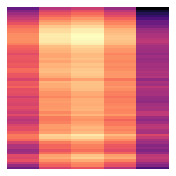

In [ ]:
filect = 0 
print('Working on 7th subset from 30,001 to 35,000')
for i in df_7.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+pngfile)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
! ls /content/gdrive/MyDrive/trainpng | wc
! ls /content/gdrive/MyDrive/dumptrainpng | wc

   4999    4999   53657
   1795    1795   19159


In [ ]:
! pwd
! mv /content/gdrive/MyDrive/trainpng/* /content/gdrive/MyDrive/dumptrainpng/

/content/gdrive/MyDrive


In [ ]:
! ls /content/gdrive/MyDrive/trainpng | wc
! ls /content/gdrive/MyDrive/dumptrainpng | wc

      0       0       0
   6794    6794   72816


Working on 8th subset from 35,001 and up
FileCount = 1: Working on /content/gdrive/MyDrive/devwav/340514.wav
FileCount = 2: Working on /content/gdrive/MyDrive/devwav/340515.wav
FileCount = 3: Working on /content/gdrive/MyDrive/devwav/340517.wav
FileCount = 4: Working on /content/gdrive/MyDrive/devwav/340518.wav
FileCount = 5: Working on /content/gdrive/MyDrive/devwav/340519.wav
FileCount = 6: Working on /content/gdrive/MyDrive/devwav/340520.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18678
  n_fft, y.shape[-1]


FileCount = 7: Working on /content/gdrive/MyDrive/devwav/340521.wav
FileCount = 8: Working on /content/gdrive/MyDrive/devwav/340522.wav
FileCount = 9: Working on /content/gdrive/MyDrive/devwav/340523.wav
FileCount = 10: Working on /content/gdrive/MyDrive/devwav/340533.wav
FileCount = 11: Working on /content/gdrive/MyDrive/devwav/340534.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19666
  n_fft, y.shape[-1]


FileCount = 12: Working on /content/gdrive/MyDrive/devwav/340542.wav
FileCount = 13: Working on /content/gdrive/MyDrive/devwav/340543.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30554
  n_fft, y.shape[-1]


FileCount = 14: Working on /content/gdrive/MyDrive/devwav/340544.wav
FileCount = 15: Working on /content/gdrive/MyDrive/devwav/340545.wav
FileCount = 16: Working on /content/gdrive/MyDrive/devwav/340546.wav
FileCount = 17: Working on /content/gdrive/MyDrive/devwav/340547.wav
FileCount = 18: Working on /content/gdrive/MyDrive/devwav/340548.wav
FileCount = 19: Working on /content/gdrive/MyDrive/devwav/340549.wav
FileCount = 20: Working on /content/gdrive/MyDrive/devwav/340550.wav
FileCount = 21: Working on /content/gdrive/MyDrive/devwav/340551.wav
FileCount = 22: Working on /content/gdrive/MyDrive/devwav/340552.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29370
  n_fft, y.shape[-1]


FileCount = 23: Working on /content/gdrive/MyDrive/devwav/340553.wav
FileCount = 24: Working on /content/gdrive/MyDrive/devwav/391752.wav
FileCount = 25: Working on /content/gdrive/MyDrive/devwav/340555.wav
FileCount = 26: Working on /content/gdrive/MyDrive/devwav/340557.wav
FileCount = 27: Working on /content/gdrive/MyDrive/devwav/340558.wav
FileCount = 28: Working on /content/gdrive/MyDrive/devwav/340559.wav
FileCount = 29: Working on /content/gdrive/MyDrive/devwav/340560.wav
FileCount = 30: Working on /content/gdrive/MyDrive/devwav/340564.wav
FileCount = 31: Working on /content/gdrive/MyDrive/devwav/340566.wav
FileCount = 32: Working on /content/gdrive/MyDrive/devwav/340567.wav
FileCount = 33: Working on /content/gdrive/MyDrive/devwav/391767.wav
FileCount = 34: Working on /content/gdrive/MyDrive/devwav/340570.wav
FileCount = 35: Working on /content/gdrive/MyDrive/devwav/412253.wav
FileCount = 36: Working on /content/gdrive/MyDrive/devwav/340574.wav
FileCount = 37: Working on /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28008
  n_fft, y.shape[-1]


FileCount = 39: Working on /content/gdrive/MyDrive/devwav/340579.wav
FileCount = 40: Working on /content/gdrive/MyDrive/devwav/326243.wav
FileCount = 41: Working on /content/gdrive/MyDrive/devwav/340583.wav
FileCount = 42: Working on /content/gdrive/MyDrive/devwav/340587.wav
FileCount = 43: Working on /content/gdrive/MyDrive/devwav/340588.wav
FileCount = 44: Working on /content/gdrive/MyDrive/devwav/340590.wav
FileCount = 45: Working on /content/gdrive/MyDrive/devwav/340591.wav
FileCount = 46: Working on /content/gdrive/MyDrive/devwav/340592.wav
FileCount = 47: Working on /content/gdrive/MyDrive/devwav/340593.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31018
  n_fft, y.shape[-1]


FileCount = 48: Working on /content/gdrive/MyDrive/devwav/340594.wav
FileCount = 49: Working on /content/gdrive/MyDrive/devwav/340595.wav
FileCount = 50: Working on /content/gdrive/MyDrive/devwav/340596.wav
FileCount = 51: Working on /content/gdrive/MyDrive/devwav/340605.wav
FileCount = 52: Working on /content/gdrive/MyDrive/devwav/340606.wav
FileCount = 53: Working on /content/gdrive/MyDrive/devwav/340608.wav
FileCount = 54: Working on /content/gdrive/MyDrive/devwav/340611.wav
FileCount = 55: Working on /content/gdrive/MyDrive/devwav/340617.wav
FileCount = 56: Working on /content/gdrive/MyDrive/devwav/340619.wav
FileCount = 57: Working on /content/gdrive/MyDrive/devwav/340620.wav
FileCount = 58: Working on /content/gdrive/MyDrive/devwav/27347.wav
FileCount = 59: Working on /content/gdrive/MyDrive/devwav/277209.wav
FileCount = 60: Working on /content/gdrive/MyDrive/devwav/211674.wav
FileCount = 61: Working on /content/gdrive/MyDrive/devwav/211676.wav
FileCount = 62: Working on /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39552
  n_fft, y.shape[-1]


FileCount = 68: Working on /content/gdrive/MyDrive/devwav/144265.wav
FileCount = 69: Working on /content/gdrive/MyDrive/devwav/396240.wav
FileCount = 70: Working on /content/gdrive/MyDrive/devwav/152532.wav
FileCount = 71: Working on /content/gdrive/MyDrive/devwav/119809.wav
FileCount = 72: Working on /content/gdrive/MyDrive/devwav/386079.wav
FileCount = 73: Working on /content/gdrive/MyDrive/devwav/386080.wav
FileCount = 74: Working on /content/gdrive/MyDrive/devwav/418850.wav
FileCount = 75: Working on /content/gdrive/MyDrive/devwav/386084.wav
FileCount = 76: Working on /content/gdrive/MyDrive/devwav/386088.wav
FileCount = 77: Working on /content/gdrive/MyDrive/devwav/386092.wav
FileCount = 78: Working on /content/gdrive/MyDrive/devwav/52268.wav
FileCount = 79: Working on /content/gdrive/MyDrive/devwav/386095.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


FileCount = 80: Working on /content/gdrive/MyDrive/devwav/386097.wav
FileCount = 81: Working on /content/gdrive/MyDrive/devwav/386100.wav
FileCount = 82: Working on /content/gdrive/MyDrive/devwav/386102.wav
FileCount = 83: Working on /content/gdrive/MyDrive/devwav/386103.wav
FileCount = 84: Working on /content/gdrive/MyDrive/devwav/386105.wav
FileCount = 85: Working on /content/gdrive/MyDrive/devwav/386106.wav
FileCount = 86: Working on /content/gdrive/MyDrive/devwav/386108.wav
FileCount = 87: Working on /content/gdrive/MyDrive/devwav/386109.wav
FileCount = 88: Working on /content/gdrive/MyDrive/devwav/386111.wav
FileCount = 89: Working on /content/gdrive/MyDrive/devwav/386113.wav
FileCount = 90: Working on /content/gdrive/MyDrive/devwav/386114.wav
FileCount = 91: Working on /content/gdrive/MyDrive/devwav/386116.wav
FileCount = 92: Working on /content/gdrive/MyDrive/devwav/386117.wav
FileCount = 93: Working on /content/gdrive/MyDrive/devwav/386119.wav
FileCount = 94: Working on /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17227
  n_fft, y.shape[-1]


FileCount = 120: Working on /content/gdrive/MyDrive/devwav/58520.wav
FileCount = 121: Working on /content/gdrive/MyDrive/devwav/58521.wav
FileCount = 122: Working on /content/gdrive/MyDrive/devwav/58522.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15849
  n_fft, y.shape[-1]


FileCount = 123: Working on /content/gdrive/MyDrive/devwav/58529.wav
FileCount = 124: Working on /content/gdrive/MyDrive/devwav/58531.wav
FileCount = 125: Working on /content/gdrive/MyDrive/devwav/58532.wav
FileCount = 126: Working on /content/gdrive/MyDrive/devwav/386213.wav
FileCount = 127: Working on /content/gdrive/MyDrive/devwav/386214.wav
FileCount = 128: Working on /content/gdrive/MyDrive/devwav/386215.wav
FileCount = 129: Working on /content/gdrive/MyDrive/devwav/386218.wav
FileCount = 130: Working on /content/gdrive/MyDrive/devwav/212139.wav
FileCount = 131: Working on /content/gdrive/MyDrive/devwav/386219.wav
FileCount = 132: Working on /content/gdrive/MyDrive/devwav/58542.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


FileCount = 133: Working on /content/gdrive/MyDrive/devwav/386230.wav
FileCount = 134: Working on /content/gdrive/MyDrive/devwav/386237.wav
FileCount = 135: Working on /content/gdrive/MyDrive/devwav/386238.wav
FileCount = 136: Working on /content/gdrive/MyDrive/devwav/386239.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32760
  n_fft, y.shape[-1]


FileCount = 137: Working on /content/gdrive/MyDrive/devwav/386240.wav
FileCount = 138: Working on /content/gdrive/MyDrive/devwav/386241.wav
FileCount = 139: Working on /content/gdrive/MyDrive/devwav/386242.wav
FileCount = 140: Working on /content/gdrive/MyDrive/devwav/386243.wav
FileCount = 141: Working on /content/gdrive/MyDrive/devwav/386244.wav
FileCount = 142: Working on /content/gdrive/MyDrive/devwav/386245.wav
FileCount = 143: Working on /content/gdrive/MyDrive/devwav/81096.wav
FileCount = 144: Working on /content/gdrive/MyDrive/devwav/81097.wav
FileCount = 145: Working on /content/gdrive/MyDrive/devwav/81098.wav
FileCount = 146: Working on /content/gdrive/MyDrive/devwav/81099.wav
FileCount = 147: Working on /content/gdrive/MyDrive/devwav/81100.wav
FileCount = 148: Working on /content/gdrive/MyDrive/devwav/81101.wav
FileCount = 149: Working on /content/gdrive/MyDrive/devwav/81102.wav
FileCount = 150: Working on /content/gdrive/MyDrive/devwav/408776.wav
FileCount = 151: Working on

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14701
  n_fft, y.shape[-1]


FileCount = 166: Working on /content/gdrive/MyDrive/devwav/171270.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39760
  n_fft, y.shape[-1]


FileCount = 167: Working on /content/gdrive/MyDrive/devwav/171271.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27748
  n_fft, y.shape[-1]


FileCount = 168: Working on /content/gdrive/MyDrive/devwav/171272.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36777
  n_fft, y.shape[-1]


FileCount = 169: Working on /content/gdrive/MyDrive/devwav/171273.wav
FileCount = 170: Working on /content/gdrive/MyDrive/devwav/171274.wav
FileCount = 171: Working on /content/gdrive/MyDrive/devwav/171275.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39851
  n_fft, y.shape[-1]


FileCount = 172: Working on /content/gdrive/MyDrive/devwav/171276.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31582
  n_fft, y.shape[-1]


FileCount = 173: Working on /content/gdrive/MyDrive/devwav/171277.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27252
  n_fft, y.shape[-1]


FileCount = 174: Working on /content/gdrive/MyDrive/devwav/171278.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27298
  n_fft, y.shape[-1]


FileCount = 175: Working on /content/gdrive/MyDrive/devwav/386321.wav
FileCount = 176: Working on /content/gdrive/MyDrive/devwav/386330.wav
FileCount = 177: Working on /content/gdrive/MyDrive/devwav/386331.wav
FileCount = 178: Working on /content/gdrive/MyDrive/devwav/386332.wav
FileCount = 179: Working on /content/gdrive/MyDrive/devwav/273697.wav
FileCount = 180: Working on /content/gdrive/MyDrive/devwav/386339.wav
FileCount = 181: Working on /content/gdrive/MyDrive/devwav/81193.wav
FileCount = 182: Working on /content/gdrive/MyDrive/devwav/386352.wav
FileCount = 183: Working on /content/gdrive/MyDrive/devwav/386354.wav
FileCount = 184: Working on /content/gdrive/MyDrive/devwav/386355.wav
FileCount = 185: Working on /content/gdrive/MyDrive/devwav/386356.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21689
  n_fft, y.shape[-1]


FileCount = 186: Working on /content/gdrive/MyDrive/devwav/386358.wav
FileCount = 187: Working on /content/gdrive/MyDrive/devwav/386359.wav
FileCount = 188: Working on /content/gdrive/MyDrive/devwav/386360.wav
FileCount = 189: Working on /content/gdrive/MyDrive/devwav/386365.wav
FileCount = 190: Working on /content/gdrive/MyDrive/devwav/386370.wav
FileCount = 191: Working on /content/gdrive/MyDrive/devwav/386371.wav
FileCount = 192: Working on /content/gdrive/MyDrive/devwav/386372.wav
FileCount = 193: Working on /content/gdrive/MyDrive/devwav/386374.wav
FileCount = 194: Working on /content/gdrive/MyDrive/devwav/386376.wav
FileCount = 195: Working on /content/gdrive/MyDrive/devwav/386377.wav
FileCount = 196: Working on /content/gdrive/MyDrive/devwav/386378.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32269
  n_fft, y.shape[-1]


FileCount = 197: Working on /content/gdrive/MyDrive/devwav/386380.wav
FileCount = 198: Working on /content/gdrive/MyDrive/devwav/386381.wav
FileCount = 199: Working on /content/gdrive/MyDrive/devwav/431439.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29184
  n_fft, y.shape[-1]


FileCount = 200: Working on /content/gdrive/MyDrive/devwav/431448.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20480
  n_fft, y.shape[-1]


FileCount = 201: Working on /content/gdrive/MyDrive/devwav/386402.wav
FileCount = 202: Working on /content/gdrive/MyDrive/devwav/386403.wav
FileCount = 203: Working on /content/gdrive/MyDrive/devwav/386406.wav
FileCount = 204: Working on /content/gdrive/MyDrive/devwav/91521.wav
FileCount = 205: Working on /content/gdrive/MyDrive/devwav/26031.wav
FileCount = 206: Working on /content/gdrive/MyDrive/devwav/368070.wav
FileCount = 207: Working on /content/gdrive/MyDrive/devwav/417281.wav
FileCount = 208: Working on /content/gdrive/MyDrive/devwav/58523.wav
FileCount = 209: Working on /content/gdrive/MyDrive/devwav/58527.wav
FileCount = 210: Working on /content/gdrive/MyDrive/devwav/104008.wav
FileCount = 211: Working on /content/gdrive/MyDrive/devwav/147018.wav
FileCount = 212: Working on /content/gdrive/MyDrive/devwav/400991.wav
FileCount = 213: Working on /content/gdrive/MyDrive/devwav/214628.wav
FileCount = 214: Working on /content/gdrive/MyDrive/devwav/214629.wav
FileCount = 215: Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14667
  n_fft, y.shape[-1]


FileCount = 231: Working on /content/gdrive/MyDrive/devwav/28541.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16900
  n_fft, y.shape[-1]


FileCount = 232: Working on /content/gdrive/MyDrive/devwav/165775.wav
FileCount = 233: Working on /content/gdrive/MyDrive/devwav/73623.wav
FileCount = 234: Working on /content/gdrive/MyDrive/devwav/165785.wav
FileCount = 235: Working on /content/gdrive/MyDrive/devwav/165786.wav
FileCount = 236: Working on /content/gdrive/MyDrive/devwav/165787.wav
FileCount = 237: Working on /content/gdrive/MyDrive/devwav/22437.wav
FileCount = 238: Working on /content/gdrive/MyDrive/devwav/317361.wav
FileCount = 239: Working on /content/gdrive/MyDrive/devwav/341948.wav
FileCount = 240: Working on /content/gdrive/MyDrive/devwav/93184.wav
FileCount = 241: Working on /content/gdrive/MyDrive/devwav/93185.wav
FileCount = 242: Working on /content/gdrive/MyDrive/devwav/244736.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36352
  n_fft, y.shape[-1]


FileCount = 243: Working on /content/gdrive/MyDrive/devwav/276505.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26108
  n_fft, y.shape[-1]


FileCount = 244: Working on /content/gdrive/MyDrive/devwav/276506.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19184
  n_fft, y.shape[-1]


FileCount = 245: Working on /content/gdrive/MyDrive/devwav/276507.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23814
  n_fft, y.shape[-1]


FileCount = 246: Working on /content/gdrive/MyDrive/devwav/276508.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22006
  n_fft, y.shape[-1]


FileCount = 247: Working on /content/gdrive/MyDrive/devwav/135712.wav
FileCount = 248: Working on /content/gdrive/MyDrive/devwav/275492.wav
FileCount = 249: Working on /content/gdrive/MyDrive/devwav/406071.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28375
  n_fft, y.shape[-1]


FileCount = 250: Working on /content/gdrive/MyDrive/devwav/406073.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31840
  n_fft, y.shape[-1]


FileCount = 251: Working on /content/gdrive/MyDrive/devwav/406074.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36279
  n_fft, y.shape[-1]


FileCount = 252: Working on /content/gdrive/MyDrive/devwav/406076.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26822
  n_fft, y.shape[-1]


FileCount = 253: Working on /content/gdrive/MyDrive/devwav/201830.wav
FileCount = 254: Working on /content/gdrive/MyDrive/devwav/148072.wav
FileCount = 255: Working on /content/gdrive/MyDrive/devwav/203378.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25664
  n_fft, y.shape[-1]


FileCount = 256: Working on /content/gdrive/MyDrive/devwav/47221.wav
FileCount = 257: Working on /content/gdrive/MyDrive/devwav/47223.wav
FileCount = 258: Working on /content/gdrive/MyDrive/devwav/33913.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33645
  n_fft, y.shape[-1]


FileCount = 259: Working on /content/gdrive/MyDrive/devwav/398981.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15451
  n_fft, y.shape[-1]


FileCount = 260: Working on /content/gdrive/MyDrive/devwav/398982.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23381
  n_fft, y.shape[-1]


FileCount = 261: Working on /content/gdrive/MyDrive/devwav/398984.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35313
  n_fft, y.shape[-1]


FileCount = 262: Working on /content/gdrive/MyDrive/devwav/398983.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22222
  n_fft, y.shape[-1]


FileCount = 263: Working on /content/gdrive/MyDrive/devwav/398988.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16628
  n_fft, y.shape[-1]


FileCount = 264: Working on /content/gdrive/MyDrive/devwav/353937.wav
FileCount = 265: Working on /content/gdrive/MyDrive/devwav/353938.wav
FileCount = 266: Working on /content/gdrive/MyDrive/devwav/190099.wav
FileCount = 267: Working on /content/gdrive/MyDrive/devwav/68763.wav
FileCount = 268: Working on /content/gdrive/MyDrive/devwav/211163.wav
FileCount = 269: Working on /content/gdrive/MyDrive/devwav/211165.wav
FileCount = 270: Working on /content/gdrive/MyDrive/devwav/412383.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20734
  n_fft, y.shape[-1]


FileCount = 271: Working on /content/gdrive/MyDrive/devwav/412384.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25819
  n_fft, y.shape[-1]


FileCount = 272: Working on /content/gdrive/MyDrive/devwav/412385.wav
FileCount = 273: Working on /content/gdrive/MyDrive/devwav/336615.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35318
  n_fft, y.shape[-1]


FileCount = 274: Working on /content/gdrive/MyDrive/devwav/336617.wav
FileCount = 275: Working on /content/gdrive/MyDrive/devwav/336621.wav
FileCount = 276: Working on /content/gdrive/MyDrive/devwav/336622.wav
FileCount = 277: Working on /content/gdrive/MyDrive/devwav/336623.wav
FileCount = 278: Working on /content/gdrive/MyDrive/devwav/336624.wav
FileCount = 279: Working on /content/gdrive/MyDrive/devwav/353519.wav
FileCount = 280: Working on /content/gdrive/MyDrive/devwav/336627.wav
FileCount = 281: Working on /content/gdrive/MyDrive/devwav/336630.wav
FileCount = 282: Working on /content/gdrive/MyDrive/devwav/336632.wav
FileCount = 283: Working on /content/gdrive/MyDrive/devwav/336628.wav
FileCount = 284: Working on /content/gdrive/MyDrive/devwav/71934.wav
FileCount = 285: Working on /content/gdrive/MyDrive/devwav/204031.wav
FileCount = 286: Working on /content/gdrive/MyDrive/devwav/71935.wav
FileCount = 287: Working on /content/gdrive/MyDrive/devwav/244482.wav
FileCount = 288: Worki

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13904
  n_fft, y.shape[-1]


FileCount = 292: Working on /content/gdrive/MyDrive/devwav/244491.wav
FileCount = 293: Working on /content/gdrive/MyDrive/devwav/124184.wav
FileCount = 294: Working on /content/gdrive/MyDrive/devwav/124186.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26828
  n_fft, y.shape[-1]


FileCount = 295: Working on /content/gdrive/MyDrive/devwav/368924.wav
FileCount = 296: Working on /content/gdrive/MyDrive/devwav/368925.wav
FileCount = 297: Working on /content/gdrive/MyDrive/devwav/124190.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19243
  n_fft, y.shape[-1]


FileCount = 298: Working on /content/gdrive/MyDrive/devwav/124193.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26941
  n_fft, y.shape[-1]


FileCount = 299: Working on /content/gdrive/MyDrive/devwav/124194.wav
FileCount = 300: Working on /content/gdrive/MyDrive/devwav/124195.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18252
  n_fft, y.shape[-1]


FileCount = 301: Working on /content/gdrive/MyDrive/devwav/368960.wav
FileCount = 302: Working on /content/gdrive/MyDrive/devwav/69959.wav
FileCount = 303: Working on /content/gdrive/MyDrive/devwav/82248.wav
FileCount = 304: Working on /content/gdrive/MyDrive/devwav/109398.wav
FileCount = 305: Working on /content/gdrive/MyDrive/devwav/221529.wav
FileCount = 306: Working on /content/gdrive/MyDrive/devwav/96617.wav
FileCount = 307: Working on /content/gdrive/MyDrive/devwav/371564.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18258
  n_fft, y.shape[-1]


FileCount = 308: Working on /content/gdrive/MyDrive/devwav/96621.wav
FileCount = 309: Working on /content/gdrive/MyDrive/devwav/96626.wav
FileCount = 310: Working on /content/gdrive/MyDrive/devwav/322427.wav
FileCount = 311: Working on /content/gdrive/MyDrive/devwav/322428.wav
FileCount = 312: Working on /content/gdrive/MyDrive/devwav/322429.wav
FileCount = 313: Working on /content/gdrive/MyDrive/devwav/322430.wav
FileCount = 314: Working on /content/gdrive/MyDrive/devwav/341914.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41277
  n_fft, y.shape[-1]


FileCount = 315: Working on /content/gdrive/MyDrive/devwav/341920.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40220
  n_fft, y.shape[-1]


FileCount = 316: Working on /content/gdrive/MyDrive/devwav/219042.wav
FileCount = 317: Working on /content/gdrive/MyDrive/devwav/398764.wav
FileCount = 318: Working on /content/gdrive/MyDrive/devwav/398768.wav
FileCount = 319: Working on /content/gdrive/MyDrive/devwav/398774.wav
FileCount = 320: Working on /content/gdrive/MyDrive/devwav/352207.wav
FileCount = 321: Working on /content/gdrive/MyDrive/devwav/93144.wav
FileCount = 322: Working on /content/gdrive/MyDrive/devwav/93146.wav
FileCount = 323: Working on /content/gdrive/MyDrive/devwav/93147.wav
FileCount = 324: Working on /content/gdrive/MyDrive/devwav/93149.wav
FileCount = 325: Working on /content/gdrive/MyDrive/devwav/39392.wav
FileCount = 326: Working on /content/gdrive/MyDrive/devwav/39393.wav
FileCount = 327: Working on /content/gdrive/MyDrive/devwav/93158.wav
FileCount = 328: Working on /content/gdrive/MyDrive/devwav/93159.wav
FileCount = 329: Working on /content/gdrive/MyDrive/devwav/93160.wav
FileCount = 330: Working on /

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34405
  n_fft, y.shape[-1]


FileCount = 374: Working on /content/gdrive/MyDrive/devwav/10420.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38157
  n_fft, y.shape[-1]


FileCount = 375: Working on /content/gdrive/MyDrive/devwav/10421.wav
FileCount = 376: Working on /content/gdrive/MyDrive/devwav/10422.wav
FileCount = 377: Working on /content/gdrive/MyDrive/devwav/10423.wav
FileCount = 378: Working on /content/gdrive/MyDrive/devwav/10424.wav
FileCount = 379: Working on /content/gdrive/MyDrive/devwav/10425.wav
FileCount = 380: Working on /content/gdrive/MyDrive/devwav/10426.wav
FileCount = 381: Working on /content/gdrive/MyDrive/devwav/10427.wav
FileCount = 382: Working on /content/gdrive/MyDrive/devwav/10428.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22564
  n_fft, y.shape[-1]


FileCount = 383: Working on /content/gdrive/MyDrive/devwav/347319.wav
FileCount = 384: Working on /content/gdrive/MyDrive/devwav/364734.wav
FileCount = 385: Working on /content/gdrive/MyDrive/devwav/364738.wav
FileCount = 386: Working on /content/gdrive/MyDrive/devwav/364739.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21568
  n_fft, y.shape[-1]


FileCount = 387: Working on /content/gdrive/MyDrive/devwav/46279.wav
FileCount = 388: Working on /content/gdrive/MyDrive/devwav/46280.wav
FileCount = 389: Working on /content/gdrive/MyDrive/devwav/46281.wav
FileCount = 390: Working on /content/gdrive/MyDrive/devwav/46282.wav
FileCount = 391: Working on /content/gdrive/MyDrive/devwav/46283.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21760
  n_fft, y.shape[-1]


FileCount = 392: Working on /content/gdrive/MyDrive/devwav/426224.wav
FileCount = 393: Working on /content/gdrive/MyDrive/devwav/257278.wav
FileCount = 394: Working on /content/gdrive/MyDrive/devwav/338187.wav
FileCount = 395: Working on /content/gdrive/MyDrive/devwav/261389.wav
FileCount = 396: Working on /content/gdrive/MyDrive/devwav/261393.wav
FileCount = 397: Working on /content/gdrive/MyDrive/devwav/261397.wav
FileCount = 398: Working on /content/gdrive/MyDrive/devwav/68892.wav
FileCount = 399: Working on /content/gdrive/MyDrive/devwav/68893.wav
FileCount = 400: Working on /content/gdrive/MyDrive/devwav/68894.wav
FileCount = 401: Working on /content/gdrive/MyDrive/devwav/68895.wav
FileCount = 402: Working on /content/gdrive/MyDrive/devwav/68896.wav
FileCount = 403: Working on /content/gdrive/MyDrive/devwav/68897.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39077
  n_fft, y.shape[-1]


FileCount = 404: Working on /content/gdrive/MyDrive/devwav/68898.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40696
  n_fft, y.shape[-1]


FileCount = 405: Working on /content/gdrive/MyDrive/devwav/68899.wav
FileCount = 406: Working on /content/gdrive/MyDrive/devwav/68900.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33834
  n_fft, y.shape[-1]


FileCount = 407: Working on /content/gdrive/MyDrive/devwav/68901.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19252
  n_fft, y.shape[-1]


FileCount = 408: Working on /content/gdrive/MyDrive/devwav/68902.wav
FileCount = 409: Working on /content/gdrive/MyDrive/devwav/68904.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33549
  n_fft, y.shape[-1]


FileCount = 410: Working on /content/gdrive/MyDrive/devwav/89385.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38960
  n_fft, y.shape[-1]


FileCount = 411: Working on /content/gdrive/MyDrive/devwav/429381.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19456
  n_fft, y.shape[-1]


FileCount = 412: Working on /content/gdrive/MyDrive/devwav/140618.wav
FileCount = 413: Working on /content/gdrive/MyDrive/devwav/252256.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26112
  n_fft, y.shape[-1]


FileCount = 414: Working on /content/gdrive/MyDrive/devwav/146786.wav
FileCount = 415: Working on /content/gdrive/MyDrive/devwav/146787.wav
FileCount = 416: Working on /content/gdrive/MyDrive/devwav/159083.wav
FileCount = 417: Working on /content/gdrive/MyDrive/devwav/159084.wav
FileCount = 418: Working on /content/gdrive/MyDrive/devwav/159085.wav
FileCount = 419: Working on /content/gdrive/MyDrive/devwav/159086.wav
FileCount = 420: Working on /content/gdrive/MyDrive/devwav/159087.wav
FileCount = 421: Working on /content/gdrive/MyDrive/devwav/159088.wav
FileCount = 422: Working on /content/gdrive/MyDrive/devwav/159089.wav
FileCount = 423: Working on /content/gdrive/MyDrive/devwav/159090.wav
FileCount = 424: Working on /content/gdrive/MyDrive/devwav/159091.wav
FileCount = 425: Working on /content/gdrive/MyDrive/devwav/159092.wav
FileCount = 426: Working on /content/gdrive/MyDrive/devwav/159094.wav
FileCount = 427: Working on /content/gdrive/MyDrive/devwav/232828.wav
FileCount = 428: Wor

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17280
  n_fft, y.shape[-1]


FileCount = 430: Working on /content/gdrive/MyDrive/devwav/50593.wav
FileCount = 431: Working on /content/gdrive/MyDrive/devwav/102834.wav
FileCount = 432: Working on /content/gdrive/MyDrive/devwav/378297.wav
FileCount = 433: Working on /content/gdrive/MyDrive/devwav/378299.wav
FileCount = 434: Working on /content/gdrive/MyDrive/devwav/207305.wav
FileCount = 435: Working on /content/gdrive/MyDrive/devwav/135633.wav
FileCount = 436: Working on /content/gdrive/MyDrive/devwav/135644.wav
FileCount = 437: Working on /content/gdrive/MyDrive/devwav/135645.wav
FileCount = 438: Working on /content/gdrive/MyDrive/devwav/221678.wav
FileCount = 439: Working on /content/gdrive/MyDrive/devwav/221679.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30208
  n_fft, y.shape[-1]


FileCount = 440: Working on /content/gdrive/MyDrive/devwav/221680.wav
FileCount = 441: Working on /content/gdrive/MyDrive/devwav/111105.wav
FileCount = 442: Working on /content/gdrive/MyDrive/devwav/111106.wav
FileCount = 443: Working on /content/gdrive/MyDrive/devwav/111107.wav
FileCount = 444: Working on /content/gdrive/MyDrive/devwav/111108.wav
FileCount = 445: Working on /content/gdrive/MyDrive/devwav/111109.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35645
  n_fft, y.shape[-1]


FileCount = 446: Working on /content/gdrive/MyDrive/devwav/111110.wav
FileCount = 447: Working on /content/gdrive/MyDrive/devwav/408070.wav
FileCount = 448: Working on /content/gdrive/MyDrive/devwav/111112.wav
FileCount = 449: Working on /content/gdrive/MyDrive/devwav/111113.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22458
  n_fft, y.shape[-1]


FileCount = 450: Working on /content/gdrive/MyDrive/devwav/111114.wav
FileCount = 451: Working on /content/gdrive/MyDrive/devwav/111115.wav
FileCount = 452: Working on /content/gdrive/MyDrive/devwav/342540.wav
FileCount = 453: Working on /content/gdrive/MyDrive/devwav/111116.wav
FileCount = 454: Working on /content/gdrive/MyDrive/devwav/342541.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39170
  n_fft, y.shape[-1]


FileCount = 455: Working on /content/gdrive/MyDrive/devwav/111117.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36513
  n_fft, y.shape[-1]


FileCount = 456: Working on /content/gdrive/MyDrive/devwav/111118.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29498
  n_fft, y.shape[-1]


FileCount = 457: Working on /content/gdrive/MyDrive/devwav/111119.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39410
  n_fft, y.shape[-1]


FileCount = 458: Working on /content/gdrive/MyDrive/devwav/111120.wav
FileCount = 459: Working on /content/gdrive/MyDrive/devwav/181770.wav
FileCount = 460: Working on /content/gdrive/MyDrive/devwav/181771.wav
FileCount = 461: Working on /content/gdrive/MyDrive/devwav/103958.wav
FileCount = 462: Working on /content/gdrive/MyDrive/devwav/172622.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19446
  n_fft, y.shape[-1]


FileCount = 463: Working on /content/gdrive/MyDrive/devwav/172623.wav
FileCount = 464: Working on /content/gdrive/MyDrive/devwav/172624.wav
FileCount = 465: Working on /content/gdrive/MyDrive/devwav/172625.wav
FileCount = 466: Working on /content/gdrive/MyDrive/devwav/172626.wav
FileCount = 467: Working on /content/gdrive/MyDrive/devwav/172627.wav
FileCount = 468: Working on /content/gdrive/MyDrive/devwav/172628.wav
FileCount = 469: Working on /content/gdrive/MyDrive/devwav/172629.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23468
  n_fft, y.shape[-1]


FileCount = 470: Working on /content/gdrive/MyDrive/devwav/408195.wav
FileCount = 471: Working on /content/gdrive/MyDrive/devwav/178844.wav
FileCount = 472: Working on /content/gdrive/MyDrive/devwav/272028.wav
FileCount = 473: Working on /content/gdrive/MyDrive/devwav/83620.wav
FileCount = 474: Working on /content/gdrive/MyDrive/devwav/389805.wav
FileCount = 475: Working on /content/gdrive/MyDrive/devwav/389806.wav
FileCount = 476: Working on /content/gdrive/MyDrive/devwav/322227.wav
FileCount = 477: Working on /content/gdrive/MyDrive/devwav/89791.wav
FileCount = 478: Working on /content/gdrive/MyDrive/devwav/390864.wav
FileCount = 479: Working on /content/gdrive/MyDrive/devwav/336597.wav
FileCount = 480: Working on /content/gdrive/MyDrive/devwav/390876.wav
FileCount = 481: Working on /content/gdrive/MyDrive/devwav/390877.wav
FileCount = 482: Working on /content/gdrive/MyDrive/devwav/77536.wav
FileCount = 483: Working on /content/gdrive/MyDrive/devwav/77537.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31258
  n_fft, y.shape[-1]


FileCount = 484: Working on /content/gdrive/MyDrive/devwav/77538.wav
FileCount = 485: Working on /content/gdrive/MyDrive/devwav/77539.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15140
  n_fft, y.shape[-1]


FileCount = 486: Working on /content/gdrive/MyDrive/devwav/77540.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13513
  n_fft, y.shape[-1]


FileCount = 487: Working on /content/gdrive/MyDrive/devwav/77541.wav
FileCount = 488: Working on /content/gdrive/MyDrive/devwav/77542.wav
FileCount = 489: Working on /content/gdrive/MyDrive/devwav/77543.wav
FileCount = 490: Working on /content/gdrive/MyDrive/devwav/77544.wav
FileCount = 491: Working on /content/gdrive/MyDrive/devwav/77545.wav
FileCount = 492: Working on /content/gdrive/MyDrive/devwav/77546.wav
FileCount = 493: Working on /content/gdrive/MyDrive/devwav/77547.wav
FileCount = 494: Working on /content/gdrive/MyDrive/devwav/104172.wav
FileCount = 495: Working on /content/gdrive/MyDrive/devwav/234221.wav
FileCount = 496: Working on /content/gdrive/MyDrive/devwav/234222.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21505
  n_fft, y.shape[-1]


FileCount = 497: Working on /content/gdrive/MyDrive/devwav/77551.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26782
  n_fft, y.shape[-1]


FileCount = 498: Working on /content/gdrive/MyDrive/devwav/234223.wav
FileCount = 499: Working on /content/gdrive/MyDrive/devwav/77549.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13838
  n_fft, y.shape[-1]


FileCount = 500: Working on /content/gdrive/MyDrive/devwav/77555.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19780
  n_fft, y.shape[-1]


FileCount = 501: Working on /content/gdrive/MyDrive/devwav/77548.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15548
  n_fft, y.shape[-1]


FileCount = 502: Working on /content/gdrive/MyDrive/devwav/77557.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16932
  n_fft, y.shape[-1]


FileCount = 503: Working on /content/gdrive/MyDrive/devwav/77550.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13919
  n_fft, y.shape[-1]


FileCount = 504: Working on /content/gdrive/MyDrive/devwav/77552.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20839
  n_fft, y.shape[-1]


FileCount = 505: Working on /content/gdrive/MyDrive/devwav/77559.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14571
  n_fft, y.shape[-1]


FileCount = 506: Working on /content/gdrive/MyDrive/devwav/77553.wav
FileCount = 507: Working on /content/gdrive/MyDrive/devwav/77554.wav
FileCount = 508: Working on /content/gdrive/MyDrive/devwav/77556.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14734
  n_fft, y.shape[-1]


FileCount = 509: Working on /content/gdrive/MyDrive/devwav/77558.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37770
  n_fft, y.shape[-1]


FileCount = 510: Working on /content/gdrive/MyDrive/devwav/77561.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17664
  n_fft, y.shape[-1]


FileCount = 511: Working on /content/gdrive/MyDrive/devwav/77562.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35003
  n_fft, y.shape[-1]


FileCount = 512: Working on /content/gdrive/MyDrive/devwav/77563.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20106
  n_fft, y.shape[-1]


FileCount = 513: Working on /content/gdrive/MyDrive/devwav/77564.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14815
  n_fft, y.shape[-1]


FileCount = 514: Working on /content/gdrive/MyDrive/devwav/77565.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22793
  n_fft, y.shape[-1]


FileCount = 515: Working on /content/gdrive/MyDrive/devwav/77566.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31828
  n_fft, y.shape[-1]


FileCount = 516: Working on /content/gdrive/MyDrive/devwav/77567.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34759
  n_fft, y.shape[-1]


FileCount = 517: Working on /content/gdrive/MyDrive/devwav/77568.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41678
  n_fft, y.shape[-1]


FileCount = 518: Working on /content/gdrive/MyDrive/devwav/77569.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31584
  n_fft, y.shape[-1]


FileCount = 519: Working on /content/gdrive/MyDrive/devwav/77570.wav
FileCount = 520: Working on /content/gdrive/MyDrive/devwav/77571.wav
FileCount = 521: Working on /content/gdrive/MyDrive/devwav/77572.wav
FileCount = 522: Working on /content/gdrive/MyDrive/devwav/77573.wav
FileCount = 523: Working on /content/gdrive/MyDrive/devwav/77574.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35817
  n_fft, y.shape[-1]


FileCount = 524: Working on /content/gdrive/MyDrive/devwav/77575.wav
FileCount = 525: Working on /content/gdrive/MyDrive/devwav/77576.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34189
  n_fft, y.shape[-1]


FileCount = 526: Working on /content/gdrive/MyDrive/devwav/77577.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38747
  n_fft, y.shape[-1]


FileCount = 527: Working on /content/gdrive/MyDrive/devwav/77578.wav
FileCount = 528: Working on /content/gdrive/MyDrive/devwav/257805.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37888
  n_fft, y.shape[-1]


FileCount = 529: Working on /content/gdrive/MyDrive/devwav/415536.wav
FileCount = 530: Working on /content/gdrive/MyDrive/devwav/179013.wav
FileCount = 531: Working on /content/gdrive/MyDrive/devwav/179022.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23553
  n_fft, y.shape[-1]


FileCount = 532: Working on /content/gdrive/MyDrive/devwav/422737.wav
FileCount = 533: Working on /content/gdrive/MyDrive/devwav/327518.wav
FileCount = 534: Working on /content/gdrive/MyDrive/devwav/216926.wav
FileCount = 535: Working on /content/gdrive/MyDrive/devwav/216927.wav
FileCount = 536: Working on /content/gdrive/MyDrive/devwav/327519.wav
FileCount = 537: Working on /content/gdrive/MyDrive/devwav/104175.wav
FileCount = 538: Working on /content/gdrive/MyDrive/devwav/406399.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24910
  n_fft, y.shape[-1]


FileCount = 539: Working on /content/gdrive/MyDrive/devwav/406400.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37957
  n_fft, y.shape[-1]


FileCount = 540: Working on /content/gdrive/MyDrive/devwav/406401.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39736
  n_fft, y.shape[-1]


FileCount = 541: Working on /content/gdrive/MyDrive/devwav/187266.wav
FileCount = 542: Working on /content/gdrive/MyDrive/devwav/187271.wav
FileCount = 543: Working on /content/gdrive/MyDrive/devwav/187273.wav
FileCount = 544: Working on /content/gdrive/MyDrive/devwav/18326.wav
FileCount = 545: Working on /content/gdrive/MyDrive/devwav/215971.wav
FileCount = 546: Working on /content/gdrive/MyDrive/devwav/215972.wav
FileCount = 547: Working on /content/gdrive/MyDrive/devwav/85927.wav
FileCount = 548: Working on /content/gdrive/MyDrive/devwav/215979.wav
FileCount = 549: Working on /content/gdrive/MyDrive/devwav/111111.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23275
  n_fft, y.shape[-1]


FileCount = 550: Working on /content/gdrive/MyDrive/devwav/81855.wav
FileCount = 551: Working on /content/gdrive/MyDrive/devwav/119753.wav
FileCount = 552: Working on /content/gdrive/MyDrive/devwav/317396.wav
FileCount = 553: Working on /content/gdrive/MyDrive/devwav/382940.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41664
  n_fft, y.shape[-1]


FileCount = 554: Working on /content/gdrive/MyDrive/devwav/82909.wav
FileCount = 555: Working on /content/gdrive/MyDrive/devwav/219102.wav
FileCount = 556: Working on /content/gdrive/MyDrive/devwav/365541.wav
FileCount = 557: Working on /content/gdrive/MyDrive/devwav/50155.wav
FileCount = 558: Working on /content/gdrive/MyDrive/devwav/262018.wav
FileCount = 559: Working on /content/gdrive/MyDrive/devwav/219907.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21110
  n_fft, y.shape[-1]


FileCount = 560: Working on /content/gdrive/MyDrive/devwav/219908.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32124
  n_fft, y.shape[-1]


FileCount = 561: Working on /content/gdrive/MyDrive/devwav/219911.wav
FileCount = 562: Working on /content/gdrive/MyDrive/devwav/219912.wav
FileCount = 563: Working on /content/gdrive/MyDrive/devwav/408839.wav
FileCount = 564: Working on /content/gdrive/MyDrive/devwav/219914.wav
FileCount = 565: Working on /content/gdrive/MyDrive/devwav/24973.wav
FileCount = 566: Working on /content/gdrive/MyDrive/devwav/24974.wav
FileCount = 567: Working on /content/gdrive/MyDrive/devwav/154642.wav
FileCount = 568: Working on /content/gdrive/MyDrive/devwav/325780.wav
FileCount = 569: Working on /content/gdrive/MyDrive/devwav/325781.wav
FileCount = 570: Working on /content/gdrive/MyDrive/devwav/325782.wav
FileCount = 571: Working on /content/gdrive/MyDrive/devwav/46361.wav
FileCount = 572: Working on /content/gdrive/MyDrive/devwav/32667.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14516
  n_fft, y.shape[-1]


FileCount = 573: Working on /content/gdrive/MyDrive/devwav/172190.wav
FileCount = 574: Working on /content/gdrive/MyDrive/devwav/272031.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40466
  n_fft, y.shape[-1]


FileCount = 575: Working on /content/gdrive/MyDrive/devwav/222885.wav
FileCount = 576: Working on /content/gdrive/MyDrive/devwav/346024.wav
FileCount = 577: Working on /content/gdrive/MyDrive/devwav/346670.wav
FileCount = 578: Working on /content/gdrive/MyDrive/devwav/346671.wav
FileCount = 579: Working on /content/gdrive/MyDrive/devwav/346672.wav
FileCount = 580: Working on /content/gdrive/MyDrive/devwav/346673.wav
FileCount = 581: Working on /content/gdrive/MyDrive/devwav/327087.wav
FileCount = 582: Working on /content/gdrive/MyDrive/devwav/346676.wav
FileCount = 583: Working on /content/gdrive/MyDrive/devwav/346677.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40452
  n_fft, y.shape[-1]


FileCount = 584: Working on /content/gdrive/MyDrive/devwav/346678.wav
FileCount = 585: Working on /content/gdrive/MyDrive/devwav/346679.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34638
  n_fft, y.shape[-1]


FileCount = 586: Working on /content/gdrive/MyDrive/devwav/346680.wav
FileCount = 587: Working on /content/gdrive/MyDrive/devwav/346681.wav
FileCount = 588: Working on /content/gdrive/MyDrive/devwav/412854.wav
FileCount = 589: Working on /content/gdrive/MyDrive/devwav/369590.wav
FileCount = 590: Working on /content/gdrive/MyDrive/devwav/9659.wav
FileCount = 591: Working on /content/gdrive/MyDrive/devwav/218307.wav
FileCount = 592: Working on /content/gdrive/MyDrive/devwav/217940.wav
FileCount = 593: Working on /content/gdrive/MyDrive/devwav/217941.wav
FileCount = 594: Working on /content/gdrive/MyDrive/devwav/60382.wav
FileCount = 595: Working on /content/gdrive/MyDrive/devwav/416863.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36508
  n_fft, y.shape[-1]


FileCount = 596: Working on /content/gdrive/MyDrive/devwav/67167.wav
FileCount = 597: Working on /content/gdrive/MyDrive/devwav/60383.wav
FileCount = 598: Working on /content/gdrive/MyDrive/devwav/60384.wav
FileCount = 599: Working on /content/gdrive/MyDrive/devwav/217956.wav
FileCount = 600: Working on /content/gdrive/MyDrive/devwav/161004.wav
FileCount = 601: Working on /content/gdrive/MyDrive/devwav/368494.wav
FileCount = 602: Working on /content/gdrive/MyDrive/devwav/95342.wav
FileCount = 603: Working on /content/gdrive/MyDrive/devwav/74993.wav
FileCount = 604: Working on /content/gdrive/MyDrive/devwav/157304.wav
FileCount = 605: Working on /content/gdrive/MyDrive/devwav/412537.wav
FileCount = 606: Working on /content/gdrive/MyDrive/devwav/427388.wav
FileCount = 607: Working on /content/gdrive/MyDrive/devwav/410131.wav
FileCount = 608: Working on /content/gdrive/MyDrive/devwav/386554.wav
FileCount = 609: Working on /content/gdrive/MyDrive/devwav/410143.wav
FileCount = 610: Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14354
  n_fft, y.shape[-1]


FileCount = 766: Working on /content/gdrive/MyDrive/devwav/380888.wav
FileCount = 767: Working on /content/gdrive/MyDrive/devwav/380889.wav
FileCount = 768: Working on /content/gdrive/MyDrive/devwav/32178.wav
FileCount = 769: Working on /content/gdrive/MyDrive/devwav/30250.wav
FileCount = 770: Working on /content/gdrive/MyDrive/devwav/3666.wav
FileCount = 771: Working on /content/gdrive/MyDrive/devwav/3668.wav
FileCount = 772: Working on /content/gdrive/MyDrive/devwav/3669.wav
FileCount = 773: Working on /content/gdrive/MyDrive/devwav/3670.wav
FileCount = 774: Working on /content/gdrive/MyDrive/devwav/3671.wav
FileCount = 775: Working on /content/gdrive/MyDrive/devwav/3672.wav
FileCount = 776: Working on /content/gdrive/MyDrive/devwav/3673.wav
FileCount = 777: Working on /content/gdrive/MyDrive/devwav/379999.wav
FileCount = 778: Working on /content/gdrive/MyDrive/devwav/380000.wav
FileCount = 779: Working on /content/gdrive/MyDrive/devwav/380001.wav
FileCount = 780: Working on /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40448
  n_fft, y.shape[-1]


FileCount = 819: Working on /content/gdrive/MyDrive/devwav/39587.wav
FileCount = 820: Working on /content/gdrive/MyDrive/devwav/30392.wav
FileCount = 821: Working on /content/gdrive/MyDrive/devwav/30418.wav
FileCount = 822: Working on /content/gdrive/MyDrive/devwav/30419.wav
FileCount = 823: Working on /content/gdrive/MyDrive/devwav/30421.wav
FileCount = 824: Working on /content/gdrive/MyDrive/devwav/2790.wav
FileCount = 825: Working on /content/gdrive/MyDrive/devwav/377071.wav
FileCount = 826: Working on /content/gdrive/MyDrive/devwav/30960.wav
FileCount = 827: Working on /content/gdrive/MyDrive/devwav/30961.wav
FileCount = 828: Working on /content/gdrive/MyDrive/devwav/30962.wav
FileCount = 829: Working on /content/gdrive/MyDrive/devwav/29940.wav
FileCount = 830: Working on /content/gdrive/MyDrive/devwav/29941.wav
FileCount = 831: Working on /content/gdrive/MyDrive/devwav/29943.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40029
  n_fft, y.shape[-1]


FileCount = 832: Working on /content/gdrive/MyDrive/devwav/62748.wav
FileCount = 833: Working on /content/gdrive/MyDrive/devwav/62750.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31998
  n_fft, y.shape[-1]


FileCount = 834: Working on /content/gdrive/MyDrive/devwav/62753.wav
FileCount = 835: Working on /content/gdrive/MyDrive/devwav/62754.wav
FileCount = 836: Working on /content/gdrive/MyDrive/devwav/62755.wav
FileCount = 837: Working on /content/gdrive/MyDrive/devwav/62756.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38313
  n_fft, y.shape[-1]


FileCount = 838: Working on /content/gdrive/MyDrive/devwav/378149.wav
FileCount = 839: Working on /content/gdrive/MyDrive/devwav/62758.wav
FileCount = 840: Working on /content/gdrive/MyDrive/devwav/62759.wav
FileCount = 841: Working on /content/gdrive/MyDrive/devwav/62760.wav
FileCount = 842: Working on /content/gdrive/MyDrive/devwav/62761.wav
FileCount = 843: Working on /content/gdrive/MyDrive/devwav/378148.wav
FileCount = 844: Working on /content/gdrive/MyDrive/devwav/62762.wav
FileCount = 845: Working on /content/gdrive/MyDrive/devwav/62768.wav
FileCount = 846: Working on /content/gdrive/MyDrive/devwav/62769.wav
FileCount = 847: Working on /content/gdrive/MyDrive/devwav/62772.wav
FileCount = 848: Working on /content/gdrive/MyDrive/devwav/58280.wav
FileCount = 849: Working on /content/gdrive/MyDrive/devwav/239463.wav
FileCount = 850: Working on /content/gdrive/MyDrive/devwav/239464.wav
FileCount = 851: Working on /content/gdrive/MyDrive/devwav/239465.wav
FileCount = 852: Working on /

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33408
  n_fft, y.shape[-1]


FileCount = 854: Working on /content/gdrive/MyDrive/devwav/239467.wav
FileCount = 855: Working on /content/gdrive/MyDrive/devwav/239468.wav
FileCount = 856: Working on /content/gdrive/MyDrive/devwav/239469.wav
FileCount = 857: Working on /content/gdrive/MyDrive/devwav/239470.wav
FileCount = 858: Working on /content/gdrive/MyDrive/devwav/239471.wav
FileCount = 859: Working on /content/gdrive/MyDrive/devwav/239472.wav
FileCount = 860: Working on /content/gdrive/MyDrive/devwav/239473.wav
FileCount = 861: Working on /content/gdrive/MyDrive/devwav/28670.wav
FileCount = 862: Working on /content/gdrive/MyDrive/devwav/14739.wav
FileCount = 863: Working on /content/gdrive/MyDrive/devwav/61855.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36077
  n_fft, y.shape[-1]


FileCount = 864: Working on /content/gdrive/MyDrive/devwav/61856.wav
FileCount = 865: Working on /content/gdrive/MyDrive/devwav/61857.wav
FileCount = 866: Working on /content/gdrive/MyDrive/devwav/61858.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22354
  n_fft, y.shape[-1]


FileCount = 867: Working on /content/gdrive/MyDrive/devwav/61859.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22755
  n_fft, y.shape[-1]


FileCount = 868: Working on /content/gdrive/MyDrive/devwav/61860.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32771
  n_fft, y.shape[-1]


FileCount = 869: Working on /content/gdrive/MyDrive/devwav/61861.wav
FileCount = 870: Working on /content/gdrive/MyDrive/devwav/61862.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19458
  n_fft, y.shape[-1]


FileCount = 871: Working on /content/gdrive/MyDrive/devwav/61863.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36953
  n_fft, y.shape[-1]


FileCount = 872: Working on /content/gdrive/MyDrive/devwav/61864.wav
FileCount = 873: Working on /content/gdrive/MyDrive/devwav/31145.wav
FileCount = 874: Working on /content/gdrive/MyDrive/devwav/31146.wav
FileCount = 875: Working on /content/gdrive/MyDrive/devwav/61866.wav
FileCount = 876: Working on /content/gdrive/MyDrive/devwav/61868.wav
FileCount = 877: Working on /content/gdrive/MyDrive/devwav/61867.wav
FileCount = 878: Working on /content/gdrive/MyDrive/devwav/61870.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39495
  n_fft, y.shape[-1]


FileCount = 879: Working on /content/gdrive/MyDrive/devwav/61871.wav
FileCount = 880: Working on /content/gdrive/MyDrive/devwav/61872.wav
FileCount = 881: Working on /content/gdrive/MyDrive/devwav/61873.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32447
  n_fft, y.shape[-1]


FileCount = 882: Working on /content/gdrive/MyDrive/devwav/61874.wav
FileCount = 883: Working on /content/gdrive/MyDrive/devwav/61875.wav
FileCount = 884: Working on /content/gdrive/MyDrive/devwav/61876.wav
FileCount = 885: Working on /content/gdrive/MyDrive/devwav/61877.wav
FileCount = 886: Working on /content/gdrive/MyDrive/devwav/61878.wav
FileCount = 887: Working on /content/gdrive/MyDrive/devwav/61879.wav
FileCount = 888: Working on /content/gdrive/MyDrive/devwav/61880.wav
FileCount = 889: Working on /content/gdrive/MyDrive/devwav/61881.wav
FileCount = 890: Working on /content/gdrive/MyDrive/devwav/61882.wav
FileCount = 891: Working on /content/gdrive/MyDrive/devwav/61883.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27282
  n_fft, y.shape[-1]


FileCount = 892: Working on /content/gdrive/MyDrive/devwav/61884.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38208
  n_fft, y.shape[-1]


FileCount = 893: Working on /content/gdrive/MyDrive/devwav/61885.wav
FileCount = 894: Working on /content/gdrive/MyDrive/devwav/61886.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35128
  n_fft, y.shape[-1]


FileCount = 895: Working on /content/gdrive/MyDrive/devwav/61887.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30976
  n_fft, y.shape[-1]


FileCount = 896: Working on /content/gdrive/MyDrive/devwav/61888.wav
FileCount = 897: Working on /content/gdrive/MyDrive/devwav/61889.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34072
  n_fft, y.shape[-1]


FileCount = 898: Working on /content/gdrive/MyDrive/devwav/61890.wav
FileCount = 899: Working on /content/gdrive/MyDrive/devwav/61891.wav
FileCount = 900: Working on /content/gdrive/MyDrive/devwav/61892.wav
FileCount = 901: Working on /content/gdrive/MyDrive/devwav/61893.wav
FileCount = 902: Working on /content/gdrive/MyDrive/devwav/61894.wav
FileCount = 903: Working on /content/gdrive/MyDrive/devwav/61895.wav
FileCount = 904: Working on /content/gdrive/MyDrive/devwav/61896.wav
FileCount = 905: Working on /content/gdrive/MyDrive/devwav/61897.wav
FileCount = 906: Working on /content/gdrive/MyDrive/devwav/61898.wav
FileCount = 907: Working on /content/gdrive/MyDrive/devwav/61899.wav
FileCount = 908: Working on /content/gdrive/MyDrive/devwav/61900.wav
FileCount = 909: Working on /content/gdrive/MyDrive/devwav/61901.wav
FileCount = 910: Working on /content/gdrive/MyDrive/devwav/61902.wav
FileCount = 911: Working on /content/gdrive/MyDrive/devwav/61903.wav
FileCount = 912: Working on /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35639
  n_fft, y.shape[-1]


FileCount = 917: Working on /content/gdrive/MyDrive/devwav/61909.wav
FileCount = 918: Working on /content/gdrive/MyDrive/devwav/61910.wav
FileCount = 919: Working on /content/gdrive/MyDrive/devwav/61911.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19070
  n_fft, y.shape[-1]


FileCount = 920: Working on /content/gdrive/MyDrive/devwav/61912.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14864
  n_fft, y.shape[-1]


FileCount = 921: Working on /content/gdrive/MyDrive/devwav/61913.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28731
  n_fft, y.shape[-1]


FileCount = 922: Working on /content/gdrive/MyDrive/devwav/61914.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28998
  n_fft, y.shape[-1]


FileCount = 923: Working on /content/gdrive/MyDrive/devwav/61915.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31835
  n_fft, y.shape[-1]


FileCount = 924: Working on /content/gdrive/MyDrive/devwav/239067.wav
FileCount = 925: Working on /content/gdrive/MyDrive/devwav/61917.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23558
  n_fft, y.shape[-1]


FileCount = 926: Working on /content/gdrive/MyDrive/devwav/61918.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30556
  n_fft, y.shape[-1]


FileCount = 927: Working on /content/gdrive/MyDrive/devwav/61919.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32044
  n_fft, y.shape[-1]


FileCount = 928: Working on /content/gdrive/MyDrive/devwav/61920.wav
FileCount = 929: Working on /content/gdrive/MyDrive/devwav/61921.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20173
  n_fft, y.shape[-1]


FileCount = 930: Working on /content/gdrive/MyDrive/devwav/61922.wav
FileCount = 931: Working on /content/gdrive/MyDrive/devwav/61923.wav
FileCount = 932: Working on /content/gdrive/MyDrive/devwav/61924.wav
FileCount = 933: Working on /content/gdrive/MyDrive/devwav/15328.wav
FileCount = 934: Working on /content/gdrive/MyDrive/devwav/15329.wav
FileCount = 935: Working on /content/gdrive/MyDrive/devwav/238567.wav
FileCount = 936: Working on /content/gdrive/MyDrive/devwav/238568.wav
FileCount = 937: Working on /content/gdrive/MyDrive/devwav/238569.wav
FileCount = 938: Working on /content/gdrive/MyDrive/devwav/238570.wav
FileCount = 939: Working on /content/gdrive/MyDrive/devwav/238571.wav
FileCount = 940: Working on /content/gdrive/MyDrive/devwav/238572.wav
FileCount = 941: Working on /content/gdrive/MyDrive/devwav/238573.wav
FileCount = 942: Working on /content/gdrive/MyDrive/devwav/238574.wav
FileCount = 943: Working on /content/gdrive/MyDrive/devwav/380887.wav
FileCount = 944: Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


FileCount = 967: Working on /content/gdrive/MyDrive/devwav/181426.wav
FileCount = 968: Working on /content/gdrive/MyDrive/devwav/69571.wav
FileCount = 969: Working on /content/gdrive/MyDrive/devwav/429124.wav
FileCount = 970: Working on /content/gdrive/MyDrive/devwav/197447.wav
FileCount = 971: Working on /content/gdrive/MyDrive/devwav/84556.wav
FileCount = 972: Working on /content/gdrive/MyDrive/devwav/84557.wav
FileCount = 973: Working on /content/gdrive/MyDrive/devwav/397651.wav
FileCount = 974: Working on /content/gdrive/MyDrive/devwav/387542.wav
FileCount = 975: Working on /content/gdrive/MyDrive/devwav/96223.wav
FileCount = 976: Working on /content/gdrive/MyDrive/devwav/97380.wav
FileCount = 977: Working on /content/gdrive/MyDrive/devwav/410343.wav
FileCount = 978: Working on /content/gdrive/MyDrive/devwav/347258.wav
FileCount = 979: Working on /content/gdrive/MyDrive/devwav/134780.wav
FileCount = 980: Working on /content/gdrive/MyDrive/devwav/53759.wav
FileCount = 981: Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40364
  n_fft, y.shape[-1]


FileCount = 1041: Working on /content/gdrive/MyDrive/devwav/1737.wav
FileCount = 1042: Working on /content/gdrive/MyDrive/devwav/1740.wav
FileCount = 1043: Working on /content/gdrive/MyDrive/devwav/1741.wav
FileCount = 1044: Working on /content/gdrive/MyDrive/devwav/1742.wav
FileCount = 1045: Working on /content/gdrive/MyDrive/devwav/1750.wav
FileCount = 1046: Working on /content/gdrive/MyDrive/devwav/346328.wav
FileCount = 1047: Working on /content/gdrive/MyDrive/devwav/1752.wav
FileCount = 1048: Working on /content/gdrive/MyDrive/devwav/400605.wav
FileCount = 1049: Working on /content/gdrive/MyDrive/devwav/119006.wav
FileCount = 1050: Working on /content/gdrive/MyDrive/devwav/119007.wav
FileCount = 1051: Working on /content/gdrive/MyDrive/devwav/119005.wav
FileCount = 1052: Working on /content/gdrive/MyDrive/devwav/119009.wav
FileCount = 1053: Working on /content/gdrive/MyDrive/devwav/1762.wav
FileCount = 1054: Working on /content/gdrive/MyDrive/devwav/1763.wav
FileCount = 1055: Work

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13517
  n_fft, y.shape[-1]


FileCount = 1105: Working on /content/gdrive/MyDrive/devwav/28471.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18157
  n_fft, y.shape[-1]


FileCount = 1106: Working on /content/gdrive/MyDrive/devwav/28472.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41796
  n_fft, y.shape[-1]


FileCount = 1107: Working on /content/gdrive/MyDrive/devwav/268603.wav
FileCount = 1108: Working on /content/gdrive/MyDrive/devwav/28477.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14321
  n_fft, y.shape[-1]


FileCount = 1109: Working on /content/gdrive/MyDrive/devwav/28481.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17334
  n_fft, y.shape[-1]


FileCount = 1110: Working on /content/gdrive/MyDrive/devwav/28482.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18298
  n_fft, y.shape[-1]


FileCount = 1111: Working on /content/gdrive/MyDrive/devwav/275267.wav
FileCount = 1112: Working on /content/gdrive/MyDrive/devwav/275268.wav
FileCount = 1113: Working on /content/gdrive/MyDrive/devwav/275269.wav
FileCount = 1114: Working on /content/gdrive/MyDrive/devwav/275270.wav
FileCount = 1115: Working on /content/gdrive/MyDrive/devwav/28487.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38939
  n_fft, y.shape[-1]


FileCount = 1116: Working on /content/gdrive/MyDrive/devwav/169289.wav
FileCount = 1117: Working on /content/gdrive/MyDrive/devwav/28488.wav
FileCount = 1118: Working on /content/gdrive/MyDrive/devwav/28490.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28803
  n_fft, y.shape[-1]


FileCount = 1119: Working on /content/gdrive/MyDrive/devwav/28489.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28581
  n_fft, y.shape[-1]


FileCount = 1120: Working on /content/gdrive/MyDrive/devwav/275271.wav
FileCount = 1121: Working on /content/gdrive/MyDrive/devwav/275272.wav
FileCount = 1122: Working on /content/gdrive/MyDrive/devwav/275273.wav
FileCount = 1123: Working on /content/gdrive/MyDrive/devwav/275274.wav
FileCount = 1124: Working on /content/gdrive/MyDrive/devwav/275275.wav
FileCount = 1125: Working on /content/gdrive/MyDrive/devwav/275276.wav
FileCount = 1126: Working on /content/gdrive/MyDrive/devwav/275277.wav
FileCount = 1127: Working on /content/gdrive/MyDrive/devwav/275278.wav
FileCount = 1128: Working on /content/gdrive/MyDrive/devwav/275279.wav
FileCount = 1129: Working on /content/gdrive/MyDrive/devwav/275280.wav
FileCount = 1130: Working on /content/gdrive/MyDrive/devwav/275281.wav
FileCount = 1131: Working on /content/gdrive/MyDrive/devwav/275282.wav
FileCount = 1132: Working on /content/gdrive/MyDrive/devwav/411481.wav
FileCount = 1133: Working on /content/gdrive/MyDrive/devwav/411482.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20595
  n_fft, y.shape[-1]


FileCount = 1211: Working on /content/gdrive/MyDrive/devwav/137250.wav
FileCount = 1212: Working on /content/gdrive/MyDrive/devwav/272422.wav
FileCount = 1213: Working on /content/gdrive/MyDrive/devwav/94260.wav
FileCount = 1214: Working on /content/gdrive/MyDrive/devwav/34877.wav
FileCount = 1215: Working on /content/gdrive/MyDrive/devwav/272446.wav
FileCount = 1216: Working on /content/gdrive/MyDrive/devwav/34889.wav
FileCount = 1217: Working on /content/gdrive/MyDrive/devwav/184411.wav
FileCount = 1218: Working on /content/gdrive/MyDrive/devwav/77920.wav
FileCount = 1219: Working on /content/gdrive/MyDrive/devwav/71783.wav
FileCount = 1220: Working on /content/gdrive/MyDrive/devwav/71791.wav
FileCount = 1221: Working on /content/gdrive/MyDrive/devwav/71792.wav
FileCount = 1222: Working on /content/gdrive/MyDrive/devwav/190579.wav
FileCount = 1223: Working on /content/gdrive/MyDrive/devwav/389247.wav
FileCount = 1224: Working on /content/gdrive/MyDrive/devwav/346246.wav
FileCount = 1

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24576
  n_fft, y.shape[-1]


FileCount = 1261: Working on /content/gdrive/MyDrive/devwav/268657.wav
FileCount = 1262: Working on /content/gdrive/MyDrive/devwav/326001.wav
FileCount = 1263: Working on /content/gdrive/MyDrive/devwav/366969.wav
FileCount = 1264: Working on /content/gdrive/MyDrive/devwav/371074.wav
FileCount = 1265: Working on /content/gdrive/MyDrive/devwav/371079.wav
FileCount = 1266: Working on /content/gdrive/MyDrive/devwav/125335.wav
FileCount = 1267: Working on /content/gdrive/MyDrive/devwav/217501.wav
FileCount = 1268: Working on /content/gdrive/MyDrive/devwav/217502.wav
FileCount = 1269: Working on /content/gdrive/MyDrive/devwav/53662.wav
FileCount = 1270: Working on /content/gdrive/MyDrive/devwav/217503.wav
FileCount = 1271: Working on /content/gdrive/MyDrive/devwav/426423.wav
FileCount = 1272: Working on /content/gdrive/MyDrive/devwav/96703.wav
FileCount = 1273: Working on /content/gdrive/MyDrive/devwav/16843.wav
FileCount = 1274: Working on /content/gdrive/MyDrive/devwav/16844.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21168
  n_fft, y.shape[-1]


FileCount = 1314: Working on /content/gdrive/MyDrive/devwav/211701.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20109
  n_fft, y.shape[-1]


FileCount = 1315: Working on /content/gdrive/MyDrive/devwav/211702.wav
FileCount = 1316: Working on /content/gdrive/MyDrive/devwav/211703.wav
FileCount = 1317: Working on /content/gdrive/MyDrive/devwav/170745.wav
FileCount = 1318: Working on /content/gdrive/MyDrive/devwav/326396.wav
FileCount = 1319: Working on /content/gdrive/MyDrive/devwav/146200.wav
FileCount = 1320: Working on /content/gdrive/MyDrive/devwav/232219.wav
FileCount = 1321: Working on /content/gdrive/MyDrive/devwav/150303.wav
FileCount = 1322: Working on /content/gdrive/MyDrive/devwav/19245.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38145
  n_fft, y.shape[-1]


FileCount = 1323: Working on /content/gdrive/MyDrive/devwav/234292.wav
FileCount = 1324: Working on /content/gdrive/MyDrive/devwav/238394.wav
FileCount = 1325: Working on /content/gdrive/MyDrive/devwav/344901.wav
FileCount = 1326: Working on /content/gdrive/MyDrive/devwav/267078.wav
FileCount = 1327: Working on /content/gdrive/MyDrive/devwav/267079.wav
FileCount = 1328: Working on /content/gdrive/MyDrive/devwav/267080.wav
FileCount = 1329: Working on /content/gdrive/MyDrive/devwav/267081.wav
FileCount = 1330: Working on /content/gdrive/MyDrive/devwav/267082.wav
FileCount = 1331: Working on /content/gdrive/MyDrive/devwav/179016.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29185
  n_fft, y.shape[-1]


FileCount = 1332: Working on /content/gdrive/MyDrive/devwav/179020.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16896
  n_fft, y.shape[-1]


FileCount = 1333: Working on /content/gdrive/MyDrive/devwav/344902.wav
FileCount = 1334: Working on /content/gdrive/MyDrive/devwav/267089.wav
FileCount = 1335: Working on /content/gdrive/MyDrive/devwav/267093.wav
FileCount = 1336: Working on /content/gdrive/MyDrive/devwav/240475.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42305
  n_fft, y.shape[-1]


FileCount = 1337: Working on /content/gdrive/MyDrive/devwav/267102.wav
FileCount = 1338: Working on /content/gdrive/MyDrive/devwav/340830.wav
FileCount = 1339: Working on /content/gdrive/MyDrive/devwav/340831.wav
FileCount = 1340: Working on /content/gdrive/MyDrive/devwav/340832.wav
FileCount = 1341: Working on /content/gdrive/MyDrive/devwav/340833.wav
FileCount = 1342: Working on /content/gdrive/MyDrive/devwav/240478.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23912
  n_fft, y.shape[-1]


FileCount = 1343: Working on /content/gdrive/MyDrive/devwav/412550.wav
FileCount = 1344: Working on /content/gdrive/MyDrive/devwav/240519.wav
FileCount = 1345: Working on /content/gdrive/MyDrive/devwav/117669.wav
FileCount = 1346: Working on /content/gdrive/MyDrive/devwav/168870.wav
FileCount = 1347: Working on /content/gdrive/MyDrive/devwav/168871.wav
FileCount = 1348: Working on /content/gdrive/MyDrive/devwav/168872.wav
FileCount = 1349: Working on /content/gdrive/MyDrive/devwav/168874.wav
FileCount = 1350: Working on /content/gdrive/MyDrive/devwav/168875.wav
FileCount = 1351: Working on /content/gdrive/MyDrive/devwav/168876.wav
FileCount = 1352: Working on /content/gdrive/MyDrive/devwav/168877.wav
FileCount = 1353: Working on /content/gdrive/MyDrive/devwav/168878.wav
FileCount = 1354: Working on /content/gdrive/MyDrive/devwav/168879.wav
FileCount = 1355: Working on /content/gdrive/MyDrive/devwav/168880.wav
FileCount = 1356: Working on /content/gdrive/MyDrive/devwav/168882.wav
FileCo

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21626
  n_fft, y.shape[-1]


FileCount = 1381: Working on /content/gdrive/MyDrive/devwav/70792.wav
FileCount = 1382: Working on /content/gdrive/MyDrive/devwav/240778.wav
FileCount = 1383: Working on /content/gdrive/MyDrive/devwav/132237.wav
FileCount = 1384: Working on /content/gdrive/MyDrive/devwav/269466.wav
FileCount = 1385: Working on /content/gdrive/MyDrive/devwav/347314.wav
FileCount = 1386: Working on /content/gdrive/MyDrive/devwav/81076.wav
FileCount = 1387: Working on /content/gdrive/MyDrive/devwav/347318.wav
FileCount = 1388: Working on /content/gdrive/MyDrive/devwav/347320.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37991
  n_fft, y.shape[-1]


FileCount = 1389: Working on /content/gdrive/MyDrive/devwav/347321.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25114
  n_fft, y.shape[-1]


FileCount = 1390: Working on /content/gdrive/MyDrive/devwav/347322.wav
FileCount = 1391: Working on /content/gdrive/MyDrive/devwav/371908.wav
FileCount = 1392: Working on /content/gdrive/MyDrive/devwav/156883.wav
FileCount = 1393: Working on /content/gdrive/MyDrive/devwav/156884.wav
FileCount = 1394: Working on /content/gdrive/MyDrive/devwav/365784.wav
FileCount = 1395: Working on /content/gdrive/MyDrive/devwav/353527.wav
FileCount = 1396: Working on /content/gdrive/MyDrive/devwav/353528.wav
FileCount = 1397: Working on /content/gdrive/MyDrive/devwav/353529.wav
FileCount = 1398: Working on /content/gdrive/MyDrive/devwav/353530.wav
FileCount = 1399: Working on /content/gdrive/MyDrive/devwav/201994.wav
FileCount = 1400: Working on /content/gdrive/MyDrive/devwav/267530.wav
FileCount = 1401: Working on /content/gdrive/MyDrive/devwav/11544.wav
FileCount = 1402: Working on /content/gdrive/MyDrive/devwav/89384.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14675
  n_fft, y.shape[-1]


FileCount = 1403: Working on /content/gdrive/MyDrive/devwav/347444.wav
FileCount = 1404: Working on /content/gdrive/MyDrive/devwav/11572.wav
FileCount = 1405: Working on /content/gdrive/MyDrive/devwav/25912.wav
FileCount = 1406: Working on /content/gdrive/MyDrive/devwav/28012.wav
FileCount = 1407: Working on /content/gdrive/MyDrive/devwav/28013.wav
FileCount = 1408: Working on /content/gdrive/MyDrive/devwav/91516.wav
FileCount = 1409: Working on /content/gdrive/MyDrive/devwav/91517.wav
FileCount = 1410: Working on /content/gdrive/MyDrive/devwav/91520.wav
FileCount = 1411: Working on /content/gdrive/MyDrive/devwav/198017.wav
FileCount = 1412: Working on /content/gdrive/MyDrive/devwav/198018.wav
FileCount = 1413: Working on /content/gdrive/MyDrive/devwav/234883.wav
FileCount = 1414: Working on /content/gdrive/MyDrive/devwav/198019.wav
FileCount = 1415: Working on /content/gdrive/MyDrive/devwav/198021.wav
FileCount = 1416: Working on /content/gdrive/MyDrive/devwav/198022.wav
FileCount = 1

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36656
  n_fft, y.shape[-1]


FileCount = 1425: Working on /content/gdrive/MyDrive/devwav/21940.wav
FileCount = 1426: Working on /content/gdrive/MyDrive/devwav/21941.wav
FileCount = 1427: Working on /content/gdrive/MyDrive/devwav/21942.wav
FileCount = 1428: Working on /content/gdrive/MyDrive/devwav/21943.wav
FileCount = 1429: Working on /content/gdrive/MyDrive/devwav/126392.wav
FileCount = 1430: Working on /content/gdrive/MyDrive/devwav/378308.wav
FileCount = 1431: Working on /content/gdrive/MyDrive/devwav/150984.wav
FileCount = 1432: Working on /content/gdrive/MyDrive/devwav/232915.wav
FileCount = 1433: Working on /content/gdrive/MyDrive/devwav/87507.wav
FileCount = 1434: Working on /content/gdrive/MyDrive/devwav/99797.wav
FileCount = 1435: Working on /content/gdrive/MyDrive/devwav/251352.wav
FileCount = 1436: Working on /content/gdrive/MyDrive/devwav/404969.wav
FileCount = 1437: Working on /content/gdrive/MyDrive/devwav/144873.wav
FileCount = 1438: Working on /content/gdrive/MyDrive/devwav/187883.wav
FileCount = 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15566
  n_fft, y.shape[-1]


FileCount = 1459: Working on /content/gdrive/MyDrive/devwav/329362.wav
FileCount = 1460: Working on /content/gdrive/MyDrive/devwav/56979.wav
FileCount = 1461: Working on /content/gdrive/MyDrive/devwav/46744.wav
FileCount = 1462: Working on /content/gdrive/MyDrive/devwav/329369.wav
FileCount = 1463: Working on /content/gdrive/MyDrive/devwav/46746.wav
FileCount = 1464: Working on /content/gdrive/MyDrive/devwav/46747.wav
FileCount = 1465: Working on /content/gdrive/MyDrive/devwav/46748.wav
FileCount = 1466: Working on /content/gdrive/MyDrive/devwav/46749.wav
FileCount = 1467: Working on /content/gdrive/MyDrive/devwav/46750.wav
FileCount = 1468: Working on /content/gdrive/MyDrive/devwav/81574.wav
FileCount = 1469: Working on /content/gdrive/MyDrive/devwav/245424.wav
FileCount = 1470: Working on /content/gdrive/MyDrive/devwav/419505.wav
FileCount = 1471: Working on /content/gdrive/MyDrive/devwav/245425.wav
FileCount = 1472: Working on /content/gdrive/MyDrive/devwav/319154.wav
FileCount = 14

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35622
  n_fft, y.shape[-1]


FileCount = 1513: Working on /content/gdrive/MyDrive/devwav/103443.wav
FileCount = 1514: Working on /content/gdrive/MyDrive/devwav/233146.wav
FileCount = 1515: Working on /content/gdrive/MyDrive/devwav/140827.wav
FileCount = 1516: Working on /content/gdrive/MyDrive/devwav/140829.wav
FileCount = 1517: Working on /content/gdrive/MyDrive/devwav/233174.wav
FileCount = 1518: Working on /content/gdrive/MyDrive/devwav/85543.wav
FileCount = 1519: Working on /content/gdrive/MyDrive/devwav/392235.wav
FileCount = 1520: Working on /content/gdrive/MyDrive/devwav/392236.wav
FileCount = 1521: Working on /content/gdrive/MyDrive/devwav/392237.wav
FileCount = 1522: Working on /content/gdrive/MyDrive/devwav/269871.wav
FileCount = 1523: Working on /content/gdrive/MyDrive/devwav/74830.wav
FileCount = 1524: Working on /content/gdrive/MyDrive/devwav/365134.wav
FileCount = 1525: Working on /content/gdrive/MyDrive/devwav/365137.wav
FileCount = 1526: Working on /content/gdrive/MyDrive/devwav/365138.wav
FileCoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37985
  n_fft, y.shape[-1]


FileCount = 1531: Working on /content/gdrive/MyDrive/devwav/338001.wav
FileCount = 1532: Working on /content/gdrive/MyDrive/devwav/35422.wav
FileCount = 1533: Working on /content/gdrive/MyDrive/devwav/17505.wav
FileCount = 1534: Working on /content/gdrive/MyDrive/devwav/360547.wav
FileCount = 1535: Working on /content/gdrive/MyDrive/devwav/392307.wav
FileCount = 1536: Working on /content/gdrive/MyDrive/devwav/103416.wav
FileCount = 1537: Working on /content/gdrive/MyDrive/devwav/418427.wav
FileCount = 1538: Working on /content/gdrive/MyDrive/devwav/418428.wav
FileCount = 1539: Working on /content/gdrive/MyDrive/devwav/103417.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39257
  n_fft, y.shape[-1]


FileCount = 1540: Working on /content/gdrive/MyDrive/devwav/53377.wav
FileCount = 1541: Working on /content/gdrive/MyDrive/devwav/53378.wav
FileCount = 1542: Working on /content/gdrive/MyDrive/devwav/63618.wav
FileCount = 1543: Working on /content/gdrive/MyDrive/devwav/53382.wav
FileCount = 1544: Working on /content/gdrive/MyDrive/devwav/233168.wav
FileCount = 1545: Working on /content/gdrive/MyDrive/devwav/103419.wav
FileCount = 1546: Working on /content/gdrive/MyDrive/devwav/233169.wav
FileCount = 1547: Working on /content/gdrive/MyDrive/devwav/200333.wav
FileCount = 1548: Working on /content/gdrive/MyDrive/devwav/103420.wav
FileCount = 1549: Working on /content/gdrive/MyDrive/devwav/233170.wav
FileCount = 1550: Working on /content/gdrive/MyDrive/devwav/103421.wav
FileCount = 1551: Working on /content/gdrive/MyDrive/devwav/84697.wav
FileCount = 1552: Working on /content/gdrive/MyDrive/devwav/233110.wav
FileCount = 1553: Working on /content/gdrive/MyDrive/devwav/233111.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29431
  n_fft, y.shape[-1]


FileCount = 1558: Working on /content/gdrive/MyDrive/devwav/165532.wav
FileCount = 1559: Working on /content/gdrive/MyDrive/devwav/321693.wav
FileCount = 1560: Working on /content/gdrive/MyDrive/devwav/321692.wav
FileCount = 1561: Working on /content/gdrive/MyDrive/devwav/233115.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25150
  n_fft, y.shape[-1]


FileCount = 1562: Working on /content/gdrive/MyDrive/devwav/321696.wav
FileCount = 1563: Working on /content/gdrive/MyDrive/devwav/321699.wav
FileCount = 1564: Working on /content/gdrive/MyDrive/devwav/321700.wav
FileCount = 1565: Working on /content/gdrive/MyDrive/devwav/321697.wav
FileCount = 1566: Working on /content/gdrive/MyDrive/devwav/18595.wav
FileCount = 1567: Working on /content/gdrive/MyDrive/devwav/61605.wav
FileCount = 1568: Working on /content/gdrive/MyDrive/devwav/321701.wav
FileCount = 1569: Working on /content/gdrive/MyDrive/devwav/71335.wav
FileCount = 1570: Working on /content/gdrive/MyDrive/devwav/33444.wav
FileCount = 1571: Working on /content/gdrive/MyDrive/devwav/33445.wav
FileCount = 1572: Working on /content/gdrive/MyDrive/devwav/33446.wav
FileCount = 1573: Working on /content/gdrive/MyDrive/devwav/33448.wav
FileCount = 1574: Working on /content/gdrive/MyDrive/devwav/233127.wav
FileCount = 1575: Working on /content/gdrive/MyDrive/devwav/59569.wav
FileCount = 15

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20799
  n_fft, y.shape[-1]


FileCount = 1579: Working on /content/gdrive/MyDrive/devwav/233137.wav
FileCount = 1580: Working on /content/gdrive/MyDrive/devwav/233141.wav
FileCount = 1581: Working on /content/gdrive/MyDrive/devwav/233178.wav
FileCount = 1582: Working on /content/gdrive/MyDrive/devwav/16568.wav
FileCount = 1583: Working on /content/gdrive/MyDrive/devwav/233147.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29236
  n_fft, y.shape[-1]


FileCount = 1584: Working on /content/gdrive/MyDrive/devwav/233148.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31206
  n_fft, y.shape[-1]


FileCount = 1585: Working on /content/gdrive/MyDrive/devwav/233149.wav
FileCount = 1586: Working on /content/gdrive/MyDrive/devwav/233145.wav
FileCount = 1587: Working on /content/gdrive/MyDrive/devwav/233151.wav
FileCount = 1588: Working on /content/gdrive/MyDrive/devwav/233152.wav
FileCount = 1589: Working on /content/gdrive/MyDrive/devwav/233153.wav
FileCount = 1590: Working on /content/gdrive/MyDrive/devwav/94402.wav
FileCount = 1591: Working on /content/gdrive/MyDrive/devwav/233154.wav
FileCount = 1592: Working on /content/gdrive/MyDrive/devwav/94404.wav
FileCount = 1593: Working on /content/gdrive/MyDrive/devwav/233155.wav
FileCount = 1594: Working on /content/gdrive/MyDrive/devwav/233156.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21630
  n_fft, y.shape[-1]


FileCount = 1595: Working on /content/gdrive/MyDrive/devwav/233157.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36500
  n_fft, y.shape[-1]


FileCount = 1596: Working on /content/gdrive/MyDrive/devwav/233158.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26311
  n_fft, y.shape[-1]


FileCount = 1597: Working on /content/gdrive/MyDrive/devwav/233159.wav
FileCount = 1598: Working on /content/gdrive/MyDrive/devwav/233162.wav
FileCount = 1599: Working on /content/gdrive/MyDrive/devwav/233163.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17549
  n_fft, y.shape[-1]


FileCount = 1600: Working on /content/gdrive/MyDrive/devwav/94412.wav
FileCount = 1601: Working on /content/gdrive/MyDrive/devwav/233164.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28499
  n_fft, y.shape[-1]


FileCount = 1602: Working on /content/gdrive/MyDrive/devwav/233182.wav
FileCount = 1603: Working on /content/gdrive/MyDrive/devwav/403152.wav
FileCount = 1604: Working on /content/gdrive/MyDrive/devwav/403153.wav
FileCount = 1605: Working on /content/gdrive/MyDrive/devwav/403154.wav
FileCount = 1606: Working on /content/gdrive/MyDrive/devwav/186577.wav
FileCount = 1607: Working on /content/gdrive/MyDrive/devwav/403156.wav
FileCount = 1608: Working on /content/gdrive/MyDrive/devwav/166099.wav
FileCount = 1609: Working on /content/gdrive/MyDrive/devwav/166102.wav
FileCount = 1610: Working on /content/gdrive/MyDrive/devwav/166103.wav
FileCount = 1611: Working on /content/gdrive/MyDrive/devwav/403159.wav
FileCount = 1612: Working on /content/gdrive/MyDrive/devwav/166104.wav
FileCount = 1613: Working on /content/gdrive/MyDrive/devwav/350423.wav
FileCount = 1614: Working on /content/gdrive/MyDrive/devwav/166107.wav
FileCount = 1615: Working on /content/gdrive/MyDrive/devwav/41180.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41550
  n_fft, y.shape[-1]


FileCount = 1635: Working on /content/gdrive/MyDrive/devwav/27928.wav
FileCount = 1636: Working on /content/gdrive/MyDrive/devwav/233184.wav
FileCount = 1637: Working on /content/gdrive/MyDrive/devwav/428831.wav
FileCount = 1638: Working on /content/gdrive/MyDrive/devwav/403233.wav
FileCount = 1639: Working on /content/gdrive/MyDrive/devwav/362283.wav
FileCount = 1640: Working on /content/gdrive/MyDrive/devwav/32043.wav
FileCount = 1641: Working on /content/gdrive/MyDrive/devwav/432435.wav
FileCount = 1642: Working on /content/gdrive/MyDrive/devwav/18228.wav
FileCount = 1643: Working on /content/gdrive/MyDrive/devwav/321849.wav
FileCount = 1644: Working on /content/gdrive/MyDrive/devwav/242492.wav
FileCount = 1645: Working on /content/gdrive/MyDrive/devwav/321856.wav
FileCount = 1646: Working on /content/gdrive/MyDrive/devwav/321857.wav
FileCount = 1647: Working on /content/gdrive/MyDrive/devwav/6987.wav
FileCount = 1648: Working on /content/gdrive/MyDrive/devwav/382290.wav
FileCount =

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33995
  n_fft, y.shape[-1]


FileCount = 1655: Working on /content/gdrive/MyDrive/devwav/321952.wav
FileCount = 1656: Working on /content/gdrive/MyDrive/devwav/333679.wav
FileCount = 1657: Working on /content/gdrive/MyDrive/devwav/367544.wav
FileCount = 1658: Working on /content/gdrive/MyDrive/devwav/119161.wav
FileCount = 1659: Working on /content/gdrive/MyDrive/devwav/233116.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18849
  n_fft, y.shape[-1]


FileCount = 1660: Working on /content/gdrive/MyDrive/devwav/233117.wav
FileCount = 1661: Working on /content/gdrive/MyDrive/devwav/96652.wav
FileCount = 1662: Working on /content/gdrive/MyDrive/devwav/38282.wav
FileCount = 1663: Working on /content/gdrive/MyDrive/devwav/267147.wav
FileCount = 1664: Working on /content/gdrive/MyDrive/devwav/423307.wav
FileCount = 1665: Working on /content/gdrive/MyDrive/devwav/322445.wav
FileCount = 1666: Working on /content/gdrive/MyDrive/devwav/344972.wav
FileCount = 1667: Working on /content/gdrive/MyDrive/devwav/233118.wav
FileCount = 1668: Working on /content/gdrive/MyDrive/devwav/322449.wav
FileCount = 1669: Working on /content/gdrive/MyDrive/devwav/322450.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39869
  n_fft, y.shape[-1]


FileCount = 1670: Working on /content/gdrive/MyDrive/devwav/351120.wav
FileCount = 1671: Working on /content/gdrive/MyDrive/devwav/321940.wav
FileCount = 1672: Working on /content/gdrive/MyDrive/devwav/321941.wav
FileCount = 1673: Working on /content/gdrive/MyDrive/devwav/17302.wav
FileCount = 1674: Working on /content/gdrive/MyDrive/devwav/321942.wav
FileCount = 1675: Working on /content/gdrive/MyDrive/devwav/321944.wav
FileCount = 1676: Working on /content/gdrive/MyDrive/devwav/321945.wav
FileCount = 1677: Working on /content/gdrive/MyDrive/devwav/321947.wav
FileCount = 1678: Working on /content/gdrive/MyDrive/devwav/347036.wav
FileCount = 1679: Working on /content/gdrive/MyDrive/devwav/321943.wav
FileCount = 1680: Working on /content/gdrive/MyDrive/devwav/321946.wav
FileCount = 1681: Working on /content/gdrive/MyDrive/devwav/321950.wav
FileCount = 1682: Working on /content/gdrive/MyDrive/devwav/419231.wav
FileCount = 1683: Working on /content/gdrive/MyDrive/devwav/321948.wav
FileCou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38588
  n_fft, y.shape[-1]


FileCount = 1704: Working on /content/gdrive/MyDrive/devwav/266687.wav
FileCount = 1705: Working on /content/gdrive/MyDrive/devwav/266688.wav
FileCount = 1706: Working on /content/gdrive/MyDrive/devwav/266689.wav
FileCount = 1707: Working on /content/gdrive/MyDrive/devwav/57795.wav
FileCount = 1708: Working on /content/gdrive/MyDrive/devwav/57796.wav
FileCount = 1709: Working on /content/gdrive/MyDrive/devwav/57794.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32646
  n_fft, y.shape[-1]


FileCount = 1710: Working on /content/gdrive/MyDrive/devwav/143299.wav
FileCount = 1711: Working on /content/gdrive/MyDrive/devwav/233129.wav
FileCount = 1712: Working on /content/gdrive/MyDrive/devwav/57790.wav
FileCount = 1713: Working on /content/gdrive/MyDrive/devwav/57791.wav
FileCount = 1714: Working on /content/gdrive/MyDrive/devwav/57793.wav
FileCount = 1715: Working on /content/gdrive/MyDrive/devwav/150987.wav
FileCount = 1716: Working on /content/gdrive/MyDrive/devwav/23500.wav
FileCount = 1717: Working on /content/gdrive/MyDrive/devwav/143309.wav
FileCount = 1718: Working on /content/gdrive/MyDrive/devwav/330704.wav
FileCount = 1719: Working on /content/gdrive/MyDrive/devwav/233134.wav
FileCount = 1720: Working on /content/gdrive/MyDrive/devwav/321507.wav
FileCount = 1721: Working on /content/gdrive/MyDrive/devwav/233172.wav
FileCount = 1722: Working on /content/gdrive/MyDrive/devwav/343025.wav
FileCount = 1723: Working on /content/gdrive/MyDrive/devwav/103410.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34111
  n_fft, y.shape[-1]


FileCount = 1724: Working on /content/gdrive/MyDrive/devwav/103411.wav
FileCount = 1725: Working on /content/gdrive/MyDrive/devwav/103412.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40033
  n_fft, y.shape[-1]


FileCount = 1726: Working on /content/gdrive/MyDrive/devwav/103413.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28601
  n_fft, y.shape[-1]


FileCount = 1727: Working on /content/gdrive/MyDrive/devwav/103414.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27590
  n_fft, y.shape[-1]


FileCount = 1728: Working on /content/gdrive/MyDrive/devwav/273911.wav
FileCount = 1729: Working on /content/gdrive/MyDrive/devwav/103418.wav
FileCount = 1730: Working on /content/gdrive/MyDrive/devwav/79867.wav
FileCount = 1731: Working on /content/gdrive/MyDrive/devwav/79868.wav
FileCount = 1732: Working on /content/gdrive/MyDrive/devwav/79869.wav
FileCount = 1733: Working on /content/gdrive/MyDrive/devwav/103422.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22769
  n_fft, y.shape[-1]


FileCount = 1734: Working on /content/gdrive/MyDrive/devwav/319990.wav
FileCount = 1735: Working on /content/gdrive/MyDrive/devwav/380942.wav
FileCount = 1736: Working on /content/gdrive/MyDrive/devwav/85535.wav
FileCount = 1737: Working on /content/gdrive/MyDrive/devwav/68643.wav
FileCount = 1738: Working on /content/gdrive/MyDrive/devwav/204330.wav
FileCount = 1739: Working on /content/gdrive/MyDrive/devwav/137771.wav
FileCount = 1740: Working on /content/gdrive/MyDrive/devwav/204331.wav
FileCount = 1741: Working on /content/gdrive/MyDrive/devwav/204333.wav
FileCount = 1742: Working on /content/gdrive/MyDrive/devwav/204334.wav
FileCount = 1743: Working on /content/gdrive/MyDrive/devwav/204335.wav
FileCount = 1744: Working on /content/gdrive/MyDrive/devwav/204336.wav
FileCount = 1745: Working on /content/gdrive/MyDrive/devwav/204337.wav
FileCount = 1746: Working on /content/gdrive/MyDrive/devwav/21044.wav
FileCount = 1747: Working on /content/gdrive/MyDrive/devwav/19006.wav
FileCount 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41693
  n_fft, y.shape[-1]


FileCount = 1767: Working on /content/gdrive/MyDrive/devwav/233126.wav
FileCount = 1768: Working on /content/gdrive/MyDrive/devwav/71857.wav
FileCount = 1769: Working on /content/gdrive/MyDrive/devwav/389302.wav
FileCount = 1770: Working on /content/gdrive/MyDrive/devwav/75967.wav
FileCount = 1771: Working on /content/gdrive/MyDrive/devwav/353981.wav
FileCount = 1772: Working on /content/gdrive/MyDrive/devwav/417474.wav
FileCount = 1773: Working on /content/gdrive/MyDrive/devwav/65263.wav
FileCount = 1774: Working on /content/gdrive/MyDrive/devwav/416519.wav
FileCount = 1775: Working on /content/gdrive/MyDrive/devwav/32548.wav
FileCount = 1776: Working on /content/gdrive/MyDrive/devwav/32550.wav
FileCount = 1777: Working on /content/gdrive/MyDrive/devwav/164158.wav
FileCount = 1778: Working on /content/gdrive/MyDrive/devwav/278873.wav
FileCount = 1779: Working on /content/gdrive/MyDrive/devwav/278874.wav
FileCount = 1780: Working on /content/gdrive/MyDrive/devwav/389490.wav
FileCount =

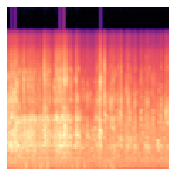

In [ ]:
filect = 0 
print('Working on 8th subset from 35,001 and up')
for i in df_8.itertuples():
    filect = filect+1
    file = i[5]
    pngfile = i[6]
    print('FileCount = '+str(filect)+': Working on '+file)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    hop_length = 11025 # in num. of samples
    n_fft = 42336 # window in num. of samples
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
    log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    fig2.set_size_inches(2.9, 2.98)
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
! pwd
! cp /content/gdrive/MyDrive/trainpng/* /content/gdrive/MyDrive/dumptrainpng/

/content/gdrive/MyDrive


In [ ]:
! ls /content/gdrive/MyDrive/dumptrainpng | wc

   1795    1795   19159


In [ ]:
! ls /content/gdrive/MyDrive/trainpng | wc

      0       0       0


In [ ]:
! rm /content/gdrive/MyDrive/trainpng/*.png